In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\Musuki\Anaconda3\envs\uwdatasci420\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [4]:
movie_dataset = pd.read_csv('C:\\Users\\Musuki\\Desktop\\TMDB_CLEANED_DATA.csv')

In [5]:
movie_dataset.drop('Unnamed: 0', axis=1, inplace=True)

## Dist Plot and Variable Corr

In [6]:
movie_dataset.describe()

id    popularity        budget       revenue  movie_length   \
count  10866.000000   10866.000000  1.086600e+04  1.086600e+04  10866.000000    
mean   66064.177434   0.646441      1.462570e+07  3.982332e+07  102.070863      
std    92130.136561   1.000185      3.091321e+07  1.170035e+08  31.381405       
min    5.000000       0.000065      0.000000e+00  0.000000e+00  0.000000        
25%    10596.250000   0.207583      0.000000e+00  0.000000e+00  90.000000       
50%    20669.000000   0.383856      0.000000e+00  0.000000e+00  99.000000       
75%    75610.000000   0.713817      1.500000e+07  2.400000e+07  111.000000      
max    417859.000000  32.985763     4.250000e+08  2.781506e+09  900.000000      

         vote_count      vote_avg  release_date.1    budget_adj   revenue_adj  \
count  10866.000000  10866.000000  10866.000000    1.086600e+04  1.086600e+04   
mean   217.389748    5.974922      2001.322658     1.755104e+07  5.136436e+07   
std    575.619058    0.935142      12.812941       3.430616e+07  1.446325e+08   
min    10.000000     1.500000      1960.000000     0.000000e+00  0.000000e+00   
25%    17.000000     5.400000      1995.000000     0.000000e+00  0.000000e+00   
50%    38.000000     6.000000      2006.000000     0.000000e+00  0.000000e+00   
75%    145.750000    6.600000      2011.000000     2.085325e+07  3.369710e+07   
max    9767.000000   9.200000      2015.000000     4.250000e+08  2.827124e+09   

             Action     Adventure     Animation        Comedy         Crime  \
count  10866.000000  10866.000000  10866.000000  10866.000000  10866.000000   
mean   0.146328      0.053930      0.037088      0.213418      0.035064       
std    0.353451      0.225889      0.188987      0.409739      0.183949       
min    0.000000      0.000000      0.000000      0.000000      0.000000       
25%    0.000000      0.000000      0.000000      0.000000      0.000000       
50%    0.000000      0.000000      0.000000      0.000000      0.000000       
75%    0.000000      0.000000      0.000000      0.000000      0.000000       
max    1.000000      1.000000      1.000000      1.000000      1.000000       

        Documentary         Drama        Family       Fantasy       Foreign  \
count  10866.000000  10866.000000  10866.000000  10866.000000  10866.000000   
mean   0.039757      0.225750      0.013252      0.025032      0.000828       
std    0.195397      0.418095      0.114359      0.156230      0.028769       
min    0.000000      0.000000      0.000000      0.000000      0.000000       
25%    0.000000      0.000000      0.000000      0.000000      0.000000       
50%    0.000000      0.000000      0.000000      0.000000      0.000000       
75%    0.000000      0.000000      0.000000      0.000000      0.000000       
max    1.000000      1.000000      1.000000      1.000000      1.000000       

            History        Horror         Music       Mystery  \
count  10866.000000  10866.000000  10866.000000  10866.000000   
mean   0.004049      0.084208      0.009203      0.011504       
std    0.063508      0.277712      0.095494      0.106642       
min    0.000000      0.000000      0.000000      0.000000       
25%    0.000000      0.000000      0.000000      0.000000       
50%    0.000000      0.000000      0.000000      0.000000       
75%    0.000000      0.000000      0.000000      0.000000       
max    1.000000      1.000000      1.000000      1.000000       

       No_Genre_Provided       Romance  ScienceFiction       TVMovie  \
count  10866.000000       10866.000000  10866.000000    10866.000000   
mean   0.002117           0.017118      0.019694        0.007178       
std    0.045961           0.129716      0.138955        0.084424       
min    0.000000           0.000000      0.000000        0.000000       
25%    0.000000           0.000000      0.000000        0.000000       
50%    0.000000           0.000000      0.000000        0.000000       
75%    0.000000           0.000000      0.00

In [7]:
corr_matrix = movie_dataset.corr(method = 'pearson',min_periods = 1).round(2)

In [8]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [9]:
positive_corr = corr_matrix.unstack().dropna().sort_values(ascending = False)
positive_corr = positive_corr[(positive_corr < 1)]

In [10]:
positive_corr.head(150)

budget                               budget_adj                                  0.97
budget_adj                           budget                                      0.97
revenue_adj                          revenue                                     0.92
revenue                              revenue_adj                                 0.92
WhizbangFilmsInc                     TheHallmarkChannel                          0.87
TheHallmarkChannel                   WhizbangFilmsInc                            0.87
ProcinvestSas                        ArtinaFilms                                 0.82
uFilm                                EntertainmentMotionPictures                 0.82
CaramelFilms                         DonCarmodyProductions                       0.82
Telecinco                            MinisteriodeCultura                         0.82
TwentiethCenturyFoxAnimation         BlueSkyStudios                              0.82
StableWayEntertainment               ParabolicPictures

#### HIST PLOTS

(array([1.0334e+04, 3.5100e+02, 1.1500e+02, 3.9000e+01, 1.6000e+01,
        4.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([0.00000000e+00, 2.82712375e+08, 5.65424750e+08, 8.48137125e+08,
        1.13084950e+09, 1.41356188e+09, 1.69627425e+09, 1.97898662e+09,
        2.26169900e+09, 2.54441138e+09, 2.82712375e+09]),
 <a list of 10 Patch objects>)

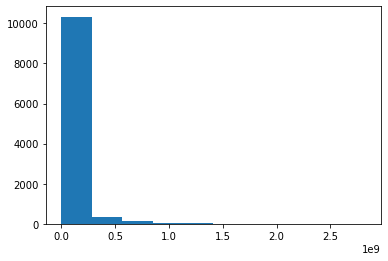

In [11]:
plt.hist(movie_dataset['revenue_adj'])

(array([9.34e+03, 9.30e+02, 3.62e+02, 1.49e+02, 5.50e+01, 2.20e+01,
        5.00e+00, 1.00e+00, 1.00e+00, 1.00e+00]),
 array([0.000e+00, 4.250e+07, 8.500e+07, 1.275e+08, 1.700e+08, 2.125e+08,
        2.550e+08, 2.975e+08, 3.400e+08, 3.825e+08, 4.250e+08]),
 <a list of 10 Patch objects>)

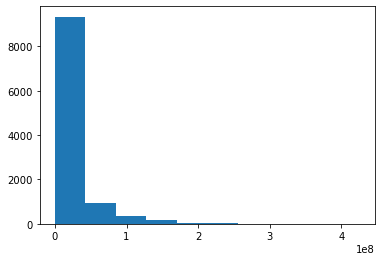

In [12]:
plt.hist(movie_dataset['budget_adj'])

(array([   9.,   43.,  181.,  525., 1794., 3495., 2943., 1615.,  249.,
          12.]),
 array([1.5 , 2.27, 3.04, 3.81, 4.58, 5.35, 6.12, 6.89, 7.66, 8.43, 9.2 ]),
 <a list of 10 Patch objects>)

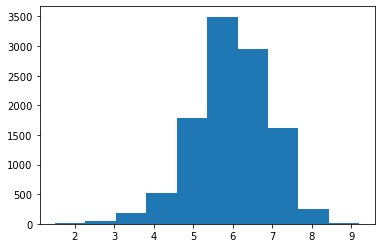

In [13]:
plt.hist(movie_dataset['vote_avg'])

(array([1.0292e+04, 3.3800e+02, 1.1900e+02, 6.5000e+01, 2.6000e+01,
        1.0000e+01, 9.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([  10. ,  985.7, 1961.4, 2937.1, 3912.8, 4888.5, 5864.2, 6839.9,
        7815.6, 8791.3, 9767. ]),
 <a list of 10 Patch objects>)

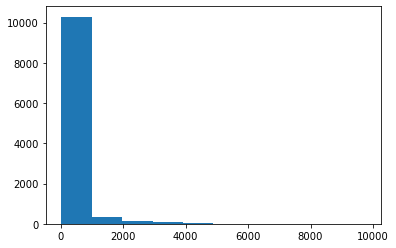

In [14]:
plt.hist(movie_dataset['vote_count'])

(array([2.415e+03, 8.306e+03, 1.130e+02, 1.300e+01, 9.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  0.,  90., 180., 270., 360., 450., 540., 630., 720., 810., 900.]),
 <a list of 10 Patch objects>)

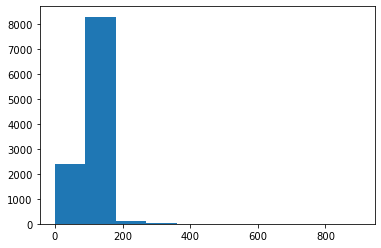

In [15]:
plt.hist(movie_dataset['movie_length '])

(array([1.0659e+04, 1.6800e+02, 2.8000e+01, 7.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([6.50000000e-05, 3.29863480e+00, 6.59720460e+00, 9.89577440e+00,
        1.31943442e+01, 1.64929140e+01, 1.97914838e+01, 2.30900536e+01,
        2.63886234e+01, 2.96871932e+01, 3.29857630e+01]),
 <a list of 10 Patch objects>)

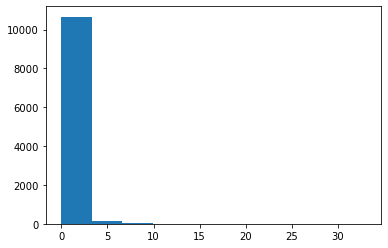

In [16]:
plt.hist(movie_dataset['popularity'])

(array([9.694e+03, 7.440e+02, 2.280e+02, 1.200e+02, 5.700e+01, 1.400e+01,
        6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([0.000e+00, 4.250e+07, 8.500e+07, 1.275e+08, 1.700e+08, 2.125e+08,
        2.550e+08, 2.975e+08, 3.400e+08, 3.825e+08, 4.250e+08]),
 <a list of 10 Patch objects>)

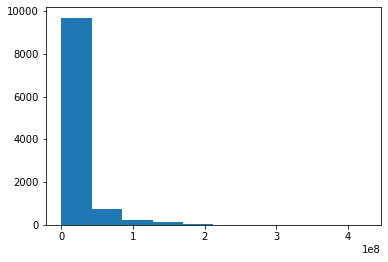

In [17]:
plt.hist(movie_dataset['budget'])

(array([1.0483e+04, 2.6400e+02, 7.3000e+01, 3.3000e+01, 6.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 2.78150585e+08, 5.56301169e+08, 8.34451754e+08,
        1.11260234e+09, 1.39075292e+09, 1.66890351e+09, 1.94705409e+09,
        2.22520468e+09, 2.50335526e+09, 2.78150585e+09]),
 <a list of 10 Patch objects>)

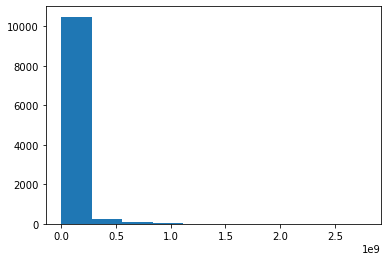

In [18]:
plt.hist(movie_dataset['revenue'])

## PIE CHART OF GENRES & OTHER ATTRIBUTES

In [19]:
pd.set_option('display.max_columns', None)
movie_dataset_list = movie_dataset.columns.values.tolist()

In [20]:
movie_dataset['Film_Company'] = (movie_dataset.loc[:,['10thHoleProductions', '120dBFilms', '1492Pictures', '1818', '185Trax', '2EntertainVideo', '2PlayerProductions', '247Films', '2003Productions', '20tenMedia', '20thCenturyFox', '20thCenturyFoxFilmCorporation', '20thCenturyFoxHomeEntertainment', '20thCenturyFoxTelevision', '20thCenturyPictures', '21LapsEntertainment', '21stCenturyFilmCorporation', '235Filmproduktion', '26Films', '2929Productions', '2DSProductions', '3ArtsEntertainment', '3311Productions', '343Industries', '34thStreetFilms', '360Pictures', '3LFilmproduktionGmbH', '3LProductions', '40AcresAMuleFilmworks', '44thFloorProductions', '61ProductionsInc', '7Network', '72Productions', '72ndStreetProductions', '777FilmsCorporation', 'ABCorp', 'ABandApart', 'ABiggerBoat', 'ACompanyFilmproduktionsgesellschaft', 'ALoopyProductionLLC', 'APlusEntertainment', 'AEIndieFilms', 'AETelevisionNetworks', 'AMFilms', 'AEStudios', 'AMarkEntertainment', 'ACIFilms', 'AFilm', 'ACLylesProductions', 'AGFilms', 'A24', 'A71Productions', 'ABCCircleFilms', 'ABCFamily', 'ABCMotionPictures', 'ABCPictures', 'ABSCBNFilmProductions', 'AFProduction', 'AGGKFilms', 'APTFilms', 'ARDDegetoFilm', 'ARPSÃlection', 'ARSFilmProduction', 'ARTE', 'ATOPictures', 'AVPictures', 'AVCOEmbassyPictures', 'AardmanAnimations', 'AbandonPictures', 'AbbolitaProductions', 'AberrationFilms', 'AbnormalPictures', 'AcademyPictures', 'AcceleratedMatter', 'AcceleratorFilms', 'AccessFilms', 'AccessMotionPictures', 'AccessPictures', 'AccompliceFilms', 'AcornPictures', 'ActIIICommunications', 'ActiveEntertainment', 'AdHominemEnterprises', 'AdScottPictures', 'AdaFilms', 'AdamFieldsProductions', 'AdiShankarProduction', 'AdlabsFilmsLtd', 'AdmireProductionsLtd', 'AegisFilmFund', 'AeteasFilmproduktions', 'AffirmFilms', 'AfterDarkFilms', 'AgainsttheWildFilms', 'AgamemnonFilms', 'AgencjaProdukcjiFilmowej', 'AgiOrsiProductions', 'AgoraEntertainment', 'AkkordFilmProduktionGmbH', 'AksonStudio', 'AlabamaMoonEntertainment', 'AlbertBandInternationalProductionsInc', 'AlcinaPictures', 'AlconEntertainment', 'AldamisaEntertainment', 'AlejandroMartÃnez', 'AlexEntertainmentInc', 'AlexanderGroupe', 'AlexandreFilms', 'AlfredImageWorks', 'AlfredJHitchcockProductions', 'Algonquin', 'AliveFilms', 'AliveProductions', 'AllGirlProductions', 'AllagashFilms', 'Allarts', 'AllegroFilms', 'AllegroFilm', 'Alliance', 'AllianceAtlantisCommunications', 'AllianceFilms', 'AlliedArtistsPictures', 'AlliedFilmMakers', 'AlliedVision', 'AlligatorInc', 'AlloyEntertainment', 'AlmenaFilms', 'AlmostMidnightProductions', 'AloupisProductions', 'AlphavilleFilms', 'AlpinePictures', 'AlquimiaCinema', 'AltaFilmsSA', 'AltaVistaFilmProduction', 'AltaVistaProductions', 'AlternateEndingStudios', 'AltitudeFilmEntertainment', 'AmazonStudios', 'AmberLamps', 'AmbiPictures', 'AmbientEntertainmentGmbH', 'AmblinEntertainment', 'AmbrosinoDelmenico', 'AmenRaFilms', 'AmeranFilms', 'AmericanBroadcastingCompanyABC', 'AmericanCinemaInternational', 'AmericanCinemaProductions', 'AmericanEagle', 'AmericanFilmInstituteAFI', 'AmericanIndependentProductions', 'AmericanInternationalPicturesAIP', 'AmericanInternationalProductions', 'AmericanMediaGroup', 'AmericanZoetrope', 'AmicusProductions', 'AnOliveBranchProductions', 'AnarchosProductions', 'AnchorBay', 'AnchorBayEntertainment', 'AnchorBayFilms', 'AndertainmentGroup', 'AndreaLeoneFilms', 'AndreaSperlingProductions', 'AndrewStevensEntertainment', 'AngLeeProductions', 'AngelsAirwaves', 'AngliaTelevision', 'AngloEnterprises', 'AngloAmalgamatedFilmDistributors', 'AngoaAgicoa', 'AnimagicNetAS', 'AnimusFilms', 'Aniplex', 'AnnaLenaFilms', 'AnnapurnaPictures', 'AnnuitCoeptisEntertainmentInc', 'AnonymousContent', 'AntaresProduzioneCinematografica', 'Antena3Films', 'AnthosMedia', 'AntidoteFilms', 'Antzworks', 'ApatowProductions', 'ApipoulaÃ', 'ApolloAssociates', 'ApolloPictures', 'ApolloMovieBeteiligungs', 'ApolloProMovie', 'ApolloProScreen', 'AppianWay', 'AppleCorps', 'AppleInc', 'AprilProductions', 'AquariusFilms', 'ArachnidProductionsLtd', 'AramidEntertainmentFund', 'ArcEntertainment', 'ArcProductions', 'ArcadeFilms', 'ArcadePictures', 'ArcadiaMotionPictures', 'ArcherStreetProductions', 'Archimede', 'Archipel35', 'ArclightFilms', 'Arenamedia', 'ArgyleEnterprises', 'ArgyllFilmPartners', 'ArieScopePictures', 'Ariesjp', 'ArizticalEntertainment', 'ArkoffInternational', 'ArreteTonCinema', 'ArrowstormEntertainment', 'ArtIndustry', 'ArtLinsonProductions', 'ArtPicturesStudio', 'Arte', 'ArteDeutschlandTVGmbH', 'ArteFranceCinÃma', 'ArtemisFilm', 'ArtfireFilms', 'ArtinaFilms', 'ArtisanEntertainment', 'ArtistsEntertainmentComplex', 'ArtistsPublicDomain', 'ArtsCouncilofEngland', 'ArwinProductions', 'AscendantPictures', 'AscensionPictures', 'AscotEliteHomeEntertainment', 'AsgaardEntertainment', 'AsmikAceEntertainment', 'AspenFilmSociety', 'AssassinsFistLimited', 'AssociatedBritishPathÃ', 'AssociatedGeneralFilms', 'AssociatedProducersAPI', 'Astron6VideoInternational', 'AsylumThe', 'AsymmetricalProductions', 'AtitudeProduÃÃµeseEmpreendimentos', 'AtlanticEntertainmentGroup', 'AtlasEntertainment', 'AtlasFilm', 'AtlasFilms', 'AtlasIndependent', 'AtlasProductions', 'AtmoMediaNetwork', 'AugustEntertainment', 'AuroraProductions', 'AustralianBroadcastingCorporation', 'AustralianFilmCommission', 'AustralianFilmFinanceCorporation', 'AustralianFilmFinanceCorporationAFFC', 'AutomatikEntertainment', 'Autonomous', 'AvalonStudios', 'AvengingConscience', 'AvenuePicture', 'AvenuePicturesProductions', 'AveryPix', 'AvÅŸarFilm', 'AwesomenessFilms', 'BACFilms', 'BBC', 'BBCCymruWales', 'BBCEarth', 'BBCFilms', 'BBCHomeVideo', 'BBCTelevisionUK', 'BBCWales', 'BBCWorldwide', 'BBSProductions', 'BCDFPictures', 'BIGPictures', 'BIMDistribuzione', 'BLTProductions', 'BSFFilm', 'BXRProductions', 'BabaArtsLimitedProductions', 'BabeFilms', 'BabyCowProductions', 'BabylonianProductions', 'BacFilms', 'BachelorPartyProductions', 'BachrachGottliebProductions', 'BackLotPictures', 'BackupMedia', 'BadAngelsProductionsLtd', 'BadBiology', 'BadHatHarryProductions', 'BadLtProductions', 'BadMonkeyProductions', 'BadRobot', 'BalajiMotionPictures', 'BalcorFilmInvestors', 'BaltimoreSpringCreekProductions', 'BananaMoonSkyFilms', 'BandaiVisualCompanyJAPAN', 'BangerFilms', 'BangerProductions', 'BarclaysMercantileIndustrialFinance', 'BarnetBainFilms', 'BarwoodFilms', 'BasketCaseProductions', 'BatjacProductions', 'BattleplanProductions', 'BavariaFilm', 'BavariaPictures', 'BayonneEntertainment', 'BayouFilmInc', 'BayouPictures', 'BazelevsProduction', 'BazmarkFilms', 'BeGoodProductions', 'BeachsideFilms', 'BeaconCommunications', 'BeatriceFilm', 'BeautifulKateProductions', 'BeckerInternational', 'BedfordFallsCompanyThe', 'BedfordFallsProductions', 'BeeHolderProductions', 'BeforetheDoorPictures', 'BelAirEntertainment', 'BelieveEntertainment', 'BelladonnaProductions', 'BenaroyaPictures', 'BenderSpinkInc', 'BenderSpink', 'BenedekFilms', 'BenedictPicturesCorp', 'BennettRobbinsProductions', 'BentleyProductions', 'BergmanLustigproductions', 'BerkshireAxisMedia', 'BertMarcusProductions', 'BerwickStreetProductions', 'BeyondFilms', 'BeyondInfinity', 'BhansaliFilms', 'BifrostPictures', 'BigArtyProductions', 'BigBadFilm', 'BigBeachFilms', 'BigBeachProductions', 'BigEasyPictures', 'BigFanProductions', 'BigFocusTelevision', 'BigIdeaProductions', 'BigIndiePictures', 'BigPictureMediaCorporation', 'BigScreenEntertainmentGroup', 'BigTalkProductions', 'BigWorld', 'BigelMailerFilms', 'BigelowProductions', 'BillyGoatPictures', 'BingCrosbyProductions', 'BioskopFilmGmbH', 'BirdsongPictures', 'BitterFilms', 'BlackBalloonProductions', 'BlackBearPictures', 'BlackCamelPictures', 'BlackChalkProductions', 'BlackFawnFilms', 'BlackMarbleProductions', 'BlackSandPictures', 'BlackSheepFilms', 'BlackfriarsBridgeFilms', 'BlakeEdwards', 'BlastFilms', 'BleibergEntertainment', 'BlenderFoundation', 'BlenkovSchÃnnemannPictures', 'BlindSpotPicturesOy', 'BlinkWorksMedia', 'BlinkyProductions', 'BlitzWelch', 'Block2Pictures', 'BlockadeEntertainment', 'BlondieGirlProductions', 'BloodRelationsCo', 'BloodlinePictures', 'BloodyDisgusting', 'BlueAskew', 'BlueDotProductions', 'BlueParrotProductions', 'BlueRiderPictures', 'BlueSkyStudios', 'BlueSnowProductions', 'BlueStarPictures', 'BlueeyesProductions', 'BlueprintPictures', 'BluffRoadProductions', 'BlumhouseProductions', 'BobSwererProductions', 'BocabocaProduccionesSA', 'BokuFilms', 'BoldFilms', 'BollKG', 'BollKinoBeteiligungsGmbHCoKG', 'BollywoodHollywoodProduction', 'BonaFideProductions', 'BookshopProductions', 'BoramEntertainmentInc', 'BorderLineFilms', 'BoulderLightPictures', 'BouncingBettyProductions', 'BoundlessPictures', 'BowandArrowEntertainment', 'BoyWonderFilms', 'BradKrevoyTelevision', 'Brandenberg', 'BrandesFilmsInternational', 'BrandmanProductions', 'BrandywineProductionsLtd', 'BraunEntertainmentGroup', 'BraunsbergProductions', 'BraveNewFilms', 'BraxtanFILM', 'BreakThruFilms', 'BridgeFilms', 'BrightColdDayFilms', 'BrightlightPictures', 'BrightlightPicturesInc', 'BrightstarFilms', 'BrillsteinGreyEntertainment', 'BrinkProductions', 'BristolBayProductions', 'BritishBroadcastingCorporationBBC', 'BritishColumbiaFilm', 'BritishFilmInstituteBFI', 'BritishLionFilmCorporation', 'BritishLionFilms', 'BritishScreen', 'BritpackFilmCompany', 'BroadGreenPictures', 'BroadviewPictures', 'BrokenLizardIndustries', 'BronStudios', 'BronsonAvenue', 'Brooksfilms', 'BrooksfilmsLtd', 'BrookstreetPictures', 'BrookwellMcNamaraEntertainment', 'BrouwersgrachtInvestments', 'BrownstoneProductions', 'BruceBrownFilms', 'BrynaProductions', 'BuenaVista', 'BuenaVistaDistributionCompany', 'BuenaVistaHomeEntertainment', 'BuenaVistaPictures', 'BuffaloGalPictures', 'BullMarketEntertainment', 'BulletFilms', 'BungalowProductions', 'Bunk11Pictures', 'BurbankFilmsAustralia', 'BurgundyFilms', 'BurnLaterProductions', 'BurningShipsProductions', 'BurnsFamilyStudios', 'BurnsideEntertainment', 'ButchersRunProductions', 'BÃ³rdScannÃnnahÃireann', 'CBFilmsSA', 'CATFilms', 'CBFilms', 'CBSEntertainmentProductions','CBSFilms', 'CCCapitalArtsEntertainmentSRL', 'CCCP', 'CDFilms', 'CJEntertainment', 'CMLFilms', 'CNCAIMC', 'CTBFilmCompany', 'CTR', 'CTVInternational', 'CableStuffProductions', 'CafÃFilm', 'CalamityFilms', 'CaliberMediaCompany', 'CaliforniaPictures', 'CambridgeProductions', 'CamelliaEntertainment', 'CamelotProductions', 'CampHill', 'Campfire', 'CampfireLLC', 'CamÃraOne', 'CanadianFilmCentreCFC', 'CanadianFilmDevelopmentCorporationCFDC', 'CanadianFilmorVideoProductionTaxCreditCPTC', 'CanalPlus', 'CanalStreetFilms', 'Canal', 'CanalPolska', 'CananaFilms', 'CannonFilms', 'CannonGroup', 'CannonPictures', 'CannonandMorleyProductions', 'CanonigoFilms', 'CapelightPictures', 'CapitalArtsEntertainment', 'CapitolFilms', 'CapitoleFilms', 'CappaProductions', 'CapstoneEntertainmentGroup', 'CaptureTheFlagFilms', 'CaravanPictures', 'CarlyleProductions', 'CarmelCreekProductions', 'CarmelEntertainment', 'CarnabyInternational', 'CarolcoPictures', 'CarouselPictureCompany', 'CarthagoFilmsSarl', 'CartierProductions', 'CartoonNetworkStudios', 'CasablancaFilmworks', 'CaseyProductions', 'CaseySilverProductions', 'CassadagaFilmProduction', 'CastelFilmRomania', 'CastelFilmStudio', 'CastelFilms', 'CastelaoProducciones', 'CastleHillProductions', 'CastleRockEntertainment', 'CastlebergProductions', 'CatfishProductions', 'CaviarFilms', 'CeladorFilms', 'Cell', 'CelluloidDreams', 'Central', 'CentralFilmsLimited', 'CentralIndependentTelevision', 'CentreNationaldelaCinÃmatographie', 'CentronPictures', 'CentropolisEntertainment', 'CentropolisFilmProductions', 'Century21Television', 'ChadTroutwineFilms', 'Channel4Television', 'Channel4TelevisionCorporation', 'ChannelAwesome', 'ChannelFourFilms', 'ChannelOneRussia', 'ChanticleerFilms', 'ChaoticRampageAmericanPictures', 'ChapmanFilmedEntertainment', 'ChapmanLeonardStudioEquipment', 'CharlesBandProductions', 'CharlieProductions', 'ChartoffWinklerProductions', 'Chartwell', 'CheckEntertainment', 'CheetahVision', 'ChenaultProductions', 'CherokeeProductions', 'CherrySkyFilms', 'CheslerPerlmutterProductions', 'ChessmanParkProductions', 'CheyenneEnterprises', 'ChicagoPacificEntertainment', 'ChicagoPictures', 'ChildrenoftheCornProductions', 'ChillerFilms', 'ChinaFilmCoProductionCorporation', 'ChinaStarEntertainment', 'ChineseBookiePictures', 'ChiodoBrothersProductions', 'ChloeProductions', 'ChrisBrinkerProductions', 'ChristalFilms', 'ChromewoodProductions', 'ChrysalisFilms', 'CiBy2000', 'Ciby2000', 'CicrusKingProductions', 'Cine2000', 'CineGroupe', 'CineEvelyn', 'CineSonEntertainment', 'CinecittÃ', 'Cinema175', 'Cinema77', 'CinemaCenterFilms', 'CinemaGroupVentures', 'CinemaVehicleServices', 'CinemaScÃ³pio', 'CinemagicPictures', 'CinemanProductions', 'CinemarqueEntertainmentBV', 'Cinemassacre', 'Cineplex', 'CineplexOdeonFilms', 'Cinepro', 'CinerentaMedienbeteiligungsKG', 'CinergiPicturesEntertainment', 'Cineriz', 'CinesthesiaProductions', 'CinetelFilms', 'Cinevent', 'Cineville', 'CinevoxFilmproduktionGmbH', 'CinÃ', 'CinÃTÃFilmproductieBV', 'CinÃfilmAG', 'CinÃticaFilmeseProduÃÃµes', 'CipherFilms', 'CircleFilms', 'CityFilm', 'CityFilms', 'CityLightFilms', 'CityofPeaceFilms', 'CityonaHillProductions', 'CitÃAmÃrique', 'CivicBakery', 'CivilianPictures', 'Class5Films', 'ClearBlueSkyProductions', 'CliffjackMotionPictures', 'ClinicaEstetico', 'CloudEightFilms', 'CloudTenPictures', 'CoPilotPictures', 'CoatwolfProductions', 'CobaltMediaGroup', 'CodeEntertainment', 'CodeblackEntertainment', 'CohenMediaGroup', 'ColdIronPictures', 'CollectiveMindsMediaCompany', 'CollisionEntertainment', 'ColombiaPictures', 'ColorForce', 'ColorfastPictures', 'ColumbiaBritishProductions', 'ColumbiaFilmsSA', 'ColumbiaMusicVideo', 'ColumbiaPictures', 'ColumbiaPicturesCorporation', 'ColumbiaPicturesIndustries', 'ColumbiaPicturesTelevision', 'ColumbiaTriStar', 'ColumnProductions', 'ComedyCentral', 'ComedyCentralFilms', 'CometFilmProduktionGmbH', 'CompanyFilms', 'CompanyName', 'CompanyPictures', 'CompassInternationalPictures', 'CompoundB', 'ComptonFilms', 'ComputerChess', 'ConaciteUno', 'ConcertPromotionInternational', 'ConcordeFilmverleih', 'CondemnedProductions', 'ConfessionsProductionsII', 'ConqueringLionPictures', 'ConstantinFilm', 'ConstantinFilmProduktion', 'ConstellationEntertainment', 'ContentMediaCorp', 'ContentFilm', 'Contrafilm', 'ConundrumEntertainment', 'CoolMusic', 'CoopersTownProductions', 'CopperheartEntertainment', 'CoproducciÃ³nGBUSAFranciaAlemaniaItaliaRumanÃa', 'CoproducciÃ³nIrlandaAlemania', 'CoquetteProductions', 'CoramDeoStudios', 'CorazÃ³nInternational', 'CoreContentsMedia', 'CornCobbProductions', 'CoronaPictures', 'CorrinoMediaCorporation', 'Corsan', 'CosgroveHallFilms', 'CowboyFilms', 'CravenMaddalenaFilms', 'CrazyWheelsFilmCorporation', 'CreativeDifferences', 'CreativeThinkingInternationalLtd', 'CreativityMedia', 'CredoEntertainmentGroup', 'CreepyFilmProductions', 'CrimeScenePictures', 'CrossCreekPictures', 'CrossbowProductions', 'CrossroadsFilms', 'CruiseWagnerProductions', 'CrystalCityEntertainment', 'CrystalSkyPictures', 'CrystalSkyWorldwide', 'CubeVision', 'CuetheDogProductions', 'CunninghamMaybachFilms', 'CurrentEntertainment', 'CyanFilms', 'CzechAngloProductions', 'DAntoniProductions', 'DACFILMRome', 'DCComics', 'DDProductions', 'DDMFilmCorporation', 'DHXMedia', 'DJFilms', 'DNA', 'DNAFilms', 'DROEntertainment', 'DSMIII', 'DaciaFilms', 'DaftLifeLtdCo', 'DanFilms', 'DanWigutowProductions', 'DaniaFilm', 'DanielSladekEntertainment', 'DanmarksRadioDR', 'Darclight', 'DarclightFilms', 'DariusFilms', 'DarkCastleEntertainment', 'DarkDunesProductions', 'DarkFactoryEntertainment', 'DarkHorseEntertainment', 'DarkSkyFilms', 'DarknightPictures', 'DarkoEntertainment', 'DarkwoodsProductions', 'DarlowSmithsonProductions', 'DaronimaxMedia', 'DasFilms', 'DavidEickProductions', 'DavidFosterProductions', 'DavidHamiltonProductions', 'DavidLWolperProductions', 'DavidLaChapelleStudios', 'DavisEntertainment', 'DavisFilms', 'DavisPanzerProductions', 'DayTwentyEightFilms', 'DaybreakPictures', 'DeLaurentiis', 'DeLaurentiisEntertainmentGroup', 'DeLaurentiisEntertainmentGroupDEG', 'DeLinePictures', 'DeadFilms', 'DeadOldManProductions', 'DeanRiverProductions', 'DeathAwaitsCinema', 'DecipherEntertainment', 'DecoFilmworks', 'DeedFilms', 'DeepBluePictures', 'DeepStudios', 'DefenderProduction', 'Defilm', 'DeluxProductions', 'DemarestFilms', 'Dentsu', 'DenverandDelilahProductions', 'DepthofField', 'DerfFilms', 'DerrickComedyProductions', 'DesertFlowerFilmproductions', 'DesiluProductions', 'DesperatePictures', 'DestinationFilms', 'DetDanskeFilminstitut', 'DetentionFilms', 'DetourFilmProduction', 'DetourFilmproduction', 'DeviantFilms', 'DevonPerskyBright', 'DevonshireProductions', 'DharmaProductions', 'DiBonaventuraPictures', 'DiNoviPictures', 'DiamondDocs', 'DiamondFilms', 'DiaphanaFilms', 'DickhouseProductions', 'DigiartProductions', 'DigitalFrontier', 'DimensionExtreme', 'DimensionFilms', 'DimensionPictures', 'DinoDeLaurentiisCompany', 'DinodeLaurentiisCinematografica', 'DirectionsInc', 'DisarmingFilms', 'DiscoveryChannelProductions', 'DiscoveryDocs', 'DiscoveryFilms', 'Disney', 'DisneyChannel', 'DisneyTelevisionAnimation', 'DisneyToonStudios', 'Disneynature', 'DistantHorizons', 'DisterGroup', 'DistractedMedia', 'DivineInspirationTheFabulousBoomtownBoys', 'DixieTheatricalCorporation', 'Docurama', 'DogEatDogFilms', 'Dolby', 'DonBluth', 'DonCarmodyProductions', 'DonauFilmproduktion', 'DongWooAnimation', 'DonnerShulerDonnerProductions', 'DonnersCompany', 'DorFilmProduktionsgesellschaftGmbH', 'DosCorazones', 'DotyDaytonProduction', 'DoubleEdgeFilms', 'DoubleFeatureFilms', 'DoubleHelixFilms', 'DoubleNickelEntertainment', 'DoublePlay', 'DoubleWindsorFilms', 'DoubleBandfilms', 'DoubledayProductions', 'DouglasReutherProductions', 'DrafthouseFilms', 'DramaticFeatures', 'DreamEntertainment', 'DreamWorks', 'DreamWorksAnimation', 'DreamWorksHomeEntertainment', 'DreamWorksPictures', 'DreamWorksSKG', 'Dreamland', 'DreamlandProductions', 'DreamzUnlimited', 'DryCountyFilms', 'DualstarEntertainmentGroup', 'DualstarProductions', 'DucklingAS', 'DudezProductions', 'DundeeEntertainment', 'DuneEntertainment', 'DuplassBrothersProductions', 'E3WProductions', 'EMMedia', 'EMIFilms', 'EMIFilmsLtd', 'EMIRecordsLtd', 'ERPProductions', 'ETAfilms', 'EUEScreenGemsStudios', 'EagleRockEntertainment', 'EagleVisionInc', 'EalingStudios', 'EarthboundHumanProductionsInc', 'EasternProductions', 'EastsideFilms', 'EcaveoCapitalPartners', 'EchoBridgeEntertainment', 'EchoFilms', 'EchoLakeEntertainment', 'EchoLakeProductions', 'EchoLakeProductionsI', 'EcholandsCreativeGroup', 'Eclecticpictures', 'EcosseFilms', 'EdelrecordsGmbH', 'EdenProductions', 'EdenProductionsInc', 'EdenRockMedia', 'EdgeCity', 'EdkoFilms', 'EffigyFilms', 'Eficine226', 'EfishEntertainment', 'EggPictures', 'EgoFilmArts', 'EgoliTossellFilm', 'EgoliTossellFilmAG', 'EikonFilm', 'ElCaminoPictures', 'ElDeseo', 'ElMarPictures', 'ElectricCityEntertainment', 'ElectricEntertainment', 'ElectricPictures', 'ElementPictures', 'ElephantFilms', 'ElevationFilmworks', 'ElixirFilms', 'ElkinsEntertainment', 'ElleDriver', 'Elsevira', 'ElzÃvirFilms', 'EmbarkProduction', 'EmbassyFilms', 'EmbassyInternationalPictures', 'EmbassyPicturesCorporation', 'EmbassyProductions', 'EmmettFurlaFilms', 'EmotionPictures', 'EmperorMotionPictures', 'EmperorMultimediaGroupEMG', 'EmpirePictures', 'EnderbyEntertainment', 'EndgameEntertainment', 'EndlessEntertainment', 'EnergiaProductions', 'EnigmaProductions', 'Eniloc', 'EnlightPictures', 'EnlightenmentProductions', 'EnriqueCerezoProduccionesCinematogrÃficasSA', 'EnsoEntertainment', 'Entertainment', 'EntertainmentFilms', 'EntertainmentOne', 'EntertainmentPartnersLtd', 'EntertainmentSecurities', 'EnvisionMediaArts', 'EonProductions', 'EpicPicturesGroup', 'EpicProductions', 'EpithÃteFilms', 'Epix', 'EpochFilms', 'EpsilonMotionPictures', 'ErosInternational', 'EscapeArtists', 'Escapology', 'EskoriaFilms', 'Eskwad', 'EssanessPictures', 'EstudiosChurubuscoAztecaSA', 'EtCeteraFilms', 'EurasiaInvestments', 'EurekaPictures', 'Eurimages', 'EuropaCorp', 'EurowideFilmProduction', 'EveProductionsInc', 'EveryGuyProductions', 'EveryWhereStudios', 'EverymanPictures', 'EvilTwins', 'EvolutionPictures', 'ExcaliburFilms', 'ExcelEntertainment', 'ExclusiveMediaGroup', 'ExodusFilmGroup', 'ExtinctProduction', 'ExxodusPictures', 'EyeworksFilmTVDrama', 'FGFilmProductions', 'FODProductions', 'F24Film', 'FGMEntertainment', 'FJProductions', 'FMProductions', 'FNMFilms', 'FSCProductions', 'FUNimationEntertainment', 'FacesDistribution', 'FacesInternationalFilms', 'FalconMediaLimited', 'FallingSkyEntertainment', 'FamousArtistsProductions', 'FamousFilmsII', 'Fandango', 'FantasyFilms', 'Fantefilm', 'FarHillsPictures', 'FastProductionsLtd', 'FastnetFilms', 'FatFreeFilms', 'FechnerAudiovisuel', 'FederighiFilms', 'FeelgoodFiction', 'FerndaleFilms', 'FetchBoyFilmsLtd', 'FeverDreams', 'FewlasEntertainment', 'FickleFishFilms', 'FidelityFilms', 'FidÃlitÃProductions', 'FieldGuideMedia', 'FifthAvenueEntertainment', 'FigmentFilms', 'Film4', 'FilmAfrika', 'FilmAfrikaWorldwide', 'FilmCouncil', 'FilmDepartmentThe', 'FilmDirection', 'FilmDuemila', 'FilmFinanceGroup', 'FilmFoundryPartners', 'FilmFourInternational', 'FilmFundingLtdofCanada', 'FilmGuarantors', 'FilmRites', 'FilmRock', 'FilmRoman', 'FilmRomanProductions', 'FilmScience', 'FilmTrustSA', 'FilmTrusteesLtd', 'FilmVenturesInternationalFVI', 'FilmVictoria', 'FilmiVÃst', 'FilmBuff', 'FilmColony', 'FilmDistrict', 'FilmEngine', 'FilmFernsehFondsBayern', 'FilmHavenEntertainment', 'FilmNationEntertainment', 'Filmauro', 'Filmax', 'FilmaxEntertainment', 'FilmaxGroup', 'FilmboardBerlinBrandenburgFBB', 'FilmcoInternationalProductions', 'Filmfour', 'FilmgraphicsEntertainment', 'Filmhaus', 'FilmhusetGruppen', 'Filmirage', 'FilmlanceInternationalAB', 'FilmpoolNord', 'FilmsA2', 'FilmsInMotion', 'FilmsdeLAlma', 'FilmstiftungNRW', 'FilmstiftungNordrheinWestfalen', 'Filmteknik', 'FilmtownEntertainmentGroup', 'Filmula', 'FilmwaysAustralasian', 'FilmwaysPictures', 'FilmworksFX', 'FinalCutProductions', 'FinalFrame', 'FineLineFeatures', 'FiresideFilm', 'FireworksPictures', 'FirmFilms', 'FirstArtists', 'FirstChoiceFilms', 'FirstFilms', 'FirstFloorFeatures', 'FirstGenerationFilms', 'FirstIndependentPictures', 'FirstMovieCompanie', 'FirstPointEntertainment', 'FirstPositionFilms', 'FirstSparkMedia', 'FirstThoughtFilms', 'FiveMileRiverFilms', 'FlatlandPictures', 'Flight33Productions', 'FlipZidePictures', 'FlorenShiehProductions', 'FlorentineFilms', 'FlyingEyeProductions', 'FocusFeatures', 'FocusFilms', 'ForensicFilms', 'ForesightUnlimited', 'ForestWhitakersSignificantProductions', 'ForkFilms', 'FortissimoFilms', 'FortressFeatures', 'ForwardPass', 'FountainbridgeFilms', 'FourKnightsFilm', 'FourSquareProductions', 'Fox', 'Fox2000Pictures', 'FoxAnimationStudios', 'FoxAtomic', 'FoxDigitalStudios', 'FoxInternationalProductions', 'FoxSearchlight', 'FoxSearchlightPictures', 'FoxStarStudios', 'FoxTelecolombia', 'FragileFilms', 'FrameOfMindEntertainment', 'France2FR2', 'France2CinÃma', 'France3CinÃma', 'FranchisePictures', 'FrantonProduction', 'FreakShowEntertainment', 'FreedomFilms', 'FreefallFilms', 'FreestyleReleasing', 'FreshOneProductions', 'FriedmanLewisProductions', 'FriesEntertainmentFilms', 'FrontStreetPictures', 'FrontStreetProductions', 'FrontStreetStudios', 'FrontierStudios', 'FuelEntertainment', 'FugitiveFeatures', 'FujiTV', 'FullMoonEntertainment', 'FullerFilms', 'Fulwell73', 'FunnyBusinessProductions', 'FurthurFilms', 'FuryProductions', 'FutureFilms', 'FuzzyLogicPictures', 'FÃbula', 'FÃnixCooperativaCinematogrÃfica', 'GWFilms', 'GFPMedienfonds', 'GFTEntertainment', 'GKFilms', 'GNKProductions', 'GOProductions', 'GPPictures', 'GaetaRosenzweigFilms', 'GalaFilm', 'GalatÃeFilms', 'GammaKnifeFilms', 'GareFarrandEntertainment', 'GarySanchezProductions', 'GatewayFilms', 'GatherFilms', 'GatlinPictures', 'GatoNegroFilms', 'Gaumont', 'GaumontInternational', 'GaylordFilms', 'GearheadPictures', 'GearshiftFilms', 'GeffenCompanyThe', 'GeffenPictures', 'GeneralFilmCorporation', 'GeneratorEntertainment', 'GentleMachineProductionsLLC', 'GeorgePalProductions', 'GeorgeStevensProductions', 'GerberPictures', 'GhostHousePictures', 'GhoulardiFilmCompany', 'GiantApeMedia', 'GibraltarProductions', 'GiganticMovie', 'GigiProductions', 'GilbertFilms', 'GinsoInvestmentCorp', 'GladdenEntertainment', 'GlassEyePix', 'GlassKey', 'GlobalEmergingMarketsGEM', 'GloboFilmes', 'GlossStudio', 'GoFilms', 'GoalpostPictures', 'GodfatherEntertainment', 'GodspeedPictures', 'GolanGlobus', 'GolanGlobusProductions', 'GoldCircleFilms', 'GoldMillerProductions', 'GoldcrestFilmsInternational', 'GoldcrestPictures', 'GoldenHarvestCompany', 'GoldenMean', 'GoldenWayFilmsLtd', 'GoldrushEntertainment', 'Gonzo', 'GoodCreditProductions', 'GoodDick', 'GoodMachine', 'GoodStoryProductions', 'GoodUniverse', 'GoodtimesEnterprises', 'GordonBijelonicDatariTurnerFilms', 'GordonCompany', 'GordonstreetPictures', 'GorkyFilmStudio', 'GothamGroup', 'GracieFilms', 'GradualElevateMedia', 'Graduation', 'GraffitiProductions', 'GrainMedia', 'GramercyPictures', 'GranadaEntertainment', 'GranadaFilmProductions', 'GranadaFilms', 'GrandArmyEntertainment', 'GrandPeaksEntertainment', 'GrandonProductions', 'GranoxProductions', 'GraveyardFilmworks', 'GravierProductions', 'GravitasDocufilms', 'GreatAmericanFilmsLimitedPartnership', 'GreatScottProductionsPtyLtd', 'GreenLightMedia', 'GreenMoonProductions', 'GreenParrot', 'GreenWolfFilms', 'GreeneStreetFilms', 'GreenestreetFilms', 'Greenfox', 'GreengrassProductions', 'GrindstoneEntertainmentGroup', 'GrizlyFilms', 'GrosvenorParkFilmsLLP', 'GrosvenorParkMediaLtd', 'GroundswellProductions', 'GroupW', 'GuardianTrustCompany', 'GuberPetersCompany', 'GuerillaFilms', 'GuerillaHighProductions', 'GullaneFilmes', 'Gunslinger', 'GusProductions', 'GÃbÃkaFilms', 'H5', 'HALFilms', 'HBFilmes', 'HBO', 'HBODocumentaryFilms', 'HBOFilms', 'HBOPictures', 'HDNetFilms', 'HFDProductions', 'HILTProductions', 'HJBFilmproduktion', 'HPLHS', 'HSXFilms', 'HWTwo', 'HachettePremiÃre', 'HackerProductions', 'HaftEntertainment', 'HalRoachStudios', 'HalcyonInternationalPictures', 'HalcyonPictures', 'HalickiProductions', 'HallmarkEntertainment', 'HallmarkHallofFameProductions', 'HammerFilmProductions', 'HanWayFilms', 'HandMadeFilms', 'HandistomInvestment', 'HandmadeFilmsLtd', 'HannaBarberaProductions', 'HannibalPictures', 'HappyMadisonProductions', 'HarbingerMediaPartners', 'HarbourPictures', 'HarcourtProductions', 'HarristownFunding', 'HartbreakFilms', 'HartswoodFilms', 'HarveyMasonMedia', 'Hasbro', 'HautetCourt', 'HavenEntertainment', 'Havoc', 'HawkFilms', 'HawthornProductions', 'HaxanFilms', 'HazeldineFilms', 'HeadGearFilms', 'HeadlinePictures', 'HearstEntertainmentProductions', 'HeavyProductions', 'HeliosFilmproduktion', 'HelkonMediaAG', 'HellsKitchenFilms', 'Hemdale', 'HemdaleFilm', 'HemdaleFilmCorporation', 'HeppFilm', 'HereticFilms', 'HernanyPerlaFilms', 'HerrickEntertainment', 'HessischerRundfunkHR', 'HeydayFilms', 'HidingintheAttic', 'HighDelftPictures', 'HighRoad', 'HighRoadEntertainment', 'HighlandFilmGroup', 'HighlandFilms', 'HighlandParkClassics', 'HimenÃ³ptero', 'HisaFilm', 'HittheGroundRunningFilms', 'HobbyFilms', 'HofmannVogesEntertainment', 'HolediggerFilms', 'HollyridgeProductions', 'HollywoodMediaBridge', 'HollywoodPartners', 'HollywoodPictures', 'HollywoodTreasures', 'Hollywoodmade', 'HomeBoxOfficeHBO', 'HomegrownPictures', 'HomerunProductions', 'HonoraProductions', 'HopscotchFeatures', 'HorizonPictures', 'HorizonPicturesII', 'HorseHeadPictures', 'HorsethiefPictures', 'HotshotFilms', 'HowToBeFilms', 'HuayiBrothersMediaCorporation', 'HuffingtonPictures', 'HughesCapitalEntertainment', 'HughesEntertainment', 'HuntingLaneFilms', 'HutsonRanchMedia', 'Hwy61', 'Hybrid', 'HydeParkEntertainment', 'HydeParkFilms', 'Hydraulx', 'IHateVdayProductions', 'IACFilm', 'IDGChinaMedia', 'IDTEntertainment', 'IFCFilms', 'IFMDLtd', 'IMGlobal', 'IMAX', 'IREProductions', 'IRISFilms', 'IRSMedia', 'ITCEntertainment', 'ITV', 'IWWreckerProductions', 'Ibermedia', 'IblisFilms', 'IceColdProductions', 'IconEntertainmentInternational', 'IconProductions', 'IdentityFilms', 'IgniteEntertainment', 'IlluminationEntertainment', 'IllusionEntertainmentGroup', 'ImageEntertainment', 'ImageOrganization', 'ImageTen', 'ImagenationAbuDhabiFZ', 'ImagiAnimationStudios', 'ImagineEntertainment', 'ImagineTelevision', 'ImaxFilmEntertainment', 'ImmortalThoughts', 'ImpactPictures', 'Impala', 'ImprintEntertainment', 'ImpÃria', 'IncentiveFilmedEntertainment', 'IncessantBarkingProductionsInc', 'IncorporatedTelevisionCompany', 'IncorporatedTelevisionCompanyITC', 'IndecomCinema', 'IndelibleProductions', 'IndependentEdgeFIlms', 'IndependentFilmChannel', 'IndianPaintbrush', 'IndieProdCompanyProductions', 'IndigoFilm', 'IndionEntertainmentGroup', 'IndominaProductions', 'IndustrialDevelopmentCorporationofSouthAfrica', 'IndustryEntertainment', 'InfiniteFrameworksStudios', 'InfinitumNihil', 'InfinityFeaturesEntertainment', 'InfinityFilms', 'InformantMedia', 'InfraRedPictures', 'IngeniousFilmPartners', 'IngeniousMedia', 'InimitablePictures', 'InitialEntertainmentGroupIEG', 'InitiateProductions', 'InsightFilmStudios', 'InsightProductions', 'InstinctEntertainment', 'InstinctiveFilm', 'InstitutionThe', 'InstitutoCubanodelArteeIndustriasCinematogrÃficosICAIC', 'InstitutoNacionaldeCineyArtesAudiovisualesINCAA', 'InsurgePictures', 'InsurgentMedia', 'IntandemFilms', 'IntegralFilm', 'Interlight', 'IntermediaFilms', 'IntermediaNetwork', 'InternationalCineFilmCorp', 'InternationalProductionCompany', 'InternationalTraders', 'InterscopeCommunications', 'IntrepidPictures', 'IntrinsicValueFilms', 'Irisproductions', 'IrishDreamtime', 'IrishFilmBoard', 'IrishScreen', 'IrwinEntertainment', 'Island23Films', 'IslandPictures', 'IsleofManFilm', 'IsleofManFilmCommission', 'ItacaFilms', 'ItalNoleggioCinematografico', 'ItalianInternationalFilm', 'IvoryWayProductions', 'Ixtlan', 'IxtlanProductions', 'IyaraFilms', 'JBJFilm', 'JDProductions', 'JDIproductions', 'JFProductions', 'JVCEntertainment', 'JVCEntertainmentNetworks', 'JackGiarraputoProductions', 'JackRollinsCharlesHJoffeProductions', 'JadranFilm', 'JafarPanahiFilmProductions', 'JaffeBraunsteinEnterprise', 'JamesProductions', 'JanusFilms', 'JayXEntertainment', 'JeanDoumanianProductions', 'JeffMostProductions', 'JensenFarleyPictures', 'JerkschoolProductions', 'JerryBruckheimerFilms', 'JerryGershwinProductions', 'JerryWeintraubProductions', 'JerseyFilms', 'JetlagProductions', 'JigsawProductions', 'JimHensonCompanyThe', 'JimHensonPictures', 'JimHensonProductions', 'JoesDaughter', 'JohnBoormanProductions', 'JohnFordProductions', 'JohnWellsProductions', 'JohnWoolfProductions', 'JohnsonProductionGroup', 'JosephELevineProductions', 'JosephsonEntertainment', 'JourneymanPictures', 'JowooEntertainment', 'JudicaProductions', 'JulianBlausteinProductionsLtd', 'JulianWintleLeslieParkynProductions', 'Julijette', 'JumpingHorseFilm', 'JuniperFilms', 'JurowShepherd', 'JustSingerEntertainment', 'KJAMMedia', 'K2SA', 'K5International', 'KKRanchProductions', 'KODAEntertainment', 'KRUStudios', 'KSM', 'KSMFilm', 'KalkaskaProductions', 'KamalaFilms', 'KanaknaProductions', 'Kanzaman', 'KanzamanSA', 'KaosCinematografica', 'KarrInternationalPictures', 'KarÃProductions', 'KasanderWigmanProductions', 'KasdanPictures', 'KatalystFilms', 'KathburPictures', 'KatzkaLoeb', 'KeithBarishProductions', 'KennedyMillerProductions', 'KennedyMarshallCompanyThe', 'KentuckyFriedTheatre', 'KeyPixProductions', 'KibbleProductions', 'KickstartProductions', 'KilburnMedia', 'KillerFilms', 'KindleEntertainment', 'KingsRoadEntertainment', 'KingsgateFilms', 'Kinosmith', 'KinoweltFilmproduktion', 'KintopPictures', 'KoanFilms', 'KochMedia', 'KojoPictures', 'KonamiCorporationLtd', 'KonigsbergSanitskyCompany', 'KonradPictures', 'KopelsonEntertainment', 'KrabatFilmproduktion', 'KramerSigmanFilms', 'KrasnoffFosterProductions', 'KroyerFilms', 'KudosProductionsLtd', 'KunalKohliProductions', 'KuzuiEnterprises', 'LAFilms', 'LIFTProduction', 'LDEntertainment', 'LEGO', 'LGMProductions', 'LQJAF', 'LaFabriquedeFilms', 'LaLunaEntertainment', 'LaPetiteReine', 'LaPistola', 'LaLuneEntertainment', 'LadobleA', 'LagniappeFilms', 'LaikaEntertainment', 'LakeshoreEntertainment', 'LakesideProductions', 'LamaFilms', 'LambBearEntertainment', 'Lamitas', 'LandscapeEntertainment', 'LarandeProductions', 'LargeLab', 'LargoEntertainment', 'LarryLevinsonProductions', 'LascauxFilms', 'LaserUnicorns', 'LaskyMonka', 'LastCabProductions', 'LaughlinParkPictures', 'LaunchpadProductions', 'LaundryFilms', 'LauraZiskinProductions', 'LaurelEntertainment', 'LaurelEntertainmentInc', 'LaurelGroup', 'LaurenceMarkProductions', 'LaurentBaffieProductions', 'LawrenceBenderProductions', 'LeBigBossProductions', 'LeBureau', 'LePacte', 'LeStudioCanal', 'LeeDanielsEntertainment', 'LeeMendelsonFilmProductions', 'LeftTurnFilms', 'LegacyFilmworks', 'LegendaryPictures', 'LeonFromkessSamFirksProductions', 'LesArmateurs', 'LesFilmsAlainSarde', 'LesFilmsAriane', 'LesFilmsConcordia', 'LesFilmsDuFleuve', 'LesFilmsManuelMunz', 'LesFilmsdIci', 'LesFilmsdePierre', 'LesFilmsdesTournelles', 'LesFilmsduLendemain', 'LesFilmsduPoisson', 'LesProductionsArtistesAssociÃs', 'LesProductionsduChampPoirier', 'LesProductionsduTrÃsor', 'LeslieIwerksProductions', 'Level10Films', 'LevityProductions', 'LewisGilbertProductions', 'LiaisonFilms', 'LibertyFilmsUK', 'LietuvosKinostudija', 'LifelikePicture', 'Lifetime', 'LifetimeNetwork', 'LifetimeTelevision', 'LighthouseHomeEntertainment', 'LighthousePictures', 'LightningEntertainment', 'LightningPictures', 'LightstormEntertainment', 'LightstreamPictures', 'LightyearEntertainment', 'LikelyStory', 'Lila9thProductions', 'Limbridge', 'LimelightInternationalMediaEntertainment', 'LimelightProductions', 'LimitedEditionProductionsInc', 'LindisfarneSPV1', 'LinebyLineProductions', 'LionRockProductions', 'LionsGate', 'LionsGateEnterntainment', 'LionsGateEntertainments', 'LionsGateFamilyEntertainment', 'LionsGateFilms', 'Lionsgate', 'LipsyncProductions', 'LisaDembergProductions', 'LittleDragonProductions', 'LittleSharkEntertainmentGmbH', 'LittleStranger', 'LiveEntertainment', 'LiveWireFilms', 'LivingFilms', 'LobsterEnterprises', 'LocalFilms', 'Locomotive', 'LonelyFilmProductionsGmbHCoKG', 'LookoutEntertainment', 'LookoutFilms', 'LordoftheWind', 'LorimarFilmEntertainment', 'LorimarMotionPictures', 'LorimarProductions', 'LorimarTelevision', 'LostRhinoFilms', 'LostToys', 'LostWitnessPictures', 'LotteEntertainment', 'LouYiInc', 'LouderThanWords', 'LouisianaProductionConsultants', 'LowndesProductionsLimited', 'Lucasfilm', 'Lucasfilms', 'LuckyCoffeeProductions', 'LuckyMonkeyPictures', 'LuminantMedia', 'LuminousProcesses', 'LunarFilms', 'LunchBoxEntertainment', 'LuxDigitalPictures', 'LynnPeakProductions', 'LynnShelton', 'LÃgendeFilms', 'M6Films', 'MACTProductions', 'MBFErsteFilmproduktionsgesellschaft', 'MCProductions', 'MCAUniversalPictures', 'MDPFilmproduktion', 'MECompletion', 'MFAFilmdistribution', 'MGM', 'MGMHomeEntertainment', 'MGMTelevision', 'MGSFilm', 'MJWFilms', 'MK2Production', 'MK2Productions', 'MMProductions', 'MPHEntertainment', 'MPIHomeVideo', 'MPIMediaGroup', 'MPIPictures', 'MRBProductions', 'MSNBCFilms', 'MTVFilms', 'MacGillivrayFreemanFilms', 'MaceNeufeldProductions', 'MadChance', 'MadCircusFilms', 'MadDimension', 'MadDogPictures', 'Madhouse', 'MadmanEntertainment', 'MagicLightPictures', 'MagidsonFilms', 'MagnetReleasing', 'MagnoliaPictures', 'MagnumMotionPicturesInc', 'MaguireEntertainment', 'MagusProductions', 'MaidenWoodsFilms', 'MainframeEntertainment', 'MainlinePictures', 'MainstayProductions', 'MaipoFilmogTVProduksjon', 'MajesticFilmsInternational', 'MakarProductions', 'MakingMoviesOy', 'MaljackProductions', 'MalkaMediaGroup', 'MalpasoProductions', 'MammothScreen', 'Management360', 'MandalayPictures', 'MandalayVision', 'MandarinFilms', 'MandatePictures', 'MandevilleFilms', 'ManigoldaFilm', 'ManisFilm', 'MankurtMedia', 'MannCaanProductions', 'MannyOProductions', 'MaranFilm', 'MarcPlattProductions', 'MargoFilms', 'MarkJohnsonProductions', 'MarsDistribution', 'MartinChaseProductions', 'MarvelAnimation', 'MarvelStudios', 'MarvinWorthProductions', 'MarvistaEntertainment', 'MarwoodPictures', 'MascaretFilms', 'MatadorFilms', 'MatadorPictures', 'MaterialPictures', 'Mattel', 'MattelPlaygroundProductions', 'MauriceDevereauxProductions', 'MauriceMcEndreeProductions', 'MaxFilmsProductions', 'MaxTV', 'Maxam', 'MayflowerPictures', 'MayslesFilms', 'McElroyMcElroy', 'Media8Entertainment', 'MediaAsiaFilm', 'MediaAsiaFilms', 'MediaAsiaFilmsLtd', 'MediaHouseCapital', 'MediaMaxProductions', 'MediaProPictures', 'MediaRightsCapital', 'MediaTalentGroup', 'MediaXInternational', 'MediajuiceStudios', 'MediaproStudios', 'MedusaFilm', 'MedusaProduzione', 'MelampoCinematografica', 'MeleeEntertainment', 'MelennyProductions', 'MelodramaPictures', 'MelusineProductions', 'MelvilleTalbotProductions', 'MelvinSimonProductions', 'MementoFilmsDistribution', 'MemfisFilm', 'MemorialEnterprises', 'MeniThingsLLC', 'MerchantFilms', 'MerchantIvoryProductions', 'MerchantPacificCorporation', 'Mercury', 'MercyCreekEntretainment', 'MeridianBroadcastingLtd', 'MerlinFilms', 'MerlinProductions', 'MessickFilms', 'MetanoiaFilms', 'MeteorFilmGmbH', 'MetroGoldwynMayer', 'MetroGoldwynMayerMGM', 'MetrodomeDistribution', 'MetropolitanFilmexport', 'MichaelDeLucaProductions', 'MichaelLondonProductions', 'MichaelMailerFilms', 'MichaelObelProductions', 'MicottBasaraKK', 'Microsoft', 'MicrowaveFilm', 'MidAtlanticFilms', 'MidnightRoadEntertainment', 'MidnightSunPictures', 'MidwinterProductionsInc', 'MightyCheeseProductions', 'MiinPictures', 'MikadoFilm', 'MikeZossProductions', 'MikonaProductionsGmbHCoKG', 'MilagroFilms', 'MileEndFilmsWest', 'MileHighProductions', 'MilleniumFilms', 'MillenniumFilms', 'MindSmackProductions', 'MindsEyeEntertainment', 'MiniStudios', 'MiniFlixFilms', 'MinisteroperiBenieleAttivitÃCulturali', 'MinistryofPropagandaFilms', 'MirabaiFilms', 'MirageEnterprises', 'Miramax', 'MiramaxFilms', 'MischiefFilms', 'MissionPictures', 'MobyDickFilms', 'MockingbirdPictures', 'ModerncinÃ', 'MoliFilms', 'MonarchyEnterprisesBV', 'MonicaBeachMedia', 'MonsoonPictures', 'MontecitoPictureCompanyThe', 'MonumentPictures', 'MoodyIndependent', 'MoonbotStudios', 'MoonlightingFilms', 'MoonstoneEntertainment', 'MorabitoPictureCompany', 'MorganCreekProductions', 'MosaicMediaGroup', 'Mosfilm', 'MotionInvestmentGroup', 'MotionPictureCorporationofAmerica', 'MotionPictureCorporationofAmericaMPCA', 'MotionPictureGroupThe', 'MotionPictureProStudios', 'Motlys', 'MotownProductions', 'MottoPictures', 'MouthwateringProductions', 'MovieMogulFilms', 'MovieRoomProductions', 'MovieworldProductions', 'Movision', 'MoxieFirecrackerFilms', 'MpowerPictures', 'MrBrownEntertainmentFilmproductionGmbHPotsdam', 'MrMuddProduction', 'MrTamborineMan', 'MrMonster', 'MulmurFeedCoProduction', 'MulmurFeedCompany', 'MungoProductions', 'MuseEntertainmentEnterprises', 'MuseProductions', 'MuskatFilmedProperties', 'MusÃedOrsay', 'MutiFilms', 'MutressaMovies', 'MutualFilmCompany', 'MyOwnWorstEnemy', 'MyriadPictures', 'MythicInternationalEntertainment', 'NALAFilms', 'NAZZProductions', 'NBAEntertainment', 'NBC', 'NBCProductions', 'NBCUniversalTelevision', 'NBVProductions', 'NDFInternational', 'NESTFamilyEntertainment', 'NGNProductions', 'NHKEnterprises', 'NPVEntertainment', 'NabuFilms', 'NadiadwalaGrandsons', 'Namco', 'NamesakeEntertainment', 'NationalFilmBoardofCanada', 'NationalFilmBoardofCanadaNFB', 'NationalFilmFinanceCorporationNFFC', 'NationalFilmandTelevisionSchoolNFTS', 'NationalGeographicChannel', 'NationalLampoonProductions', 'NationalPictureShowEntertainment', 'NavaronFilms', 'Necrostorm', 'NeeNeeProductions', 'Nelvana', 'NelvanaLimited', 'NeoArtLogic', 'NeophyteProductions', 'NepentheProductions', 'NetFlix', 'Netflix', 'NetworkEntertainment', 'NeueRoadMovies', 'NewAmsterdamEntertainment', 'NewArtistsAlliance', 'NewBreedProductions', 'NewCenturyEntertainmentCorporation', 'NewDealProductions', 'NewFleshFilms', 'NewHorizons', 'NewHorizonsPicture', 'NewLegendMedia', 'NewLineCinema', 'NewLineProductions', 'NewNormalFilms', 'NewOzProductions', 'NewRealFilms', 'NewRegencyProductions', 'NewSouthWalesFilmTelevisionOffice', 'NewSouthWalesFilmCorp', 'NewWaveEntertainment', 'NewWaveEntertainmentTelevision', 'NewWorldPictures', 'NewZealandFilmCommission', 'NewmarketCapitalGroup', 'NewmarketFilms', 'NextEntertainment', 'NextGenerationTVFilm', 'NextTurnProductions', 'NextWednesdayProductions', 'NexusFactory', 'NickStagliano', 'NickWechslerProductions', 'NickWechslerMiraclePictures', 'NickelodeonAnimationStudios', 'NickelodeonMovies', 'NickelodeonNetwork', 'NickelodeonProductions', 'NicolasEntertainment', 'NightLightFilms', 'NightandDayPictures', 'Nikkatsu', 'NilsenPremiere', 'NimbusFilmProductions', 'NinaSaxonFilmDesign', 'NinthConfiguration', 'NoFrillsFilmProduction', 'NoMatterPictures', 'NoirBlancFilms', 'NomadicPictures', 'NonLinearFilms', 'NonStopProductions', 'Norcon', 'NordOuestProductions', 'NorddeutscherRundfunkNDR', 'NordiskFilm', 'NormIris', 'NormaProductions', 'NormanRosemontProductions', 'NorstarEntertainmentInc', 'NorthbyNorthwestEntertainment', 'NorthernLightsFilms', 'NostromoPictures', 'NouvellesÃditionsdeFilmsNEF', 'NovaInternationalFilms', 'NovoArturoFilms', 'NuImageMillenniumFilms', 'NuImageEntertainment', 'NuImageFilms', 'NumbGumsProductionInc', 'OEntertainment', 'OHannahFilms', 'ONCEntertainment', 'O2Filmes', 'OccupantFilms', 'OceanaMediaFinance', 'OctagonFilms', 'OctoberFilms', 'OddLotEntertainment', 'OdysseyEntertainmant', 'OdysseyEntertainment', 'OdysseyMedia', 'OffHollywoodPictures', 'OffSpringProductions', 'OlympusPictures', 'OmegaPictures', 'OminousProductions', 'OmnilabMedia', 'OnTheCornerFilms', 'OneMorePictures', 'OneRaceProductions', 'OneSquareMileManagementCompany', 'OneZeroProductions', 'OnsetFilms', 'OnyxFilms', 'OopsDoughnutsProductions', 'OpenPictures', 'OpenRoadFilms', 'OpeningNightProductions', 'OperaFilmProduzione', 'OrdetStudio', 'OriginalFilm', 'OriginalMedia', 'OriginalPictures', 'OrionPictures', 'OrionPicturesCorporation', 'OrlyFilms', 'OscilloscopeLaboratories', 'OstarProductions', 'OttoPremingerFilms', 'OutofAfricaEntertainment', 'OutovProductions', 'OutpostProductions', 'OverbrookEntertainment', 'OverbrookFilms', 'OverseasFilmGroup', 'OvertureFilms', 'OxymoronEntertainment', 'OzlaProductions', 'PRProductionsPicture', 'PCBEntertainment', 'PECF', 'PFPictures', 'PFMPictures', 'PSOInternational', 'PVRCinemas', 'PacificBayEntertainmentCanada', 'PacificDataImagesPDI', 'PacificEntertainmentGroup', 'PacificProductions', 'PacoCinematografica', 'PalacePictures', 'PalisadesPartners', 'PalladiumProductions', 'PallasFilm', 'PaloAltoProductions', 'PalomarPictures', 'PanEuropÃenneProduction', 'PandastormPictures', 'PandoraCinema', 'PandoraFilm', 'PandoraFilmproduktion', 'PandoraPictures', 'PantaleonFilms', 'PantelionFilms', 'PantryFilms', 'PaperStreetFilms', 'ParabolicPictures', 'ParachutePictures', 'ParadaFilm', 'ParadiseFXCorp', 'ParadoxProduksjon', 'ParaliteProductionsLtd', 'ParallelFilms', 'Paramount', 'ParamountClassics', 'ParamountFamousProductions', 'ParamountHomeEntertainment', 'ParamountPictures', 'ParamountPicturesDigitalEntertainment', 'ParamountVantage', 'ParanoidPictures', 'PariahEntertainmentGroup', 'ParisFilmsProductions', 'ParisHiltonEntertainment', 'ParkAvenueProductions', 'ParkExPictures', 'ParkPictures', 'ParkvillePictures', 'ParkwoodEntertainment', 'ParticipantMedia', 'Partizan', 'PartsandLabor', 'PassionPictures', 'PatalexIVProductionsLimited', 'Pathe', 'PatheProductions', 'PathÃ', 'PathÃDistribution', 'PathÃEntertainment', 'PathÃFilms', 'PathÃPicturesInternational', 'PathÃRennProductions', 'PatriotPictures', 'PaulHoughEntertainment', 'PaulSchiffProductions', 'PaxFilms', 'PeaceArchEntertainmentGroup', 'PeaceOutProductions', 'PeninsulaFilms', 'PennStationEntertainment', 'PennebakerProductions', 'PensylvaniaAcademyofFineArts', 'PenthouseFilmsInternational', 'PerdidoProductions', 'PerfectWeekend', 'PeriscopeEntertainment', 'PermutPresentations', 'PerryStreetPictures', 'PersistentEntertainment', 'PerskyBrightProductions', 'PeterRogersProductions', 'PeterRommelProductions', 'PhalanxProductions', 'PhalanxJaelem', 'Phase4Films', 'PhoenixWiley', 'PiccadillyPictures', 'PictureFarm', 'PictureMachine', 'PicturesinParadise', 'PierceWilliamsEntertainment', 'PigNewton', 'PioneerPictures', 'PioneerProductions', 'PittsburghFilms', 'PixarAnimationStudios', 'PlanBEntertainment', 'PlanetFilmProductions', 'PlanetProductions', 'PlatigeImage', 'PlatinumDunes', 'PlayboyProductions', 'PlayerEntertainmentGroup', 'PlayfilmProductions', 'PlayhouseInternationalPictures', 'Playtone', 'PlumPictures', 'PlungePicturesLLC', 'PocketbookProductions', 'PointBlankFilms', 'PointsNorthFilm', 'PolarEntertainment', 'PolarStarEntertainment', 'PolishBrothersConstruction', 'PolishFilmInstitute', 'PolskyFilms', 'PolyGramAudiovisuel', 'PolyGramFilmedEntertainment', 'PolycInternationalBV', 'Polytel', 'PontyUpPictures', 'PopFilms', 'PopeProductions', 'PorchlightFilms', 'PortmanEntertainmentGroup', 'PortobelloPictures', 'PortraitFilms', 'Powercorp', 'PranaAnimationStudios', 'PredestinateProductions', 'PreferredContent', 'PreferredFilmTV', 'PremierePicture', 'PremiseMediaCorporation', 'Prescience', 'PresentPictures', 'PressmanWilliams', 'PrettyPictures', 'PrideofGypsies', 'PrimalPictures', 'PrimatePictures', 'PrincessaProductions', 'PrincipleEntertainment', 'ProjectFilmproduktion', 'ProcessProductions', 'Procirep', 'ProdigyPictures', 'ProduccionesZohar', 'ProducersCircle', 'ProducersSalesOrganization', 'ProducersSalesOrganizationPSO', 'ProduzioniAtlasConsorziatePAC', 'ProduzioniEuropeeAssociatiPEA', 'ProduzioniIntersound', 'ProntoFilm', 'PropagandaFilms', 'ProphecyPicturesLtd', 'ProsceniumFilms', 'ProsperoPictures', 'ProteusFilms', 'ProtozoaPictures', 'ProvidentFilms', 'PunchProductions', 'PureFlixEntertainment', 'PurplePictures', 'PutrefactoryLimited', 'PuzzleboxFilms', 'PyramideProductions', 'PythonMontyPicturesLimited', 'QEDInternational', 'QatsiProductions', 'QuadProductions', 'QuadraEntertainment', 'QuantumEntertainment', 'QuickfireFilms', 'QuiteNicePictures', 'QuixoteFilms', 'QwertyFilms', 'RPProductions', 'RAFIndustries', 'RCRMediaGroup', 'RENMarStudios', 'RHI', 'RMFilmsInternational', 'RSVPProductions', 'RTFeatures', 'RabbitBandiniProductions', 'RadarPictures', 'RadicalMedia', 'RadiusTWC', 'RaffaellaProductions', 'RafranCinematografica', 'RagingPictures', 'RaiCinema', 'RaiCinemafiction', 'RainbowProductions', 'RainbowShootingStarPictures', 'RaincreekProductions', 'RainforestFilms', 'RainmakerEntertainment', 'RainmarkFilms', 'Rakontur', 'RamBergmanProductions', 'RampartFilms', 'RangelandProductions', 'RankinBassProductions', 'RapidHeartPictures', 'RastarPictures', 'RatEntertainment', 'RatPacEntertainment', 'RavenBannerEntertainment', 'RawFeed', 'RawNerve', 'RawTV', 'RaybertProductions', 'RazorFilmProduktionGmbH', 'RebootUSA', 'RecordedPictureCompanyRPC', 'RecordedPicturesCompany', 'RectangleProductions', 'RedBlackFilms', 'RedBullMediaHouse', 'RedCarpetProductions', 'RedChilliesEntertainment', 'RedCrownProductions', 'RedEnvelopeEntertainment', 'RedGranitePictures', 'RedHourFilms', 'RedLion', 'RedOmFilms', 'RedeemableFeatures', 'RedwoodPalmsPictures', 'ReelFXCreativeStudios', 'RegencyEnterprises', 'RegentCapital', 'RelativityMedia', 'RelianceEntertainment', 'RemstarProductions', 'RenaissanceFilms', 'RenaissancePictures', 'RenegadePictures', 'RennProductions', 'RenoProductions', 'ReposadoProducciones', 'RepublicPictures', 'ResnickInteractiveDevelopment', 'ReunionPictures', 'RevelationsEntertainment', 'RevelinStudios', 'ReverePictures', 'RevolutionFilms', 'RevolutionStudios', 'RevolverPictureCompany', 'RevueStudios', 'RexCarltonProductions', 'RhinoFilms', 'RhombusMedia', 'RhÃneAlpesCinÃma', 'RichardQuineProductions', 'RichardWilliamsProductions', 'RichmondProductions', 'RichwaterFilms', 'RickLashbrookFilms', 'RidleyScottAssociates', 'RifkinEberts', 'RippleWorldPictures', 'RisingStar', 'RitaProductions', 'RivalPictures', 'RiverRoadEntertainment', 'RiversideEntertainment', 'RoadMoviesFilmproduktionGmbH', 'RoadsideAttractions', 'RobertGreenwaldProductions', 'RobertSimondsProductions', 'RobertWiseProductions', 'RogueMarble', 'RoguePictures', 'RogueState', 'RollercoasterEntertainment', 'RollinsJoffeProductions', 'RomanSpringPictures', 'RookFilms', 'Room101', 'RootbeerFilms', 'RoswellFilms', 'RothArnoldProductions', 'RoxburyProductions', 'RoxyFilm', 'RoyalFilm', 'RubyFilms', 'RuckusFilms', 'RunningWithScissors', 'RussianFilmCommittee', 'RussoProductions', 'RuthlessPictures', 'RynoRyderProductionsInc', 'RysherEntertainment', 'SFilms', 'SBKPictures', 'SCFilmsInternational', 'SCOPEInvest', 'SE8Group', 'SFFilm', 'SKAFilms', 'SLMProductionGroup', 'SMVEnterprises', 'SND', 'SNLStudios', 'SPEntertainments', 'SPADFilms', 'STRenegades', 'SabanEntertainment', 'SafadyEntertainment', 'SafehousePictures', 'SagittaireFilms', 'SahamongkolFilm', 'SahamongkolFilmInternational', 'SahamongkolFilmInternationalCoLtd', 'SahamongkolfilmCo', 'SaharaOneMotionPictures', 'SailorBear', 'SalonPictures', 'SaltyPictures', 'SamaritanEntertainment', 'SamePlayer', 'SamuelBronstonProductions', 'SamuelGoldwyn', 'SamuelGoldwynFilms', 'SanFranciscoIndependentCinema', 'SandbarPictures', 'SandollarProductions', 'SandstormFilms', 'SandyHowardProductions', 'SantaClaraProductions', 'SantaFeProductionsI', 'SarkeStudio', 'SaticoyProductions', 'SaturnFilms', 'SavoyPictures', 'ScalaProductions', 'Scanbox', 'ScannerRhodesProductions', 'ScatenaRosnerFilms', 'SchiwagoFilm', 'SchoolPictures', 'SchorrPictures', 'SciFiChannel', 'ScimitarFilms', 'ScorseseProductions', 'ScottFreeProductions', 'ScottRudinProductions', 'ScottiBrothersPicturesI', 'ScottishScreen', 'ScreamHQ', 'ScreenAustralia', 'ScreenCorporation', 'ScreenGems', 'ScreenGemsTelevision', 'ScreenGemsInc', 'ScreenMediaFilms', 'ScreenWestMidlands', 'ScreenYorkshire', 'SemaforStudios', 'SeabournePictures', 'SeanSCunninghamFilms', 'SeasonalFilmCorporation', 'SecretHandshakeEntertainment', 'SectionEight', 'SeeSawFilms', 'SelmurProductions', 'SemiProfessional', 'SenatorEntertainmentCo', 'SenatorFilmProduktion', 'SenatorInternational', 'SenderFilms', 'SenoRealityPictures', 'SenseandSensibilityVentures', 'SepiaFilms', 'SeptemberDawn', 'SeraphimFilms', 'SerenadeFilms', 'SerendipityPointFilms', 'SevenArtsPictures', 'SevenArtsProductions', 'Seven8Media', 'SeverinFilms', 'ShadowCatcherEntertainment', 'ShadowlandsProductions', 'ShamleyProductions', 'ShangriLaEntertainment', 'ShapiroGlickenhausEntertainment', 'ShawBrothers', 'Sherwood', 'SherwoodProductions', 'SherwoodSchwartzProductions', 'ShogakukanProduction', 'ShootFirstEntertainment', 'ShootProductions', 'ShootingFilms', 'ShootingGallery', 'Shortcom', 'Showbox', 'ShowcaseEntertainmentInc', 'ShowtimeAustralia', 'ShowtimeNetworks', 'SiLitvinoffFilmProduction', 'SideGigProductions', 'SidneyKimmelEntertainment', 'SigmaCinematograficaRoma', 'SigmaFilms', 'SigmaFilmsLtd', 'SignaturePictures', 'SilMetropoleOrganisation', 'SilentHillDCPInc', 'SilentNightReleasingCorporation', 'SilverNitrateFilms', 'SilverNitratePictures', 'SilverPictures', 'SilverScreenPartners', 'SilverScreenPartnersIII', 'SilverScreenPictures', 'SilverwoodFilms', 'SimchaProductions', 'SimcomLimited', 'SinSentidoFilms', 'SingleSparkPictures', 'SinisterSiblingsFilms', 'Site4ViewProductions', 'SiteB', 'SixEntertainment', 'SixteenFilms', 'SkippedPartsProductions', 'SkopiaFilm', 'SkyMovies', 'SkyhookProductions', 'SkylineEntertainment', 'SkylineFilms', 'SkylinePictures', 'SkyraEntertainment', 'SkyscraperFilms', 'SlaughterFX', 'SloughPond', 'SmallPackageFilms', 'SmartestManProductions', 'SmokescreenInc', 'SmokewoodEntertainmentGroup', 'SneakPreviewProductions', 'SnootEntertainment', 'SnowfortPictures', 'SnowmanEnterprise', 'SobNoisseMovies', 'SobrasInternationalPictures', 'SocialCapital', 'SocietyEntertainment', 'SocietyProductionsInc', 'SociÃtÃFranÃaisedeProductionSFP', 'SoficaEuropacorp', 'SoficaValor6', 'Sogepaq', 'SolaDigitalArts', 'SolarFilms', 'SolarProductions', 'SolarisFilm', 'SomeoneAtTheDoorProductions', 'SonarEntertainment', 'SonetFilmAB', 'SonyPictures', 'SonyPicturesAnimation', 'SonyPicturesClassics', 'SonyPicturesHomeEntertainment', 'SonyPicturesTelevision', 'SorcererProductions', 'SoudaineCompagnie', 'SoulKissFilms', 'SouthAustralianFilmCorporation', 'SouthCreekPictures', 'SouthPacificPictures', 'SovereignFilms', 'SpeakProductions', 'SpeakThunderFilms', 'SpectreVision', 'SpellingFilmsInternational', 'SperanzaFilmsAS', 'SpheerisFilmsInc', 'SpiceFactory', 'Spierigfilm', 'SpinalTapProd', 'SpinningOwlsProductions', 'SpitfireProductions', 'SplendidFilm', 'SplendidPictures', 'SpringCreekProductions', 'SpringFilms', 'SpyGlobalMedia', 'SpyglassEntertainment', 'SquareUSA', 'StMichaelFinanceLimited', 'Stage6Films', 'StallionReleasingInc', 'StampedeEntertainment', 'StanWinstonProductions', 'StanleyKramerProductions', 'StanleyKubrickProductions', 'StarPartnersIILtd', 'StarburnsIndustries', 'StarchildPictures', 'StardustPictures', 'StarhausFilmproduktion', 'StarkidProductions', 'StarlingFilms', 'StartMotionPictures', 'StartroopPicturesInc', 'StarwayInternationalInc', 'StarzAnimation', 'StarzMedia', 'StateStreetPictures', 'StatementPictures', 'StatusMediaEntertainment', 'SteamrollerProductions', 'SteelMillPictures', 'SteeltownEntertainment', 'SteelyardPictures', 'SterobcarProductions', 'StoneGroupPictures', 'StoneProductions', 'StoneRiverProductions', 'StoneyLakeEntertainment', 'StormVisionEntertainment', 'StorylineEntertainment', 'StraightUpFilms', 'StraightwireFilms', 'StrandReleasing', 'StreetTrashJointVenture', 'StrengthLtd', 'StrikeEntertainment', 'StringsofFilms', 'StrohberryFilms', 'StuberProductions', 'Studio37', 'Studio4ÂC', 'StudioBabelsberg', 'StudioCanal', 'StudioHamburgFilmproduktion', 'StudioImages2', 'StudioUrania', 'Subafilms', 'SubmarineEntertainmentDistributors', 'SuddenStormProductions', 'SullivanEntertainment', 'SummitEntertainment', 'SummitEntertainmentLLC', 'SundialPictures', 'SunfilmEntertainment', 'SunriseFilms', 'SunsweptEntertainment', 'SuntaurEntertainmentCompany', 'SuperCrispyEntertainment', 'SuperiorPictures', 'SvenskFilmindustriSF', 'SweetTomatoFilms', 'SweetlandFilms', 'SwinginProductions', 'SycamorePictures', 'Syfy', 'SymposiumProductions', 'SynchronicityFilms', 'Syncopy', 'TSquaredFilm', 'TADORAFilmproduktions', 'TAFTEntertainmentPictures', 'TF1DroitsAudiovisuels', 'TF1FilmsProduction', 'TF1FilmsProductions', 'TF1International', 'TF1VidÃo', 'THEREALLYUSEFULTHEATRECOMPANYPRODUCTION', 'TLAReleasing', 'TMA1Productions', 'TSProductions', 'TVE', 'TaewonEntertainment', 'TagEntertainment', 'TalesFromTheCryptHoldings', 'TalkingHeads', 'TallManFilms', 'TandemPictures', 'Tantallon', 'TapestryFilms', 'TappedPictures', 'TarnolGroupPictures', 'TatiraHillerProductions', 'TaurusEntertainmentCompany', 'TaxCreditFinance', 'TeaShopFilmCompany', 'TeamTodd', 'Teeth', 'TekliBritishProductions', 'TelefilmCanada', 'TelevisiÃ³deCatalunyaTV3', 'TelevisiÃ³nEspaÃolaTVE', 'TelmarFilmInternational', 'TempleHillEntertainment', 'TempleHillProductions', 'TempleheartFilms', 'TenlitFilms', 'TenthPlanetProductions', 'TerraMaterFactualStudios', 'TerraFilmkunstGmbH', 'TessalitProductions', 'ThabaMedia', 'ThankYouBrainProductions', 'ThatsHollywood', 'The7thFloor', 'TheAmericanFilmCompany', 'TheAndreCompany', 'TheAsylum', 'TheAustralianFilmCommission', 'TheBrynaCompany', 'TheBureau', 'TheCollective', 'TheCombine', 'TheDirectorsBureau', 'TheDocumentaryGroup', 'TheFilm', 'TheFilmCompany', 'TheGibsonGroup', 'TheGlobalAsylum', 'TheGoatsingers', 'TheGuberPetersCompany', 'TheHallmarkChannel', 'TheHaroldGreenbergFund', 'TheHarveyBoys', 'TheHarveyEntertainmentCompany', 'TheHatchery', 'TheIndependentFilmChannelProductions', 'TheJacobsonCompany', 'TheJavelinaFilmCompany', 'TheKLLine', 'TheKennedyMarshallCompany', 'TheKushnerLockeCompany', 'TheLabOfMadness', 'TheLaddCompany', 'TheLegendLivesCompany', 'TheMadeBedProductions', 'TheMarkGordonCompany', 'TheMayhemProject', 'TheMirischCorporation', 'TheMirischProductionCompany', 'TheMob', 'TheMobFilmCompany', 'TheMountCompany', 'TheMovieNetwork', 'TheMovieNetworkTMN', 'TheNewZealandFilmCommission', 'TheOctoberPeople', 'TheOnion', 'TheOrchard', 'ThePokerHouse', 'TheRankOrganisation', 'TheSafranCompany', 'TheSaltCompanyInternational', 'TheSaulZaentzCompany', 'TheUltimateGiftLLC', 'TheWeinsteinCompany', 'TheZanuckCompany', 'TheatreJunkies', 'TheatreOfMaterial', 'ThemaProduction', 'TheyAreGoingToKillUsProductions', 'ThinManFilms', 'ThinkStudio', 'Thinkfilm', 'ThirdFloorProductions', 'ThirteenDisciples', 'ThisIsThatProductions', 'ThomasColemanandMichaelRosenblattProductions', 'ThornEMIScreenEntertainment', 'ThousandWords', 'ThreeAngelsProductions', 'ThreeCoinProductions', 'ThreeTProductions', 'ThresholdEntertainment', 'ThunderRoadPictures', 'TiberiusFilm', 'TigProductions', 'TigerAspectProductions', 'TigerMothProductions', 'TigerTailEntertainment', 'TigonBritishFilmProductions', 'TijuanaProductions', 'TimBurtonAnimationCompany', 'TimBurtonProductions', 'TimnickFilms', 'TinResEntertainment', 'TinyPonies', 'TipsIndustries', 'Titanus', 'Titmouse', 'Tobis', 'TodmanSimonLeMastersProductions', 'ToeiAnimation', 'TohoCompany', 'TohoFilmEigaCoLtd', 'ToledoProductions', 'TollinRobbinsProductions', 'TomSawyerEntertainment', 'Toma78', 'Tommy', 'TonicFilms', 'TonySevenFilms', 'Topcraft', 'TopkapiFilm', 'TopsailEntertainment', 'TornasolFilmsSA', 'TouchstonePictures', 'TouchstoneTelevision', 'TouchwoodPacificPartners1', 'ToyGunFilms', 'TractionMedia', 'TrancasInternationalFilms', 'TransPacificFilms', 'TransWorldEntertainment', 'TransFilm', 'TreasureEntertainment', 'TreeLineFilms', 'TreeTreeTreeProductions', 'TreehousePictures', 'TremoloProductions', 'TriStarPictures', 'TriStarTelevision', 'TribecaFilm', 'TribecaProductions', 'TriggerfishAnimation', 'TrilogyEntertainmentGroup', 'Trimark', 'TrimarkPictures', 'TrimodFilms', 'TroikaPictures', 'TrollhÃttanFilmAB', 'TromaEntertainment', 'TrusttheManLLC', 'TruthandSoulPicturesInc', 'TurmanFosterCompany', 'TurnerEntertainment', 'TurnerNetworkTelevision', 'TurnerNetworkTelevisionTNT', 'TurnerPictures', 'TwentiethCenturyFoxFilmCorporation', 'TwentiethCenturyFoxHomeEntertainment', 'TwentiethCenturyFoxProductions', 'TwilightMotionPictureSevenLtdPartnership', 'TwinEngineFilms', 'TwistedPictures', 'Two4TheMoneyMedia', 'TwoArtsLtd', 'TwoStreetsEntertainment', 'TwotoTangleProductions', 'TylerPerryCompanyThe', 'Type55Films', 'TypeAFilms', 'TÃlÃfilmCanada', 'UGC', 'UGCDistribution', 'UGCYM', 'UKFilmCouncil', 'UKFilmStudio', 'USAFilms', 'UTVMotionPictures', 'Ubisoft', 'UglyDucklingFilms', 'UltimateProductions', 'UltraFilms', 'UltraMuchosProductions', 'UlysseProduction', 'UmbrellaFilms', 'UmbrellaRosenblumFilmProduction', 'Umedia', 'UnboundFeetProductions', 'UncooperativePictures', 'UndergroundFilms', 'UnframedUSA', 'Unidis', 'UnifiedFilmOrganizationUFO', 'UnifiedPictures', 'UnionGÃnÃraleCinÃmatographiqueUGC', 'UnisonFilms', 'UnitedArtists', 'UnitedArtistsCorporation', 'UnitedArtistsPictures', 'UnitedKingFilms', 'Universal', 'Universal1440Entertainment', 'UniversalCableProductions', 'UniversalCartoonStudios', 'UniversalHomeEntertainment', 'UniversalPictures', 'UniversalPicturesCorporation', 'UniversalPicturesGermanyGmbH', 'UniversalPicturesInternationalUPI', 'UniversalProductionsFranceSA', 'UniversalStudios', 'UniversalStudiosHomeEntertainment', 'UniversalStudiosHomeEntertainmentFamilyProductions', 'UniversalTV', 'UniversityofSouthernCalifornia', 'UniversumFilmUFA', 'UnstoppableEntertainment', 'Unstuck', 'UntouchableFilms', 'UploadFilms', 'VAEProductions', 'VH1RockDocs', 'VIP3Medienfonds', 'VMIWorldwide', 'VTFilms', 'VacaFilms', 'VacationeerProductions', 'Valiant', 'Valve', 'VanWorden', 'VanadasProductions', 'VanguardFilms', 'VanishingAngle', 'VarahiChalanaChitram', 'VarahonarCompany', 'VarientBustedBuggyEntertainmen', 'VelvetSteamrollerEntertainment', 'VentanarosaProductions', 'VentureForth', 'Verisimilitude', 'VersatileFilm', 'VersusProduction', 'VertigoEntertainment', 'VertigoFilms', 'VestronPictures', 'Viacom18MotionPictures', 'VicFilmsProductions', 'ViceFilms', 'VidhuVinodChopraProductions', 'VillageRoadshowPictures', 'Virgin', 'VirginProduced', 'VirginVision', 'VirtualFilms', 'VirtualStudios', 'VisionEntertainmentGroup', 'VisionFilms', 'VisionPDG', 'VistaOrganization', 'VisualArtsEntertainment', 'VisualizerFilmProductions', 'VitaminAFilms', 'VivendiEntertainment', 'Vnesheconombank', 'VoltageFilms', 'VoltagePictures', 'Voltagepictures', 'VonZerneckSertnerFilms', 'Vortex', 'VortexWordsPictures', 'VotivFilms', 'Vox3Films', 'VroomProductions', 'VulcanProductionsInc', 'VÃaDigital', 'WANGOFilms', 'WAVEpictures', 'WGBH', 'WTCanadaProductions', 'WT2Productions', 'WTFNEntertainment', 'WWEStudios', 'WadleighMaurice', 'WaldenMedia', 'WalrusAssociates', 'WaltDisney', 'WaltDisneyAnimationStudios', 'WaltDisneyPictures', 'WaltDisneyProductions', 'WaltDisneyStudiosHE', 'WaltDisneyStudiosHomeEntertainment', 'WaltDisneyStudiosMotionPictures', 'WaltDisneyTelevision', 'WaltDisneyTelevisionAnimation', 'WalterSeltzerProductions', 'WarnerBros', 'WarnerBrosAnimation', 'WarnerBrosEntertainment', 'WarnerBrosFamilyEntertainment', 'WarnerBrosHomeVideo', 'WarnerBrosPictures', 'WarnerBrosTelevision', 'WarnerBrothersSevenArts', 'WarnerHomeVideo', 'WarnerIndependentPicturesWIP', 'WarnerPremiere', 'WarpFilmsAustralia', 'WarpX', 'WarwickFilmProductions', 'WashingtonSquareFilms', 'Waterland', 'WaterlandFilmTV', 'WaverlyFilms', 'WayfareEntertainment', 'WaypointEntertainment', 'WeedRoadPictures', 'WeinsteinCompanyThe', 'WeintraubEntertainmentGroup', 'WellingtonFilms', 'WendyFinermanProductions', 'WercWerkWorks', 'WernerHerzogFilmproduktion', 'WernhamEntertainment', 'WesslerEntertainment', 'WesterlyFilms', 'WeyunaegangProductions', 'WheelProductions', 'WhenAngelsSing', 'WhenuaFilms', 'WhiteLair', 'WhiteMountainFilms', 'WhiteFlameProductions', 'WhitewaterFilms', 'WhizbangFilms', 'WhyNotProductions', 'WildBearFilms', 'WildBunch', 'WildHogsProductions', 'WildStreetPictures', 'WildgazeFilms', 'WildheartFilms', 'WildwoodEnterprises', 'WilliamCastleProductions', 'WilliamsburgMediaCult', 'WillowbrookRegentFilms', 'WinsMovieProductionLimited', 'WindDancerProductions', 'WindowLightPictures', 'WindyHillPictures', 'WingNutFilms', 'WingmanProductions', 'WintersHollywoodEntertainmentHoldingsCorporation', 'WithanOProductions', 'WizanProductions', 'WoPingFilms', 'WolfFilms', 'WolfeReleasing', 'Wolfkill', 'WolperOrganization', 'WolperPictures', 'WonderEntertainment', 'WonderlandSoundandVision', 'WonderworldStudios', 'WoodfallFilmProductions', 'WoodsEntertainment', 'WorkingDog', 'WorkingTitleFilms', 'WorldEntertainment', 'WorldWideProductions', 'WorldviewEntertainment', 'XFilmeInternational', 'XYZFilms', 'XboxEntertainmentStudios', 'YariFilmGroup', 'YashRajFilms', 'YellowBrickFilms', 'YoungMedium', 'ZFilmsInc', 'ZAPZoetropeAubryProductions', 'ZDFEnterprises', 'ZazenProduÃÃµes', 'ZealousCreative', 'ZedFilmworks', 'ZenithEntertainment', 'ZenithProductions', 'Zentropa', 'ZentropaEntertainments', 'ZentropaProductions', 'ZephyrFilms', 'ZeroGravityManagement', 'ZincEntertainmentInc', 'ZininsaFilmProduction', 'ZoetropeStudios', 'ZootropeFilms', 'ZopixCompany', 'ZuckerBrothersProductions', 'ZweitesDeutschesFernsehenZDF', 'abramoffProduction', 'areajapan', 'chateauproductions', 'civilhand', 'creativedifferences', 'dickclarkproductions', 'dreamFlyProductions', 'erbp', 'experiencesfilms', 'fiftyfilms', 'gaddproductionscorp', 'greenskyFILMS', 'herbXfilmGmbH', 'iDealPartnersFilmFund', 'icon', 'imagenowfilms', 'menuet', 'micro_scope', 'nuimagefilms', 'teamWorxProduktionfÃ¼rKinoundFernsehenGmbH', 'thefilmgroup', 'thinkfilm', 'uFilm', 'íëœëìM', 'LexynProductions', '100FeetProductions', '108Media', '1111Mediaworks', '1821Pictures', '1976Productions', '1984PrivateDefenseContractors', '1992NumberFourLimitedPartnership', '2Entertain', '2LoopFilms', '2WolvesFilms', '224Entertainment', '22h22', '27FilmsProduction', '2BFilms', '3RingCircusFilms', '3intheBox', '3LFilmverleih', '3bproductions', '4Cows', '7thSenseFilms', '8383Productions', '8thInLine', '9StoryMediaGroup', 'ABProducoes', 'A1Pictures', 'ATeam', 'ACE', 'AUMFilms', 'AARFilms', 'ABCProductions', 'ABCStudios', 'AEElectraProductions', 'AIFilm', 'AMBIGroup', 'AMLF', 'ANAMedia', 'APJACProductions', 'ARFilms', 'ASKKodansha', 'ATGProductions', 'AZLProductionsKG', 'AaronSpellingProductions', 'AbsoluteEntertainment', 'AcajouFilms', 'AchabFilm', 'Achilles', 'AchteBabelsbergFilm', 'AcmeShark', 'AcrobatProductions', 'AcrosstheRiverProductions', 'Actionhouse', 'Adder', 'Aeroplano', 'AfroditaAudiovisualAIE', 'AgatFilmsCie', 'AggregateFilm', 'AggregateFilms', 'AimimageProductions', 'AirborneProductions', 'AlveAG', 'AlanLandsburgProductions', 'AlanSacksProductions', 'AlanShayneProductions', 'AlarumPIctures', 'AlbertaFilmEntertainment', 'AlbinoAlligatorProductions', 'AlcedProductions', 'AlchemediaFilms', 'AlcorFilms', 'AlcoveEntertainment', 'AlephMotionPictures', 'AlexanderSalkind', 'AlfranProductions', 'AliBellaPictures', 'AlicÃlÃo', 'AllanZemanProductions', 'AllarcomLimited', 'AllegraPictures', 'AllianceCommunications', 'AllianceCommunicationsCorporation', 'AllianceEntertainment', 'AlliedArtists', 'AlliedFilmProduction', 'AlliedFilmmakers', 'AlmegaProjects', 'AlongTheTracks', 'AlphaFilms', 'AlphaProductions', 'AlphavilleProductions', 'AltarProductions', 'AltusProductions', 'AmasiaEntertainment', 'AmazeFilmTelevision', 'AmberdaleProductions', 'AmbienceEntertainment', 'Amblimation', 'AmbushEntertainment', 'AmercentFilms', 'AmericanEntertainmentPartnersIILP', 'AmericanEntertainmentPartnersLP', 'AmericanFilmCompany', 'AmericanPlayhouse', 'AmericanPlayhouseTheatricalFilms', 'AmicusEntertainment', 'AmjoProductions', 'AnagramPicturesInc', 'AnagramProduktion', 'AndorFilms', 'AndrewLaurenProductionsALP', 'AngloAmalgamatedProductions', 'AngloAmericanFilmCorporation', 'AngryFilms', 'AnimalKingdom', 'AnimatÃ³grafo', 'AnimeInnovationTokyo', 'AnnuitCoeptisEntertainmentII', 'AnomalyEntertainment', 'AnotherMulliganEntertainment', 'AnthemProductions', 'AntidoteFilmsI', 'AntietamFilmworks', 'ApjacInternational', 'ApolloMediaDistribution', 'ApolloProMediaGmbHCo1FilmproduktionKGI', 'AppleFilmProductions', 'AppleheadPictures', 'AppliedAction', 'ArcanePictures', 'ArcherEntertainment', 'ArcherGray', 'ArcolaPictures', 'AriesCinematogrÃficaArgentina', 'AriesProductions', 'ArmadaFilms', 'ArmoryFilms', 'Armzfx', 'ArnoldKopelsonProductions', 'ArnoldStiefelCompany', 'ArrowFilms', 'ArtImageEntertainment', 'ArteFrance', 'ArticProductionsLLC', 'Artimm', 'ArtistaManagement', 'ArtistryLimited', 'ArturoProduction', 'AshutoshGowarikerProductionsPvtLtd', 'AsiaDigitalEntertainment', 'AspectRatioFilm', 'AspenProductionsI', 'AssassinFilms', 'AssociatedCapital', 'AssociatesAldrichCompanyThe', 'AstralBellevuePathÃ', 'AstralMedia', 'AtkinsonKnickerbockerProductions', 'AtlanticPictureCompany', 'AtlanticPictures', 'AtlanticPicturesII', 'AtlanticSwissProductions', 'Atlas2Productions', 'AtmosphereEntertainmentMM', 'AtmosphericPictures', 'AttaboyFilms', 'AtticLightFilms', 'AubreySchenckProductions', 'AudaxFilms', 'AugustusColor', 'AugustusFilm', 'AuraFilmPartnership', 'AustralianInternationalFilmCorpAIFC', 'AutonomousFilms', 'AutourdeMinuitProductions', 'AvalaFilm', 'AvalancheFilms', 'AvalancheProductions', 'AviChaifund', 'AvnetKernerProductions', 'AvroraMedia', 'AzariMedia', 'AzoffEntertainment', 'BDSProductions', 'BBFilmProductions', 'BBFilms', 'BBCAmerica', 'BBCArena', 'BBCEarthFilms', 'BBCNaturalHistory', 'BDCine', 'BMGIndependents', 'BNFilms', 'BUFO', 'BabelsbergFilmGmbH', 'BabelsbergInternationalFilmProduktion', 'Babieka', 'BabyCart', 'BackupFilms', 'BadCopBadCopFilmProductions', 'BagdasarianProductions', 'BaggyJoeProductions', 'BahrProductionsInc', 'BakerStreet', 'BakshiProductions', 'BaldwinCohenProductions', 'BallinranProductions', 'BalticFilmGroup', 'BalticFilmServices', 'BaltimorePictures', 'BanditoBrothers', 'BanksideFilms', 'BannerHouseProductions', 'BarbarianFilms', 'BarenholtzProduction', 'BarraboyFilms', 'BarryEnrightProductions', 'BarryMendelProductions', 'BartlettFilms', 'Base12Productions', 'BattleMountainFilms', 'BaumgartenManagementandProductionsBMP', 'BaumgartenProphetEntertainment', 'BayerischerBankenFonds', 'BeaconPictures', 'BeancaFilms', 'BeaverFilms', 'BedlamProductions', 'BeijingPolybonaFilmDistributionCompany', 'BeijingShuijingShenlanInternationalMediaCo', 'BelievePictures', 'BellMedia', 'BellanovaFilms', 'BellwetherPictures', 'Benchmark', 'Benderspink', 'BenmarProductions', 'BersinPictures', 'BestBrains', 'BestMedicineProductions', 'BetweenTheEyes', 'BeverlyDetroit', 'BipolarPictures', 'BigNoiseFilms', 'BigShotProductions', 'BigelEntertainment', 'BigscopeFilms', 'BillKenwrightFilms', 'BillMelendezProductions', 'BillandBenProductions', 'BirchwoodPictures', 'BirdandaBearEntertainment', 'BlackFlag', 'BlackLightDistrict', 'BlackRobe', 'BlackSnake', 'BlindingEdgePictures', 'BlissMedia', 'BlixaFilmProductktion', 'BloodyLipProductions', 'BlowbackPictures', 'BlueFilm', 'BlueGardeniaProductions', 'BlueSeraphProductions', 'BlueSkyFilms', 'BlueTulipProductions', 'BlueWolf', 'BlueTongueFilms', 'BluegrassFilms', 'BluemarkProductions', 'BluewaterPictures', 'BobbyJonesFilmsLLC', 'BomarOOD', 'BombshellPictures', 'Bonfire', 'BordScannannahEireannIrishFilmBoard', 'BossMedia', 'BoweryHillsEntertainment', 'BoyCultureLLC', 'BoyintheBox', 'BoydsCompany', 'BradGreyPictures', 'BraeburnEntertainment', 'BrainFarmDigitalCinema', 'BrandywineProductions', 'BravenFilms', 'BreakthroughEntertainmentProductions', 'BreakupProductions', 'BreathlessAssociates', 'BridgetJohnsonFilms', 'BridgitFolmanFilmGang', 'BrinkFilms', 'BristolAutomotive', 'BritishFilmCompany', 'BritishFilmCouncil', 'BritishLionColumbiaDistributors', 'BritishScreenProductions', 'BrokenFilms', 'BroodSyndicate', 'BrooksMedia', 'BrownHouseProductions', 'BruinGripServices', 'BuenaOnda', 'Bungalow78Productions', 'BurgKoulesProductions', 'ButchersRunFilms', 'ByronAMartinProductions', 'CCBrownProduction', 'CFilmsAG', 'C5', 'CABProductions', 'CALTProductions', 'CAMERONMACKINTOSH', 'CEDProductions', 'CIPFilmproduktionGmbH', 'CIPICinematograficaSA', 'CITYTV', 'CKRushEntertainment', 'CNNFilms', 'CPMedienAG', 'CREnterprises', 'CS2Films', 'CadreFilms', 'CalashCorporation', 'CalibanFilms', 'CamelotPictures', 'Camera40Productions', 'CampVideo', 'CampanileProductions', 'CampbellGrobmanFilms', 'CanalPlusGroup', 'CanalEspaÃa', 'CanalFrance', 'CandleridgeEntertainment', 'CandlewoodEntertainment', 'CannesFilmFestival', 'CannonItaliaSrl', 'CapacityPictures', 'Capcom', 'CapellaInternational', 'CapitalEquipmentLeasing', 'CaptainMovies', 'CaramelFilm', 'CaramelFilms', 'CargoEntertainment', 'CarlinoProductions', 'CarloPontiCinematografica', 'CarnivalFilms', 'CarnivalFilmsTelevision', 'CarolBaumProductions', 'CarolinaFilmWorks', 'CartoonSaloon', 'CasaBonita', 'CastelaoPictures', 'CastlightPictures', 'CasualtiesBureau', 'Catch23Entertainment', 'Cattleya', 'CecchiGoriGroupTigerCinematografica', 'CelandineFilms', 'CelluloidDreamsProductions', 'CentralProductions', 'CentreNationaldelaCinÃmatographieCNC', 'CenturyParkPictures', 'CenturyTimeHKLtd', 'ChainCameraPictures', 'Chaintron', 'ChakoFilmCompany', 'Channel83Films', 'ChannelFilms', 'ChannelProductions', 'ChaplinFilmProductionsLtd', 'ChapterOneFilms', 'ChartoffProductions', 'CherninEntertainment', 'CherryAlleyProductions', 'Chicagofilms', 'ChickFlickProductions', 'ChickieTheCopProduction', 'ChimichangaProductions', 'ChinaFilmGroupCorporationCFGC', 'ChristelFilms', 'ChristmasTreeFilms', 'CiPEuropaischeTreuhandAG', 'CineGrandeCorporation', 'CineMosaic', 'CineTelPictures', 'Cinema84GreenbergBrothersPartnership', 'Cinema77Films', 'CinemaGroup', 'CinemaThree', 'CinemaNX', 'Cinemakers', 'CinemarqueEntertainment', 'Cinephil', 'CineramaProductionsCorp', 'CinescapeProductions', 'Cinezeta', 'CinÃVogFilms', 'CinÃa', 'CinÃart', 'CinÃpix', 'Cipango', 'CircleofConfusion', 'Ciskul', 'CitadelEntertainment', 'CitizenJones', 'CityLightsPictures', 'Claraflora', 'ClaridgeProductions', 'ClerkenwellFilms', 'CliffbrookFilms', 'CliffordWerberProductions', 'ClimaxFilms', 'ClipsalFilms', 'ClosesttotheHoleProductions', 'CloverhillPictures', 'Clubdeal', 'Coatesgold', 'Cofimage16', 'CohenPearlProductions', 'CohibaPictures', 'ColdSpringPictures', 'ColdwoodProductions', 'ColombyKeatonProductions', 'ColonyPictures', 'ColumbiaBroadcastingSystemCBS', 'ColumbusCircleFilms', 'CometstonePictures', 'Cominco', 'CommotionPictures', 'ConcordProductionsInc', 'ConcourseMedia', 'ConstantinFilmLtd', 'ContradictionFilms', 'ContraptionLimited', 'CoralProductions', 'CornerStoreEntertainment', 'CorniceEntertainment', 'CoronaFilmproduktion', 'CortMaddenProductions', 'CostaFilms', 'CountessFilms', 'Court13Pictures', 'CourtFive', 'CreepshowFilmsInc', 'CrescendoProductions', 'CrescentCityPictures', 'CrescentFilmEnterprises', 'CrestAnimationProductions', 'CrossDayProductionsLtd', 'CrowvisionInc', 'CruelProductions', 'CruellaProductions', 'CubicleInc', 'CupidProductions', 'CurmudgeonFilms', 'CutlerProductions', 'Czar', 'DHBlairFilmCapitalFund', 'DAPItaly', 'DCEntertainment', 'DMSFilms', 'DMVDistribuzione', 'DPFilms', 'DV3Productions', 'DakotaPictures', 'DambergerFilmCattleCo', 'DanCurtisProductions', 'Danjaq', 'DareDevilFilms', 'DarkEyeEntertainment', 'DarrenStarProductions', 'DarrylFZanuckProductions', 'DashFilms', 'DavidBrownProductions', 'DavidEvansPictures', 'DavidKirschnerProductions', 'DavidLaddFilms', 'DavidSonenbergProduction', 'DawnAssociates', 'DeAngelesFilms', 'DeHavenProductions', 'DePasseEntertainment', 'DeBart', 'DeadBirdsFilms', 'DearFilmProduzione', 'DeathWish5Productions', 'DebraHillProductions', 'DeeGeeEntertainment', 'DeerjenFilms', 'DefenderFilms', 'DeliveranceProductions', 'DelphiFilms', 'DelphiIIProductions', 'DelphiIIIProductions', 'DelphiIVProductions', 'DelphiProductions', 'DelphiVProductions', 'DenholmTradingInc', 'DeonTaylorEnterprises', 'DesertFlower', 'DeuceThreeProductions', 'Devon', 'DevotedProductions', 'DiBonaventuraPicture', 'DiamondGirlProductions', 'Diamondback99', 'DiaphanaProductions', 'DidionDunne', 'DieterGeisslerFilmproduktion', 'DigitalGraphics', 'Dillywood', 'DimensionFilmsUSversion', 'DimitriVillardProductions', 'DinamoEntertainment', 'DinodeLaurentiisCommunications', 'Diroriro', 'DiscoveryChannel', 'DiscoveryChannelPictures', 'Dispictures', 'DivineLightPictures', 'DivisionFilms', 'DobreFilms', 'DodgevilleFilms', 'DodiFayedJackWiener', 'DogLampFilms', 'DogPondProductions', 'DogfishPictures', 'DogstarFilms', 'DogwoodFilms', 'DollAustralia', 'DomainEntertainmentMichigan', 'DominionProductions', 'DonSimpsonJerryBruckheimerFilms', 'Dorchester', 'DorsetProductions', 'DotDotDotProductions', 'DovemeadFilms', 'DownHomeEntertainment', 'DragonflyEntertainment', 'DramaDeluxe', 'DreambridgeFilms', 'DrimtimEntertainment', 'DudeProductions', 'DulyNoted', 'DummettFilms', 'DuneEntertainmentIII', 'DynanProductions', 'EKCorporation', 'EAInternational', 'EDI', 'EFTI', 'EKZProductions', 'EOSEntertainment', 'ESXProductions', 'ETICFilms', 'EagleAssociates', 'EagleBeachProductions', 'EastofHarlemUKLtd', 'EchoWolfProductions', 'EclecticFilms', 'EclectikVision', 'EclipseCatering', 'EddieMurphyProductions', 'EdenWurmfeldFilms', 'EdgarRiceBurroughsInc', 'EdgewoodProductions', 'EdgeyProductions', 'EdmondsEntertainmentGroupEEG', 'EdwardRPressmanFilm', 'ElDeseoSA', 'ElDoradoPictures', 'ElNorteProductions', 'EldoradoFilms', 'ElectricDynamite', 'ElectronicArtsEA', 'ElementFilms', 'ElevativeEntertainment', 'ElevenElevenFilms', 'EliteFilmproduktion', 'ElliottKastnerProductions', 'ElmerEnterprises', 'ElrinaInvestment', 'ElstreeDistributors', 'EmbargoFilms', 'EmberProductions', 'EmediaFilms', 'EmmettFurlaOasisFilmsEFOFilms', 'EmpyrealEntertainment', 'EmuCreekPictures', 'EnchanterEntertainment', 'EndFilms', 'EndemolEntertainment', 'EndorProductions', 'EndymionFilms', 'EnergyEntertainment', 'EnigmaPictures', 'EntreChienetLoup', 'EnvisionEntertainment', 'EpicoProductions', 'EpochProductions', 'EquityPicturesMedienfondsGmbHCoKG', 'ErbographCo', 'ErfttalFilm', 'EricsBoy', 'EscapePictures', 'EsparzaKatzProductions', 'EssentialPictures', 'EsteFilms', 'EstudiosPicasso', 'EuphoriaFilmsProduction', 'EuroBrothersPictures', 'EuroInternationalFilms', 'EvenstarFilms', 'EverestEntertainment', 'EvilMediaEmpire', 'EvolutionEntertainment', 'EvolutionFilms', 'ExNihilo', 'ExchangePeaksFilmCapital', 'ExodusProductions', 'ExponentialFilms', 'Exposure', 'Extension765', 'EyeworksFilm', 'FCommeFilm', 'FM', 'FAMProductions', 'FGH', 'FITProductions', 'FOZ', 'Fabula', 'FactionM', 'FadsinCinemaAssociates', 'FairandSquareProductions', 'FakeEmpire', 'FalconInternationalProductions', 'FalconProductions', 'FallBackPlanProductions', 'FamilyProductions', 'FamousPlayers', 'FamousPlayersLtd', 'FantasticFilms', 'FarpointFilms', 'FarrajFactory', 'FastTornadoProductions', 'FastTrackProductions', 'FaulknerProductions', 'FaulknerMcLeanEntertainment', 'FearofGodFilms', 'FearmakersStudios', 'FeatureFilmProject', 'Federiz', 'FelixCinematorgrafica', 'FellaFilms', 'FellowshipAdventureGroup', 'FeuerandMartinProductionA', 'FictionFilms', 'FidoFeatures', 'FidÃlitÃFilms', 'FiftyFathomsProductions', 'FilmAgencyforWales', 'FilmArtMedia', 'FilmDevelopmentFund', 'FilmEntertainmentServices', 'FilmExportGroup', 'FilmFinance', 'FilmFundFUZZ', 'FilmFutures', 'FilmLondon', 'FilmParFilm', 'FilmRegionsInternational', 'FilmWorkshop', 'Film002', 'Film4Productions', 'FilmWorks', 'Filmalbatros', 'FilmaxAnimation', 'Filmel', 'FilmfondsWien', 'FilmfÃrderanstaltFFA', 'FilmgateFilms', 'FilmhusetProduksjoner', 'FilmkamerateneAS', 'Filmplan', 'FilmwaysProductions', 'FinneganPinchukProductions', 'FirstFootFilms', 'FirstKnightProductions', 'FirstLookInternational', 'FirstLookPictures', 'FirstMilleniumPartnership', 'FishFilms', 'FiveFilms', 'FlameVentures', 'FlashpointI', 'FlavorUnitEntertainment', 'FlorinProductions', 'FlowerFilms', 'FlowerFilmsII', 'FlyingMonkeysEntertainment', 'FlyingPigProductions', 'FlynnPictureCompany', 'FlywheelShyster', 'FondsEurimagesduConseildelEurope', 'FootprintFeatures', 'ForSaleProductionsMuse', 'ForbiddenFilms', 'FordSmithProductions', 'ForecastPictures', 'Forge', 'FormosaFilms', 'ForthcomingProductions', 'FortisFilms', 'FoundryFilms', 'FourByTwoProductions', 'FourSonsPictures', 'FoxFamilyFilms', 'FoxFilmsLtd', 'FoxInternationalProductionsFIP', 'FoxTelevisionStudios', 'FoxWestPictures', 'France3FR3', 'France3Cinema', 'Francoise', 'FrankYablansPresentations', 'FreddieFieldsProductions', 'FreeRangeFilms', 'FreemanFilm', 'FrenzyFilms', 'FrontFilms', 'FrontierPictures', 'FubarFilmsFL', 'FugitiveFilms', 'FujiTelevisionNetwork', 'FulcrumMediaFinance', 'FullBlitzEntertainment', 'FurstFilms', 'FuseEntertainment', 'FusionFilms', 'FuzzyDoorProductions', 'GPFI', 'G4Productions', 'GGR', 'GHSProductionsKG', 'GabrielPolskyProductions', 'GalaxyFilmsInc', 'GalleryFilms', 'GaumontColumbiaTristarFilms', 'GaylordProductions', 'GenreFilms', 'GeoffreyProductions', 'GeoffreyKateProductions', 'GeorgeARomeroProductions', 'GeorgeAxelrodProductions', 'GeorgeStreetPictures', 'GeorgetownProductionsInc', 'GettinRadProductions', 'GivingFilms', 'GlacierFilms', 'GlenALarsonProductions', 'GlobalEntertainmentProductionsGmbHCompanyMedienKG', 'GlobalMedienKG', 'Globusfilm', 'GloucesterPlaceFilms', 'GoFishPictures', 'GoldLabelEntertainment', 'GoldenHarvestCompanyLtd', 'GoldenHarvestPictures', 'GoldsmithThomasProductions', 'GoldwynFilms', 'GoodFolkFilms', 'GotFilms', 'GranViaProductions', 'GranadaTelevision', 'GrandMarchProductions', 'GrandPictures', 'GrandviewPictures', 'GraveyardProductions', 'GreatBritishFilms', 'GreatHouseFilms', 'GreatOaksEntertainment', 'GreatSouthernLandEntertainment', 'GreenDogFilms', 'GreenFilmCompany', 'GreenHatFilms', 'GreeneStreetSKEFilms', 'GreenmachineFilm', 'GreyshackFilms', 'GrosvenorParkProductions', 'GrouchoIIFilmPartnership', 'GruskoffVentureFilms', 'GuercioHitzig', 'Guild', 'GulfstreamPictures', 'GummshoeProductions', 'GunnFilms', 'GurianEntertainment', 'Gus', 'Gutenberghus', 'HFilms', 'H2OMotionPictures', 'HMRFilms', 'HOTDOGPARTNERSHIPPRODUCTIONS', 'HSIProductions', 'HaciendaFilmCo', 'HaiHuiEntertainment', 'HalLiebermanCompany', 'HalWallisProductions', 'HaltProductions', 'HammerTongs', 'HammertonProductions', 'HandsomecharlieFilms', 'HannaBarberaProduction', 'HannaBarbera', 'HanoverFilms', 'HanoverStreet', 'HarborLightEntertainment', 'HarborPictureCompany', 'HarborProductions', 'HarbourProductionsLimited', 'HardEightPictures', 'HariOmEntertainmentCo', 'HaroldHechtProductions', 'HarpoFilms', 'HartSharpEntertainment', 'HartbeatProductions', 'HarveyBernhardProductions', 'HasbroStudios', 'HawnSylbertMovieCompany', 'HaworthProductions', 'HawthorneProductions', 'HaxanEntertainment', 'HeLo', 'HeavyDutyEntertainment', 'HeimatfilmGbR', 'HelpernMeltzer', 'HelsinkiFilmiOy', 'Henceforth', 'HenceforthPictures', 'HensonAssociatesHA', 'HermesSpaceIndustries', 'HeronCommunications', 'HerrickProductions', 'Heydayfilms', 'HiProduction', 'HiddenStProductions', 'HighFiveFilms', 'HighWindowFilms', 'HillBrandEntertainment', 'HillsProductionServices', 'HistoryFilms', 'Historyfilms', 'HofflundPolone', 'HoldingPictures', 'HollywoodFilms', 'HollywoodGangProductions', 'HollywoodShorts', 'HombreProductions', 'HometownFilms', 'HongKongFilmDirectorsGuild', 'HoodtoHoodProductions', 'HootProductionsLLC', 'HopscotchFilms', 'HorstHermannMedienproduktion', 'HotspurFilmProductionsLtd', 'HoustonKingProductions', 'HoyaProductions', 'HugoFilms', 'HungryEyeLowlandPicturesBV', 'HurricaneFilms', 'HybridLLC', 'HyperionPictures', 'Hypnotic', 'ICouldNeverLtd', 'ICBEntertainmentFinance', 'ICE3', 'IFCMidnight', 'IFCProductions', 'IMGlobalOctane', 'IMAXSpaceLtd', 'IMFInternationaleMedienundFilmGmbHCo2ProduktionsKG', 'IMGFilms', 'IPCFilms', 'ITVStudiosAmerica', 'Ibrus', 'IdenticalProductionCompany', 'IguanaProducciones', 'IkiruFilms', 'IlionAnimationStudios', 'IllaFilms', 'Illuminations', 'IlluminationsFilms', 'ImageMovers', 'ImagineFilmsEntertainment', 'ImaxFilmedEntertainment', 'ImediFilms', 'ImpactFilmTV', 'ImpalerEntertainment', 'ImperialEntertainment', 'ImperialFilmproduktion', 'InAWorld', 'InVentureEntertainment', 'IncognitoPictures', 'IndependentFilmChannelIFC', 'IndependentPicturesII', 'IndiaTakeOneProductions', 'IndieVestPictures', 'IndustrialCityFilms', 'IndustrialEntertainment', 'InfernoInternational', 'InflammableFilms', 'InformantEuropeSPRL', 'InformantFilms', 'InitialII', 'InitialEntertainmentGroup', 'InitialGroupe', 'InitialPictures', 'InlandEmpireProductions', 'InnocentPictures', 'Innovisions', 'InspirePictures', 'IntellectualPropertiesWorldwide', 'InternationalCineProductions', 'InternationalFilmInvestors', 'InternationalKeystoneEntertainment', 'InternationalMovieServiceSrl', 'InternationalWestPicturesIWP', 'InternationaleFilmproduktionBlackbirdErste', 'InternationaleFilmproduktionRichter', 'InternationaleFilmproduktionStelladelSÃ¼d', 'Interstar', 'IntialProductions', 'IronFists', 'IronHorseEntertainmentII', 'IronworksProductions', 'IrrigazioneCinematografica', 'IrwinAllenProductions', 'Island', 'IslandWorld', 'IsraeliFilmFund', 'ItsaLaughProductions', 'ItaloJudeoProductions', 'Ithaca', 'IthacaPictures', 'JCEEntertainmentLtd', 'JLTProductions', 'JRCanadaProductions', 'JRSProductions', 'JSMproductions1', 'JackHHarrisEnterprises', 'JackieChanGroup', 'JacksonMcHenryCompanyThe', 'JacquelineKay', 'JaffeBraunsteinEntertainment', 'JaibolFilms', 'JalemProductions', 'JamProductions', 'JaneStartzProductions', 'JaretEntertainment', 'JayWestonProductions', 'JazFilms', 'JeanSilveraFilms', 'JeffRiceFilms', 'JeromeHellmanProductions', 'JerryBreslerProductions', 'JerryLewisEnterprises', 'JerryLewisProductions', 'JetToneProduction', 'JewelProductions', 'JinksCohenCompany', 'JoeWizanToddBlack', 'JoelProductions', 'JohnCalleyProductions', 'JohnDownerProductionsLtd', 'JoliePas', 'JollyFilm', 'JonShestackProductions', 'Jonesfilm', 'JosephJanniProduction', 'JosephMSingerEntertainment', 'JourorProductions', 'JudgementPictures', 'JunoPix', 'JustChorizoProductions', 'KOPaperProducts', 'K5Film', 'KISSProductions', 'KLProductions', 'KS2Productions', 'KalimaProductionsGmbHCoKG', 'KanbarEntertainment', 'KanzamanMDAFilmsSL', 'KaplanPerroneEntertainment', 'KartemquinFilms', 'KarzEntertainment', 'KasanderFilmCompany', 'KawooshProductionsDTVI', 'KeelFilms', 'KeepYourHeadProductions', 'KejoProductions', 'KempCompany', 'KenioFilms', 'KentProductions', 'KernerEntertainmentCompany', 'KestrelFilms', 'KestrelFilmsLtd', 'KevinMessickProductions', 'KhaosDigital', 'KimandJimProductions', 'KinematografWien', 'KingFeaturesProduction', 'KingHitzigProductions', 'KinoVision', 'Kinokultas', 'KinÃtiqueInc', 'KirlianPictures', 'Kmunications', 'KnickerbockerFilms', 'KoBuraFilm', 'KoppelmanLevien', 'KorsalaProductions', 'KortyFilms', 'KotvaFilms', 'KoufBigelowProductions', 'KraneEntertainment', 'KreoFilmsFZ', 'Krisjair', 'KultureMachine', 'LBIProductions', 'LTBFilmsLimited', 'LaChauveSouris', 'LaCostaProductions', 'LaFemmeEndormie', 'LaFermeProductions', 'LaZanfoÃiaProducciones', 'LabradorFilms', 'LagoFilms', 'LakeFilms', 'LakeviewProductions', 'LancasterGate', 'LandFilmsInc', 'LangleyProductions', 'LarcoProductions', 'LargerThanLifeProductions', 'LascauxMedia', 'LastNightProductions', 'LastWaltzInc', 'LatitudeProductions', 'LauraBickfordProductions', 'LauraFilms', 'LaurelProductions', 'Laurinfilm', 'LauzirikaMotionPictureCompany', 'LavenderPictures', 'LawrenceGordonProductions', 'LawrenceTurman', 'LaytonProductions', 'LeTaxShelterduGouvernementFÃdÃraldeBelgique', 'LeeCaplinPictureEntertainment', 'LeedsBenAmiProductions', 'LeftBankPictures', 'LeftTacklePictures', 'LeiknarMyndir', 'LemonSkyProductions', 'LenfilmStudio', 'LeoneFilm', 'LesCinÃmasdelaZone', 'LesFilmsPellÃas', 'LesFilmsduGorak', 'LesFilmsduLosange', 'LesFilmsÃUnDollar', 'LesProductionsLaFÃªteInc', 'LesProductionsLazennec', 'Level1Entertainment', 'LevityEntertainmentGroup', 'LevyLederCompany', 'LibraFilms', 'LiddellEntertainment', 'LifetimeProductions', 'LightSongFilms', 'LightWorkersMedia', 'LikeMikeProductions', 'LinPictures', 'LincolnSquareProductions', 'Linsefilm', 'LinsonEntertainment', 'LionFilms', 'LionheadStudios', 'LionsgateTelevision', 'LisbergerKushner', 'ListenFilm', 'LittleBear', 'LittleBirdProductions', 'LiveStockFilms', 'LivePlanet', 'Liveplanet', 'LivingOutLoudFilms', 'LlejuProductions', 'Lolafilms', 'LolitaProductions', 'LondonWeekendTelevisionLWT', 'LoneWolfMcQuadeAssociates', 'LongfellowPictures', 'LookattheMoonProductions', 'Lorimar', 'LosHooligansProductions', 'LostTalesFilms', 'LotarFilmProductions', 'LouisianaMediaProductions', 'LowKeyProductions', 'LowSparkFilms', 'LucasfilmLtd', 'LucilleBallProductions', 'LuckyHatEntertainment', 'LuckyRed', 'LukaProductions', 'LumanityProduction', 'LuminairFilmProductions', 'LunaFilmproduktion', 'LunarIndustries', 'LuxVide', 'LyndaObstProductions', 'LÃgendeEntreprises', 'M1Films', 'M2Entertainment', 'MBPGermany', 'MCLFilmsSA', 'MDPWorldwide', 'MFPMunichFilmPartnersGmbHCompanyIProduktionsKG', 'MFPVFilm', 'MHFZweiteAcademyFilm', 'MICAEntertainment', 'MJWProductions', 'MNGFilms', 'MPProductions', 'MTVStudios', 'MTYProductions', 'MVPFilms', 'MacDonaldParkesProductions', 'MadDogProductions', 'MadHatterEntertainment', 'MadMaxFilms', 'MadScientistProductions', 'MadeInFilmLand', 'MadhouseEntertainment', 'MadroseProductions', 'MagellanPictures', 'MagicViolet', 'MagicalElvesProductions', 'MagnetFilms', 'MagnoliaProductions', 'MainDogProductions', 'MajesticFilmproduktion', 'MajorInternationalPictures', 'MajorStudioPartners', 'Malabar', 'MallickMedia', 'MalpasoCompany', 'MalpasoCompanyThe', 'ManagementCompanyEntertainmentGroupMCEG', 'MandalayEntertainment', 'MandarinFilm', 'ManitobaFilmandVideoProductionTaxCredit', 'MannMadeFilms', 'MarbleArchProductions', 'MarcoPoloProduction', 'MarianneProductions', 'MarkCantonProductions', 'MarkGordonProductions', 'MarkedEntertainment', 'MarmontProductions', 'MartinPollProductions', 'MartiniFilms', 'MartyKatzProductions', 'MarvFilms', 'MarvelEnterprises', 'MarvelEntertainment', 'MarvelEntertainmentLLC', 'MarvelProductions', 'MatadorContent', 'MatchFactoryThe', 'MatchboxPicturesInc', 'MaterialEntertainment', 'MatilaRÃhrProductionsMRP', 'MaverickFilms', 'MaxLRaabProductions', 'MaybachFilmProductions', 'MayfairEntertainmentInternational', 'MayhemPictures', 'MediaHomeEntertainment', 'MediaMagikEntertainment', 'MediaTransactions', 'MedienKontorMovieGmbH', 'MedienboardBerlinBrandenburgGmbH', 'MedientStudios', 'MedusaPictures', 'Meems', 'MeespiersonFilmCV', 'MegaPlayground', 'MelsCiteduCinema', 'MelcoCrownEntertainmentMCE', 'MelodyMakerProductionsMMPAudio', 'MenoFilms', 'MercedMediaPartners', 'MeridianFilms', 'MeridianProductions', 'MershamProductions', 'MetroGoldwynMayerPictures', 'MetrolTechnology', 'MetromediaProducersCorporation', 'MetromediaProducersCorporationMPC', 'MichaelLaughlinEnterprises', 'MichaelPhillipsProductions', 'MichaelWhiteProductions', 'MichaelsGoldwyn', 'MichaelsonFilms', 'MicrocinemaInternational', 'MicrosoftStudios', 'MidAmericaPictures', 'MiddleForkProductions', 'MidnightKitchenProductions', 'MidnightPictureShow', 'MilcozFilms', 'MilestoneProductions', 'MilkshakeFilms', 'MilkyWayImageCompany', 'MillenniumEntertainment', 'MillerMilkisProductions', 'MimosaFilms', 'MimranSchurPictures', 'MinisteroperiBenieleAttivitÃCulturaliMiBAC', 'MinistryMachineProductions', 'MinistryofFilmThe', 'MinistÃredelaCulturedelaRepubliqueFranÃaise', 'MiracleMileProductionsInc', 'MiraclePictures', 'MirageEntertainment', 'MirischCorporationThe', 'MirischFilms', 'MirrorCubeFilms', 'MisherFilms', 'MmButteredPaniniProductions', 'ModernGirlProductions', 'MoetionFilms', 'MogadorFilm', 'MolinareStudios', 'MomentumPictures', 'MonarchPictures', 'MonkeyProductionsSL', 'MonkeysParrots', 'MontaukFilms', 'MontoroProductionsLtd', 'MoonshotPictures', 'MoragLovesCompany', 'MoreEntertainment', 'MorningKnight', 'MorningsideProductions', 'MoroccoJunctionPictures', 'Mosaic', 'MosaicFilms', 'MostFilms', 'MotelManProductions', 'MotionInternational', 'MovieProse', 'MovingPictureCompanyMPC', 'MovingPicturesFilmandTelevision', 'MovingPicturesDPI', 'MoxiePictures', 'MrYellowbeardProductionsLimitedCompany', 'MundyLaneEntertainment', 'MusicBoxFilms', 'MutantEnemyProductions', 'MysteriousArts', 'MysteryClockCinema', 'MysteryRoadFilms', 'MysteryTrain', 'MythbergFilms', 'MÃbiusEntertainment', 'N1EuropeanFilmProduktionsGmbHCoKG', 'NFHProductions', 'NLT', 'NOVAWGBHBoston', 'NVSHProductions', 'NWRFilmProductions', 'Naflastrengir', 'NakedCityFilms', 'NakedLunchProductions', 'NapoleonPicturesLimited', 'NarrowEdgeProductions', 'NasserEntertainmentGroup', 'NasserGroupNorth', 'NationalAeronauticsandSpaceAdministrationNASA', 'NationalBroadcastingCompany', 'NationalBroadcastingCompanyNBC', 'NationalCinematografica', 'NationalFilmTrusteeCompany', 'NationalGeneralPictures', 'NationalGeographic', 'NaturalNylonEntertainment', 'NealStreetProductions', 'NelsonEntertainment', 'NeunteBabelsbergFilm', 'NeverlandFilms', 'NeverwasProductions', 'NewCompany', 'NewDaughterProductions', 'NewLightFilms', 'NewRegencyPictures', 'NewSpartaFilms', 'NewStarEntertainment', 'NewStarMediaInc', 'NewWorldPicturesLtd', 'NewmanTooleyFilms', 'NewscopeFilms', 'NewtonProductions', 'NextDayAirProductions', 'NextWaveFilms', 'NiccolFilms', 'NiceGuyProductions', 'NikiMarvinProductions', 'NimarStudios', 'NitrateFilm', 'NoPrisonersProductions', 'NoTraceCamping', 'NoWeatherProductions', 'NoelGayMotionPictureCompany', 'NoelleEntertainmentLimited', 'NomadicIndependencePictures', 'NomoneyfunFilms', 'NoodlesProduction', 'NoonAttackPictures', 'NordiskTonefilmInternational', 'NormanTwainProductions', 'NorthBoxProductions', 'NorthCKY', 'NorthernIrelandScreen', 'NorthernLightsEntertainment', 'NorthshoreInvestmentsLtd', 'NotroFilms', 'NottingHillPictures', 'NuBoyanaViburno', 'Number9Films', 'NutcrackerHoldings', 'NuyoricanProductions', 'OGProject', 'OHFilms', 'Oak', 'OakPictures', 'OakProductions', 'OasisFilms', 'OccupantEntertainment', 'OceanBlueEntertainment', 'OceanPictures', 'OffColorFilms', 'OffLeashTeleproductions', 'OffhollywoodDigital', 'OffspringEntertainment', 'OliveBridgeEntertainment', 'OlmosProductions', 'OmFilms', 'OnceUponaTimeFilms', 'OntarioMediaDevelopmentCorporationOMDC', 'OpenCityFilms', 'OptimusFilms', 'OptixDigitalPictures', 'OrangeCinÃmaSÃries', 'OrangePictures', 'OrangeStudios', 'OregonFilmFactory', 'OriginPictures', 'OrmenisFilm', 'Otomatic', 'OuilleProductions', 'OurTimeProjects', 'OutOfTheWoodsProductions', 'OutofBodyFilms', 'OutoftheBlueEntertainment', 'OuterbanksEntertainment', 'OutlandProductions', 'OutlawProductions', 'OutlawProductionsI', 'OverUnderMedia', 'OvernightFilms', 'OzCompany', 'OzlaPictures', 'PTProductions', 'PCHFilm', 'PMEntertainmentGroup', 'POP6', 'PacificBayEntertainment', 'PacificFilmandTelevisionCommission', 'PacificFilms', 'PacificMotionPictures', 'PacificRenaissancePicturesLtd', 'PacificStandard', 'PacificWestern', 'PactProductions', 'PagodaFilm', 'PalisadesCaliforniaInc', 'PalisadesPictures', 'PalmPictures', 'PalmStarEntertainment', 'PalomaFilms', 'PalomarPicturesI', 'PanArts', 'PanaceaEntertainment', 'PanacheProductions', 'PanayFilms', 'PandoCompanyInc', 'PangaeaPictures', 'PanoramaFilms', 'PantelionFilm', 'PantheonEntertainmentCorporation', 'PapagjikaSallowayProductions', 'PaperClipProductions', 'ParadisFilms', 'ParadiseCity', 'ParallaxPictures', 'ParallelFilmProductions', 'ParamountAnimation', 'ParamountFilmService', 'ParaÃso', 'ParkFilms', 'ParkesMacDonaldImageNation', 'ParkesLaskerproductions', 'ParkesMacDonaldProductions', 'ParkfieldEntertainment', 'ParkwayProductions', 'PartIIProductions', 'ParticipantProductions', 'ParticleFever', 'PartingShotsMedia', 'PartizanFilms', 'PasscodeEntertainment', 'PatalexProductions', 'PatchworkProductions', 'PaxEnterprises', 'PeaPieFilms', 'PeaceArchFilms', 'PeerfordLtd', 'PelagiusFilm', 'PentaPictures', 'Penthouse', 'Peregrine', 'PerpetualMediaCapital', 'PeterNewmanInteral', 'PhantomFour', 'PhilipDAntoniProductionsInc', 'PhoenixII', 'PhoenixPictures', 'PhoenixRisingMotionPictures', 'PictureFactory', 'PicturePalace', 'PicturehouseEntertainment', 'PicturesinaRow', 'PicturesqueFilms', 'PierreDavid', 'PillerSeganShepherd', 'Pimienta', 'PinkBuffaloFilms', 'PinkProductions', 'PitbullPictures', 'PitchblackPicturesInc', 'PlaytoneProductions', 'PledgeThisHoldings', 'Plinyminor', 'PoileyWoodEntertainment', 'PointGreyPictures', 'PointParkUniversity', 'PolarEntertainmentCorporation', 'PolarisFilmProductionsFinance', 'PolarstarPictures', 'PoleStar', 'PoliceAcademyProductions', 'PolskiInstytutSztukiFilmowej', 'PolygramFilmedEntertainment', 'PopulistPictures', 'PortmanFilm', 'PoultryProductionsLLC', 'PowerProductions', 'PoznanFilmGroup', 'PracticalPictures', 'PranaStudios', 'PreludePictures', 'PremiereBobine', 'PresqueIsleFilms', 'PressOnFeatures', 'PrettyDangerousFilms', 'Prettybird', 'PriceEntertainment', 'PrimaFilms', 'PrimeFocus', 'PrimeTime', 'ProcinvestSas', 'ProdigyMovies', 'ProducersRepresentativeOrganization', 'ProductionIG', 'ProductoraFÃlmicaReal', 'ProduzioniLaRegina', 'Project8Films', 'ProminentFeatures', 'ProspectPark', 'ProspectPictures', 'ProtagonistPictures', 'Protelco', 'Prototype', 'ProvenancePictures', 'PublicRoadProductions', 'PullDownYourPantsPictures', 'PulsarProductions', 'PulserProductions', 'PureMuttProductions', 'PythonMontyPictures', 'PythonFilms', 'PythonProductionsLLC', 'QintexEntertainment', 'Quest', 'QuietManProductions', 'QuincyPictures', 'QuintaCommunications', 'QuiteQuickProductions', 'QuotaProductions', 'RRFilms', 'RDTV', 'RAMCO', 'RCPictures', 'RDFMedia', 'REICapital', 'RF2KProductions', 'RGBProductions', 'RHIEntertainment', 'RKOPictures', 'RTL', 'RTL2', 'RadarFilms', 'RadioTelÃfisÃireann', 'RafterHEntertainment', 'RaindanceEntertainment', 'RainyDayFilms', 'RampageEntertainment', 'RandomFilms', 'RanownPicturesCorp', 'RapidfireEntertainment', 'RastarFilms', 'RastarProductions', 'RatPacDuneEntertainment', 'RavenWestFilmsLtd', 'RawEntertainment', 'RaymondWagnerProductions', 'RealitismFilms', 'RecordFarmIndustries', 'Red56', 'RedBankFilms', 'RedBoxFilms', 'RedCamStudios', 'RedDragonProductionsSA', 'RedHorseFilms', 'RedMulletProductions', 'RedTurtle', 'RedWagonEntertainment', 'RedemptionProductions', 'RedfordRitchieProductions', 'RedlineFilms', 'RedwaveFilms', 'ReelOneEntertainment', 'RefugeeFilms', 'RelianceBIGEntertainment', 'RelianceBigPictures', 'RelicPictures', 'ReligiosaPrimitiva', 'RemarkableFilms', 'RememberDreamingProductions', 'Reteitalia', 'RevekEntertainment', 'ReverseAngleInternational', 'RevoltFilms', 'RichAnimationStudios', 'RicheLudwigProductions', 'RickshawProductions', 'RidingtheBulletProduction', 'RightofWayFilms', 'RimfireFilms', 'RinkelFilm', 'RioNegro', 'RishonFilms', 'RisingStormProductions', 'RiverOneFilms', 'RiverRoadProductions', 'RiversidePictures', 'RivieraFilms', 'RoadRebel', 'RobertMWeitmanProductions', 'RobertStigwoodOrganizationRSO', 'RocketPictures', 'RodinEntertainment', 'RogerBirnbaumProductions', 'RogerDodgerLLC', 'Rogue', 'RolizeGmbHCo', 'RollercoasterFilms', 'RomanEmpire', 'RomulusFilms', 'RooksNestEntertainment', 'Room9Entertainment', 'RoseFilms', 'RosemontProductions', 'RossHunterProductionsInc', 'RossenFilms', 'RoteconBV', 'RothFilms', 'RouteOneFilms', 'RovenProductions', 'RovenCavalloEntertainment', 'RoxburyPictures', 'RoxlomFilms', 'RoyalOakFilms', 'Rue21Productions', 'Rumleyvision', 'RunteamLtd', 'RÃzoFilms', 'SNProdis', 'SACI', 'SAHProductions', 'SCEntertainment', 'SCFilms', 'SCTV', 'SDEntertainment', 'STSMedia', 'SVT', 'SWR', 'SaberProductions', 'Sacis', 'SagaFilm', 'SagaProductionsInc', 'SaharaProductions', 'SalemFilmsLimited', 'SamsaFilm', 'SamsonFilms', 'SamuelGoldwynCompany', 'Sandcastle5Productions', 'SandiaMedia', 'SanfordProductionsIII', 'SanitskyCompany', 'SantaFeInstituteforRegionalEducation', 'SantaMonicaHoldings', 'SantoDomingoFilmMusicVideo', 'SapphireFireLimited', 'SaracenFilms', 'SarahJamesProductions', 'SarahRadclyffeProductionsSirensLimited', 'SaratovFilms', 'SarluiDiamantProduction', 'SasquatchFilms', 'SatansLittleCompanyLLC', 'SaturnHarvestFilms', 'SayakaProduccionesAudiovisuales', 'ScalaFilms', 'ScaryMoviesLLC', 'SchineMooreProductions', 'SchneidersBakery', 'SchoolofLifeProductionsInc', 'ScienceChannel', 'ScionFilms', 'ScionFilmsLimited', 'ScopePictures', 'ScorchedFilms', 'ScorpionFilmProduction', 'ScoutProductions', 'ScreenNSW', 'ScreenQueensland', 'SeagalNassoProductions', 'SeanRobertEntertainment', 'SecretIdentityProductions', 'SectionEightProductions', 'SecurityPicturesLtd', 'SelvaPictures', 'SemtexFilms', 'SenArtFilms', 'SenatorFilm', 'SensibleFilms', 'SequenceFilm', 'SequoiaProductions', 'SeraphimFilmsInc', 'SerenaCullenProductions', 'SeriousProductions', 'SerotoninFilms', 'SevenPicturesFilm', 'SevenPictures', 'SevereFeatures', 'ShKBoomRecords', 'ShadowShows', 'ShadowMachineFilms', 'Shadowland', 'ShadyAcresEntertainment', 'ShaftProductionsLtd', 'ShalerEntertainmentPictures', 'ShanghaiFilmGroup', 'ShanxiFilmStudio', 'SheenProductions', 'SherazadeFilmDevelopment', 'ShinePictures', 'ShivHansPictures', 'ShoFilms', 'ShoeboxFilms', 'ShouldntThrowStones', 'SidestreetEntertainment', 'SidleyWrightAssociates', 'SierraAffinity', 'SignatureEntertainment', 'SilencioRodamosProducciones', 'SilverLiningEntertainment', 'SilverLionFilms', 'SilverNitrate', 'SilverPlaneFilms', 'SilverSailEntertainment', 'SilverScreenPartnersII', 'SilverScreenPartnersIV', 'SilverSphereCorporation', 'SilverWingsFilms', 'SilverstarLtd', 'SilversteinBarderCompany', 'SimonProductions', 'SimonReevesLandsburgProductions', 'SirLewGrade', 'SixPointHarness', 'SixthSenseProductions', 'SkocheFilms', 'SkyTV', 'SkydanceProductions', 'SlingshotProductions', 'SmartEggPictures', 'SmithHemionProductions', 'SmokeHouse', 'SmokehousePictures', 'SneakyPeteProductions', 'SniderThanThouProductionsInc', 'SnowfallFilms', 'SoapboxFilms', 'SobiniFilms', 'SocialConstruct', 'SohoMoonPictures', 'SohoScreenProductions', 'SolanaFilms', 'Solofilm', 'SolsticeProductions', 'SolutionEntertainmentGroup', 'SombreroFilms', 'Sony', 'SonyComputerEntertainment', 'SonyInternationalMotionPictureProductionGroup', 'SonyPicturesEntertainment', 'SonyPicturesEntertainmentSPE', 'SoundVentureProductions', 'SoundforFilm', 'SoundscapeMedia', 'SouthBeachProductions', 'SouthSideAmusementCompany', 'SouthernFriedFilms', 'SpaceAceMedia', 'SpacegateProductions', 'SpankyPictures', 'SpecialtyFilms', 'SpectacleEntertainmentGroup', 'SpectrumFilms', 'SpellingEntertainment', 'SpellingFilms', 'SpellingGoldbergProductions', 'SpierFilms', 'Spinster', 'SplitSecondFilms', 'SpottedCowProductions', 'SpringPictures', 'SpringvaleProductions', 'SquirmCompany', 'StableWayEntertainment', 'StallionMedia', 'StandardFilmCompany', 'StanleyDonenFilms', 'StarCinemaProductions', 'StarPartnersIIILtd', 'StarRitzProductionsCoLtd', 'StarboardEntertainment', 'StarsRoadEntertainment', 'StarstreamEntertainment', 'StarzEntertainment', 'StealthFilmsLimited', 'SteelworkFilms', 'StillNightMonsterMovies', 'StillkingFilms', 'StimuleringsfondsNederlandseCultureleOmroepproducties', 'StinkFilms', 'StockbridgeHillerProductions', 'StoneBrookEntertainment', 'StonebridgeEntertainment', 'StorefrontPictures', 'StormKingProductions', 'StormStudio', 'StorytellerPictures', 'StrangePictures', 'StrategicFilmPartners', 'StrongHeartDemmeProduction', 'Strongman', 'StubbornHeartFilms', 'StuckFilmGroup', 'StudioADI', 'StudioBabelsbergStudioBabelsbergMotionPictures', 'StudioFilmowePerspektywa', 'StudioHamburgInternationalProductionSHIP', 'StudioNue', 'StudioTrite', 'StudioWestProductionsVCC', 'StuntsUnlimited', 'StyxProductions', 'SuchMuchFilms', 'SullivanBluthStudios', 'SummerstormEntertainment', 'SummertimeEntertainment', 'SunchaserEntertainment', 'SunnClassicPictures', 'SunrisePictures', 'SuperÃcran', 'SupinoPictures', 'SurefireFilmProductions', 'SureshProductions', 'SwanSong', 'SwanfordFilms', 'SweatShopFilms', 'SweepstakeProductions', 'Sweet180', 'SweetpeaEntertainment', 'SwelterFilms', 'SynchronisticPictures', 'SyncopatedFilms', 'SyntheticCinemaInternational', 'SyntheticFurProductions', 'SyntheticWorlds', 'TAJJMedia', 'TATCommunicationsCompany', 'TDMP', 'THQ', 'TMPFilms', 'TNT', 'TPSCinÃma', 'TPSStar', 'TPWFilms', 'TTornasolFilmsSA', 'TVAFilms', 'TVPSA', 'TaggartProductions', 'TaliaFilmIIProductions', 'TandemCommunications', 'TangoFilms', 'TarnishedAngelInc', 'TarynProductionsInc', 'TarynProv', 'TatfilmProduktionsgesmbH', 'Taurus7FilmCorporation', 'TaurusFilms', 'TaylorLaneProductions', 'TazoraFilms', 'TeakwoodLaneProductions', 'TeitlerFilm', 'TeleFilm', 'Telecinco', 'TelecincoCinema', 'TelefÃ³nicaProducciones', 'Telepool', 'TelevisionNewZealand', 'TempestaFilms', 'TemplarFilms', 'TempÃªteSousUnCrÃneProductions', 'TenThirteenProductions', 'TenFourProductions', 'Tenk', 'TernionPictures', 'TerraFilmkunst', 'TetonFilms', 'ThatsNiceFilms', 'TheAssociatesAldrichCompany', 'TheBadhamCohenGroup', 'TheBridgeFinanceCompany', 'TheBubbleFactory', 'TheCKKCorporation', 'TheCannonGroup', 'TheCatintheHatProductions', 'TheCatalinaProductionGroup', 'TheCharlieMopicCompany', 'TheChessClub', 'TheCompanyofArtists', 'TheCoppolaCompany', 'TheCropsyVenture', 'TheCullingProductions', 'TheFilmConsortium', 'TheFilmDepartment', 'TheFilmFarm', 'TheFilmakersGroup', 'TheFyzzFacility', 'TheGreenlightFund', 'TheHalcyonCompany', 'TheKlimax', 'TheLastPictureCompany', 'TheMatthauCompany', 'TheMirischCompany', 'TheMontecitoPictureCompany', 'TheNewSouthWalesFilmandTelevisionOffice', 'TheNoelGayMotionPictureCompany', 'ThePicturePropertyCompany', 'ThePrincessBrideLtd', 'TheSamuelGoldwynCompany', 'TheSequenceGroup', 'TheTurmanMorrisseyCompany', 'TheTwelveChairsCompany', 'TheTylerPerryCompany', 'TheVault', 'TheWhoFilms', 'TherapyContent', 'ThirdRailReleasing', 'ThreeGoodMen', 'ThreeLittleBirdsProductions', 'ThreePictures', 'ThreeStrangeAngels', 'ThresholdAnimationStudios', 'ThroneProductions', 'ThroughFilms', 'ThroughTheHeart', 'ThunderheadProductions', 'TiMeFilmundTVProduktionsGmbH', 'TiaraBluFilms', 'TiberiusFilmProductions', 'TigrePictures', 'TikiTerrors', 'TimothyBurrillProductions', 'TimpsonFilms', 'TinselTownsend', 'TippettStudio', 'TitanProductions', 'Toei', 'TohoTowa', 'TohokushinshaFilm', 'TokyoBroadcastingSystemTBS', 'ToledoPictures', 'TomWardEnterprises', 'ToonCity', 'TopkickProductions', 'TouchdownProductions', 'TouchyFeelyFilms', 'TrailerParkProductions', 'TransAtlanticEntertainment', 'TransatlanticEntertainment', 'TranscontinentalFilmProductionsLondon', 'Translux', 'TravelersRestFilms', 'TreehouseNorthProductions', 'TriStarProductions', 'TriggerStreetProductions', 'TrinityFilmedEntertainment', 'TrinityWorksEntertainment', 'TristesTropiques', 'Triton', 'TriumphFilms', 'TroublemakerStudios', 'TrouperProductions', 'TrueFictionPictures', 'TrueGritProductions', 'TruenorthProductions', 'TrumbullGruskoffProductions', 'TubeEntertainment', 'TurnerPicturesI', 'TwentiethCenturyFoxAnimation', 'TwinsFinancing', 'TwistedTwinsProductions', 'TwoRoadsEntertainment', 'TwoTonFilms', 'TÃlÃmaProductions', 'UAAFilms', 'UFACinema', 'UFAFiction', 'UFOInternationalProductions', 'UGCImages', 'USACableNetwork', 'Ufland', 'UlteriorProductions', 'UltraviProductions', 'UnclaimedFreightProductions', 'UnderworldEntertainment', 'Undisputed3Productions', 'UnionEntertainmentGroupII', 'UniqueNewYorkProductions', 'UnitedMotionPictures', 'UnitedPerformersStudio', 'UnityProductions', 'UniversalCityStudios', 'UniversalFamilyandHomeEntertainment', 'UniversalHomeVideo', 'UniversalInternationalPicturesUI', 'UniversalMusic', 'UniversalStudiosSoundFacilities', 'UniversalTelevision', 'VMProductions', 'VNProductions', 'VTC', 'ValkyrieFilms', 'Valley9000', 'VandaliaFilms', 'VansOfftheWall', 'Varient', 'VarsityPictures', 'Vectia', 'VelvetMorning', 'VendomePictures', 'VerdiProductions', 'VersusEntertainment', 'VersusPictures', 'VertebraFilms', 'VertigoProductions', 'ViaRosaProductions', 'VicariousEntertainment', 'VictorGraisProductions', 'VictorSolnickiProductions', 'VictorianFilm', 'VideocineSAdeCV', 'VideocraftInternational', 'VideovisionEntertainment', 'ViewAskewProductions', 'VillageRoadshowEntertainment', 'VincentPictures', 'VindicatedPictures', 'VineyardFilmLtd', 'VinylFilms', 'VioletFilms', 'VisionInternational', 'VisualArtsKey', 'VoicePictures', 'VolumeOneEntertainment', 'WBIFilms', 'WCGEntertainmentProductions', 'WETA', 'WNETChannel13NewYork', 'WWProduction', 'WagonsEastNV', 'WaldenProductions', 'WaltDisneyAnimationAustralia', 'WaltDisneyAnimationCanada', 'WaltDisneyAnimationJapan', 'WaltDisneyFeatureAnimation', 'WalterReadeOrganizationInc', 'WalterShensonFilms', 'WandaVisiÃ³nSA', 'WankoToys', 'Warfield', 'WarnerBrosFeatureAnimation', 'WarnerBrosFrance', 'WarnerBrosHomeEntertainmentGroup', 'WarnerBrosInteractiveEntertainment', 'WarnerChinaFilmHGCorporation', 'WarwickProductions', 'Water', 'WaterburyFilms', 'WaterfallProuctions', 'WaterfrontPictures', 'WaterlandFilm', 'Watermark', 'WatershipProductions', 'WayansBrosEntertainment', 'WeCameWeSawWeConqueredStudios', 'WereNotBrothersProductions', 'WegaFilm', 'WeintraubInternationalGroup', 'WesleyCloverMedia', 'WestwardProductions', 'WhitestPouringFilms', 'WhizbangFilmsInc', 'WideAwake', 'WildOceanFilms', 'WildWestPictureShowProductions', 'WildcardProductions', 'WildernessFilms', 'Wildside', 'WillPackerProductions', 'WillVintonStudios', 'WinsEntertainmentLtd', 'WindDancerFilms', 'WindowseatFilms', 'WindwardEntertainment', 'WinkastFilmProductions', 'WinklerFilms', 'WinnerArts', 'WintersBoneProductions', 'WittThomasProductions', 'Wonderspun', 'WoodhavenProductionCompany', 'WoodlandPicturesLLC', 'WorkingTitleTelevisionProduction', 'WorkpointEntertainment', 'WorkshopFilms2', 'World2000Entertainment', 'WorldFilmServices', 'WorldProductions', 'XFilmeCreativePool', 'XLratorMedia', 'YProductions', 'YMIRProductions', 'YellowBirdFilms', 'YellowbeardAssociates', 'YellowbirdProductions', 'YeniceriProduksiyonAS', 'YerDeadProductions', 'YleisradioYLE', 'YorktownProductions', 'YouTube', 'YoungheartProductions', 'YourFaceGoesHereEntertainment', 'ZanagarFilms', 'ZanuckIndependent', 'ZanuckBrownProductions', 'ZaprudersOtherFilms', 'ZidePerryProductions', 'ZikZakKvikmyndir', 'ZipperBrosFilms', 'ZodiacPictures', 'ZuckerProductions', 'ZupnikCurtisEnterprises', 'amberentertainment', 'doubleAFilms', 'iQFilms', 'nWavePictures', 'platinumstudios', 'thefyzz', 'vertureFilms', 'ÃsterreichischerRundfunkORF', '1812Productions', '2BridgesProductions', '2262730Ontario', '2SFilms', '2amFilms', '33Pictures', '391Productions', '3BProductions', '3Foot7', '403Productions', '430Productions', '455Films', '6140Productions', '852Films', '87Eleven', '838Productions', '900Films', '98MPHProductions', 'AHotDog', 'ALuckyOldSunProduction', 'ASFilms', 'A113', 'ABCEntertainment', 'ADCBFilms', 'ARDDegetoFilmGmbH', 'ARMEntertainment', 'AROEntertainment', 'ASAF', 'ASIGProductions', 'ATRFilms', 'AVClubThe', 'AZWorks', 'AbductionFilms', 'AbrahamProductions', 'AbramoffProduction', 'AccentFilms', 'AceFilmCompany', 'AcrossTownProductions', 'AdVitimDistribution', 'AdenFilm', 'AdventurePictures', 'AfineevskyTolmorProduction', 'AfraidoftheDark', 'AlanGreenspanProductions', 'AlanJayLernerProductions', 'AlbertSRuddyProductions', 'AlbertoGrimaldiProductions', 'AldrichGroup', 'AleaDocsFilms', 'AllForAFilms', 'AlsoKnownAsPictures', 'AlterFilms', 'AmazingFilmStudio', 'AmericanEmpiricalPictures', 'AmericanFilms', 'AmericanWerewolfInc', 'AmokIIProductions', 'AmyRobinsonProductions', 'AnantSinghProduction', 'AndalasiaProductions', 'AndalePictures', 'AndellEntertainment', 'AnguishFilm', 'AnheloProductions', 'AnilKapoorFilmCompany', 'AnimakidsProductions', 'AnimalLogic', 'AnimationPictureCompany', 'Animationwerks', 'AnkaFilm', 'Antena3TelevisiÃ³n', 'AntonCapitalEntertainmentACE', 'ApachesEntertainment', 'ApartFilms', 'ApertureEntertainment', 'ApolloMedia', 'ApolloProMediaGmbHCo2FilmproduktionKG', 'ApolloProMovieCo3Filmproduktion', 'ApolloProScreenFilmproduktion', 'Applecross', 'AppleseedFilmPartners', 'ArableEntertainment', 'Archangel', 'ArcturusMotionPictures', 'ArdustryEntertainment', 'ArenaProductions', 'ArgosFilms', 'ArlingtonRoadProductionsCorporation', 'Armianpictures', 'ArmorEntertainment', 'ArramisFilms', 'ArsNova', 'Artemis', 'ArtistsProductionGroupAPG', 'ArtÃmisProductions', 'AsIsProductions', 'AsiaTropicalFilms', 'AspenProductions', 'AsylumFilms', 'AtlanticReleasingCorporation', 'AttercopProductions', 'AttilaProductions', 'AuraEntertainment', 'AuroraEntertainment', 'AutomaticMedia', 'AvalonPictures', 'AvalonNFUStudios', 'AvenueEntertainment', 'AversanoFilms', 'AvexInc', 'AviAradProductions', 'AxonFilms', 'BandGDerivativesHoldings', 'BAProduktion', 'BDSProductionsInc', 'BHFinanceCV', 'B24', 'BBCDramaProductions', 'BBCScotland', 'BFIFilmFund', 'BHEFilms', 'BMINo9Ltd', 'BOND360', 'BSMStudio', 'BabboInc', 'BabelsbergFilm', 'BaconEggs', 'BadBadger', 'BaldwinEntertainmentGroup', 'BandoolaProductions', 'BauerMartinezStudios', 'BaumgartenMerimsProductions', 'BayFilms', 'BeGentlemenLimitedPartnership', 'BeachfrontFilms', 'BeaglePugFilms', 'BedlamPictures', 'BeechHillFilms', 'BekmambetovProjectsLtd', 'Belgacom', 'BellePictures', 'BellpondFilms', 'BenAmiLeedsProductions', 'BerlantiProductions', 'BestFilm', 'Bewitched', 'BiancaFilm', 'BigBugPictures', 'BigFarm', 'BigKidPictures', 'BigPrimatePictures', 'BigTicketProductions', 'BigYellowFilms', 'BikiniFilms', 'BillPhillips', 'Bioware', 'BirnbaumBarberProductions', 'BiscaynePictures', 'BisgroveEntertainment', 'BlackBlueFilms', 'BlackWhiteProductions', 'BlackDiamondPictures', 'BlackLabelMedia', 'BlackRhinoProductions', 'BlackandBluEntertainment', 'BlacklabEntertainment', 'BlinderFilms', 'BlockHanson', 'BlockbusterMovieEntertainers', 'BloodWineProductions', 'BloodWorks', 'BloodlineProductions', 'BloodstarProductions', 'BlueSeaProductions', 'BlueTrainProductions', 'BlueYonderFilms', 'Blurco', 'BobYariProductions', 'BocFlix', 'BooPictures', 'BordeRaich', 'BottomoftheNinthProductions', 'BoxFilm', 'BoxingCatFilms', 'BreakingBallFilms', 'BregmanIACProductions', 'BregmanBaerProductions', 'BretonFilmProductions', 'BridgegateFIlms', 'BrightPerskyAssociates', 'BrightsideEntertainment', 'BrillsteinEntertainmentPartners', 'BritishAmericanEntertainment', 'BritishColumbiaTelevision', 'BritishScreenFinanceLtd', 'BrokenRoadProductions', 'BrothersDowdleProductions', 'BuckarooEntertainment', 'BuckeyeFilms', 'BueprintPictures', 'BuffaloPictureHouse', 'BulletproofCupid', 'BurskinFilm', 'BusboyProductions', 'BushwoodPictures', 'BustedSharkProductions', 'ButtercupFilmsLtd', 'BystanderFilms', 'C2Pictures', 'CHundredFilmCorporation', 'CGCinema', 'COFilms', 'COREFeatureAnimation', 'CRGInternational', 'CBProductions', 'CRMLProduction', 'CSTTelecommunications', 'CabinFeverFilms', 'CabinPictures', 'CakeProductionsInc', 'CalendarProductions', 'CalimariProductions', 'CamberwellFlyFilms', 'CambriaProductions', 'CampThompsonPictures', 'CanalSurTelevisiÃ³n', 'CanalDroitsAudiovisuels', 'CandyHeartProductions', 'CanfieldPictures', 'CannibalFilmsLtd', 'CannonEntertainment', 'CannonProductions', 'CantharusProductions', 'CapcomCompany', 'CapellaFilms', 'Capglobe', 'CapitalMarketsFilmFinance', 'CappaDefinaProductions', 'CaptivityProductions', 'CargoFilms', 'CarloPontiProduction', 'CarnelianProductions', 'CarolcoEntertainment', 'CarolcoInternationalNV', 'CarouselProductions', 'CarseyWernerCompany', 'CartBeforeTheHorseProductions', 'CarverFilms', 'CasadelicPictures', 'CatBurglarProductions', 'CatacombsProductions', 'CatapultFilms', 'CatchPlay', 'CecchiGoriPictures', 'CeladorProductions', 'CelticFilmsEntertainment', 'CentProductionsInc', 'ChalProductions', 'ChallengeFilmCorporation', 'ChameleonPictures', 'ChangHongChannelFilmVideoCo', 'CharlieGuidance', 'CheminVert', 'CherubFilms', 'ChestnutHillProductions', 'ChevyChaseFilms', 'ChinaBlueProductions', 'ChinaFilmGroup', 'ChinaMovieChannel', 'ChockstonePictures', 'ChrisLeeProductions', 'ChrisMontanProductions', 'ChubbCoFilm', 'CinePostproduction', 'Cinedigm', 'Cinehaus', 'CinelouFilms', 'Cinema84', 'CinemaCityFilms', 'CinemaPlus', 'Cinematic', 'Cinereach', 'Cineric', 'Cineritmo', 'Cinipix', 'Cinovative', 'CinÃCinÃma', 'CityMation', 'Classico', 'ClaudeProductions', 'ClaviusBase', 'ClearwaterHoldingsLimited', 'CloseCallFilms', 'Club55Productions', 'ClydeIsHungryFilms', 'CobblestonePictures', 'CoconutPeteProductions', 'CodexPictures', 'CodiSpa', 'Coficup', 'Cofimage7', 'Cofinova8', 'ColdFusionMediaGroup', 'ColgemsProductionsLtd', 'ColumbiaTriStarHomeEntertainment', 'ColumbiaTriStarTelevision', 'Columbus81Productions', 'CompagniaCinematograficaChampion', 'CompagnieCinÃmatographiqueEuropÃenne', 'CompanyTelevisionProductions', 'CompassProductions', 'CompaÃÃadeAventurasComerciales', 'Constellation', 'ContinentalProducciones', 'ContreProd', 'ConvergenceEntertainment', 'CoolmoreProductions', 'CoproducciÃ³nFranciaEspaÃaIntiEntertainment', 'CornichePictures', 'CoronaGeneral', 'CorvidPictures', 'CountofMonteCristoLtd', 'CoupdEtatFilms', 'CourtsideSeatsProductions', 'CovertMedia', 'CraveFilms', 'CreativeScotland', 'CreativityCapital', 'CrestAnimationProduction', 'CriminalFilmsInc', 'CrimsonBolt', 'CrombieFilm', 'CrossDayProductions', 'Crossroads', 'CrushEntertainment', 'CrystalLakeEntertainment', 'CubaPictures', 'CubeLibre', 'CurtwelProductions', 'CurzonFilmDistributors', 'CylinderProduction', 'DALProductions', 'DEJProductions', 'DLSHS', 'DMGEntertainment', 'DMKMediafondsInternational', 'DMKProductions', 'DanielBobkerProductions', 'DanielFriedProductions', 'DanteEntertainment', 'DarkArtsFilm', 'DarkHarborStories', 'DarkHeroStudios', 'DarkfibreEntertainmentLtd', 'DarksideMovie', 'DavidDobkinProductions', 'DavidGundlachProductions', 'DaydreamProductions', 'DeFinaCappa', 'DeMilo', 'DeadRisingProductions', 'DecibelFilms', 'DecodingAnnieParker', 'DeepRiverProductions', 'DegetoFilm', 'Deltafilm', 'DepartedProductions', 'DepartureEntertainment', 'DestroFilms', 'DetalleFilms', 'DeuxChevauxFilms', 'DigiArt', 'DigitalInterferenceProductions', 'DisneyDoubleDareYouDDY', 'DisneyEnterprises', 'DistantCornersEntertainmentGroupInc', 'DoRoFictionFilm', 'DogEatDogProductionsInc', 'DohaFilmInstitute', 'DohaFilmInstituteThe', 'DominicBuchananProductions', 'DonaldKushnerEntertainment', 'Donnybrook4Productions', 'DoomBuggyProductions', 'DoomsdayProductions', 'DorjeFilm', 'DoubleAPictures', 'DoubleEdgeEntertainment', 'DouglasLewisProductions', 'DoverProductions', 'DrDStudios', 'DramatiskaInstitutet', 'DreamWorksTelevision', 'DreamherProductions', 'DugongFilms', 'DumbDumb', 'DuneFilms', 'DutchOven', 'DylanSellersProductions', 'Dynamo', 'E1EntertainmentUS', 'EFVE', 'EMAFilms', 'EMI', 'EMJAGProductions', 'EalingMetroInternational', 'EarthCanadaProductions', 'EarthGirls', 'EarthshipProductions', 'Easedram', 'EastcroftProductions', 'EasyThereTigerProductions', 'EclairnumC3A9rique', 'EferProductions', 'EgmontFilm', 'EhOkay', 'EigerwandPictures', 'ElephantEyeFilms', 'ElginInternationalFilms', 'ElkinsProductionsInternationalCorporation', 'ElsevierVendexFilmBeheer', 'ElysianDreams', 'EmbassyFilmAssociates', 'EmbassyPictures', 'EndlessPicnic', 'EngineFilmGroup', 'Entertainment7', 'EntertainmentFilmDistributors', 'EntertainmentMediaInvestmentCorporation', 'EntertainmentMotionPictures', 'EnumeratedPictures', 'EpidemicPictures', 'EquityPicturesMedienfondsGmbHCoKGIII', 'EsperantoFilmoj', 'EssentialEntertainment', 'EulogyProductionsLLC', 'EurofilmStÃºdiÃ³', 'EuropeanFilmCompany', 'EvansGideon', 'EvergreenMediaGroup', 'ExclusiveFilms', 'ExperienceMediaStudios', 'ExtravaganzaEntertainment', 'FAIFilms', 'FR3FilmsProduction', 'FadeInFilms', 'FadetoBlackProductions', 'FailuretoLaunchProductions', 'FaliroHouseProductions', 'FamilyAffairFilms', 'FamilyoftheYearProductions', 'FamousPlayersFilmCompany', 'FamousPlayersLimited', 'FarCryProductions', 'FarahFilmsManagement', 'FarrellPauraProductions', 'FatFree', 'FavoritFilm', 'FedoraFilms', 'FeelinGuilty', 'FeigcoEntertainment', 'FellersFilm', 'FernandoTruebaProduccionesCinematogrÃficas', 'FictionFilmTelevision', 'Fidelio', 'FierceEntertainment', 'FiestaProductions', 'Fillmore', 'Film7', 'FilmCommunityThe', 'FilmExportAG', 'FilmFundLuxembourg', 'FilmHouseGermany', 'FilmInvaders', 'FilmIt', 'FilmProductionConsultants', 'FilmPropertiesInternationalNV', 'FilmTiger', 'FilmiSkÃne', 'FilmTeam', 'FilmarCompagniaCinematografica', 'Filmarno', 'FilmcoLimited', 'FilmesdoTejo', 'FilmfÃrderungHamburg', 'FilmlineInternational', 'FilmsmithProductions', 'FilmsonorSA', 'FinalCutforReal', 'FinalGirlProductions', 'FirstFilmCompany', 'FirstIndependentFilms', 'FirstLightProduction', 'FishProductions', 'FiveByEightProductions', 'FiveRoses', 'FiveStarInstitute', 'FlagshipInternational', 'FlandeCocoFilms', 'FleaMarket', 'FlirtPictures', 'FoleyWalkersStudio', 'FollowThroughProductions', 'FondodeInversiÃ³nyEstÃmulosalCineFIDECINE', 'FootprintInvestments', 'ForWhomProductions', 'FortressFilms', 'ForwardFilms', 'FoundationFeatures', 'FourofaKindProductions', 'FoxTelevisionAnimation', 'Foxstar', 'FoxtonEntertainment', 'FranklinWatermanProductions', 'FreedomMedia', 'Freerunning', 'FrenesyFilmCompany', 'FreshProduceCompany', 'FridayNightLightsLLC', 'FridthjofFilm', 'FriesFilmCompany', 'FrilandProduksjon', 'FromOutofNowhereProductions', 'FronteraProductions', 'Frostbacks', 'FujiEightCompanyLtd', 'FujisankeiCommunicationGroup', 'FunnyorDie', 'G4Pictures', 'GAGA', 'GFMfilms', 'GFTBeastFilmsInc', 'GalacticFilms', 'GalafilmProductions', 'GambitPictures', 'GamechangerFilms', 'GaragefilmInternational', 'GarlinPictures', 'GeislerRoberdeau', 'GeminiIndustries', 'GeneralMediaEntertainment', 'GenesisProductionsLtd', 'GeorgiaInternationalFilms', 'GeronimoFilms', 'GetLiftedFilmCompany', 'GiantFilms', 'GlendalePictureCompany', 'GlobalEntertainmentGroup', 'GlobomediaCine', 'GolarProductions', 'GoldenPortProductionsLtd', 'GoodNightProductions', 'GoodbrosPicturesEntertainment', 'GooglyFilms', 'GovernmentofBritishColumbiaFilmIncentiveBCProgram', 'GowanusProjections', 'GraftonProductions', 'GrandSlamProductions', 'GreatPointMedia', 'GreenScreenProductions', 'GreenRenzi', 'GreenStreetFilms', 'GreenhouseMediaInvestment', 'GreenlightMediaAG', 'GreenpointFilms', 'GreenroomEntertainment', 'GriveProductions', 'GrokenbergerFilmProduktion', 'GrosvenorParkImpactProductions', 'GroveHillProductions', 'GrovesnorParkFilm', 'GuangzhouYingMingMediaCo', 'GuyADanellaProductions', 'GuyWalksintoaBarProductions', 'GynormousPictures', 'H2FEntertainment', 'HCCMediaGroup', 'Hahnscape', 'HallwayPictures', 'HammerheadProductions', 'HammondEntertainment', 'Hangar14Films', 'HargitayHargitayPicturesinMotion', 'HarlequinPictures', 'HarmonicaFilms', 'HaroldGreenbergFund', 'HarvestFilmworks', 'HawaiiFilmPartners', 'HedgeFundFilmPartners', 'HeinekenBrandedEntertainment', 'HellhoundProductions', 'HerculesFilms', 'HeritageFilms', 'HeroldProductions', 'HideawayPictures', 'HighFrequencyEntertainment', 'HighStarEntertainment', 'HighwayFilms', 'HilaryHenkin', 'HillerProductions', 'HitRunProductions', 'HitRecordFilms', 'HollyWiersmaProductions', 'HollywoodSkyEntertainment', 'HopscotchPictures', 'HornedToadProductions', 'HorrorInc', 'HorsepowerFilms', 'HorseshoeBayProductions', 'HoursCapital', 'HouseMoorhouseFilms', 'HowardHallProductions', 'HoytsFilmPartnership', 'HuayiBrothers', 'HughesHouseFilm', 'HumanWorldwide', 'HybridProductionsInc', 'HypotenuseFilms', 'ImSoSorryProductions', 'IDEAFilmproduktions', 'IMFilmproduktion', 'IPSOFactoFilms', 'ISIS', 'ITCEntertainmentGroup', 'ITVS', 'IamOTHEREntertainment', 'IbervilleProductions', 'IcelandicFilmcompany', 'IlliumPictures', 'IlluminataPictures', 'ImaginariumEntertainmentGroup', 'ImaginaryForces', 'ImaginationWorldwide', 'ImhotepProductions', 'ImmortalEntertainment', 'ImpossibleFilms', 'IncurablyCurious', 'IndeliblePictures', 'Indieproduction', 'IndoBritish', 'IndomitableEntertainment', 'IndustrialLightMagicILM', 'InfernoDistribution', 'InfernoEntertainment', 'IngoPremingerProductions', 'InitialAEntertainment', 'InnocenceProductions', 'InsightFilmReleasing', 'InstitutionPost', 'IntegratedFilms', 'IntegrityPartners', 'Intermedia', 'InternationalClassics', 'InternationalFilmCorporation', 'InternationalPicturesOne', 'InternationaleFilmproduktion', 'InternationaleFilmproduktionBlackswan', 'InvestCapitalFilmGroup', 'InvestorsInIndustryPLC', 'IonPictures', 'IrishFilmIndustry', 'IronFilm', 'IronOceanFilms', 'IsabellaFilmsBV', 'IsraelFilmFund', 'Item7', 'IvyBoyProductions', 'J2Pictures', 'JC23Entertainment', 'JackCummingsProductions', 'JacksCamp', 'JacmacFilms', 'JaggedFilms', 'Jagjaguwar', 'JaguarFilms', 'JanChapmanProductions', 'JapanSatelliteBroadcastingJBS', 'JaxMedia', 'JayneProductionsInc', 'JenningsLang', 'JeremyThomasProductions', 'JessieNelsonProductions', 'JevaFilms', 'Jigsaw', 'JillJakesProduction', 'JohnDavis', 'JohnFrankenheimerProductionsInc', 'JordanFilms', 'JosephNittoloEntertainment', 'JosephSVecchioEntertainment', 'JouerLimited', 'JuliaPhillipsandMichaelPhillipsProductions', 'JustFilms', 'KBEriktheViking', 'KCMedienAG', 'KGBMedia', 'KPIProductions', 'KZProductions', 'KaitzProductions', 'KaltenbachPictures', 'KamishaCorporation', 'KappaUndercoverPictures', 'KardanaFilms', 'KasbahFilmTanger', 'KatonahPictures', 'KatsuProductionCoLtd', 'KawooshProductionsDTVII', 'KazakhfilmStudios', 'KeepFilms', 'KendonFilmsLtd', 'KendrickBrothersProductions', 'KernosFilmproduktionsgesellschaftCompany', 'KettledrumProductions', 'KeyCreatives', 'KeyFilms', 'KeystoneEntertainment', 'KeystonePictures', 'Khartoum', 'KineticArts', 'KingWorldEntertainment', 'KingdomFeatureProductions', 'KippSterEntertainment', 'KirchMedia', 'KismetEntertainmentGroup', 'KisstheCactus', 'Konami', 'KoppelmannBandierCarnegiePictures', 'KramerTornellProductions', 'KumarMobiliengesellschaftmbHCoProjektNr1KG', 'KumarMobiliengesellschaftmbHCoProjektNr2KG', 'KurtzmanOrci', 'LAPublicity', 'LBIEntertainment', 'LG', 'LIFEn', 'LStarCapital', 'LaPanda', 'LaSeptArte', 'LaSienegaProductions', 'LabyrinthTheaterCompany', 'Ladbroke', 'LainieProductions', 'LamaProductions', 'LangleyParkProductions', 'Lantana', 'LaokoonFilmgroup', 'Laredo', 'LarryFrancoProductions', 'LarsProductions', 'LaskeyProductions', 'LatitudeMedia', 'LaurenLevineProductionsInc', 'Layton', 'LeeRichProductions', 'LegendaryFilmsInc', 'LemmingFilm', 'LennoxHouseFilms', 'LeomaxEntertainment', 'LesFilmsA4', 'LesFilmsAleph', 'LesFilmsEsplanade', 'LesProductionsdelAmourFou', 'LexFilmedEntertainment', 'LichtMuellerFilmCorporation', 'LifetimeMovieNetwork', 'LightTowerEntertainment', 'LittleGaddesdenProductions', 'LittleMinxFilms', 'LockheedMartinCorporation', 'LogoliteEntertainment', 'LondonCannonFilms', 'LoneRunnerEntertainment', 'LoneStarCorporation', 'LongDistanceFilms', 'LongRoadProductions', 'LoofahProductions', 'LookbookFilms', 'LouvertureFilms', 'LucamarProductions', 'LuckyPunch', 'LudlumEntertainment', 'LuminaFilms', 'LuminosityMedia', 'LumiÃrePictures', 'LÃgendeProductions', 'MA', 'MBBMedienboardBerlinBrandenburg', 'MEDIAProgrammeoftheEuropeanUnion', 'MFVProductions', 'MGEntertainment', 'MHA', 'MIDFoundation', 'MKH', 'MLDelphiPremierProductions', 'MMCBFilmProduktion2004', 'MacariEdelstein', 'MagnaGlobalEntertainment', 'MagnoliaFilmproduktion', 'MagnoliaFilms', 'MagnoliaMaeFilms', 'MaidenMovies', 'MaidenVoyagePictures', 'MainlineReleasing', 'MaloofMotionPictures', 'ManifestFilmCompany', 'MantleClinicII', 'ManufacturasAudiovisuales', 'MapleLeafFinancePrimeredianEntertainment', 'MaraciEdelsteinFilms', 'MarcioGarciaProducoes', 'MarmotTandyProductions', 'MarsFilms', 'MarshallProduction', 'MarvelKnights', 'MarvinSchwartzProductions', 'MaryBreenFarrellyProductions', 'MassHysteriaEntertainment', 'MatchmakerFilms', 'Material', 'MatthewPritzkerFilms', 'MavenEntertainment', 'MaxStrongholdProductionsInc', 'MaximMagazine', 'May13Films', 'MayDayMovies', 'MazurKaplanCompany', 'MeatballAnimation', 'MediaDevelopmentAuthorityMDA', 'MediaFilms', 'MediaRanch', 'MedianaProductionsFilmgesellschaft', 'Mediapro', 'MediastreamDritteFilmGmbHCoBeteiligungsKG', 'MediastreamVierteFilmGmbHCoVermarktungsKG', 'Mediaworks', 'MedienboardBerlinBrandenburg', 'MedusaDistribuzione', 'MeteorJointVenture', 'MetropolitanFilms', 'MiddleLink', 'MidfieldFilms', 'MidsummerFilms', 'MikesMovies', 'MikoProductions', 'MilkMedia', 'MillarGoughInk', 'MillbrookPictures', 'MillimeterFilms', 'MindfireEntertainment', 'MinervaProductions', 'MinisterstvokulturyRossiyskoyFederatsii', 'MinnowFilms', 'MirabellePicturesProductions', 'Mirage', 'MirrorballFilms', 'MiscellaneousEntertainment', 'MisoFilm', 'MixedBreedFilms', 'MobicomEntertainment', 'ModProducciones', 'ModernVideoFilm', 'MojoFilms', 'MonkeyDanceProductions', 'MonophonicInc', 'MontaukProductions', 'MoonspunFilms', 'MorningstarEntertainment', 'Mostpoint', 'MotionPictureETAProduktionsgesellschaft', 'MountainDewGreenLabelStudios', 'MovieMachine', 'MoviePackageCompanyMPC', 'Movie26Art', 'MovingPicturesMedia', 'MrX', 'Multicomentertainment', 'MunichFilmPartnersCompanyMFPBTCProductions', 'MunichFilmPartnersCompanyMFPGHSProductions', 'MunichFilmPartnersCompanyMFPMI2Productions', 'MunichFilmPartnersCompanyMFPROEProduction', 'MyBenchProductions', 'MyCactus', 'MythologyEntertainmentII', 'NBCUniversalGlobalNetworks', 'NBIProductions', 'NDFInc', 'NGNFighterProductions', 'NSPictures', 'NancyEnterprisesIncI', 'Natant', 'NationalGeographicSociety', 'NativePicturesProductions', 'NealHMoritzProductions', 'NearDarkJointVenture', 'NederlandsFondsvoordeFilm', 'NeighborhoodWatch', 'NeverendingLightProductions', 'NewCrimeProductions', 'NewHollandPictures', 'NewLegacy', 'NewLineTelevision', 'NewRomero', 'NewTownFilmsPtyLtd', 'NewWorldEntertainmentFilms', 'NewZealandOnAir', 'NewayStarPictures', 'NewmanForemanProductions', 'NextStationProductions', 'NightChronicles', 'NightSkyProductions', 'NightfallProductions', 'NipponFilmDevelopmentandFinanceInc', 'NoblePictures', 'NomuraBabcockBrown', 'NorskRikskringkastingNRK', 'NorthbrookFilms', 'NorthernIrelandFilmandTelevisionCommission', 'NorthernOntarioHeritageFund', 'NorthmenProductions', 'NorthstarInternational', 'NorthstarVentures', 'NotoriousFilms', 'NowhereFilmsLouisianaProductions', 'NuImageEntertainmentGmbH', 'NuAmericaEntertainment', 'NutmegFilmProductions', 'ODDEntertainment', 'OLCRightsEntertainment', 'ORFFilmFernsehAbkommen', 'OceanicPreservationSociety', 'OcÃanicFilms', 'Odyssey', 'Ombadsman', 'OndaEntertainment', 'OneRaceFilms', 'OneWorldFilms', 'OpenEyeProductions', 'OperationEagleProductions', 'OpusFilm', 'OrenPeliBrianWittenPictures', 'OriahEntertainment', 'OriginSystemsInc', 'OriginalVoicesInc', 'OsirisFilms', 'OutlawSinema', 'OutpostStudios', 'PBS', 'PHIFilm', 'PICAgency', 'PacificNorthwestPictures', 'PaleMorningDun', 'PalmStarMedia', 'PalomarPicturesII', 'Pangaea', 'Panther', 'PapercutFilms', 'ParadigmHydeFilms', 'ParadoxEntertainment', 'ParafranceFilms', 'ParagonArtsInternational', 'ParagonFilmsLtd', 'ParallacticPictures', 'ParallelEntertainment', 'ParallelZide', 'ParamountTelevision', 'Pariah', 'PartnershipPictures', 'PasdeQuoi', 'Passenger', 'PatalexVProductionsLimited', 'PatriciaCliffordProductions', 'PearlPictures', 'PelicanProductionsLLC', 'Pellicola', 'Pellikola', 'PenLifeMedia', 'PerdidoProd', 'PermanentWave', 'PerspectiveProductions', 'PetersEntertainment', 'Phantasma', 'PheasantryFilms', 'PicnicProductionsPtyLtd', 'Picrow', 'PictureCircle', 'PictureHouseEntertainmet', 'PicturePark', 'PicturePerfectCorp', 'PieFilmsInc', 'PierceWilliams', 'PimlicoFilms', 'PinewoodPictures', 'PinewoodStudios', 'PiscesRisingProductions', 'PlaytoneProduction', 'Pluperfect', 'PoeBoyProductions', 'PolarProductions', 'PolygramPictures', 'PomaranceCorporation', 'PopagandaFilms', 'PortmanProductions', 'PostEmpireFilms', 'PostNoBillsFilms', 'PotboilerProductions', 'PotemkinProductions', 'Power', 'PraxisFilms', 'PrecisionFilms', 'PregerEntertainment', 'PrescienceFilmFund', 'Pricel', 'PrimalFoeProductions', 'PrimaryPIctures', 'PrimeFilmProductionsLLC', 'PrimeMeridianPctures', 'PrincipatoYoungEntertainment', 'Pro7', 'ProcessMedia', 'ProductionPartners', 'ProjectionPictures', 'ProjectorProductions', 'PromNightProductions', 'PurpleFilms', 'QTelevision', 'QuincyJonesDavidSalzmanEntertainment', 'RAI', 'RAIRadiotelevisioneItaliana', 'RCNFilmsennovva', 'RCRPictures', 'RGMEntertainment', 'RMAProductions', 'RMBProductions', 'RTBF', 'RTE', 'RadiantProductions', 'RadicalStudios', 'RadioTelefÃsÃireannRTÃ', 'RadioTÃlÃvisionBelgeFrancophoneRTBF', 'RaffaellaDeLaurentiisProductions', 'RaindogFilms', 'RaslanCompanyofAmerica', 'RatPacDocumentaryFilms', 'RattlesnakeProductions', 'RavenousFilms', 'RaymondKatzProduction', 'RazorFilmProduktion', 'ReDark', 'RealTimeProductions', 'RealbuilderProductions', 'ReaperProductions', 'RedRoverInternational', 'RedbusPictures', 'ReelSecurity', 'RegencyInternationalPictures', 'RegioneLazio', 'Reliance', 'Rem', 'RenfieldProductions', 'ReprisalFilms', 'ReserveRoom', 'ResonanceFilmVideo', 'RevealEntertainment', 'RevolutionSunStudios', 'RevolverPicturesCo', 'RialtoFilms', 'RiceFilms', 'RichPickings', 'RichardPurdumProductions', 'RiddickCanadaProductions', 'RiffRaffFilmProductions', 'RightOffEntertainment', 'RingleaderStudios', 'RioDulce', 'RipCordProductions', 'RivdelFilms', 'RobThomasProductions', 'RobertHSoloProductions', 'RobertetRaymondHakim', 'RocMedia', 'RocketScienceInc', 'RockingChairProductions', 'Roenbergfilm', 'RomeroGrunwaldProductions', 'RoughHousePictures', 'RoyalPictures', 'RubberFilms', 'RuddyMorganProductions', 'RumbalaraFilms', 'RunawayFridgeProductions', 'RunningMiraclesProductions', 'RunteamIIILtd', 'RunteldatEntertainment', 'RyanMurphyProductions', 'SAFProductions', 'SAJ', 'SBSIndependent', 'SBSProductions', 'SLSVideoProductions', 'SModcastPictures', 'SODEC', 'SOIXAN7EQUIN5E', 'SPDFilms', 'STXEntertainment', 'SW7DProductions', 'SagittariusProductions', 'SaltireEntertainment', 'SamuelGoldwynCompanyThe', 'SamuelsonProductions', 'SanctumAustralia', 'Sandfairy', 'Sandollar', 'SandollarSchaffelProductions', 'SanenProductions', 'SarliuDiamant', 'Sat1', 'Satorifilms', 'SavageCinema', 'SawProductionsInc', 'SayAhhProductions', 'ScarletFireFilms', 'ScholasticEntertainment', 'SchroederHoffmanProductions', 'SchuetzleCompanyProductions', 'ScooterBraunFilms', 'ScootyWoopEntertainment', 'ScottishTelevisionSTV', 'ScreenTasmania', 'ScreenProjex', 'ScreenWest', 'SeaDragon', 'SeanDanielCompany', 'SecondMateProductions', 'SecretSocietyFilms', 'SeeFilm', 'SeePictures', 'SeedProductions', 'SellOutPictures', 'SennetEntertainment', 'SeonFilmProductions', 'SerendipityProductions', 'SevenWestMedia', 'SevereEntertainment', 'SextantEntertainmentGroup', 'Shaderville', 'ShadowTheatreFilms', 'ShahJensen', 'ShawnDanielleProductionsLtd', 'SheinbergProductions', 'ShelburneAssociates', 'ShoestringPictures', 'Shogakukan', 'Shopgirl', 'ShotgunPictures', 'ShowkingFilms', 'Shueisha', 'SidewaysProductionsInc', 'SighvatssonFilms', 'SilesiaFilmcoprodukcja', 'SilvatarMedia', 'SilverLiningMediaGroup', 'SilverMoonlightProductions', 'SilverReel', 'SilverStateProductionServices', 'SimianFilms', 'SimonFieldsProductions', 'SingleCellPictures', 'SirNigelFilms', 'SixIslandProductions', 'SixthWayProductions', 'SkateAwayProductions', 'SketchFilms', 'SkippingStoneEntertainment', 'SkyAtlantic', 'SkyboundEntertainment', 'SkylarkProductions', 'SmokingGunProductions', 'SneakPreviewEntertainment', 'SociedadGeneraldeCineSA', 'SoficaAPlusImages3', 'Sogecine', 'SolsLuncheonette', 'SolarFilmworks', 'SoloMoi', 'SommersCompanyThe', 'SomniumFilms', 'SonofagunProductions', 'SonyBMGFeatureFilms', 'SonyPicturesInternational', 'SonyPicturesReleasing', 'SonyPicturesWorldwideAcquisitionsSPWA', 'SouthAustralianFeatureFilmCompany', 'SouthpawEntertainment', 'SouthwardFilms', 'SpiritDanceEntertainment', 'SpitfirePictures', 'SpookyBuddiesProductions', 'SpringbokProductions', 'SpyNextDoor', 'StNickProductions', 'StaccatoFilms', 'StageIIIProductions', 'StarEntertainment', 'StarPartners', 'StarLightFilms', 'StardustInternational', 'Station3', 'StelladelSÃ¼d', 'StephenJCannellProductions', 'SterlingPicturesLtd', 'StevenSA', 'StoneVillagePictures', 'StorefrontFilms', 'Storitel', 'StormAlleyEntertainment', 'Studio27', 'Studio407', 'StudioEightProductions', 'StudioHamburgInternationalProduction', 'StudioHamburgWorldWidePictures', 'StudioMad', 'StudioMir', 'StudioSolutions', 'SuboticaEntertainment', 'SubterraneanProductionsLLC', 'SummaEntertainmentGroup', 'SummerKnowledgeLLC', 'SunbowProductions', 'SunflowerProductions', 'SunlightProductions', 'SunnyDayMedia', 'SunnyFieldEntertainment', 'SunsetGowerStudios', 'SuperCoolManChu', 'SwanAmericanFilm', 'SyalisDA', 'TMCFilms', 'TNVO', 'TSGEntertainment', 'TV2Danmark', 'TVCLondon', 'TallTreesProductions', 'TapiocaFilms', 'TaurusFilm', 'TeamG', 'TechnicalBlack', 'TeeRobPictures', 'TelefilmCanadaEquityInvestmentProgram', 'Televisa', 'TelevisiÃ³nFederalTelefe', 'TerritorialFilmDevelopmentsTFD', 'Tetragram', 'TezukaProductionCompanyLtd', 'ThaliaAG', 'TheAlamoCompany', 'TheAlfredShayCompanyInc', 'TheCantonCompany', 'TheCinemart', 'TheConvexGroup', 'TheDepartmentofTradeandIndustryofSouthAfrica', 'TheDirectorsCompany', 'TheForgery', 'TheGenreCo', 'TheGlasgowFilmFund', 'TheGroupFilms', 'TheLegoGroup', 'TheLloydSeganCompany', 'TheMagnoliaProject', 'TheMontyPythonPartnership', 'TheMovieHouseSalesCompany', 'TheNightCo', 'TheProductionCompany', 'TheSteveTischCompany', 'TheZalmanKingCompany', 'TheThirdMindPictures', 'TheatreLeRexSA', 'ThelmaFilmAG', 'ThirdElmStreetVenture', 'ThirteenProductions', 'Thorbak', 'ThrottleFilms', 'ThunderAssociates', 'ThunderRoadProductions', 'TigerProductions', 'TinBlue', 'TinseltownToons', 'TinyDancerFilms', 'ToddMcFarlaneEntertainment', 'ToeiVideoCompany', 'ToffGuyFilms', 'Toiion', 'TomatosII', 'TomboyFilms', 'TonikProductions', 'ToolboxMurdersInc', 'TooleyProductions', 'TornPictures', 'TornasolFilms', 'Torus', 'TotalEntertainment', 'TotallyIndependent', 'TrackformFilmProductions', 'TracyFilms', 'TrademarkFilms', 'TransworldPictures', 'TravellingPictureShowCompany', 'Tremora', 'TriangleStaff', 'TriggerStreetIndependent', 'TripleDProductions', 'TripleTProductions', 'TripleThreatTalent', 'TristoneEntertainmentInc', 'Triumph', 'Troopstar', 'TroyEntertainment', 'TunnelPost', 'TurboProductions', 'TwentiethCenturyFox', 'TwentyFour9Films', 'TwinContinental', 'TwoFlints', 'TwoOceansProductionTOP', 'UDriveProductions', 'UKProductionsEntity', 'UBUFilm', 'UKFilmTVProductionCompany', 'UlyssesFilmproduktion', 'UnbrokenPictures', 'UnderdoggEntertainment', 'Unigram', 'UniqueFeatures', 'UnitedFeatureSyndicateUFS', 'UnitedStatesPictures', 'UniversalAnimationStudios', 'UniversalCGI', 'UniversalNetworkTelevision', 'VBTProductions', 'VGTRK', 'VIPMediaGroup', 'VIPMedienfonds4', 'ValhallaMotionPictures', 'VanHoyKnudsenProductions', 'VastEntertainment', 'VedetteFinance', 'Vendex', 'VenerationMusic', 'VenusProductions', 'VersÃtilCinema', 'ViacomProductions', 'VideoFilmes', 'VifBabelsbergerFilmproduktionGmbHCoZweiteKG', 'VillageRoadshowPicturesAsia', 'Vimeo', 'VincentGalloProductions', 'VintagePictures', 'VisionIV', 'VisionViewEntertainment', 'VistaarReligareFilmFund', 'VistarFilms', 'VizMedia', 'Volten', 'VoodooProductionServices', 'VulcanProductions', 'WFX', 'WalkingWestEntertainment', 'WalwaFilmsSA', 'WanderingStarPictures', 'WarpFilms', 'WaterfallMedia', 'WaterhorseProductions', 'WeWorkStudios', 'WeaselProductions', 'WeekendFilmsMainStreetProductions', 'WeinstockProductions', 'WesCravenFilms', 'WescomProductions', 'WestElevenFilms', 'WesternFilmProductions', 'WhamaphramProductions', 'WheelhouseEntertainment', 'WhitestoneAcquisitions', 'WickedFilms', 'WiedemannBergFilmproduktion', 'WigramProductions', 'WigwamFilms', 'WilliamDozierProductions', 'WilliamsStreet', 'WintergreenProductions', 'WiretapFilms', 'WiseacreFilms', 'WiseauFilms', 'WonderfulFilmsPLC', 'Woodcote', 'WoodridgeProductions', 'WorldWrestlingEntertainmentWWE', 'Worldvision', 'XITFinancialGroup', 'XinguFilms', 'YCTM', 'YOY', 'YanFilmGroup', 'YariFilmGroupYFG', 'Yleisradio', 'YucaipaFilms', 'ZachariasBuhaiProductions', 'ZaftigFilms', 'ZanuckCompanyThe', 'ZehnteBabelsberg', 'ZenHQFilms', 'ZoneProductions', 'ZuckerNetterProductions', 'ZupnikCinemaGroupII', 'classic', 'DIAProductionsGmbHCoKG', '10WestStudios', '1019Entertainment', '12GaugeProductions', '13GhostsProductionsCanadaInc', '1600LimitedPartnership', '33andOutProductions', '3DTK', '42Films', '4KidsEntertainment', 'A2EntertainmentGroup', 'AAMPIInc', 'AMCPictures', 'ARD', 'AbandonEntertainment', 'AcademyFilms', 'AdamSchroederProductions', 'AddictedProductions', 'AddisWechslerPictures', 'AdelaideFilmFestival', 'AgathaChristieLtd', 'AgencjaFilmowaTelewizjiPolskiejcoprodukcja', 'Agenda', 'AgentTwo', 'AhimsaFilms', 'AkilProductionCompany', 'AllNightProductions', 'AllartsProduction', 'AllisonShearmurProductions', 'AllsparkPictures', 'AlphaCore', 'AltaLomaEntertainment', 'AlwaysSplitAcesProductions', 'AmalgamFeatures', 'AngelesEntertainmentGroup', 'ArnonMilchanProductions', 'ArtsLabor', 'AsahiNationalBroadcastingCompany', 'Asapfilms', 'AsisProductions', 'AttainmentMediaGroup', 'AtÃpicaFilms', 'AudleyFilmsLLP', 'BBCDramaGroup', 'BBCStoryville', 'BNJArmor', 'BabeFilm', 'BabyCowFilms', 'BadlandsCompany', 'BallparkProductionsPartnership', 'Baltmedia', 'BandeaPartFilms', 'Bankable', 'Banter', 'BaronFilms', 'BasicPictures', 'BausanFilms', 'BayerischerRundfunkBR', 'BeeTrain', 'BeeVinePictures', 'BeginnersLuck', 'BellBroadcastandNewMediaFund', 'BellaProductions', 'BernardGayleProductions', 'BerrickFilmproduktion', 'BetaCinema', 'BigFishFilms', 'BillGrahamFilms', 'BlackForestFilms', 'BlackSkyEntertainment', 'BlindGuyFilms', 'BlindWink', 'Bliss', 'BlueProductions', 'BlueStarProductions', 'BoTownFilms', 'BoZProductions', 'BobProductions', 'BrassHatFilms', 'BraveworldProductions', 'BridlePathFilms', 'BrillhartGonzalesProductions', 'BritishEmpireFilmsAustralia', 'BroadwayVideo', 'BronCapitalPartners', 'BrownStretic', 'BrucksEntertainment', 'BubbyProductions', 'BullsEyeEntertainment', 'BulletPictures', 'BurningBrightProductions', 'BusinessLocationSudtirolAltoAdige', 'BusyBeeProductions', 'CFCNCommunications', 'CanadianTelevisionCTV', 'Capella', 'CarbunkleCartoons', 'CarouselPictureCompanyThe', 'CartelProductions', 'Case39Productions', 'CatchProductions', 'CausewayFilms', 'CentralFilms', 'ChambaraPictures', 'Channel4', 'Chatrone', 'ChemicalFilms', 'ChezWam', 'ChicagoEntertainmentPartners', 'ChimeraFilmsLLC', 'ChromosomFilmproduktion', 'ChryslerCorporation', 'ChunqiuTimeCultureCo', 'ChydzikMediaGroup', 'CineblueInternationaleFilmproduktionsgesellschaft', 'CinelamdaInternationaleFilmproduktionsgesellschaft', 'CinemaManagementGroup', 'CinemaVerity', 'CinerentaFeatureFilms', 'CinerentaCinebeta', 'CityEntertainment', 'CitÃFilms', 'CloudyProductions', 'Co1Filmproduktion', 'CodeRed', 'Cofimage', 'ColdDayLtd', 'ColossalPictures', 'CompulsionInc', 'ConquistadorEntertainment', 'ConstanceMedia', 'ConstantcProductions', 'CoproducciÃ³nEspaÃaUSA', 'CoproducciÃ³nUSAIslandia', 'CorduroyFilms', 'CorusEntertainment', 'CosmicPictures', 'CosmicToastStudios', 'CostadoCasteloFilmes', 'CottProductions', 'CraniumFilms', 'Creamovies', 'Cristaldifilm', 'CrossCountry', 'CruelandUnusualFilms', 'CryingBoxProductions', 'CuatroPlusFilms', 'D8', 'DMCFilms', 'DakotaFilms', 'DakotaNorthEntertainment', 'DandelionEntertainmentVentures', 'DanielOstroffProductions', 'DanishFilminstitute', 'DarkStormyEntertainment', 'DarkTrickFilms', 'Daybreak', 'DaydayFilms', 'DeepFilms', 'DeerPathProductions', 'DefianceProductions', 'DefyNiteFilms', 'DentsuInc', 'DepartureStudios', 'DesertlandsEntertainment', 'DeutscheColumbiaTriStarFilmproduktion', 'DiamantCohenProductions', 'DirtyHandsProductions', 'DisruptionEntertainment', 'Dollface', 'DoubleDownEntertainment', 'Douglas', 'DuckAttackFilms', 'DuoArtProductions', 'DupereleFilms', 'EgmondFilmTelevision', 'EhmanProductions', 'EketahunaLLC', 'ElCorazonProduccionesSA', 'ElectricShepherdProductions', 'EmergencyExitPictures', 'EmergencyFilms', 'EndCue', 'EntertainmentManufacturingCompany', 'Entropy', 'EnvisionEntertainmentCorporation', 'EssentialMediaEntertainment', 'EuroMÃdiaTÃlÃvision', 'EuroimagesFundoftheCouncilofEurope', 'EventFilmDistribution', 'EvergreenFilms', 'ExceptionWildBunch', 'Eyetronics', 'Fabriquedimages', 'FaddEnterprises', 'FallenFilms', 'Fallingcloud', 'FarMoor', 'FarewellProductions', 'FarrellMinoff', 'FastbackPictures', 'FearandLoathingLLC', 'FetisovTeterinFilms', 'Few', 'FieldGuideFilms', 'FilmEntertainmentVIPMedienfonds2GmbHCoKG', 'Film44', 'FilmConsortium', 'FilmOffice', 'FilmandGeneralProductions', 'FilmfÃrderungsanstaltFFA', 'FilmplanInternationalII', 'FilmsenStock', 'Filmtribe', 'FindingForresterProductions', 'Finestkind', 'FlachFilms', 'FlashpointEntertainment', 'FlatOutFilms', 'FlyboysFilms', 'FlyingBarkProductions', 'FocusFeaturesInternationalFFI', 'FontanaProductions', 'FootprintInvestmentFund', 'FoqusArteDigital', 'ForefrontMediaGroup', 'FourthFloorProductions', 'FramestoreCFC', 'FranticFilms', 'FreeStatePictures', 'FriesFilmGroup', 'FuWorks', 'FubuFilms', 'FundacjaKultury', 'FuquaFilms', 'GA2Productions', 'GailKatzProductions', 'GalavisFilm', 'GeorgevilleTelevision', 'GibraltarFilms', 'Gimages', 'GlassManFilms', 'GlobalProduce', 'GoldenlightFilms', 'GoldmannPictures', 'GoliathEntertainment', 'GondolaPictures', 'GoneNorthProductions', 'GoraiSamuelsonProductions', 'GospelTruthPictures', 'GovernmentofMalta', 'GreenHillsProductions', 'GreenRoomFilms', 'GreenlawnProductions', 'GriffinPhoenixProductions', 'GrouchoIIIFilmPartnership', 'GuerinAdlerScottPictures', 'GunnyEntertainment', 'GÃtaFilm', 'HPlusCommunication', 'HaciendaProductions', 'HackyboxPictures', 'HalfCircle', 'HandprintEntertainment', 'HarryPotterPublishingRights', 'HassenBrahitiStudioCanal', 'HauntedMovies', 'HemdaleGroup', 'HemisphereMediaCapital', 'HiettDesignsofLasVegas', 'HighTreasonProductions', 'Historia', 'Holein1Productions', 'HolleranCompany', 'HomeBoxOffice', 'HorrorFlix', 'HostelLLC', 'HoytyboyPictures', 'HuayiBrothersMedia', 'HugoProductions', 'HungarianNationalFilmOffice', 'IRememberProductions', 'ICL', 'IFPWestcoastErste', 'IMFInternationaleMedienundFilmGmbHCo3ProduktionsKG', 'IMFInternationaleMedienundFilmGmbHCoProduktionsKG', 'ITVProductions', 'Imaging', 'InDigEntIndependentDigitalEntertainment', 'Independent', 'IndependentFilmGroup', 'IndigoProductions', 'IndochinaProductions', 'IndustryWorksPictures', 'Inphenate', 'InsideTrack1', 'InsideTrackProductions', 'InstitutodelaCinematografÃaydelasArtesAudiovisualesICAA', 'IntelCorporation', 'IntermittentProductions', 'InternationaleFilmproduktionBlackbirdDritte', 'InternationaleFilmproduktionStelladelSudSecond', 'InternationaleScarenaFilmproduktionsgesellschaft2', 'IntertainmentAG', 'IntotheWild', 'IthakaEntertainment', 'JMEntertainment', 'JackandHenryProductionsInc', 'JackandRoseProductions', 'JackieChanFilmsLimited', 'JaffilmsInc', 'JasmineProductionsInc', 'JeepersCreepersII', 'JohnsonJohnsonSpotlightPresentations', 'JonescompanyProductions', 'JunctionEntertainment', 'KGProductions', 'KOCameraToys', 'KMPFilmInvest', 'KOFFilmProductions', 'KadokawaPictures', 'Kairos', 'KaleidoscopeFilms', 'KalisProductionsGmbHCoZweiteKG', 'KassoIncProductions', 'KatiraProductionsGmbHCoKG', 'Kenavo', 'KennedyMillerMitchell', 'KettledrumFilms', 'KisiProduction', 'KnightsbridgeEntertainment', 'KnockFilmsAVV', 'KudosFilmandTelevision', 'Kudzu', 'LB2Films', 'LHRProductionsInc', 'LWHEntertainment', 'LaZanfoÃaProducciones', 'Lab601', 'LailapsPictures', 'LakeshoreInternational', 'LambrickFoundationThe', 'LandAssociates', 'LangleyParkProduction', 'LasProduccionesdelEscorpion', 'LastStop', 'LeGrisbiProductions', 'LeedenMedia', 'LegendProductionCompany', 'LegendaryDigitalMedia', 'LeomaxProductions', 'Lereby', 'LesFilmsduTerritoire', 'LesProductionsJacquesRoitfeld', 'LeucadiaFilmCorporation', 'LeverageManagement', 'Lightmotive', 'LimelightFund', 'LinsonFilms', 'LionShareProductions', 'LipSyncPost', 'LittleBird', 'LittleBirdProduction', 'LittleSamFilms', 'LittleWaveProductions', 'LiveScreenPictures', 'LivingPictures', 'LocationGourmet', 'LocusSolusEntertainment', 'LoganPictures', 'LokiFilms', 'LolProductions', 'LondiniumFilms', 'LondonBoulevard', 'LoneWolf', 'LostHighwayProductions', 'LoumoloCo', 'LovePunch', 'LudovicoTechnique', 'LumerFilms', 'LumiÃre', 'LyncanthropeFilms', 'MCompany', 'M7Filmproduktion', 'MBCBeteiligungsFilmproduktion', 'MBSTLloydProductions', 'MDBFFilmgesellschaftmbHCompanyKG', 'MENAFilm', 'MFPMunichFilmPartners', 'MGMGlobalHoldings', 'MI3Film', 'MIRACLEProductionsGmbHCoKG', 'MMPErsteFilmproduktions', 'MPNCologneFilm3', 'MVLIncredibleProductions', 'MackTaylorProductions', 'MadHorseFilms', 'MagicHourPictures', 'MakeAMove', 'ManagementProductionEntertainmentMPE', 'ManhattanProject', 'ManitouProductionsLtd', 'MannRothProductions', 'MansfieldPictures', 'ManyRiversProductions', 'MarketSquareProductions', 'MarsMediaBeteiligungs', 'Marubeni', 'Masterpiece', 'MattTolmachProductions', 'MavenPictures', 'MavroCinePicturesGmbHCoKG', 'MayaFilms', 'McDongallFilms', 'McLaughlinFilms', 'MecanismoFilms', 'MediaFarm', 'MediaProgrammeoftheEuropeanCommunity', 'MediastreamDritteFilm', 'MediastreamFilmGmbHCoProductionsKG', 'MediciEntertainment', 'MedienproduktionPoseidonFilmgesellschaft', 'MedienproduktionPrometheusFilmgesellschaft', 'MegaEntertainment', 'Melbarken', 'MementoFilmsProduction', 'Metafilms', 'Metalheads', 'MetropolisFilmproduction', 'MichaelAldenProductions', 'MichaelCerenzieProductions', 'MichaelLobellProductions', 'MichaelRJoyceProductions', 'MiddleChildFilmsInc', 'MiddlePictures', 'MilchanVanEyssen', 'MilkHoney', 'MirageStudios', 'Mirumir', 'MobileMasterpieceTheatre', 'MobiusEntertainmentLtd', 'Mollywood', 'MonolithFilms', 'MonolithPicturesIII', 'MontfortProducciones', 'Moonrise', 'MoreFilms', 'MorenaFilms', 'MostRiceFilms', 'MostowLiebermanProductions', 'MotionPictureBETAProduktionsgesellschaft', 'MotionPictureKAPPAProduktionsgesellschaft', 'MotionPictureProductionGmbHCoErsteKG', 'MotionPictureTHETAProduktionsgesellschaft', 'MovieCentralNetwork', 'MovingPictures', 'MrSmithProductions', 'NancyTenenbaumFilms', 'NationalFilmVideoFoundationofSouthAfrica', 'Necropia', 'NeelmudraEntertainment', 'NeoReel', 'NetworxxFilmManagement', 'NeufeldRehmeProductions', 'NeverBeenKissedProductions', 'NewCenturyProductions', 'NewDealStudios', 'NewRedemptionPictures', 'NewUpstairsProductions', 'Newcomm', 'NidesMcCormickProductions', 'NineYardsProductions', 'Nine8Entertainment', 'NitrateFilms', 'NitrogenStudiosCanada', 'NoSuchProductions', 'NobleNomadPictures', 'NoraEphronProductions', 'NordicFilmochTVFund', 'NordiskFilmProduction', 'NorthSee', 'NorthernFilmandMedia', 'NoruzFilms', 'OConnorBrothers', 'OBProductions', 'OceanSizePictures', 'OctoberPictures', 'OlfactoryProductions', 'OlsenLevy', 'OmbraFilms', 'OnEntertainment', 'OnMyOwn', 'OptionalPictures', 'OrigenProduccionesCinematograficasSA', 'OttMedien', 'OvationEntertainment', 'OzProductionsLtd', 'OzumiFilms', 'OzymandiasProductions', 'PofAProductionsLimited', 'PKPictures', 'PS260', 'PVMEntertainment', 'PampaFilms', 'PampaProduction', 'PandemoniumProductions', 'PangeaMediaGroup', 'PapazianHirschEntertainmentInternational', 'ParagonEntertainmentCorp', 'ParallelMedia', 'ParisFilm', 'ParkwayPicturesI', 'PaytonProductions', 'PeircePictures', 'PenguinBooks', 'PerathonFilmundFernsehproduktions', 'PhantomFilms', 'PicturePerfectI', 'PierreGriseProductions', 'PioneerEntertainment', 'PirayaFilmAS', 'PistoleroProductionsLLC', 'PitBullProductions', 'PlantainFilms', 'PlatinumPictures', 'PodFilms', 'PointeStudios', 'Polartec', 'PotboilerProductionsLtd', 'PrayForRainPictures', 'PrayforUkraineProduction', 'PrimaTV', 'PrivateIslandTrax', 'ProminentMediaGroup', 'PromisedLandProductions', 'ProudMaryEntertainment', 'ProvinceofBritishColumbiaFilmIncentiveBC', 'ProvinceofBritishColumbiaProductionServicesTaxCredit', 'PrufrockPictures', 'PuebloFilmGroup', 'Punch21Productions', 'PygmalionProductions', 'RCDProductionsLtd', 'RCSVideo', 'RGBMedia', 'RabinovichFilmFundCinemaProject', 'RadioTÃlÃvisionBelgeFrancophone', 'RanEntertainment', 'RandyMurrayProductions', 'RapidFilm', 'RaygunProductions', 'RealityEntertainment', 'ReallyUsefulFilms', 'RebelFilms', 'RedHorizonProductions', 'RedRoseProductionsLLC', 'RedWagonProductions', 'ReelDealEntertainment', 'ReinerGreisman', 'ReleasemeProductions', 'RenaFilm', 'ReperageVanguardFilms', 'ReshetBroadcasting', 'ResidentEvilProductions', 'ResoluteFilmsandEntertainment', 'ResolutionIndependent', 'RetrojuiceProductions', 'RevolutionDreamProductions', 'RexMedia', 'RhulenEntertainment', 'RhythmandHues', 'RightCoastProductions', 'RingerikeErsteFilmproduktion', 'RinkelFilmTVProductionsBV', 'RiseFilms', 'RiverdaleProductions', 'RoadMoviesFilmproduktion', 'RobHeydonProductions', 'RobertFlemingLeasingLimited', 'RocklinFaust', 'RodriguezInternationalPictures', 'RoissyFilms', 'RomperStomperPtyLtd', 'RosaProductions', 'RouteOneEntertainment', 'RunItUpProductionsInc', 'RussianRouletteLtd', 'RÃgiondesPaysdelaLoire', 'SOAFProductions', 'SCInternationalPictures', 'SJHeatProductions', 'SUMSFilmandMedia', 'SVTDrama', 'SWFX', 'SakonnetCapitalPartners', 'SalamanderPictures', 'SamsonProductionsII', 'SamuelsMedia', 'SantaBuddiesProductions', 'SantaPawsProductions', 'SarahGreenFilm', 'SavageFilms', 'ScaredProductions', 'ScarletFireEntertainment', 'ScholasticProductions', 'ScreenlandPictures', 'SeanBaileyProductions', 'SecretFilms', 'SeeMeLouisiana', 'SelimaFilmsAVV', 'SellersEdwardsproductions', 'SeltaFilms', 'SensiContemporaneiCinemaeAudiovisivo', 'SentientEntertainment', 'SevenArtsFilms', 'ShallowFocus', 'ShelterProductions', 'SherwoodPictures', 'ShiftingGearsEntertainment', 'ShoelaceProductions', 'ShoutFactory', 'ShuttJonesProductions', 'SidMartyKrofftPictures', 'SierraPicturesII', 'SikeliaProductions', 'SilverBulletProductionsII', 'Simkoe', 'SirenDigitalHollywood', 'SkellingtonProductionsInc', 'SkyPictures', 'SkyLandEntertainment', 'SkylightCinemaFotoArt', 'SlasherFilms', 'SleepingMarmotsProduction', 'SlyPredator', 'SmartEntertainment', 'SniperProductions', 'SodiumFox', 'SonnenfeldJosephsonWorldwideEntertainment', 'Soprofilms', 'SplendidTelevision', 'SquareOneEntertainment', 'StarOverseas', 'StarbucksEntertainment', 'StarliteFilms', 'SteelCompanyThe', 'StillProductions', 'Str8jacketCreations', 'StrangeMatterFilms', 'StratusFilmCo', 'StudioBabelsbergMotionPictures', 'Studiopolis', 'StudiyadokumentalnykhfilmovSanktPeterburga', 'StÃtnÃFondCRproPodporuaRozvojCeskÃKinematografie', 'SubterraneanProductionsUKLtd', 'SurvivorProductions', 'SverigesTelevisionSVT', 'SweetWilliamProductions', 'TBB', 'TCProductions', 'TCEPInc', 'TDJEnterprisesNewDimensionsEntertainment', 'TF1FilmProductions', 'TSBDCanadaProductions', 'TVAsahi', 'TVUNAM', 'TV1000AB', 'TWCAsianFilmFund', 'TaeooEntertainment', 'TailorMade', 'TaitProductions', 'Take3Partnership', 'Take5Productions', 'TakePartnership', 'TalentNetworkMediaGmbH', 'TalismanProductions', 'Tanlay', 'TaorminaProductions', 'TargetMediaEntertainment', 'TatialeFilms', 'TeamDowney', 'TeamNinja', 'TeleMÃ¼nchenFernsehProduktionsgesellschaftTMG', 'TelegraphFilms', 'TerraFirmaFilms', 'TheAMilchanInvestmentGroup', 'TheBigGunProject', 'TheBirthdayFilmCompany', 'TheCantillonCompany', 'TheCartel', 'TheClaw', 'TheCollectiveStudios', 'TheDilbarSyndicate', 'TheInstitution', 'TheOntarioFilmDevelopmentCorporation', 'ThePictureFactory', 'ThePostRepublic', 'TheSilenceProductions', 'TheTeenAngstMovieCompany', 'TheVictorFilmCompany', 'ThereWeGoFilms', 'ThreePointCapital', 'ThunderSmokeMedia', 'TigerlilyFilms', 'Timwe', 'TippingPointProductions', 'TitleMedia', 'Tohokushinsha', 'ToolboxFilms', 'ToonBoxEntertainment', 'TopHatReleasing', 'TopRope', 'TopShelfProductions', 'TransWorldEntertainmentTWE', 'TremendumPictures', 'TriVisionPictures', 'TripleAjaxxx', 'TriptychMedia', 'TrueCrimeChannel', 'TrueStoryProduction', 'TruthEntertainment', 'TwickenhamFilmStudios', 'TwilightProductionEntertainment', 'TwirlyFilmsLimited', 'TwistedLightProductions', 'TwoGirlsProductions', 'TycorInternationalFilmCompany', 'UFOFilms', 'USACableEntertainment', 'UW3FilmProductions', 'UnanimousPictures', 'UnchartedTerritory', 'UnfaithfulFilmproduktionGmbHCoKG', 'Union', 'Unisol3Distribution', 'UnitedFilms', 'UnitedPlanktonPictures', 'UniversalStageProductions', 'UnjustusFilms', 'UntitledEntertainment', 'UraniaPicturesSrl', 'ValenciaMotionPictures', 'VegaBaby', 'VeronaProduzione', 'VeteranPictures', 'ViacomInternational', 'VictorCompanyofJapanJVC', 'VictoriaFilmproduktion', 'VillageAMPartnership', 'VisionaRomantica', 'VocalYokels', 'VolcanoFilms', 'VortexHenkelHooper', 'VrijzinnigProtestantseRadioOmroepVPRO', 'VserossiyskayaGosudarstvennayaTelevizionnayaiRadioveshchatelnayaKompaniyaVGTRK', 'WVFilmsIII', 'WVFilmsLLC', 'WalesCreativeIPFund', 'WarnerPremiereDigital', 'WarpSubmarine', 'WatleyEntertainment', 'WestdeutscherRundfunkWDR', 'WhattoExpectProductions', 'WhiteEagle', 'WhyaduckProductions', 'WildBunchDistribution', 'WildThingsProductions', 'WildlifeFilmsPeru', 'WilmorEntertainment', 'WolfCreekPictures', 'WolfhoundPictures', 'WorkingTitleTelevision', 'WorldwideMediaGroup', 'XYZFundingNV', 'XeitgeistEntertainmentGroup', 'XuxaProduccionesSL', 'YoungerThanYou', 'Yuma', 'ZDFArte', 'ZadanMeronProductions', 'ZakProductions', 'ZeroFilmGmbH', 'ZeroOneFilm', 'ZoetropeArgentina', 'ZweiteMedienfondsGermanFilmproductions', '20thCenturyFoxRussia', '24SevenProductions', '4DHFilms', '4M', '5150Action', '80DaysProductions', 'AGrandElephant', 'AJOZFilms', 'AFGTalonsProductions', 'ARTL', 'AcornProductions', 'AlabamaProductionGroup', 'AlchemyTelevision', 'AlfamaFilms', 'AlgonquinProductionsLimited', 'AllKnightProductions', 'AllianceAtlantisMotionPictureProduction', 'AlliedStarsLtd', 'AloeEntertainment', 'AmericanEntertainmentInvestors', 'AmokProductions', 'AnacolProductionsInc', 'AnimalPlanet', 'AnnapurnaProductions', 'ApotheosisMediaGroup', 'ApparatusProductions', 'ArgonautPictures', 'AristosFilms', 'ArtInMotion', 'ArtPhyl', 'ArtistFilm', 'AscensionProductions', 'AsphaltProductions', 'AtlanticTelevision', 'AtmanEntertainment', 'AtresmediaCine', 'AugustFilms', 'BHTilt', 'Babylon', 'BaitProductions', 'BaltimoreSpringCreekPictures', 'BardelEntertainmentInc', 'BarkingFishEntertainment', 'BarnsnapeFilms', 'BeceCanadaProductions', 'BehavioralProblemProductionsLtd', 'BenteveoProducciones', 'BestManFilmproduktions', 'BettisProductionsLimited', 'BigScreenProductions', 'BigStanProductions', 'BioskopFilm', 'BirnbaumBarber', 'BlackFishFilms', 'BlackoutProductionsInc', 'BlankoftheDeadProductions', 'BlindWinkProductions', 'BlitzFilms', 'BloodChocolateProductionsLtd', 'BlueFlowerProductions', 'BoulstonProductionsLimited', 'BourneAgain', 'BoyoftheYear', 'BradZionsFilms', 'BrandedEntertainmentBatfilmProductions', 'BrandtHaasProductions', 'BrokenChairFlickz', 'BrownSauceFilmProductions', 'BugsyMaloneProductions', 'BurkeSamplesFosterProductions', 'CallahanFilmworks', 'CamerimageFestival', 'CannellStudios', 'CaptivateEntertainment', 'CaroMcLeod', 'CarolineFilms', 'CeQuiMeMeutMotionPictures', 'Chapter2', 'CharentonProductions', 'ChimeFilms', 'Cinegreen', 'CinemaEntertainmentEnterprisesLtd', 'CinemaFour', 'CinemaGypsyProductions', 'Cinemate', 'Cinepsilon', 'CinÃmage', 'CityProductions', 'CliffhangerProductions', 'CloudAtlasProductions', 'CoastRidge', 'Cofinova6', 'CofinovaDÃveloppement6', 'CommissionduFilmFrance', 'ConstantinFilmInternational', 'ContagiousEntertainment', 'CoproducciÃ³nAlemaniaUSA', 'CoreProductions', 'CorneliusProductions', 'CotaFilm', 'CrusaderEntertainment', 'CurseProductions', 'CuttingEdgeFilms', 'CypressFilmsI', 'DODProductions', 'DCMProductions', 'DalianWandaGroup', 'DarkLotEntertainment', 'DaybreakProductions', 'DeerPathFilms', 'DefiantPictures', 'DigitalDomain', 'DogRunPictures', 'Domino17521', 'DoubleNegative', 'Dreamachine', 'DreamworksPictures', 'E2BCapital', 'EchoProductions', 'EdwardSFeldmanCompany', 'ElectronicArts', 'EmeraldPeakEntertainment', 'EngulfDevourProductionsInc', 'EntertainmentOneFeatures', 'EquityPicturesMedienfondsGmbHCoKGIV', 'Etalonfilm', 'EtchMedia', 'EuroFilmFunding', 'EuropeanScriptFund', 'Eurotrustees', 'EvamereEntertainment', 'Ex3Productions', 'FXDigital', 'FantailFilmsInc', 'FederationEntertainment', 'FeelgoodEntertainment', 'FellahPictures', 'FilmCapitalEuropeFundsFCEF', 'FilmVisionsFunding', 'FilmandMusicEntertainmentFME', 'FilmverlagderAutoren', 'FirebrandProductions', 'FirstWeddingProductions', 'FishBlowingBubbles', 'FishCorbFilms', 'FoggyBottomPictures', 'ForestParkPictures', 'FortFilms', 'FourBoysEntertainment', 'FoxtorProductions', 'FranceTÃlÃvision', 'FrescoFilms', 'FriedFilms', 'Friland', 'FriuliVeneziaGiuliaFilmCommission', 'FunkyBuddhaProductions', 'FuriadeTitanesIIAIE', 'FurryVengeanceProductions', 'FyzzFacilityFilmOneThe', 'GMTProductions', 'GangofTwoProductions', 'GeneonEntertainment', 'GeneralitatdeCatalunyaInstitutCatalÃdelesIndÃºstriesCulturalsICIC', 'GeorgeReinhartProductions', 'GhostShipFilmsPtyLtd', 'GiddenMedia', 'GideonProductions', 'GirlsClubEntertainment', 'GouvernementduQuÃbec', 'GranVia', 'GratitudeInternational', 'GreatWightProductionsOsfordFilms', 'GreenlitRights', 'GremiFilmProduction', 'Hachiko', 'HandmadeInternational', 'HannoverHouse', 'HavanaNightsLLC', 'HazazahFilm', 'Heimatfilm', 'HelenaProductions', 'HopeTownEntertainment', 'ICF', 'ICIC', 'IconolatryProductionsInc', 'IllusionEntertainment', 'ImagiProduction', 'InfinityMedia', 'InfogramesEntertainment', 'InkConnection', 'InternationalCinemaCorporationICC', 'InternationaleFilmproduktionPrometheus', 'IntuitionFilms', 'InvernessProductions', 'IsabellaFilms', 'ItalianTaxCredit', 'JakubiskoFilmSlovakia', 'JardineMathesonCoLtd', 'Jerico', 'JohnUSProductions', 'JonathanKraneGroup', 'JumpingJackFilms', 'KKSelekt', 'KCMedien', 'Kanzeon', 'KarolFilmProductions', 'Katharina', 'KetchupEntertainment', 'KeylightProductions', 'KimmelInternational', 'KingofCaliforniaProductions', 'KingsmereProductionsLtd', 'KinokompaniyaNonStopProdakshn', 'KontseptFilmCompany', 'KumarMobiliengesellschaftmbHCoProjektNr3KG', 'LaNuitAmericaine', 'LaSeptCinÃma', 'LagoFilm', 'LakelineProductionsLtd', 'LangleyFilms', 'LargesArkProductions', 'LazioFilmCommission', 'LedgeProductions', 'Legend3D', 'LevantineEntertainment', 'LietuvosRespublikoskulturosministerija', 'LiffeyFilms', 'LilouFilm', 'LimeOrchardProductions', 'LineResearch', 'LittleWolfEntertainment', 'Littlestar', 'LogiePictures', 'LomaxProductions', 'LoveSpellEntertainment', 'Lucky50Productions', 'LuckyCountryProductions', 'LunaPictures', 'LuxembourgFilmFund', 'MProductions', 'MDBFZweiteFilmgesellschaft', 'MadChanceProductions', 'MadSamuraiProductions', 'MadacyEntertainment', 'MadhouseProductions', 'Madison23', 'MagicFilms', 'MagnetMediaGroup', 'MagnetMediaProductions', 'MangoFarms', 'MangroveMedia', 'ManhattanPicturesInternational', 'ManitobaFilmMusic', 'MapleShadeFilms', 'MarchEntertainment', 'MariannaFilms', 'MarsProductionPtyLtd', 'MarshakZachary', 'MatineePictures', 'MattBaerFilms', 'MaxCapProductions', 'McMahonInternationalPictures', 'MediaFinancialIncorporated', 'MediaProOne', 'MetroCommunications', 'MetropolisFilms', 'MicroFusion20032', 'MicroFusion200415', 'MillFilm', 'MillbrookFarmProductions', 'MinisteriodeCultura', 'MirabellePictures', 'MobSceneCreativeProductions', 'MomentumFilms', 'MonarchyEnterprisesSarl', 'Mondial', 'MorningstarFilms', 'MoroccoFilmAssistance', 'MotelMovies', 'MovieCentral', 'MoviemakersProductionsMMP', 'Multitrade', 'MumboJumboProductions', 'MuseumCanadaProductions', 'MysteriousLight', 'NBBUnitOneFilmPartners', 'NDR', 'NationalFilmDevelopmentCorporationofIndia', 'NetterProductions', 'NeueConstantinFilm', 'NewZealandFilmProductionFund', 'NigelProductions', 'NineYardsTwoProductions', 'Nintendo', 'NobleHouseEntertainmentPictures', 'NorthwoodProductions', 'Nvizible', 'ObeliskProductions', 'OdeonFilms', 'OdessaFilms', 'OldVicProductions', 'OleandorProductions', 'OmegaEntertainment', 'OmniFilms', 'OntheRoad', 'OneMediaThe', 'OurStoriesFilms', 'OutlanderProductions', 'PachydermProduction', 'PamWilliamsProductions', 'PaquinEntertainmentGroup', 'ParavisionInternationalSA', 'PaulThiltgesDistributions', 'PeachTrees', 'PendleMountainProductions', 'PerfectGameThe', 'Phase1Productions', 'PhilippeMartinezProductions', 'PicnicBasket', 'Picturehouse', 'PinkMachine', 'PistachioPictures', 'Pixomondo', 'PledgeProductions', 'PoissonRougePictures', 'PolyGramFilmproduktion', 'PontchartrainProductions', 'PortobelloStudios', 'PossessedPictures', 'PrairieHomeProductions', 'PrimaryProductions', 'PrimeFocusLtd', 'ProduccionesAmaranta', 'Produccionesdela5taAvenida', 'Propeler', 'PukkaFilms', 'PulseFilms', 'PurplePapayaFilms', 'RCS', 'RationalPackagingCompany', 'RavensNestEntertainment', 'RedHourProductions', 'RedLionSarl', 'RedPillProductions', 'RedrumFilms', 'ReformaFilms', 'RoberiMedia', 'RockPaperScissors', 'RoseyFilmProductionsLLC', 'RunawayFridgeTV', 'RunwayPicturesInc', 'RÃgionIledeFrance', 'SGFEntertainment', 'SabanFilms', 'SaintAireProduction', 'SaintsLA', 'SamwillaProductions', 'Saw2Productions', 'SchmidtzKatzeFilmkollektiv', 'ScreenYorkshireProductionFund', 'SeaBreezeProductionsInc', 'SechzehnteBabelsbergFilm', 'SednaFilms', 'SevenGroupHoldings', 'ShadePictures', 'SharkProductions', 'SiriusPicturesInternational', 'SkylineBakerSt', 'SloaneSquareFilms', 'SlotMachine', 'SnowWolfProduktion', 'SociedadGeneraldeTelevisiÃ³nSogetel', 'SouthernLightFilms', 'SparklerEntertainment', 'SplendidMedienAG', 'SplendidProductions', 'SpookyToothProductions', 'SpotPictures', 'SpringwoodProductions', 'StTropezFilms', 'StanWinstonStudio', 'StargateStudios', 'StollerGlobalSolutions', 'StunCreative', 'Sundance', 'SundayNight', 'SuomenElokuvasÃÃtiÃ', 'SuperEcran', 'SuperProductions', 'SuperMega', 'SuperfingerEntertainment', 'SyndicateFilmsInternational', 'T2Productions', 'TALUProductions', 'TAOFilm', 'TBAFilm', 'TCYKNorthProductions', 'TOKYOPOP', 'TV4Sweden', 'TailoredFilms', 'TalkbackThames', 'TapeProductionsInc', 'TauProductions', 'Taxshelterbe', 'TelefÃ³nicaStudios', 'TelevisiÃ³ndeGaliciaTVGSA', 'TempoProductionsLimited', 'Ten10Films', 'TequilaGang', 'TexasChainsawProductions', 'TheDeMannEntertainmentCompany', 'TheFilmWorks', 'TheFrankfurtGroup', 'TheJozakCompany', 'TheNationalFilmandVideoFoundationofSA', 'TheOrphanage', 'ThePittGroup', 'TheShumanCompany', 'TheVirginiaCompanyLLC', 'ThetaFilms', 'ThomasCarterCompany', 'ThorPictures', 'ThreeSevenEntertainment', 'Thriller_y', 'TitusProductionsLtd', 'Transfilm', 'TransmissionPictures', 'TravellersTales', 'TraverseMedia', 'Triple7Films', 'TripodEntertainment', 'TrueCrimeAustralia', 'TwentiethCenturyFoxTelevision', 'TwoBrothersProductions', 'UW4Productions', 'UlysseFilms', 'Underground', 'UnderworldProduktionsGmbH', 'UpstairsCanadaProductions', 'VCLCommunications', 'VEGAFilmAG', 'VIP2Medienfonds', 'VIP4Medienfonds', 'ValDOroEntertainment', 'VanguardAnimation', 'VaughnProductions', 'VersoEntertainment', 'VincentNewmanEntertainment', 'VisceralGames', 'WVFilmsII', 'WalltoWall', 'WavePictures', 'WeberInvestissements', 'WidgetFilms', 'WitnessProtectionFilms', 'WorkinProgress', 'WossGroupFilmProductions', 'XM2Productions', 'YellowBird', 'YorubaSaxonProductions', 'YoungGang', 'ZDFProductions', 'ZippcastFilms', 'ZoharInternational', 'barefootfilms', 'dfmFiktion', 'imXCommunications', 'uFund']] == 1).idxmax(1)
movie_dataset['Genres'] = (movie_dataset.loc[:,['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'No_Genre_Provided', 'Romance', 'ScienceFiction', 'TVMovie', 'Thriller_x', 'War', 'Western']] == 1).idxmax(1)

In [21]:
movie_dataset.drop(columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'No_Genre_Provided', 'Romance', 'ScienceFiction', 'TVMovie', 'Thriller_x', 'War', 'Western', '10thHoleProductions', '120dBFilms', '1492Pictures', '1818', '185Trax', '2EntertainVideo', '2PlayerProductions', '247Films', '2003Productions', '20tenMedia', '20thCenturyFox', '20thCenturyFoxFilmCorporation', '20thCenturyFoxHomeEntertainment', '20thCenturyFoxTelevision', '20thCenturyPictures', '21LapsEntertainment', '21stCenturyFilmCorporation', '235Filmproduktion', '26Films', '2929Productions', '2DSProductions', '3ArtsEntertainment', '3311Productions', '343Industries', '34thStreetFilms', '360Pictures', '3LFilmproduktionGmbH', '3LProductions', '40AcresAMuleFilmworks', '44thFloorProductions', '61ProductionsInc', '7Network', '72Productions', '72ndStreetProductions', '777FilmsCorporation', 'ABCorp', 'ABandApart', 'ABiggerBoat', 'ACompanyFilmproduktionsgesellschaft', 'ALoopyProductionLLC', 'APlusEntertainment', 'AEIndieFilms', 'AETelevisionNetworks', 'AMFilms', 'AEStudios', 'AMarkEntertainment', 'ACIFilms', 'AFilm', 'ACLylesProductions', 'AGFilms', 'A24', 'A71Productions', 'ABCCircleFilms', 'ABCFamily', 'ABCMotionPictures', 'ABCPictures', 'ABSCBNFilmProductions', 'AFProduction', 'AGGKFilms', 'APTFilms', 'ARDDegetoFilm', 'ARPSÃlection', 'ARSFilmProduction', 'ARTE', 'ATOPictures', 'AVPictures', 'AVCOEmbassyPictures', 'AardmanAnimations', 'AbandonPictures', 'AbbolitaProductions', 'AberrationFilms', 'AbnormalPictures', 'AcademyPictures', 'AcceleratedMatter', 'AcceleratorFilms', 'AccessFilms', 'AccessMotionPictures', 'AccessPictures', 'AccompliceFilms', 'AcornPictures', 'ActIIICommunications', 'ActiveEntertainment', 'AdHominemEnterprises', 'AdScottPictures', 'AdaFilms', 'AdamFieldsProductions', 'AdiShankarProduction', 'AdlabsFilmsLtd', 'AdmireProductionsLtd', 'AegisFilmFund', 'AeteasFilmproduktions', 'AffirmFilms', 'AfterDarkFilms', 'AgainsttheWildFilms', 'AgamemnonFilms', 'AgencjaProdukcjiFilmowej', 'AgiOrsiProductions', 'AgoraEntertainment', 'AkkordFilmProduktionGmbH', 'AksonStudio', 'AlabamaMoonEntertainment', 'AlbertBandInternationalProductionsInc', 'AlcinaPictures', 'AlconEntertainment', 'AldamisaEntertainment', 'AlejandroMartÃnez', 'AlexEntertainmentInc', 'AlexanderGroupe', 'AlexandreFilms', 'AlfredImageWorks', 'AlfredJHitchcockProductions', 'Algonquin', 'AliveFilms', 'AliveProductions', 'AllGirlProductions', 'AllagashFilms', 'Allarts', 'AllegroFilms', 'AllegroFilm', 'Alliance', 'AllianceAtlantisCommunications', 'AllianceFilms', 'AlliedArtistsPictures', 'AlliedFilmMakers', 'AlliedVision', 'AlligatorInc', 'AlloyEntertainment', 'AlmenaFilms', 'AlmostMidnightProductions', 'AloupisProductions', 'AlphavilleFilms', 'AlpinePictures', 'AlquimiaCinema', 'AltaFilmsSA', 'AltaVistaFilmProduction', 'AltaVistaProductions', 'AlternateEndingStudios', 'AltitudeFilmEntertainment', 'AmazonStudios', 'AmberLamps', 'AmbiPictures', 'AmbientEntertainmentGmbH', 'AmblinEntertainment', 'AmbrosinoDelmenico', 'AmenRaFilms', 'AmeranFilms', 'AmericanBroadcastingCompanyABC', 'AmericanCinemaInternational', 'AmericanCinemaProductions', 'AmericanEagle', 'AmericanFilmInstituteAFI', 'AmericanIndependentProductions', 'AmericanInternationalPicturesAIP', 'AmericanInternationalProductions', 'AmericanMediaGroup', 'AmericanZoetrope', 'AmicusProductions', 'AnOliveBranchProductions', 'AnarchosProductions', 'AnchorBay', 'AnchorBayEntertainment', 'AnchorBayFilms', 'AndertainmentGroup', 'AndreaLeoneFilms', 'AndreaSperlingProductions', 'AndrewStevensEntertainment', 'AngLeeProductions', 'AngelsAirwaves', 'AngliaTelevision', 'AngloEnterprises', 'AngloAmalgamatedFilmDistributors', 'AngoaAgicoa', 'AnimagicNetAS', 'AnimusFilms', 'Aniplex', 'AnnaLenaFilms', 'AnnapurnaPictures', 'AnnuitCoeptisEntertainmentInc', 'AnonymousContent', 'AntaresProduzioneCinematografica', 'Antena3Films', 'AnthosMedia', 'AntidoteFilms', 'Antzworks', 'ApatowProductions', 'ApipoulaÃ', 'ApolloAssociates', 'ApolloPictures', 'ApolloMovieBeteiligungs', 'ApolloProMovie', 'ApolloProScreen', 'AppianWay', 'AppleCorps', 'AppleInc', 'AprilProductions', 'AquariusFilms', 'ArachnidProductionsLtd', 'AramidEntertainmentFund', 'ArcEntertainment', 'ArcProductions', 'ArcadeFilms', 'ArcadePictures', 'ArcadiaMotionPictures', 'ArcherStreetProductions', 'Archimede', 'Archipel35', 'ArclightFilms', 'Arenamedia', 'ArgyleEnterprises', 'ArgyllFilmPartners', 'ArieScopePictures', 'Ariesjp', 'ArizticalEntertainment', 'ArkoffInternational', 'ArreteTonCinema', 'ArrowstormEntertainment', 'ArtIndustry', 'ArtLinsonProductions', 'ArtPicturesStudio', 'Arte', 'ArteDeutschlandTVGmbH', 'ArteFranceCinÃma', 'ArtemisFilm', 'ArtfireFilms', 'ArtinaFilms', 'ArtisanEntertainment', 'ArtistsEntertainmentComplex', 'ArtistsPublicDomain', 'ArtsCouncilofEngland', 'ArwinProductions', 'AscendantPictures', 'AscensionPictures', 'AscotEliteHomeEntertainment', 'AsgaardEntertainment', 'AsmikAceEntertainment', 'AspenFilmSociety', 'AssassinsFistLimited', 'AssociatedBritishPathÃ', 'AssociatedGeneralFilms', 'AssociatedProducersAPI', 'Astron6VideoInternational', 'AsylumThe', 'AsymmetricalProductions', 'AtitudeProduÃÃµeseEmpreendimentos', 'AtlanticEntertainmentGroup', 'AtlasEntertainment', 'AtlasFilm', 'AtlasFilms', 'AtlasIndependent', 'AtlasProductions', 'AtmoMediaNetwork', 'AugustEntertainment', 'AuroraProductions', 'AustralianBroadcastingCorporation', 'AustralianFilmCommission', 'AustralianFilmFinanceCorporation', 'AustralianFilmFinanceCorporationAFFC', 'AutomatikEntertainment', 'Autonomous', 'AvalonStudios', 'AvengingConscience', 'AvenuePicture', 'AvenuePicturesProductions', 'AveryPix', 'AvÅŸarFilm', 'AwesomenessFilms', 'BACFilms', 'BBC', 'BBCCymruWales', 'BBCEarth', 'BBCFilms', 'BBCHomeVideo', 'BBCTelevisionUK', 'BBCWales', 'BBCWorldwide', 'BBSProductions', 'BCDFPictures', 'BIGPictures', 'BIMDistribuzione', 'BLTProductions', 'BSFFilm', 'BXRProductions', 'BabaArtsLimitedProductions', 'BabeFilms', 'BabyCowProductions', 'BabylonianProductions', 'BacFilms', 'BachelorPartyProductions', 'BachrachGottliebProductions', 'BackLotPictures', 'BackupMedia', 'BadAngelsProductionsLtd', 'BadBiology', 'BadHatHarryProductions', 'BadLtProductions', 'BadMonkeyProductions', 'BadRobot', 'BalajiMotionPictures', 'BalcorFilmInvestors', 'BaltimoreSpringCreekProductions', 'BananaMoonSkyFilms', 'BandaiVisualCompanyJAPAN', 'BangerFilms', 'BangerProductions', 'BarclaysMercantileIndustrialFinance', 'BarnetBainFilms', 'BarwoodFilms', 'BasketCaseProductions', 'BatjacProductions', 'BattleplanProductions', 'BavariaFilm', 'BavariaPictures', 'BayonneEntertainment', 'BayouFilmInc', 'BayouPictures', 'BazelevsProduction', 'BazmarkFilms', 'BeGoodProductions', 'BeachsideFilms', 'BeaconCommunications', 'BeatriceFilm', 'BeautifulKateProductions', 'BeckerInternational', 'BedfordFallsCompanyThe', 'BedfordFallsProductions', 'BeeHolderProductions', 'BeforetheDoorPictures', 'BelAirEntertainment', 'BelieveEntertainment', 'BelladonnaProductions', 'BenaroyaPictures', 'BenderSpinkInc', 'BenderSpink', 'BenedekFilms', 'BenedictPicturesCorp', 'BennettRobbinsProductions', 'BentleyProductions', 'BergmanLustigproductions', 'BerkshireAxisMedia', 'BertMarcusProductions', 'BerwickStreetProductions', 'BeyondFilms', 'BeyondInfinity', 'BhansaliFilms', 'BifrostPictures', 'BigArtyProductions', 'BigBadFilm', 'BigBeachFilms', 'BigBeachProductions', 'BigEasyPictures', 'BigFanProductions', 'BigFocusTelevision', 'BigIdeaProductions', 'BigIndiePictures', 'BigPictureMediaCorporation', 'BigScreenEntertainmentGroup', 'BigTalkProductions', 'BigWorld', 'BigelMailerFilms', 'BigelowProductions', 'BillyGoatPictures', 'BingCrosbyProductions', 'BioskopFilmGmbH', 'BirdsongPictures', 'BitterFilms', 'BlackBalloonProductions', 'BlackBearPictures', 'BlackCamelPictures', 'BlackChalkProductions', 'BlackFawnFilms', 'BlackMarbleProductions', 'BlackSandPictures', 'BlackSheepFilms', 'BlackfriarsBridgeFilms', 'BlakeEdwards', 'BlastFilms', 'BleibergEntertainment', 'BlenderFoundation', 'BlenkovSchÃnnemannPictures', 'BlindSpotPicturesOy', 'BlinkWorksMedia', 'BlinkyProductions', 'BlitzWelch', 'Block2Pictures', 'BlockadeEntertainment', 'BlondieGirlProductions', 'BloodRelationsCo', 'BloodlinePictures', 'BloodyDisgusting', 'BlueAskew', 'BlueDotProductions', 'BlueParrotProductions', 'BlueRiderPictures', 'BlueSkyStudios', 'BlueSnowProductions', 'BlueStarPictures', 'BlueeyesProductions', 'BlueprintPictures', 'BluffRoadProductions', 'BlumhouseProductions', 'BobSwererProductions', 'BocabocaProduccionesSA', 'BokuFilms', 'BoldFilms', 'BollKG', 'BollKinoBeteiligungsGmbHCoKG', 'BollywoodHollywoodProduction', 'BonaFideProductions', 'BookshopProductions', 'BoramEntertainmentInc', 'BorderLineFilms', 'BoulderLightPictures', 'BouncingBettyProductions', 'BoundlessPictures', 'BowandArrowEntertainment', 'BoyWonderFilms', 'BradKrevoyTelevision', 'Brandenberg', 'BrandesFilmsInternational', 'BrandmanProductions', 'BrandywineProductionsLtd', 'BraunEntertainmentGroup', 'BraunsbergProductions', 'BraveNewFilms', 'BraxtanFILM', 'BreakThruFilms', 'BridgeFilms', 'BrightColdDayFilms', 'BrightlightPictures', 'BrightlightPicturesInc', 'BrightstarFilms', 'BrillsteinGreyEntertainment', 'BrinkProductions', 'BristolBayProductions', 'BritishBroadcastingCorporationBBC', 'BritishColumbiaFilm', 'BritishFilmInstituteBFI', 'BritishLionFilmCorporation', 'BritishLionFilms', 'BritishScreen', 'BritpackFilmCompany', 'BroadGreenPictures', 'BroadviewPictures', 'BrokenLizardIndustries', 'BronStudios', 'BronsonAvenue', 'Brooksfilms', 'BrooksfilmsLtd', 'BrookstreetPictures', 'BrookwellMcNamaraEntertainment', 'BrouwersgrachtInvestments', 'BrownstoneProductions', 'BruceBrownFilms', 'BrynaProductions', 'BuenaVista', 'BuenaVistaDistributionCompany', 'BuenaVistaHomeEntertainment', 'BuenaVistaPictures', 'BuffaloGalPictures', 'BullMarketEntertainment', 'BulletFilms', 'BungalowProductions', 'Bunk11Pictures', 'BurbankFilmsAustralia', 'BurgundyFilms', 'BurnLaterProductions', 'BurningShipsProductions', 'BurnsFamilyStudios', 'BurnsideEntertainment', 'ButchersRunProductions', 'BÃ³rdScannÃnnahÃireann', 'CBFilmsSA', 'CATFilms', 'CBFilms', 'CBSEntertainmentProductions', 'CBSFilms', 'CCCapitalArtsEntertainmentSRL', 'CCCP', 'CDFilms', 'CJEntertainment', 'CMLFilms', 'CNCAIMC', 'CTBFilmCompany', 'CTR', 'CTVInternational', 'CableStuffProductions', 'CafÃFilm', 'CalamityFilms', 'CaliberMediaCompany', 'CaliforniaPictures', 'CambridgeProductions', 'CamelliaEntertainment', 'CamelotProductions', 'CampHill', 'Campfire', 'CampfireLLC', 'CamÃraOne', 'CanadianFilmCentreCFC', 'CanadianFilmDevelopmentCorporationCFDC', 'CanadianFilmorVideoProductionTaxCreditCPTC', 'CanalPlus', 'CanalStreetFilms', 'Canal', 'CanalPolska', 'CananaFilms', 'CannonFilms', 'CannonGroup', 'CannonPictures', 'CannonandMorleyProductions', 'CanonigoFilms', 'CapelightPictures', 'CapitalArtsEntertainment', 'CapitolFilms', 'CapitoleFilms', 'CappaProductions', 'CapstoneEntertainmentGroup', 'CaptureTheFlagFilms', 'CaravanPictures', 'CarlyleProductions', 'CarmelCreekProductions', 'CarmelEntertainment', 'CarnabyInternational', 'CarolcoPictures', 'CarouselPictureCompany', 'CarthagoFilmsSarl', 'CartierProductions', 'CartoonNetworkStudios', 'CasablancaFilmworks', 'CaseyProductions', 'CaseySilverProductions', 'CassadagaFilmProduction', 'CastelFilmRomania', 'CastelFilmStudio', 'CastelFilms', 'CastelaoProducciones', 'CastleHillProductions', 'CastleRockEntertainment', 'CastlebergProductions', 'CatfishProductions', 'CaviarFilms', 'CeladorFilms', 'Cell', 'CelluloidDreams', 'Central', 'CentralFilmsLimited', 'CentralIndependentTelevision', 'CentreNationaldelaCinÃmatographie', 'CentronPictures', 'CentropolisEntertainment', 'CentropolisFilmProductions', 'Century21Television', 'ChadTroutwineFilms', 'Channel4Television', 'Channel4TelevisionCorporation', 'ChannelAwesome', 'ChannelFourFilms', 'ChannelOneRussia', 'ChanticleerFilms', 'ChaoticRampageAmericanPictures', 'ChapmanFilmedEntertainment', 'ChapmanLeonardStudioEquipment', 'CharlesBandProductions', 'CharlieProductions', 'ChartoffWinklerProductions', 'Chartwell', 'CheckEntertainment', 'CheetahVision', 'ChenaultProductions', 'CherokeeProductions', 'CherrySkyFilms', 'CheslerPerlmutterProductions', 'ChessmanParkProductions', 'CheyenneEnterprises', 'ChicagoPacificEntertainment', 'ChicagoPictures', 'ChildrenoftheCornProductions', 'ChillerFilms', 'ChinaFilmCoProductionCorporation', 'ChinaStarEntertainment', 'ChineseBookiePictures', 'ChiodoBrothersProductions', 'ChloeProductions', 'ChrisBrinkerProductions', 'ChristalFilms', 'ChromewoodProductions', 'ChrysalisFilms', 'CiBy2000', 'Ciby2000', 'CicrusKingProductions', 'Cine2000', 'CineGroupe', 'CineEvelyn', 'CineSonEntertainment', 'CinecittÃ', 'Cinema175', 'Cinema77', 'CinemaCenterFilms', 'CinemaGroupVentures', 'CinemaVehicleServices', 'CinemaScÃ³pio', 'CinemagicPictures', 'CinemanProductions', 'CinemarqueEntertainmentBV', 'Cinemassacre', 'Cineplex', 'CineplexOdeonFilms', 'Cinepro', 'CinerentaMedienbeteiligungsKG', 'CinergiPicturesEntertainment', 'Cineriz', 'CinesthesiaProductions', 'CinetelFilms', 'Cinevent', 'Cineville', 'CinevoxFilmproduktionGmbH', 'CinÃ', 'CinÃTÃFilmproductieBV', 'CinÃfilmAG', 'CinÃticaFilmeseProduÃÃµes', 'CipherFilms', 'CircleFilms', 'CityFilm', 'CityFilms', 'CityLightFilms', 'CityofPeaceFilms', 'CityonaHillProductions', 'CitÃAmÃrique', 'CivicBakery', 'CivilianPictures', 'Class5Films', 'ClearBlueSkyProductions', 'CliffjackMotionPictures', 'ClinicaEstetico', 'CloudEightFilms', 'CloudTenPictures', 'CoPilotPictures', 'CoatwolfProductions', 'CobaltMediaGroup', 'CodeEntertainment', 'CodeblackEntertainment', 'CohenMediaGroup', 'ColdIronPictures', 'CollectiveMindsMediaCompany', 'CollisionEntertainment', 'ColombiaPictures', 'ColorForce', 'ColorfastPictures', 'ColumbiaBritishProductions', 'ColumbiaFilmsSA', 'ColumbiaMusicVideo', 'ColumbiaPictures', 'ColumbiaPicturesCorporation', 'ColumbiaPicturesIndustries', 'ColumbiaPicturesTelevision', 'ColumbiaTriStar', 'ColumnProductions', 'ComedyCentral', 'ComedyCentralFilms', 'CometFilmProduktionGmbH', 'CompanyFilms', 'CompanyName', 'CompanyPictures', 'CompassInternationalPictures', 'CompoundB', 'ComptonFilms', 'ComputerChess', 'ConaciteUno', 'ConcertPromotionInternational', 'ConcordeFilmverleih', 'CondemnedProductions', 'ConfessionsProductionsII', 'ConqueringLionPictures', 'ConstantinFilm', 'ConstantinFilmProduktion', 'ConstellationEntertainment', 'ContentMediaCorp', 'ContentFilm', 'Contrafilm', 'ConundrumEntertainment', 'CoolMusic', 'CoopersTownProductions', 'CopperheartEntertainment', 'CoproducciÃ³nGBUSAFranciaAlemaniaItaliaRumanÃa', 'CoproducciÃ³nIrlandaAlemania', 'CoquetteProductions', 'CoramDeoStudios', 'CorazÃ³nInternational', 'CoreContentsMedia', 'CornCobbProductions', 'CoronaPictures', 'CorrinoMediaCorporation', 'Corsan', 'CosgroveHallFilms', 'CowboyFilms', 'CravenMaddalenaFilms', 'CrazyWheelsFilmCorporation', 'CreativeDifferences', 'CreativeThinkingInternationalLtd', 'CreativityMedia', 'CredoEntertainmentGroup', 'CreepyFilmProductions', 'CrimeScenePictures', 'CrossCreekPictures', 'CrossbowProductions', 'CrossroadsFilms', 'CruiseWagnerProductions', 'CrystalCityEntertainment', 'CrystalSkyPictures', 'CrystalSkyWorldwide', 'CubeVision', 'CuetheDogProductions', 'CunninghamMaybachFilms', 'CurrentEntertainment', 'CyanFilms', 'CzechAngloProductions', 'DAntoniProductions', 'DACFILMRome', 'DCComics', 'DDProductions', 'DDMFilmCorporation', 'DHXMedia', 'DJFilms', 'DNA', 'DNAFilms', 'DROEntertainment', 'DSMIII', 'DaciaFilms', 'DaftLifeLtdCo', 'DanFilms', 'DanWigutowProductions', 'DaniaFilm', 'DanielSladekEntertainment', 'DanmarksRadioDR', 'Darclight', 'DarclightFilms', 'DariusFilms', 'DarkCastleEntertainment', 'DarkDunesProductions', 'DarkFactoryEntertainment', 'DarkHorseEntertainment', 'DarkSkyFilms', 'DarknightPictures', 'DarkoEntertainment', 'DarkwoodsProductions', 'DarlowSmithsonProductions', 'DaronimaxMedia', 'DasFilms', 'DavidEickProductions', 'DavidFosterProductions', 'DavidHamiltonProductions', 'DavidLWolperProductions', 'DavidLaChapelleStudios', 'DavisEntertainment', 'DavisFilms', 'DavisPanzerProductions', 'DayTwentyEightFilms', 'DaybreakPictures', 'DeLaurentiis', 'DeLaurentiisEntertainmentGroup', 'DeLaurentiisEntertainmentGroupDEG', 'DeLinePictures', 'DeadFilms', 'DeadOldManProductions', 'DeanRiverProductions', 'DeathAwaitsCinema', 'DecipherEntertainment', 'DecoFilmworks', 'DeedFilms', 'DeepBluePictures', 'DeepStudios', 'DefenderProduction', 'Defilm', 'DeluxProductions', 'DemarestFilms', 'Dentsu', 'DenverandDelilahProductions', 'DepthofField', 'DerfFilms', 'DerrickComedyProductions', 'DesertFlowerFilmproductions', 'DesiluProductions', 'DesperatePictures', 'DestinationFilms', 'DetDanskeFilminstitut', 'DetentionFilms', 'DetourFilmProduction', 'DetourFilmproduction', 'DeviantFilms', 'DevonPerskyBright', 'DevonshireProductions', 'DharmaProductions', 'DiBonaventuraPictures', 'DiNoviPictures', 'DiamondDocs', 'DiamondFilms', 'DiaphanaFilms', 'DickhouseProductions', 'DigiartProductions', 'DigitalFrontier', 'DimensionExtreme', 'DimensionFilms', 'DimensionPictures', 'DinoDeLaurentiisCompany', 'DinodeLaurentiisCinematografica', 'DirectionsInc', 'DisarmingFilms', 'DiscoveryChannelProductions', 'DiscoveryDocs', 'DiscoveryFilms', 'Disney', 'DisneyChannel', 'DisneyTelevisionAnimation', 'DisneyToonStudios', 'Disneynature', 'DistantHorizons', 'DisterGroup', 'DistractedMedia', 'DivineInspirationTheFabulousBoomtownBoys', 'DixieTheatricalCorporation', 'Docurama', 'DogEatDogFilms', 'Dolby', 'DonBluth', 'DonCarmodyProductions', 'DonauFilmproduktion', 'DongWooAnimation', 'DonnerShulerDonnerProductions', 'DonnersCompany', 'DorFilmProduktionsgesellschaftGmbH', 'DosCorazones', 'DotyDaytonProduction', 'DoubleEdgeFilms', 'DoubleFeatureFilms', 'DoubleHelixFilms', 'DoubleNickelEntertainment', 'DoublePlay', 'DoubleWindsorFilms', 'DoubleBandfilms', 'DoubledayProductions', 'DouglasReutherProductions', 'DrafthouseFilms', 'DramaticFeatures', 'DreamEntertainment', 'DreamWorks', 'DreamWorksAnimation', 'DreamWorksHomeEntertainment', 'DreamWorksPictures', 'DreamWorksSKG', 'Dreamland', 'DreamlandProductions', 'DreamzUnlimited', 'DryCountyFilms', 'DualstarEntertainmentGroup', 'DualstarProductions', 'DucklingAS', 'DudezProductions', 'DundeeEntertainment', 'DuneEntertainment', 'DuplassBrothersProductions', 'E3WProductions', 'EMMedia', 'EMIFilms', 'EMIFilmsLtd', 'EMIRecordsLtd', 'ERPProductions', 'ETAfilms', 'EUEScreenGemsStudios', 'EagleRockEntertainment', 'EagleVisionInc', 'EalingStudios', 'EarthboundHumanProductionsInc', 'EasternProductions', 'EastsideFilms', 'EcaveoCapitalPartners', 'EchoBridgeEntertainment', 'EchoFilms', 'EchoLakeEntertainment', 'EchoLakeProductions', 'EchoLakeProductionsI', 'EcholandsCreativeGroup', 'Eclecticpictures', 'EcosseFilms', 'EdelrecordsGmbH', 'EdenProductions', 'EdenProductionsInc', 'EdenRockMedia', 'EdgeCity', 'EdkoFilms', 'EffigyFilms', 'Eficine226', 'EfishEntertainment', 'EggPictures', 'EgoFilmArts', 'EgoliTossellFilm', 'EgoliTossellFilmAG', 'EikonFilm', 'ElCaminoPictures', 'ElDeseo', 'ElMarPictures', 'ElectricCityEntertainment', 'ElectricEntertainment', 'ElectricPictures', 'ElementPictures', 'ElephantFilms', 'ElevationFilmworks', 'ElixirFilms', 'ElkinsEntertainment', 'ElleDriver', 'Elsevira', 'ElzÃvirFilms', 'EmbarkProduction', 'EmbassyFilms', 'EmbassyInternationalPictures', 'EmbassyPicturesCorporation', 'EmbassyProductions', 'EmmettFurlaFilms', 'EmotionPictures', 'EmperorMotionPictures', 'EmperorMultimediaGroupEMG', 'EmpirePictures', 'EnderbyEntertainment', 'EndgameEntertainment', 'EndlessEntertainment', 'EnergiaProductions', 'EnigmaProductions', 'Eniloc', 'EnlightPictures', 'EnlightenmentProductions', 'EnriqueCerezoProduccionesCinematogrÃficasSA', 'EnsoEntertainment', 'Entertainment', 'EntertainmentFilms', 'EntertainmentOne', 'EntertainmentPartnersLtd', 'EntertainmentSecurities', 'EnvisionMediaArts', 'EonProductions', 'EpicPicturesGroup', 'EpicProductions', 'EpithÃteFilms', 'Epix', 'EpochFilms', 'EpsilonMotionPictures', 'ErosInternational', 'EscapeArtists', 'Escapology', 'EskoriaFilms', 'Eskwad', 'EssanessPictures', 'EstudiosChurubuscoAztecaSA', 'EtCeteraFilms', 'EurasiaInvestments', 'EurekaPictures', 'Eurimages', 'EuropaCorp', 'EurowideFilmProduction', 'EveProductionsInc', 'EveryGuyProductions', 'EveryWhereStudios', 'EverymanPictures', 'EvilTwins', 'EvolutionPictures', 'ExcaliburFilms', 'ExcelEntertainment', 'ExclusiveMediaGroup', 'ExodusFilmGroup', 'ExtinctProduction', 'ExxodusPictures', 'EyeworksFilmTVDrama', 'FGFilmProductions', 'FODProductions', 'F24Film', 'FGMEntertainment', 'FJProductions', 'FMProductions', 'FNMFilms', 'FSCProductions', 'FUNimationEntertainment', 'FacesDistribution', 'FacesInternationalFilms', 'FalconMediaLimited', 'FallingSkyEntertainment', 'FamousArtistsProductions', 'FamousFilmsII', 'Fandango', 'FantasyFilms', 'Fantefilm', 'FarHillsPictures', 'FastProductionsLtd', 'FastnetFilms', 'FatFreeFilms', 'FechnerAudiovisuel', 'FederighiFilms', 'FeelgoodFiction', 'FerndaleFilms', 'FetchBoyFilmsLtd', 'FeverDreams', 'FewlasEntertainment', 'FickleFishFilms', 'FidelityFilms', 'FidÃlitÃProductions', 'FieldGuideMedia', 'FifthAvenueEntertainment', 'FigmentFilms', 'Film4', 'FilmAfrika', 'FilmAfrikaWorldwide', 'FilmCouncil', 'FilmDepartmentThe', 'FilmDirection', 'FilmDuemila', 'FilmFinanceGroup', 'FilmFoundryPartners', 'FilmFourInternational', 'FilmFundingLtdofCanada', 'FilmGuarantors', 'FilmRites', 'FilmRock', 'FilmRoman', 'FilmRomanProductions', 'FilmScience', 'FilmTrustSA', 'FilmTrusteesLtd', 'FilmVenturesInternationalFVI', 'FilmVictoria', 'FilmiVÃst', 'FilmBuff', 'FilmColony', 'FilmDistrict', 'FilmEngine', 'FilmFernsehFondsBayern', 'FilmHavenEntertainment', 'FilmNationEntertainment', 'Filmauro', 'Filmax', 'FilmaxEntertainment', 'FilmaxGroup', 'FilmboardBerlinBrandenburgFBB', 'FilmcoInternationalProductions', 'Filmfour', 'FilmgraphicsEntertainment', 'Filmhaus', 'FilmhusetGruppen', 'Filmirage', 'FilmlanceInternationalAB', 'FilmpoolNord', 'FilmsA2', 'FilmsInMotion', 'FilmsdeLAlma', 'FilmstiftungNRW', 'FilmstiftungNordrheinWestfalen', 'Filmteknik', 'FilmtownEntertainmentGroup', 'Filmula', 'FilmwaysAustralasian', 'FilmwaysPictures', 'FilmworksFX', 'FinalCutProductions', 'FinalFrame', 'FineLineFeatures', 'FiresideFilm', 'FireworksPictures', 'FirmFilms', 'FirstArtists', 'FirstChoiceFilms', 'FirstFilms', 'FirstFloorFeatures', 'FirstGenerationFilms', 'FirstIndependentPictures', 'FirstMovieCompanie', 'FirstPointEntertainment', 'FirstPositionFilms', 'FirstSparkMedia', 'FirstThoughtFilms', 'FiveMileRiverFilms', 'FlatlandPictures', 'Flight33Productions', 'FlipZidePictures', 'FlorenShiehProductions', 'FlorentineFilms', 'FlyingEyeProductions', 'FocusFeatures', 'FocusFilms', 'ForensicFilms', 'ForesightUnlimited', 'ForestWhitakersSignificantProductions', 'ForkFilms', 'FortissimoFilms', 'FortressFeatures', 'ForwardPass', 'FountainbridgeFilms', 'FourKnightsFilm', 'FourSquareProductions', 'Fox', 'Fox2000Pictures', 'FoxAnimationStudios', 'FoxAtomic', 'FoxDigitalStudios', 'FoxInternationalProductions', 'FoxSearchlight', 'FoxSearchlightPictures', 'FoxStarStudios', 'FoxTelecolombia', 'FragileFilms', 'FrameOfMindEntertainment', 'France2FR2', 'France2CinÃma', 'France3CinÃma', 'FranchisePictures', 'FrantonProduction', 'FreakShowEntertainment', 'FreedomFilms', 'FreefallFilms', 'FreestyleReleasing', 'FreshOneProductions', 'FriedmanLewisProductions', 'FriesEntertainmentFilms', 'FrontStreetPictures', 'FrontStreetProductions', 'FrontStreetStudios', 'FrontierStudios', 'FuelEntertainment', 'FugitiveFeatures', 'FujiTV', 'FullMoonEntertainment', 'FullerFilms', 'Fulwell73', 'FunnyBusinessProductions', 'FurthurFilms', 'FuryProductions', 'FutureFilms', 'FuzzyLogicPictures', 'FÃbula', 'FÃnixCooperativaCinematogrÃfica', 'GWFilms', 'GFPMedienfonds', 'GFTEntertainment', 'GKFilms', 'GNKProductions', 'GOProductions', 'GPPictures', 'GaetaRosenzweigFilms', 'GalaFilm', 'GalatÃeFilms', 'GammaKnifeFilms', 'GareFarrandEntertainment', 'GarySanchezProductions', 'GatewayFilms', 'GatherFilms', 'GatlinPictures', 'GatoNegroFilms', 'Gaumont', 'GaumontInternational', 'GaylordFilms', 'GearheadPictures', 'GearshiftFilms', 'GeffenCompanyThe', 'GeffenPictures', 'GeneralFilmCorporation', 'GeneratorEntertainment', 'GentleMachineProductionsLLC', 'GeorgePalProductions', 'GeorgeStevensProductions', 'GerberPictures', 'GhostHousePictures', 'GhoulardiFilmCompany', 'GiantApeMedia', 'GibraltarProductions', 'GiganticMovie', 'GigiProductions', 'GilbertFilms', 'GinsoInvestmentCorp', 'GladdenEntertainment', 'GlassEyePix', 'GlassKey', 'GlobalEmergingMarketsGEM', 'GloboFilmes', 'GlossStudio', 'GoFilms', 'GoalpostPictures', 'GodfatherEntertainment', 'GodspeedPictures', 'GolanGlobus', 'GolanGlobusProductions', 'GoldCircleFilms', 'GoldMillerProductions', 'GoldcrestFilmsInternational', 'GoldcrestPictures', 'GoldenHarvestCompany', 'GoldenMean', 'GoldenWayFilmsLtd', 'GoldrushEntertainment', 'Gonzo', 'GoodCreditProductions', 'GoodDick', 'GoodMachine', 'GoodStoryProductions', 'GoodUniverse', 'GoodtimesEnterprises', 'GordonBijelonicDatariTurnerFilms', 'GordonCompany', 'GordonstreetPictures', 'GorkyFilmStudio', 'GothamGroup', 'GracieFilms', 'GradualElevateMedia', 'Graduation', 'GraffitiProductions', 'GrainMedia', 'GramercyPictures', 'GranadaEntertainment', 'GranadaFilmProductions', 'GranadaFilms', 'GrandArmyEntertainment', 'GrandPeaksEntertainment', 'GrandonProductions', 'GranoxProductions', 'GraveyardFilmworks', 'GravierProductions', 'GravitasDocufilms', 'GreatAmericanFilmsLimitedPartnership', 'GreatScottProductionsPtyLtd', 'GreenLightMedia', 'GreenMoonProductions', 'GreenParrot', 'GreenWolfFilms', 'GreeneStreetFilms', 'GreenestreetFilms', 'Greenfox', 'GreengrassProductions', 'GrindstoneEntertainmentGroup', 'GrizlyFilms', 'GrosvenorParkFilmsLLP', 'GrosvenorParkMediaLtd', 'GroundswellProductions', 'GroupW', 'GuardianTrustCompany', 'GuberPetersCompany', 'GuerillaFilms', 'GuerillaHighProductions', 'GullaneFilmes', 'Gunslinger', 'GusProductions', 'GÃbÃkaFilms', 'H5', 'HALFilms', 'HBFilmes', 'HBO', 'HBODocumentaryFilms', 'HBOFilms', 'HBOPictures', 'HDNetFilms', 'HFDProductions', 'HILTProductions', 'HJBFilmproduktion', 'HPLHS', 'HSXFilms', 'HWTwo', 'HachettePremiÃre', 'HackerProductions', 'HaftEntertainment', 'HalRoachStudios', 'HalcyonInternationalPictures', 'HalcyonPictures', 'HalickiProductions', 'HallmarkEntertainment', 'HallmarkHallofFameProductions', 'HammerFilmProductions', 'HanWayFilms', 'HandMadeFilms', 'HandistomInvestment', 'HandmadeFilmsLtd', 'HannaBarberaProductions', 'HannibalPictures', 'HappyMadisonProductions', 'HarbingerMediaPartners', 'HarbourPictures', 'HarcourtProductions', 'HarristownFunding', 'HartbreakFilms', 'HartswoodFilms', 'HarveyMasonMedia', 'Hasbro', 'HautetCourt', 'HavenEntertainment', 'Havoc', 'HawkFilms', 'HawthornProductions', 'HaxanFilms', 'HazeldineFilms', 'HeadGearFilms', 'HeadlinePictures', 'HearstEntertainmentProductions', 'HeavyProductions', 'HeliosFilmproduktion', 'HelkonMediaAG', 'HellsKitchenFilms', 'Hemdale', 'HemdaleFilm', 'HemdaleFilmCorporation', 'HeppFilm', 'HereticFilms', 'HernanyPerlaFilms', 'HerrickEntertainment', 'HessischerRundfunkHR', 'HeydayFilms', 'HidingintheAttic', 'HighDelftPictures', 'HighRoad', 'HighRoadEntertainment', 'HighlandFilmGroup', 'HighlandFilms', 'HighlandParkClassics', 'HimenÃ³ptero', 'HisaFilm', 'HittheGroundRunningFilms', 'HobbyFilms', 'HofmannVogesEntertainment', 'HolediggerFilms', 'HollyridgeProductions', 'HollywoodMediaBridge', 'HollywoodPartners', 'HollywoodPictures', 'HollywoodTreasures', 'Hollywoodmade', 'HomeBoxOfficeHBO', 'HomegrownPictures', 'HomerunProductions', 'HonoraProductions', 'HopscotchFeatures', 'HorizonPictures', 'HorizonPicturesII', 'HorseHeadPictures', 'HorsethiefPictures', 'HotshotFilms', 'HowToBeFilms', 'HuayiBrothersMediaCorporation', 'HuffingtonPictures', 'HughesCapitalEntertainment', 'HughesEntertainment', 'HuntingLaneFilms', 'HutsonRanchMedia', 'Hwy61', 'Hybrid', 'HydeParkEntertainment', 'HydeParkFilms', 'Hydraulx', 'IHateVdayProductions', 'IACFilm', 'IDGChinaMedia', 'IDTEntertainment', 'IFCFilms', 'IFMDLtd', 'IMGlobal', 'IMAX', 'IREProductions', 'IRISFilms', 'IRSMedia', 'ITCEntertainment', 'ITV', 'IWWreckerProductions', 'Ibermedia', 'IblisFilms', 'IceColdProductions', 'IconEntertainmentInternational', 'IconProductions', 'IdentityFilms', 'IgniteEntertainment', 'IlluminationEntertainment', 'IllusionEntertainmentGroup', 'ImageEntertainment', 'ImageOrganization', 'ImageTen', 'ImagenationAbuDhabiFZ', 'ImagiAnimationStudios', 'ImagineEntertainment', 'ImagineTelevision', 'ImaxFilmEntertainment', 'ImmortalThoughts', 'ImpactPictures', 'Impala', 'ImprintEntertainment', 'ImpÃria', 'IncentiveFilmedEntertainment', 'IncessantBarkingProductionsInc', 'IncorporatedTelevisionCompany', 'IncorporatedTelevisionCompanyITC', 'IndecomCinema', 'IndelibleProductions', 'IndependentEdgeFIlms', 'IndependentFilmChannel', 'IndianPaintbrush', 'IndieProdCompanyProductions', 'IndigoFilm', 'IndionEntertainmentGroup', 'IndominaProductions', 'IndustrialDevelopmentCorporationofSouthAfrica', 'IndustryEntertainment', 'InfiniteFrameworksStudios', 'InfinitumNihil', 'InfinityFeaturesEntertainment', 'InfinityFilms', 'InformantMedia', 'InfraRedPictures', 'IngeniousFilmPartners', 'IngeniousMedia', 'InimitablePictures', 'InitialEntertainmentGroupIEG', 'InitiateProductions', 'InsightFilmStudios', 'InsightProductions', 'InstinctEntertainment', 'InstinctiveFilm', 'InstitutionThe', 'InstitutoCubanodelArteeIndustriasCinematogrÃficosICAIC', 'InstitutoNacionaldeCineyArtesAudiovisualesINCAA', 'InsurgePictures', 'InsurgentMedia', 'IntandemFilms', 'IntegralFilm', 'Interlight', 'IntermediaFilms', 'IntermediaNetwork', 'InternationalCineFilmCorp', 'InternationalProductionCompany', 'InternationalTraders', 'InterscopeCommunications', 'IntrepidPictures', 'IntrinsicValueFilms', 'Irisproductions', 'IrishDreamtime', 'IrishFilmBoard', 'IrishScreen', 'IrwinEntertainment', 'Island23Films', 'IslandPictures', 'IsleofManFilm', 'IsleofManFilmCommission', 'ItacaFilms', 'ItalNoleggioCinematografico', 'ItalianInternationalFilm', 'IvoryWayProductions', 'Ixtlan', 'IxtlanProductions', 'IyaraFilms', 'JBJFilm', 'JDProductions', 'JDIproductions', 'JFProductions', 'JVCEntertainment', 'JVCEntertainmentNetworks', 'JackGiarraputoProductions', 'JackRollinsCharlesHJoffeProductions', 'JadranFilm', 'JafarPanahiFilmProductions', 'JaffeBraunsteinEnterprise', 'JamesProductions', 'JanusFilms', 'JayXEntertainment', 'JeanDoumanianProductions', 'JeffMostProductions', 'JensenFarleyPictures', 'JerkschoolProductions', 'JerryBruckheimerFilms', 'JerryGershwinProductions', 'JerryWeintraubProductions', 'JerseyFilms', 'JetlagProductions', 'JigsawProductions', 'JimHensonCompanyThe', 'JimHensonPictures', 'JimHensonProductions', 'JoesDaughter', 'JohnBoormanProductions', 'JohnFordProductions', 'JohnWellsProductions', 'JohnWoolfProductions', 'JohnsonProductionGroup', 'JosephELevineProductions', 'JosephsonEntertainment', 'JourneymanPictures', 'JowooEntertainment', 'JudicaProductions', 'JulianBlausteinProductionsLtd', 'JulianWintleLeslieParkynProductions', 'Julijette', 'JumpingHorseFilm', 'JuniperFilms', 'JurowShepherd', 'JustSingerEntertainment', 'KJAMMedia', 'K2SA', 'K5International', 'KKRanchProductions', 'KODAEntertainment', 'KRUStudios', 'KSM', 'KSMFilm', 'KalkaskaProductions', 'KamalaFilms', 'KanaknaProductions', 'Kanzaman', 'KanzamanSA', 'KaosCinematografica', 'KarrInternationalPictures', 'KarÃProductions', 'KasanderWigmanProductions', 'KasdanPictures', 'KatalystFilms', 'KathburPictures', 'KatzkaLoeb', 'KeithBarishProductions', 'KennedyMillerProductions', 'KennedyMarshallCompanyThe', 'KentuckyFriedTheatre', 'KeyPixProductions', 'KibbleProductions', 'KickstartProductions', 'KilburnMedia', 'KillerFilms', 'KindleEntertainment', 'KingsRoadEntertainment', 'KingsgateFilms', 'Kinosmith', 'KinoweltFilmproduktion', 'KintopPictures', 'KoanFilms', 'KochMedia', 'KojoPictures', 'KonamiCorporationLtd', 'KonigsbergSanitskyCompany', 'KonradPictures', 'KopelsonEntertainment', 'KrabatFilmproduktion', 'KramerSigmanFilms', 'KrasnoffFosterProductions', 'KroyerFilms', 'KudosProductionsLtd', 'KunalKohliProductions', 'KuzuiEnterprises', 'LAFilms', 'LIFTProduction', 'LDEntertainment', 'LEGO', 'LGMProductions', 'LQJAF', 'LaFabriquedeFilms', 'LaLunaEntertainment', 'LaPetiteReine', 'LaPistola', 'LaLuneEntertainment', 'LadobleA', 'LagniappeFilms', 'LaikaEntertainment', 'LakeshoreEntertainment', 'LakesideProductions', 'LamaFilms', 'LambBearEntertainment', 'Lamitas', 'LandscapeEntertainment', 'LarandeProductions', 'LargeLab', 'LargoEntertainment', 'LarryLevinsonProductions', 'LascauxFilms', 'LaserUnicorns', 'LaskyMonka', 'LastCabProductions', 'LaughlinParkPictures', 'LaunchpadProductions', 'LaundryFilms', 'LauraZiskinProductions', 'LaurelEntertainment', 'LaurelEntertainmentInc', 'LaurelGroup', 'LaurenceMarkProductions', 'LaurentBaffieProductions', 'LawrenceBenderProductions', 'LeBigBossProductions', 'LeBureau', 'LePacte', 'LeStudioCanal', 'LeeDanielsEntertainment', 'LeeMendelsonFilmProductions', 'LeftTurnFilms', 'LegacyFilmworks', 'LegendaryPictures', 'LeonFromkessSamFirksProductions', 'LesArmateurs', 'LesFilmsAlainSarde', 'LesFilmsAriane', 'LesFilmsConcordia', 'LesFilmsDuFleuve', 'LesFilmsManuelMunz', 'LesFilmsdIci', 'LesFilmsdePierre', 'LesFilmsdesTournelles', 'LesFilmsduLendemain', 'LesFilmsduPoisson', 'LesProductionsArtistesAssociÃs', 'LesProductionsduChampPoirier', 'LesProductionsduTrÃsor', 'LeslieIwerksProductions', 'Level10Films', 'LevityProductions', 'LewisGilbertProductions', 'LiaisonFilms', 'LibertyFilmsUK', 'LietuvosKinostudija', 'LifelikePicture', 'Lifetime', 'LifetimeNetwork', 'LifetimeTelevision', 'LighthouseHomeEntertainment', 'LighthousePictures', 'LightningEntertainment', 'LightningPictures', 'LightstormEntertainment', 'LightstreamPictures', 'LightyearEntertainment', 'LikelyStory', 'Lila9thProductions', 'Limbridge', 'LimelightInternationalMediaEntertainment', 'LimelightProductions', 'LimitedEditionProductionsInc', 'LindisfarneSPV1', 'LinebyLineProductions', 'LionRockProductions', 'LionsGate', 'LionsGateEnterntainment', 'LionsGateEntertainments', 'LionsGateFamilyEntertainment', 'LionsGateFilms', 'Lionsgate', 'LipsyncProductions', 'LisaDembergProductions', 'LittleDragonProductions', 'LittleSharkEntertainmentGmbH', 'LittleStranger', 'LiveEntertainment', 'LiveWireFilms', 'LivingFilms', 'LobsterEnterprises', 'LocalFilms', 'Locomotive', 'LonelyFilmProductionsGmbHCoKG', 'LookoutEntertainment', 'LookoutFilms', 'LordoftheWind', 'LorimarFilmEntertainment', 'LorimarMotionPictures', 'LorimarProductions', 'LorimarTelevision', 'LostRhinoFilms', 'LostToys', 'LostWitnessPictures', 'LotteEntertainment', 'LouYiInc', 'LouderThanWords', 'LouisianaProductionConsultants', 'LowndesProductionsLimited', 'Lucasfilm', 'Lucasfilms', 'LuckyCoffeeProductions', 'LuckyMonkeyPictures', 'LuminantMedia', 'LuminousProcesses', 'LunarFilms', 'LunchBoxEntertainment', 'LuxDigitalPictures', 'LynnPeakProductions', 'LynnShelton', 'LÃgendeFilms', 'M6Films', 'MACTProductions', 'MBFErsteFilmproduktionsgesellschaft', 'MCProductions', 'MCAUniversalPictures', 'MDPFilmproduktion', 'MECompletion', 'MFAFilmdistribution', 'MGM', 'MGMHomeEntertainment', 'MGMTelevision', 'MGSFilm', 'MJWFilms', 'MK2Production', 'MK2Productions', 'MMProductions', 'MPHEntertainment', 'MPIHomeVideo', 'MPIMediaGroup', 'MPIPictures', 'MRBProductions', 'MSNBCFilms', 'MTVFilms', 'MacGillivrayFreemanFilms', 'MaceNeufeldProductions', 'MadChance', 'MadCircusFilms', 'MadDimension', 'MadDogPictures', 'Madhouse', 'MadmanEntertainment', 'MagicLightPictures', 'MagidsonFilms', 'MagnetReleasing', 'MagnoliaPictures', 'MagnumMotionPicturesInc', 'MaguireEntertainment', 'MagusProductions', 'MaidenWoodsFilms', 'MainframeEntertainment', 'MainlinePictures', 'MainstayProductions', 'MaipoFilmogTVProduksjon', 'MajesticFilmsInternational', 'MakarProductions', 'MakingMoviesOy', 'MaljackProductions', 'MalkaMediaGroup', 'MalpasoProductions', 'MammothScreen', 'Management360', 'MandalayPictures', 'MandalayVision', 'MandarinFilms', 'MandatePictures', 'MandevilleFilms', 'ManigoldaFilm', 'ManisFilm', 'MankurtMedia', 'MannCaanProductions', 'MannyOProductions', 'MaranFilm', 'MarcPlattProductions', 'MargoFilms', 'MarkJohnsonProductions', 'MarsDistribution', 'MartinChaseProductions', 'MarvelAnimation', 'MarvelStudios', 'MarvinWorthProductions', 'MarvistaEntertainment', 'MarwoodPictures', 'MascaretFilms', 'MatadorFilms', 'MatadorPictures', 'MaterialPictures', 'Mattel', 'MattelPlaygroundProductions', 'MauriceDevereauxProductions', 'MauriceMcEndreeProductions', 'MaxFilmsProductions', 'MaxTV', 'Maxam', 'MayflowerPictures', 'MayslesFilms', 'McElroyMcElroy', 'Media8Entertainment', 'MediaAsiaFilm', 'MediaAsiaFilms', 'MediaAsiaFilmsLtd', 'MediaHouseCapital', 'MediaMaxProductions', 'MediaProPictures', 'MediaRightsCapital', 'MediaTalentGroup', 'MediaXInternational', 'MediajuiceStudios', 'MediaproStudios', 'MedusaFilm', 'MedusaProduzione', 'MelampoCinematografica', 'MeleeEntertainment', 'MelennyProductions', 'MelodramaPictures', 'MelusineProductions', 'MelvilleTalbotProductions', 'MelvinSimonProductions', 'MementoFilmsDistribution', 'MemfisFilm', 'MemorialEnterprises', 'MeniThingsLLC', 'MerchantFilms', 'MerchantIvoryProductions', 'MerchantPacificCorporation', 'Mercury', 'MercyCreekEntretainment', 'MeridianBroadcastingLtd', 'MerlinFilms', 'MerlinProductions', 'MessickFilms', 'MetanoiaFilms', 'MeteorFilmGmbH', 'MetroGoldwynMayer', 'MetroGoldwynMayerMGM', 'MetrodomeDistribution', 'MetropolitanFilmexport', 'MichaelDeLucaProductions', 'MichaelLondonProductions', 'MichaelMailerFilms', 'MichaelObelProductions', 'MicottBasaraKK', 'Microsoft', 'MicrowaveFilm', 'MidAtlanticFilms', 'MidnightRoadEntertainment', 'MidnightSunPictures', 'MidwinterProductionsInc', 'MightyCheeseProductions', 'MiinPictures', 'MikadoFilm', 'MikeZossProductions', 'MikonaProductionsGmbHCoKG', 'MilagroFilms', 'MileEndFilmsWest', 'MileHighProductions', 'MilleniumFilms', 'MillenniumFilms', 'MindSmackProductions', 'MindsEyeEntertainment', 'MiniStudios', 'MiniFlixFilms', 'MinisteroperiBenieleAttivitÃCulturali', 'MinistryofPropagandaFilms', 'MirabaiFilms', 'MirageEnterprises', 'Miramax', 'MiramaxFilms', 'MischiefFilms', 'MissionPictures', 'MobyDickFilms', 'MockingbirdPictures', 'ModerncinÃ', 'MoliFilms', 'MonarchyEnterprisesBV', 'MonicaBeachMedia', 'MonsoonPictures', 'MontecitoPictureCompanyThe', 'MonumentPictures', 'MoodyIndependent', 'MoonbotStudios', 'MoonlightingFilms', 'MoonstoneEntertainment', 'MorabitoPictureCompany', 'MorganCreekProductions', 'MosaicMediaGroup', 'Mosfilm', 'MotionInvestmentGroup', 'MotionPictureCorporationofAmerica', 'MotionPictureCorporationofAmericaMPCA', 'MotionPictureGroupThe', 'MotionPictureProStudios', 'Motlys', 'MotownProductions', 'MottoPictures', 'MouthwateringProductions', 'MovieMogulFilms', 'MovieRoomProductions', 'MovieworldProductions', 'Movision', 'MoxieFirecrackerFilms', 'MpowerPictures', 'MrBrownEntertainmentFilmproductionGmbHPotsdam', 'MrMuddProduction', 'MrTamborineMan', 'MrMonster', 'MulmurFeedCoProduction', 'MulmurFeedCompany', 'MungoProductions', 'MuseEntertainmentEnterprises', 'MuseProductions', 'MuskatFilmedProperties', 'MusÃedOrsay', 'MutiFilms', 'MutressaMovies', 'MutualFilmCompany', 'MyOwnWorstEnemy', 'MyriadPictures', 'MythicInternationalEntertainment', 'NALAFilms', 'NAZZProductions', 'NBAEntertainment', 'NBC', 'NBCProductions', 'NBCUniversalTelevision', 'NBVProductions', 'NDFInternational', 'NESTFamilyEntertainment', 'NGNProductions', 'NHKEnterprises', 'NPVEntertainment', 'NabuFilms', 'NadiadwalaGrandsons', 'Namco', 'NamesakeEntertainment', 'NationalFilmBoardofCanada', 'NationalFilmBoardofCanadaNFB', 'NationalFilmFinanceCorporationNFFC', 'NationalFilmandTelevisionSchoolNFTS', 'NationalGeographicChannel', 'NationalLampoonProductions', 'NationalPictureShowEntertainment', 'NavaronFilms', 'Necrostorm', 'NeeNeeProductions', 'Nelvana', 'NelvanaLimited', 'NeoArtLogic', 'NeophyteProductions', 'NepentheProductions', 'NetFlix', 'Netflix', 'NetworkEntertainment', 'NeueRoadMovies', 'NewAmsterdamEntertainment', 'NewArtistsAlliance', 'NewBreedProductions', 'NewCenturyEntertainmentCorporation', 'NewDealProductions', 'NewFleshFilms', 'NewHorizons', 'NewHorizonsPicture', 'NewLegendMedia', 'NewLineCinema', 'NewLineProductions', 'NewNormalFilms', 'NewOzProductions', 'NewRealFilms', 'NewRegencyProductions', 'NewSouthWalesFilmTelevisionOffice', 'NewSouthWalesFilmCorp', 'NewWaveEntertainment', 'NewWaveEntertainmentTelevision', 'NewWorldPictures', 'NewZealandFilmCommission', 'NewmarketCapitalGroup', 'NewmarketFilms', 'NextEntertainment', 'NextGenerationTVFilm', 'NextTurnProductions', 'NextWednesdayProductions', 'NexusFactory', 'NickStagliano', 'NickWechslerProductions', 'NickWechslerMiraclePictures', 'NickelodeonAnimationStudios', 'NickelodeonMovies', 'NickelodeonNetwork', 'NickelodeonProductions', 'NicolasEntertainment', 'NightLightFilms', 'NightandDayPictures', 'Nikkatsu', 'NilsenPremiere', 'NimbusFilmProductions', 'NinaSaxonFilmDesign', 'NinthConfiguration', 'NoFrillsFilmProduction', 'NoMatterPictures', 'NoirBlancFilms', 'NomadicPictures', 'NonLinearFilms', 'NonStopProductions', 'Norcon', 'NordOuestProductions', 'NorddeutscherRundfunkNDR', 'NordiskFilm', 'NormIris', 'NormaProductions', 'NormanRosemontProductions', 'NorstarEntertainmentInc', 'NorthbyNorthwestEntertainment', 'NorthernLightsFilms', 'NostromoPictures', 'NouvellesÃditionsdeFilmsNEF', 'NovaInternationalFilms', 'NovoArturoFilms', 'NuImageMillenniumFilms', 'NuImageEntertainment', 'NuImageFilms', 'NumbGumsProductionInc', 'OEntertainment', 'OHannahFilms', 'ONCEntertainment', 'O2Filmes', 'OccupantFilms', 'OceanaMediaFinance', 'OctagonFilms', 'OctoberFilms', 'OddLotEntertainment', 'OdysseyEntertainmant', 'OdysseyEntertainment', 'OdysseyMedia', 'OffHollywoodPictures', 'OffSpringProductions', 'OlympusPictures', 'OmegaPictures', 'OminousProductions', 'OmnilabMedia', 'OnTheCornerFilms', 'OneMorePictures', 'OneRaceProductions', 'OneSquareMileManagementCompany', 'OneZeroProductions', 'OnsetFilms', 'OnyxFilms', 'OopsDoughnutsProductions', 'OpenPictures', 'OpenRoadFilms', 'OpeningNightProductions', 'OperaFilmProduzione', 'OrdetStudio', 'OriginalFilm', 'OriginalMedia', 'OriginalPictures', 'OrionPictures', 'OrionPicturesCorporation', 'OrlyFilms', 'OscilloscopeLaboratories', 'OstarProductions', 'OttoPremingerFilms', 'OutofAfricaEntertainment', 'OutovProductions', 'OutpostProductions', 'OverbrookEntertainment', 'OverbrookFilms', 'OverseasFilmGroup', 'OvertureFilms', 'OxymoronEntertainment', 'OzlaProductions', 'PRProductionsPicture', 'PCBEntertainment', 'PECF', 'PFPictures', 'PFMPictures', 'PSOInternational', 'PVRCinemas', 'PacificBayEntertainmentCanada', 'PacificDataImagesPDI', 'PacificEntertainmentGroup', 'PacificProductions', 'PacoCinematografica', 'PalacePictures', 'PalisadesPartners', 'PalladiumProductions', 'PallasFilm', 'PaloAltoProductions', 'PalomarPictures', 'PanEuropÃenneProduction', 'PandastormPictures', 'PandoraCinema', 'PandoraFilm', 'PandoraFilmproduktion', 'PandoraPictures', 'PantaleonFilms', 'PantelionFilms', 'PantryFilms', 'PaperStreetFilms', 'ParabolicPictures', 'ParachutePictures', 'ParadaFilm', 'ParadiseFXCorp', 'ParadoxProduksjon', 'ParaliteProductionsLtd', 'ParallelFilms', 'Paramount', 'ParamountClassics', 'ParamountFamousProductions', 'ParamountHomeEntertainment', 'ParamountPictures', 'ParamountPicturesDigitalEntertainment', 'ParamountVantage', 'ParanoidPictures', 'PariahEntertainmentGroup', 'ParisFilmsProductions', 'ParisHiltonEntertainment', 'ParkAvenueProductions', 'ParkExPictures', 'ParkPictures', 'ParkvillePictures', 'ParkwoodEntertainment', 'ParticipantMedia', 'Partizan', 'PartsandLabor', 'PassionPictures', 'PatalexIVProductionsLimited', 'Pathe', 'PatheProductions', 'PathÃ', 'PathÃDistribution', 'PathÃEntertainment', 'PathÃFilms', 'PathÃPicturesInternational', 'PathÃRennProductions', 'PatriotPictures', 'PaulHoughEntertainment', 'PaulSchiffProductions', 'PaxFilms', 'PeaceArchEntertainmentGroup', 'PeaceOutProductions', 'PeninsulaFilms', 'PennStationEntertainment', 'PennebakerProductions', 'PensylvaniaAcademyofFineArts', 'PenthouseFilmsInternational', 'PerdidoProductions', 'PerfectWeekend', 'PeriscopeEntertainment', 'PermutPresentations', 'PerryStreetPictures', 'PersistentEntertainment', 'PerskyBrightProductions', 'PeterRogersProductions', 'PeterRommelProductions', 'PhalanxProductions', 'PhalanxJaelem', 'Phase4Films', 'PhoenixWiley', 'PiccadillyPictures', 'PictureFarm', 'PictureMachine', 'PicturesinParadise', 'PierceWilliamsEntertainment', 'PigNewton', 'PioneerPictures', 'PioneerProductions', 'PittsburghFilms', 'PixarAnimationStudios', 'PlanBEntertainment', 'PlanetFilmProductions', 'PlanetProductions', 'PlatigeImage', 'PlatinumDunes', 'PlayboyProductions', 'PlayerEntertainmentGroup', 'PlayfilmProductions', 'PlayhouseInternationalPictures', 'Playtone', 'PlumPictures', 'PlungePicturesLLC', 'PocketbookProductions', 'PointBlankFilms', 'PointsNorthFilm', 'PolarEntertainment', 'PolarStarEntertainment', 'PolishBrothersConstruction', 'PolishFilmInstitute', 'PolskyFilms', 'PolyGramAudiovisuel', 'PolyGramFilmedEntertainment', 'PolycInternationalBV', 'Polytel', 'PontyUpPictures', 'PopFilms', 'PopeProductions', 'PorchlightFilms', 'PortmanEntertainmentGroup', 'PortobelloPictures', 'PortraitFilms', 'Powercorp', 'PranaAnimationStudios', 'PredestinateProductions', 'PreferredContent', 'PreferredFilmTV', 'PremierePicture', 'PremiseMediaCorporation', 'Prescience', 'PresentPictures', 'PressmanWilliams', 'PrettyPictures', 'PrideofGypsies', 'PrimalPictures', 'PrimatePictures', 'PrincessaProductions', 'PrincipleEntertainment', 'ProjectFilmproduktion', 'ProcessProductions', 'Procirep', 'ProdigyPictures', 'ProduccionesZohar', 'ProducersCircle', 'ProducersSalesOrganization', 'ProducersSalesOrganizationPSO', 'ProduzioniAtlasConsorziatePAC', 'ProduzioniEuropeeAssociatiPEA', 'ProduzioniIntersound', 'ProntoFilm', 'PropagandaFilms', 'ProphecyPicturesLtd', 'ProsceniumFilms', 'ProsperoPictures', 'ProteusFilms', 'ProtozoaPictures', 'ProvidentFilms', 'PunchProductions', 'PureFlixEntertainment', 'PurplePictures', 'PutrefactoryLimited', 'PuzzleboxFilms', 'PyramideProductions', 'PythonMontyPicturesLimited', 'QEDInternational', 'QatsiProductions', 'QuadProductions', 'QuadraEntertainment', 'QuantumEntertainment', 'QuickfireFilms', 'QuiteNicePictures', 'QuixoteFilms', 'QwertyFilms', 'RPProductions', 'RAFIndustries', 'RCRMediaGroup', 'RENMarStudios', 'RHI', 'RMFilmsInternational', 'RSVPProductions', 'RTFeatures', 'RabbitBandiniProductions', 'RadarPictures', 'RadicalMedia', 'RadiusTWC', 'RaffaellaProductions', 'RafranCinematografica', 'RagingPictures', 'RaiCinema', 'RaiCinemafiction', 'RainbowProductions', 'RainbowShootingStarPictures', 'RaincreekProductions', 'RainforestFilms', 'RainmakerEntertainment', 'RainmarkFilms', 'Rakontur', 'RamBergmanProductions', 'RampartFilms', 'RangelandProductions', 'RankinBassProductions', 'RapidHeartPictures', 'RastarPictures', 'RatEntertainment', 'RatPacEntertainment', 'RavenBannerEntertainment', 'RawFeed', 'RawNerve', 'RawTV', 'RaybertProductions', 'RazorFilmProduktionGmbH', 'RebootUSA', 'RecordedPictureCompanyRPC', 'RecordedPicturesCompany', 'RectangleProductions', 'RedBlackFilms', 'RedBullMediaHouse', 'RedCarpetProductions', 'RedChilliesEntertainment', 'RedCrownProductions', 'RedEnvelopeEntertainment', 'RedGranitePictures', 'RedHourFilms', 'RedLion', 'RedOmFilms', 'RedeemableFeatures', 'RedwoodPalmsPictures', 'ReelFXCreativeStudios', 'RegencyEnterprises', 'RegentCapital', 'RelativityMedia', 'RelianceEntertainment', 'RemstarProductions', 'RenaissanceFilms', 'RenaissancePictures', 'RenegadePictures', 'RennProductions', 'RenoProductions', 'ReposadoProducciones', 'RepublicPictures', 'ResnickInteractiveDevelopment', 'ReunionPictures', 'RevelationsEntertainment', 'RevelinStudios', 'ReverePictures', 'RevolutionFilms', 'RevolutionStudios', 'RevolverPictureCompany', 'RevueStudios', 'RexCarltonProductions', 'RhinoFilms', 'RhombusMedia', 'RhÃneAlpesCinÃma', 'RichardQuineProductions', 'RichardWilliamsProductions', 'RichmondProductions', 'RichwaterFilms', 'RickLashbrookFilms', 'RidleyScottAssociates', 'RifkinEberts', 'RippleWorldPictures', 'RisingStar', 'RitaProductions', 'RivalPictures', 'RiverRoadEntertainment', 'RiversideEntertainment', 'RoadMoviesFilmproduktionGmbH', 'RoadsideAttractions', 'RobertGreenwaldProductions', 'RobertSimondsProductions', 'RobertWiseProductions', 'RogueMarble', 'RoguePictures', 'RogueState', 'RollercoasterEntertainment', 'RollinsJoffeProductions', 'RomanSpringPictures', 'RookFilms', 'Room101', 'RootbeerFilms', 'RoswellFilms', 'RothArnoldProductions', 'RoxburyProductions', 'RoxyFilm', 'RoyalFilm', 'RubyFilms', 'RuckusFilms', 'RunningWithScissors', 'RussianFilmCommittee', 'RussoProductions', 'RuthlessPictures', 'RynoRyderProductionsInc', 'RysherEntertainment', 'SFilms', 'SBKPictures', 'SCFilmsInternational', 'SCOPEInvest', 'SE8Group', 'SFFilm', 'SKAFilms', 'SLMProductionGroup', 'SMVEnterprises', 'SND', 'SNLStudios', 'SPEntertainments', 'SPADFilms', 'STRenegades', 'SabanEntertainment', 'SafadyEntertainment', 'SafehousePictures', 'SagittaireFilms', 'SahamongkolFilm', 'SahamongkolFilmInternational', 'SahamongkolFilmInternationalCoLtd', 'SahamongkolfilmCo', 'SaharaOneMotionPictures', 'SailorBear', 'SalonPictures', 'SaltyPictures', 'SamaritanEntertainment', 'SamePlayer', 'SamuelBronstonProductions', 'SamuelGoldwyn', 'SamuelGoldwynFilms', 'SanFranciscoIndependentCinema', 'SandbarPictures', 'SandollarProductions', 'SandstormFilms', 'SandyHowardProductions', 'SantaClaraProductions', 'SantaFeProductionsI', 'SarkeStudio', 'SaticoyProductions', 'SaturnFilms', 'SavoyPictures', 'ScalaProductions', 'Scanbox', 'ScannerRhodesProductions', 'ScatenaRosnerFilms', 'SchiwagoFilm', 'SchoolPictures', 'SchorrPictures', 'SciFiChannel', 'ScimitarFilms', 'ScorseseProductions', 'ScottFreeProductions', 'ScottRudinProductions', 'ScottiBrothersPicturesI', 'ScottishScreen', 'ScreamHQ', 'ScreenAustralia', 'ScreenCorporation', 'ScreenGems', 'ScreenGemsTelevision', 'ScreenGemsInc', 'ScreenMediaFilms', 'ScreenWestMidlands', 'ScreenYorkshire', 'SemaforStudios', 'SeabournePictures', 'SeanSCunninghamFilms', 'SeasonalFilmCorporation', 'SecretHandshakeEntertainment', 'SectionEight', 'SeeSawFilms', 'SelmurProductions', 'SemiProfessional', 'SenatorEntertainmentCo', 'SenatorFilmProduktion', 'SenatorInternational', 'SenderFilms', 'SenoRealityPictures', 'SenseandSensibilityVentures', 'SepiaFilms', 'SeptemberDawn', 'SeraphimFilms', 'SerenadeFilms', 'SerendipityPointFilms', 'SevenArtsPictures', 'SevenArtsProductions', 'Seven8Media', 'SeverinFilms', 'ShadowCatcherEntertainment', 'ShadowlandsProductions', 'ShamleyProductions', 'ShangriLaEntertainment', 'ShapiroGlickenhausEntertainment', 'ShawBrothers', 'Sherwood', 'SherwoodProductions', 'SherwoodSchwartzProductions', 'ShogakukanProduction', 'ShootFirstEntertainment', 'ShootProductions', 'ShootingFilms', 'ShootingGallery', 'Shortcom', 'Showbox', 'ShowcaseEntertainmentInc', 'ShowtimeAustralia', 'ShowtimeNetworks', 'SiLitvinoffFilmProduction', 'SideGigProductions', 'SidneyKimmelEntertainment', 'SigmaCinematograficaRoma', 'SigmaFilms', 'SigmaFilmsLtd', 'SignaturePictures', 'SilMetropoleOrganisation', 'SilentHillDCPInc', 'SilentNightReleasingCorporation', 'SilverNitrateFilms', 'SilverNitratePictures', 'SilverPictures', 'SilverScreenPartners', 'SilverScreenPartnersIII', 'SilverScreenPictures', 'SilverwoodFilms', 'SimchaProductions', 'SimcomLimited', 'SinSentidoFilms', 'SingleSparkPictures', 'SinisterSiblingsFilms', 'Site4ViewProductions', 'SiteB', 'SixEntertainment', 'SixteenFilms', 'SkippedPartsProductions', 'SkopiaFilm', 'SkyMovies', 'SkyhookProductions', 'SkylineEntertainment', 'SkylineFilms', 'SkylinePictures', 'SkyraEntertainment', 'SkyscraperFilms', 'SlaughterFX', 'SloughPond', 'SmallPackageFilms', 'SmartestManProductions', 'SmokescreenInc', 'SmokewoodEntertainmentGroup', 'SneakPreviewProductions', 'SnootEntertainment', 'SnowfortPictures', 'SnowmanEnterprise', 'SobNoisseMovies', 'SobrasInternationalPictures', 'SocialCapital', 'SocietyEntertainment', 'SocietyProductionsInc', 'SociÃtÃFranÃaisedeProductionSFP', 'SoficaEuropacorp', 'SoficaValor6', 'Sogepaq', 'SolaDigitalArts', 'SolarFilms', 'SolarProductions', 'SolarisFilm', 'SomeoneAtTheDoorProductions', 'SonarEntertainment', 'SonetFilmAB', 'SonyPictures', 'SonyPicturesAnimation', 'SonyPicturesClassics', 'SonyPicturesHomeEntertainment', 'SonyPicturesTelevision', 'SorcererProductions', 'SoudaineCompagnie', 'SoulKissFilms', 'SouthAustralianFilmCorporation', 'SouthCreekPictures', 'SouthPacificPictures', 'SovereignFilms', 'SpeakProductions', 'SpeakThunderFilms', 'SpectreVision', 'SpellingFilmsInternational', 'SperanzaFilmsAS', 'SpheerisFilmsInc', 'SpiceFactory', 'Spierigfilm', 'SpinalTapProd', 'SpinningOwlsProductions', 'SpitfireProductions', 'SplendidFilm', 'SplendidPictures', 'SpringCreekProductions', 'SpringFilms', 'SpyGlobalMedia', 'SpyglassEntertainment', 'SquareUSA', 'StMichaelFinanceLimited', 'Stage6Films', 'StallionReleasingInc', 'StampedeEntertainment', 'StanWinstonProductions', 'StanleyKramerProductions', 'StanleyKubrickProductions', 'StarPartnersIILtd', 'StarburnsIndustries', 'StarchildPictures', 'StardustPictures', 'StarhausFilmproduktion', 'StarkidProductions', 'StarlingFilms', 'StartMotionPictures', 'StartroopPicturesInc', 'StarwayInternationalInc', 'StarzAnimation', 'StarzMedia', 'StateStreetPictures', 'StatementPictures', 'StatusMediaEntertainment', 'SteamrollerProductions', 'SteelMillPictures', 'SteeltownEntertainment', 'SteelyardPictures', 'SterobcarProductions', 'StoneGroupPictures', 'StoneProductions', 'StoneRiverProductions', 'StoneyLakeEntertainment', 'StormVisionEntertainment', 'StorylineEntertainment', 'StraightUpFilms', 'StraightwireFilms', 'StrandReleasing', 'StreetTrashJointVenture', 'StrengthLtd', 'StrikeEntertainment', 'StringsofFilms', 'StrohberryFilms', 'StuberProductions', 'Studio37', 'Studio4ÂC', 'StudioBabelsberg', 'StudioCanal', 'StudioHamburgFilmproduktion', 'StudioImages2', 'StudioUrania', 'Subafilms', 'SubmarineEntertainmentDistributors', 'SuddenStormProductions', 'SullivanEntertainment', 'SummitEntertainment', 'SummitEntertainmentLLC', 'SundialPictures', 'SunfilmEntertainment', 'SunriseFilms', 'SunsweptEntertainment', 'SuntaurEntertainmentCompany', 'SuperCrispyEntertainment', 'SuperiorPictures', 'SvenskFilmindustriSF', 'SweetTomatoFilms', 'SweetlandFilms', 'SwinginProductions', 'SycamorePictures', 'Syfy', 'SymposiumProductions', 'SynchronicityFilms', 'Syncopy', 'TSquaredFilm', 'TADORAFilmproduktions', 'TAFTEntertainmentPictures', 'TF1DroitsAudiovisuels', 'TF1FilmsProduction', 'TF1FilmsProductions', 'TF1International', 'TF1VidÃo', 'THEREALLYUSEFULTHEATRECOMPANYPRODUCTION', 'TLAReleasing', 'TMA1Productions', 'TSProductions', 'TVE', 'TaewonEntertainment', 'TagEntertainment', 'TalesFromTheCryptHoldings', 'TalkingHeads', 'TallManFilms', 'TandemPictures', 'Tantallon', 'TapestryFilms', 'TappedPictures', 'TarnolGroupPictures', 'TatiraHillerProductions', 'TaurusEntertainmentCompany', 'TaxCreditFinance', 'TeaShopFilmCompany', 'TeamTodd', 'Teeth', 'TekliBritishProductions', 'TelefilmCanada', 'TelevisiÃ³deCatalunyaTV3', 'TelevisiÃ³nEspaÃolaTVE', 'TelmarFilmInternational', 'TempleHillEntertainment', 'TempleHillProductions', 'TempleheartFilms', 'TenlitFilms', 'TenthPlanetProductions', 'TerraMaterFactualStudios', 'TerraFilmkunstGmbH', 'TessalitProductions', 'ThabaMedia', 'ThankYouBrainProductions', 'ThatsHollywood', 'The7thFloor', 'TheAmericanFilmCompany', 'TheAndreCompany', 'TheAsylum', 'TheAustralianFilmCommission', 'TheBrynaCompany', 'TheBureau', 'TheCollective', 'TheCombine', 'TheDirectorsBureau', 'TheDocumentaryGroup', 'TheFilm', 'TheFilmCompany', 'TheGibsonGroup', 'TheGlobalAsylum', 'TheGoatsingers', 'TheGuberPetersCompany', 'TheHallmarkChannel', 'TheHaroldGreenbergFund', 'TheHarveyBoys', 'TheHarveyEntertainmentCompany', 'TheHatchery', 'TheIndependentFilmChannelProductions', 'TheJacobsonCompany', 'TheJavelinaFilmCompany', 'TheKLLine', 'TheKennedyMarshallCompany', 'TheKushnerLockeCompany', 'TheLabOfMadness', 'TheLaddCompany', 'TheLegendLivesCompany', 'TheMadeBedProductions', 'TheMarkGordonCompany', 'TheMayhemProject', 'TheMirischCorporation', 'TheMirischProductionCompany', 'TheMob', 'TheMobFilmCompany', 'TheMountCompany', 'TheMovieNetwork', 'TheMovieNetworkTMN', 'TheNewZealandFilmCommission', 'TheOctoberPeople', 'TheOnion', 'TheOrchard', 'ThePokerHouse', 'TheRankOrganisation', 'TheSafranCompany', 'TheSaltCompanyInternational', 'TheSaulZaentzCompany', 'TheUltimateGiftLLC', 'TheWeinsteinCompany', 'TheZanuckCompany', 'TheatreJunkies', 'TheatreOfMaterial', 'ThemaProduction', 'TheyAreGoingToKillUsProductions', 'ThinManFilms', 'ThinkStudio', 'Thinkfilm', 'ThirdFloorProductions', 'ThirteenDisciples', 'ThisIsThatProductions', 'ThomasColemanandMichaelRosenblattProductions', 'ThornEMIScreenEntertainment', 'ThousandWords', 'ThreeAngelsProductions', 'ThreeCoinProductions', 'ThreeTProductions', 'ThresholdEntertainment', 'ThunderRoadPictures', 'TiberiusFilm', 'TigProductions', 'TigerAspectProductions', 'TigerMothProductions', 'TigerTailEntertainment', 'TigonBritishFilmProductions', 'TijuanaProductions', 'TimBurtonAnimationCompany', 'TimBurtonProductions', 'TimnickFilms', 'TinResEntertainment', 'TinyPonies', 'TipsIndustries', 'Titanus', 'Titmouse', 'Tobis', 'TodmanSimonLeMastersProductions', 'ToeiAnimation', 'TohoCompany', 'TohoFilmEigaCoLtd', 'ToledoProductions', 'TollinRobbinsProductions', 'TomSawyerEntertainment', 'Toma78', 'Tommy', 'TonicFilms', 'TonySevenFilms', 'Topcraft', 'TopkapiFilm', 'TopsailEntertainment', 'TornasolFilmsSA', 'TouchstonePictures', 'TouchstoneTelevision', 'TouchwoodPacificPartners1', 'ToyGunFilms', 'TractionMedia', 'TrancasInternationalFilms', 'TransPacificFilms', 'TransWorldEntertainment', 'TransFilm', 'TreasureEntertainment', 'TreeLineFilms', 'TreeTreeTreeProductions', 'TreehousePictures', 'TremoloProductions', 'TriStarPictures', 'TriStarTelevision', 'TribecaFilm', 'TribecaProductions', 'TriggerfishAnimation', 'TrilogyEntertainmentGroup', 'Trimark', 'TrimarkPictures', 'TrimodFilms', 'TroikaPictures', 'TrollhÃttanFilmAB', 'TromaEntertainment', 'TrusttheManLLC', 'TruthandSoulPicturesInc', 'TurmanFosterCompany', 'TurnerEntertainment', 'TurnerNetworkTelevision', 'TurnerNetworkTelevisionTNT', 'TurnerPictures', 'TwentiethCenturyFoxFilmCorporation', 'TwentiethCenturyFoxHomeEntertainment', 'TwentiethCenturyFoxProductions', 'TwilightMotionPictureSevenLtdPartnership', 'TwinEngineFilms', 'TwistedPictures', 'Two4TheMoneyMedia', 'TwoArtsLtd', 'TwoStreetsEntertainment', 'TwotoTangleProductions', 'TylerPerryCompanyThe', 'Type55Films', 'TypeAFilms', 'TÃlÃfilmCanada', 'UGC', 'UGCDistribution', 'UGCYM', 'UKFilmCouncil', 'UKFilmStudio', 'USAFilms', 'UTVMotionPictures', 'Ubisoft', 'UglyDucklingFilms', 'UltimateProductions', 'UltraFilms', 'UltraMuchosProductions', 'UlysseProduction', 'UmbrellaFilms', 'UmbrellaRosenblumFilmProduction', 'Umedia', 'UnboundFeetProductions', 'UncooperativePictures', 'UndergroundFilms', 'UnframedUSA', 'Unidis', 'UnifiedFilmOrganizationUFO', 'UnifiedPictures', 'UnionGÃnÃraleCinÃmatographiqueUGC', 'UnisonFilms', 'UnitedArtists', 'UnitedArtistsCorporation', 'UnitedArtistsPictures', 'UnitedKingFilms', 'Universal', 'Universal1440Entertainment', 'UniversalCableProductions', 'UniversalCartoonStudios', 'UniversalHomeEntertainment', 'UniversalPictures', 'UniversalPicturesCorporation', 'UniversalPicturesGermanyGmbH', 'UniversalPicturesInternationalUPI', 'UniversalProductionsFranceSA', 'UniversalStudios', 'UniversalStudiosHomeEntertainment', 'UniversalStudiosHomeEntertainmentFamilyProductions', 'UniversalTV', 'UniversityofSouthernCalifornia', 'UniversumFilmUFA', 'UnstoppableEntertainment', 'Unstuck', 'UntouchableFilms', 'UploadFilms', 'VAEProductions', 'VH1RockDocs', 'VIP3Medienfonds', 'VMIWorldwide', 'VTFilms', 'VacaFilms', 'VacationeerProductions', 'Valiant', 'Valve', 'VanWorden', 'VanadasProductions', 'VanguardFilms', 'VanishingAngle', 'VarahiChalanaChitram', 'VarahonarCompany', 'VarientBustedBuggyEntertainmen', 'VelvetSteamrollerEntertainment', 'VentanarosaProductions', 'VentureForth', 'Verisimilitude', 'VersatileFilm', 'VersusProduction', 'VertigoEntertainment', 'VertigoFilms', 'VestronPictures', 'Viacom18MotionPictures', 'VicFilmsProductions', 'ViceFilms', 'VidhuVinodChopraProductions', 'VillageRoadshowPictures', 'Virgin', 'VirginProduced', 'VirginVision', 'VirtualFilms', 'VirtualStudios', 'VisionEntertainmentGroup', 'VisionFilms', 'VisionPDG', 'VistaOrganization', 'VisualArtsEntertainment', 'VisualizerFilmProductions', 'VitaminAFilms', 'VivendiEntertainment', 'Vnesheconombank', 'VoltageFilms', 'VoltagePictures', 'Voltagepictures', 'VonZerneckSertnerFilms', 'Vortex', 'VortexWordsPictures', 'VotivFilms', 'Vox3Films', 'VroomProductions', 'VulcanProductionsInc', 'VÃaDigital', 'WANGOFilms', 'WAVEpictures', 'WGBH', 'WTCanadaProductions', 'WT2Productions', 'WTFNEntertainment', 'WWEStudios', 'WadleighMaurice', 'WaldenMedia', 'WalrusAssociates', 'WaltDisney', 'WaltDisneyAnimationStudios', 'WaltDisneyPictures', 'WaltDisneyProductions', 'WaltDisneyStudiosHE', 'WaltDisneyStudiosHomeEntertainment', 'WaltDisneyStudiosMotionPictures', 'WaltDisneyTelevision', 'WaltDisneyTelevisionAnimation', 'WalterSeltzerProductions', 'WarnerBros', 'WarnerBrosAnimation', 'WarnerBrosEntertainment', 'WarnerBrosFamilyEntertainment', 'WarnerBrosHomeVideo', 'WarnerBrosPictures', 'WarnerBrosTelevision', 'WarnerBrothersSevenArts', 'WarnerHomeVideo', 'WarnerIndependentPicturesWIP', 'WarnerPremiere', 'WarpFilmsAustralia', 'WarpX', 'WarwickFilmProductions', 'WashingtonSquareFilms', 'Waterland', 'WaterlandFilmTV', 'WaverlyFilms', 'WayfareEntertainment', 'WaypointEntertainment', 'WeedRoadPictures', 'WeinsteinCompanyThe', 'WeintraubEntertainmentGroup', 'WellingtonFilms', 'WendyFinermanProductions', 'WercWerkWorks', 'WernerHerzogFilmproduktion', 'WernhamEntertainment', 'WesslerEntertainment', 'WesterlyFilms', 'WeyunaegangProductions', 'WheelProductions', 'WhenAngelsSing', 'WhenuaFilms', 'WhiteLair', 'WhiteMountainFilms', 'WhiteFlameProductions', 'WhitewaterFilms', 'WhizbangFilms', 'WhyNotProductions', 'WildBearFilms', 'WildBunch', 'WildHogsProductions', 'WildStreetPictures', 'WildgazeFilms', 'WildheartFilms', 'WildwoodEnterprises', 'WilliamCastleProductions', 'WilliamsburgMediaCult', 'WillowbrookRegentFilms', 'WinsMovieProductionLimited', 'WindDancerProductions', 'WindowLightPictures', 'WindyHillPictures', 'WingNutFilms', 'WingmanProductions', 'WintersHollywoodEntertainmentHoldingsCorporation', 'WithanOProductions', 'WizanProductions', 'WoPingFilms', 'WolfFilms', 'WolfeReleasing', 'Wolfkill', 'WolperOrganization', 'WolperPictures', 'WonderEntertainment', 'WonderlandSoundandVision', 'WonderworldStudios', 'WoodfallFilmProductions', 'WoodsEntertainment', 'WorkingDog', 'WorkingTitleFilms', 'WorldEntertainment', 'WorldWideProductions', 'WorldviewEntertainment', 'XFilmeInternational', 'XYZFilms', 'XboxEntertainmentStudios', 'YariFilmGroup', 'YashRajFilms', 'YellowBrickFilms', 'YoungMedium', 'ZFilmsInc', 'ZAPZoetropeAubryProductions', 'ZDFEnterprises', 'ZazenProduÃÃµes', 'ZealousCreative', 'ZedFilmworks', 'ZenithEntertainment', 'ZenithProductions', 'Zentropa', 'ZentropaEntertainments', 'ZentropaProductions', 'ZephyrFilms', 'ZeroGravityManagement', 'ZincEntertainmentInc', 'ZininsaFilmProduction', 'ZoetropeStudios', 'ZootropeFilms', 'ZopixCompany', 'ZuckerBrothersProductions', 'ZweitesDeutschesFernsehenZDF', 'abramoffProduction', 'areajapan', 'chateauproductions', 'civilhand', 'creativedifferences', 'dickclarkproductions', 'dreamFlyProductions', 'erbp', 'experiencesfilms', 'fiftyfilms', 'gaddproductionscorp', 'greenskyFILMS', 'herbXfilmGmbH', 'iDealPartnersFilmFund', 'icon', 'imagenowfilms', 'menuet', 'micro_scope', 'nuimagefilms', 'teamWorxProduktionfÃ¼rKinoundFernsehenGmbH', 'thefilmgroup', 'thinkfilm', 'uFilm', 'íëœëìM', 'LexynProductions', '100FeetProductions', '108Media', '1111Mediaworks', '1821Pictures', '1976Productions', '1984PrivateDefenseContractors', '1992NumberFourLimitedPartnership', '2Entertain', '2LoopFilms', '2WolvesFilms', '224Entertainment', '22h22', '27FilmsProduction', '2BFilms', '3RingCircusFilms', '3intheBox', '3LFilmverleih', '3bproductions', '4Cows', '7thSenseFilms', '8383Productions', '8thInLine', '9StoryMediaGroup', 'ABProducoes', 'A1Pictures', 'ATeam', 'ACE', 'AUMFilms', 'AARFilms', 'ABCProductions', 'ABCStudios', 'AEElectraProductions', 'AIFilm', 'AMBIGroup', 'AMLF', 'ANAMedia', 'APJACProductions', 'ARFilms', 'ASKKodansha', 'ATGProductions', 'AZLProductionsKG', 'AaronSpellingProductions', 'AbsoluteEntertainment', 'AcajouFilms', 'AchabFilm', 'Achilles', 'AchteBabelsbergFilm', 'AcmeShark', 'AcrobatProductions', 'AcrosstheRiverProductions', 'Actionhouse', 'Adder', 'Aeroplano', 'AfroditaAudiovisualAIE', 'AgatFilmsCie', 'AggregateFilm', 'AggregateFilms', 'AimimageProductions', 'AirborneProductions', 'AlveAG', 'AlanLandsburgProductions', 'AlanSacksProductions', 'AlanShayneProductions', 'AlarumPIctures', 'AlbertaFilmEntertainment', 'AlbinoAlligatorProductions', 'AlcedProductions', 'AlchemediaFilms', 'AlcorFilms', 'AlcoveEntertainment', 'AlephMotionPictures', 'AlexanderSalkind', 'AlfranProductions', 'AliBellaPictures', 'AlicÃlÃo', 'AllanZemanProductions', 'AllarcomLimited', 'AllegraPictures', 'AllianceCommunications', 'AllianceCommunicationsCorporation', 'AllianceEntertainment', 'AlliedArtists', 'AlliedFilmProduction', 'AlliedFilmmakers', 'AlmegaProjects', 'AlongTheTracks', 'AlphaFilms', 'AlphaProductions', 'AlphavilleProductions', 'AltarProductions', 'AltusProductions', 'AmasiaEntertainment', 'AmazeFilmTelevision', 'AmberdaleProductions', 'AmbienceEntertainment', 'Amblimation', 'AmbushEntertainment', 'AmercentFilms', 'AmericanEntertainmentPartnersIILP', 'AmericanEntertainmentPartnersLP', 'AmericanFilmCompany', 'AmericanPlayhouse', 'AmericanPlayhouseTheatricalFilms', 'AmicusEntertainment', 'AmjoProductions', 'AnagramPicturesInc', 'AnagramProduktion', 'AndorFilms', 'AndrewLaurenProductionsALP', 'AngloAmalgamatedProductions', 'AngloAmericanFilmCorporation', 'AngryFilms', 'AnimalKingdom', 'AnimatÃ³grafo', 'AnimeInnovationTokyo', 'AnnuitCoeptisEntertainmentII', 'AnomalyEntertainment', 'AnotherMulliganEntertainment', 'AnthemProductions', 'AntidoteFilmsI', 'AntietamFilmworks', 'ApjacInternational', 'ApolloMediaDistribution', 'ApolloProMediaGmbHCo1FilmproduktionKGI', 'AppleFilmProductions', 'AppleheadPictures', 'AppliedAction', 'ArcanePictures', 'ArcherEntertainment', 'ArcherGray', 'ArcolaPictures', 'AriesCinematogrÃficaArgentina', 'AriesProductions', 'ArmadaFilms', 'ArmoryFilms', 'Armzfx', 'ArnoldKopelsonProductions', 'ArnoldStiefelCompany', 'ArrowFilms', 'ArtImageEntertainment', 'ArteFrance', 'ArticProductionsLLC', 'Artimm', 'ArtistaManagement', 'ArtistryLimited', 'ArturoProduction', 'AshutoshGowarikerProductionsPvtLtd', 'AsiaDigitalEntertainment', 'AspectRatioFilm', 'AspenProductionsI', 'AssassinFilms', 'AssociatedCapital', 'AssociatesAldrichCompanyThe', 'AstralBellevuePathÃ', 'AstralMedia', 'AtkinsonKnickerbockerProductions', 'AtlanticPictureCompany', 'AtlanticPictures', 'AtlanticPicturesII', 'AtlanticSwissProductions', 'Atlas2Productions', 'AtmosphereEntertainmentMM', 'AtmosphericPictures', 'AttaboyFilms', 'AtticLightFilms', 'AubreySchenckProductions', 'AudaxFilms', 'AugustusColor', 'AugustusFilm', 'AuraFilmPartnership', 'AustralianInternationalFilmCorpAIFC', 'AutonomousFilms', 'AutourdeMinuitProductions', 'AvalaFilm', 'AvalancheFilms', 'AvalancheProductions', 'AviChaifund', 'AvnetKernerProductions', 'AvroraMedia', 'AzariMedia', 'AzoffEntertainment', 'BDSProductions', 'BBFilmProductions', 'BBFilms', 'BBCAmerica', 'BBCArena', 'BBCEarthFilms', 'BBCNaturalHistory', 'BDCine', 'BMGIndependents', 'BNFilms', 'BUFO', 'BabelsbergFilmGmbH', 'BabelsbergInternationalFilmProduktion', 'Babieka', 'BabyCart', 'BackupFilms', 'BadCopBadCopFilmProductions', 'BagdasarianProductions', 'BaggyJoeProductions', 'BahrProductionsInc', 'BakerStreet', 'BakshiProductions', 'BaldwinCohenProductions', 'BallinranProductions', 'BalticFilmGroup', 'BalticFilmServices', 'BaltimorePictures', 'BanditoBrothers', 'BanksideFilms', 'BannerHouseProductions', 'BarbarianFilms', 'BarenholtzProduction', 'BarraboyFilms', 'BarryEnrightProductions', 'BarryMendelProductions', 'BartlettFilms', 'Base12Productions', 'BattleMountainFilms', 'BaumgartenManagementandProductionsBMP', 'BaumgartenProphetEntertainment', 'BayerischerBankenFonds', 'BeaconPictures', 'BeancaFilms', 'BeaverFilms', 'BedlamProductions', 'BeijingPolybonaFilmDistributionCompany', 'BeijingShuijingShenlanInternationalMediaCo', 'BelievePictures', 'BellMedia', 'BellanovaFilms', 'BellwetherPictures', 'Benchmark', 'Benderspink', 'BenmarProductions', 'BersinPictures', 'BestBrains', 'BestMedicineProductions', 'BetweenTheEyes', 'BeverlyDetroit', 'BipolarPictures', 'BigNoiseFilms', 'BigShotProductions', 'BigelEntertainment', 'BigscopeFilms', 'BillKenwrightFilms', 'BillMelendezProductions', 'BillandBenProductions', 'BirchwoodPictures', 'BirdandaBearEntertainment', 'BlackFlag', 'BlackLightDistrict', 'BlackRobe', 'BlackSnake', 'BlindingEdgePictures', 'BlissMedia', 'BlixaFilmProductktion', 'BloodyLipProductions', 'BlowbackPictures', 'BlueFilm', 'BlueGardeniaProductions', 'BlueSeraphProductions', 'BlueSkyFilms', 'BlueTulipProductions', 'BlueWolf', 'BlueTongueFilms', 'BluegrassFilms', 'BluemarkProductions', 'BluewaterPictures', 'BobbyJonesFilmsLLC', 'BomarOOD', 'BombshellPictures', 'Bonfire', 'BordScannannahEireannIrishFilmBoard', 'BossMedia', 'BoweryHillsEntertainment', 'BoyCultureLLC', 'BoyintheBox', 'BoydsCompany', 'BradGreyPictures', 'BraeburnEntertainment', 'BrainFarmDigitalCinema', 'BrandywineProductions', 'BravenFilms', 'BreakthroughEntertainmentProductions', 'BreakupProductions', 'BreathlessAssociates', 'BridgetJohnsonFilms', 'BridgitFolmanFilmGang', 'BrinkFilms', 'BristolAutomotive', 'BritishFilmCompany', 'BritishFilmCouncil', 'BritishLionColumbiaDistributors', 'BritishScreenProductions', 'BrokenFilms', 'BroodSyndicate', 'BrooksMedia', 'BrownHouseProductions', 'BruinGripServices', 'BuenaOnda', 'Bungalow78Productions', 'BurgKoulesProductions', 'ButchersRunFilms', 'ByronAMartinProductions', 'CCBrownProduction', 'CFilmsAG', 'C5', 'CABProductions', 'CALTProductions', 'CAMERONMACKINTOSH', 'CEDProductions', 'CIPFilmproduktionGmbH', 'CIPICinematograficaSA', 'CITYTV', 'CKRushEntertainment', 'CNNFilms', 'CPMedienAG', 'CREnterprises', 'CS2Films', 'CadreFilms', 'CalashCorporation', 'CalibanFilms', 'CamelotPictures', 'Camera40Productions', 'CampVideo', 'CampanileProductions', 'CampbellGrobmanFilms', 'CanalPlusGroup', 'CanalEspaÃa', 'CanalFrance', 'CandleridgeEntertainment', 'CandlewoodEntertainment', 'CannesFilmFestival', 'CannonItaliaSrl', 'CapacityPictures', 'Capcom', 'CapellaInternational', 'CapitalEquipmentLeasing', 'CaptainMovies', 'CaramelFilm', 'CaramelFilms', 'CargoEntertainment', 'CarlinoProductions', 'CarloPontiCinematografica', 'CarnivalFilms', 'CarnivalFilmsTelevision', 'CarolBaumProductions', 'CarolinaFilmWorks', 'CartoonSaloon', 'CasaBonita', 'CastelaoPictures', 'CastlightPictures', 'CasualtiesBureau', 'Catch23Entertainment', 'Cattleya', 'CecchiGoriGroupTigerCinematografica', 'CelandineFilms', 'CelluloidDreamsProductions', 'CentralProductions', 'CentreNationaldelaCinÃmatographieCNC', 'CenturyParkPictures', 'CenturyTimeHKLtd', 'ChainCameraPictures', 'Chaintron', 'ChakoFilmCompany', 'Channel83Films', 'ChannelFilms', 'ChannelProductions', 'ChaplinFilmProductionsLtd', 'ChapterOneFilms', 'ChartoffProductions', 'CherninEntertainment', 'CherryAlleyProductions', 'Chicagofilms', 'ChickFlickProductions', 'ChickieTheCopProduction', 'ChimichangaProductions', 'ChinaFilmGroupCorporationCFGC', 'ChristelFilms', 'ChristmasTreeFilms', 'CiPEuropaischeTreuhandAG', 'CineGrandeCorporation', 'CineMosaic', 'CineTelPictures', 'Cinema84GreenbergBrothersPartnership', 'Cinema77Films', 'CinemaGroup', 'CinemaThree', 'CinemaNX', 'Cinemakers', 'CinemarqueEntertainment', 'Cinephil', 'CineramaProductionsCorp', 'CinescapeProductions', 'Cinezeta', 'CinÃVogFilms', 'CinÃa', 'CinÃart', 'CinÃpix', 'Cipango', 'CircleofConfusion', 'Ciskul', 'CitadelEntertainment', 'CitizenJones', 'CityLightsPictures', 'Claraflora', 'ClaridgeProductions', 'ClerkenwellFilms', 'CliffbrookFilms', 'CliffordWerberProductions', 'ClimaxFilms', 'ClipsalFilms', 'ClosesttotheHoleProductions', 'CloverhillPictures', 'Clubdeal', 'Coatesgold', 'Cofimage16', 'CohenPearlProductions', 'CohibaPictures', 'ColdSpringPictures', 'ColdwoodProductions', 'ColombyKeatonProductions', 'ColonyPictures', 'ColumbiaBroadcastingSystemCBS', 'ColumbusCircleFilms', 'CometstonePictures', 'Cominco', 'CommotionPictures', 'ConcordProductionsInc', 'ConcourseMedia', 'ConstantinFilmLtd', 'ContradictionFilms', 'ContraptionLimited', 'CoralProductions', 'CornerStoreEntertainment', 'CorniceEntertainment', 'CoronaFilmproduktion', 'CortMaddenProductions', 'CostaFilms', 'CountessFilms', 'Court13Pictures', 'CourtFive', 'CreepshowFilmsInc', 'CrescendoProductions', 'CrescentCityPictures', 'CrescentFilmEnterprises', 'CrestAnimationProductions', 'CrossDayProductionsLtd', 'CrowvisionInc', 'CruelProductions', 'CruellaProductions', 'CubicleInc', 'CupidProductions', 'CurmudgeonFilms', 'CutlerProductions', 'Czar', 'DHBlairFilmCapitalFund', 'DAPItaly', 'DCEntertainment', 'DMSFilms', 'DMVDistribuzione', 'DPFilms', 'DV3Productions', 'DakotaPictures', 'DambergerFilmCattleCo', 'DanCurtisProductions', 'Danjaq', 'DareDevilFilms', 'DarkEyeEntertainment', 'DarrenStarProductions', 'DarrylFZanuckProductions', 'DashFilms', 'DavidBrownProductions', 'DavidEvansPictures', 'DavidKirschnerProductions', 'DavidLaddFilms', 'DavidSonenbergProduction', 'DawnAssociates', 'DeAngelesFilms', 'DeHavenProductions', 'DePasseEntertainment', 'DeBart', 'DeadBirdsFilms', 'DearFilmProduzione', 'DeathWish5Productions', 'DebraHillProductions', 'DeeGeeEntertainment', 'DeerjenFilms', 'DefenderFilms', 'DeliveranceProductions', 'DelphiFilms', 'DelphiIIProductions', 'DelphiIIIProductions', 'DelphiIVProductions', 'DelphiProductions', 'DelphiVProductions', 'DenholmTradingInc', 'DeonTaylorEnterprises', 'DesertFlower', 'DeuceThreeProductions', 'Devon', 'DevotedProductions', 'DiBonaventuraPicture', 'DiamondGirlProductions', 'Diamondback99', 'DiaphanaProductions', 'DidionDunne', 'DieterGeisslerFilmproduktion', 'DigitalGraphics', 'Dillywood', 'DimensionFilmsUSversion', 'DimitriVillardProductions', 'DinamoEntertainment', 'DinodeLaurentiisCommunications', 'Diroriro', 'DiscoveryChannel', 'DiscoveryChannelPictures', 'Dispictures', 'DivineLightPictures', 'DivisionFilms', 'DobreFilms', 'DodgevilleFilms', 'DodiFayedJackWiener', 'DogLampFilms', 'DogPondProductions', 'DogfishPictures', 'DogstarFilms', 'DogwoodFilms', 'DollAustralia', 'DomainEntertainmentMichigan', 'DominionProductions', 'DonSimpsonJerryBruckheimerFilms', 'Dorchester', 'DorsetProductions', 'DotDotDotProductions', 'DovemeadFilms', 'DownHomeEntertainment', 'DragonflyEntertainment', 'DramaDeluxe', 'DreambridgeFilms', 'DrimtimEntertainment', 'DudeProductions', 'DulyNoted', 'DummettFilms', 'DuneEntertainmentIII', 'DynanProductions', 'EKCorporation', 'EAInternational', 'EDI', 'EFTI', 'EKZProductions', 'EOSEntertainment', 'ESXProductions', 'ETICFilms', 'EagleAssociates', 'EagleBeachProductions', 'EastofHarlemUKLtd', 'EchoWolfProductions', 'EclecticFilms', 'EclectikVision', 'EclipseCatering', 'EddieMurphyProductions', 'EdenWurmfeldFilms', 'EdgarRiceBurroughsInc', 'EdgewoodProductions', 'EdgeyProductions', 'EdmondsEntertainmentGroupEEG', 'EdwardRPressmanFilm', 'ElDeseoSA', 'ElDoradoPictures', 'ElNorteProductions', 'EldoradoFilms', 'ElectricDynamite', 'ElectronicArtsEA', 'ElementFilms', 'ElevativeEntertainment', 'ElevenElevenFilms', 'EliteFilmproduktion', 'ElliottKastnerProductions', 'ElmerEnterprises', 'ElrinaInvestment', 'ElstreeDistributors', 'EmbargoFilms', 'EmberProductions', 'EmediaFilms', 'EmmettFurlaOasisFilmsEFOFilms', 'EmpyrealEntertainment', 'EmuCreekPictures', 'EnchanterEntertainment', 'EndFilms', 'EndemolEntertainment', 'EndorProductions', 'EndymionFilms', 'EnergyEntertainment', 'EnigmaPictures', 'EntreChienetLoup', 'EnvisionEntertainment', 'EpicoProductions', 'EpochProductions', 'EquityPicturesMedienfondsGmbHCoKG', 'ErbographCo', 'ErfttalFilm', 'EricsBoy', 'EscapePictures', 'EsparzaKatzProductions', 'EssentialPictures', 'EsteFilms', 'EstudiosPicasso', 'EuphoriaFilmsProduction', 'EuroBrothersPictures', 'EuroInternationalFilms', 'EvenstarFilms', 'EverestEntertainment', 'EvilMediaEmpire', 'EvolutionEntertainment', 'EvolutionFilms', 'ExNihilo', 'ExchangePeaksFilmCapital', 'ExodusProductions', 'ExponentialFilms', 'Exposure', 'Extension765', 'EyeworksFilm', 'FCommeFilm', 'FM', 'FAMProductions', 'FGH', 'FITProductions', 'FOZ', 'Fabula', 'FactionM', 'FadsinCinemaAssociates', 'FairandSquareProductions', 'FakeEmpire', 'FalconInternationalProductions', 'FalconProductions', 'FallBackPlanProductions', 'FamilyProductions', 'FamousPlayers', 'FamousPlayersLtd', 'FantasticFilms', 'FarpointFilms', 'FarrajFactory', 'FastTornadoProductions', 'FastTrackProductions', 'FaulknerProductions', 'FaulknerMcLeanEntertainment', 'FearofGodFilms', 'FearmakersStudios', 'FeatureFilmProject', 'Federiz', 'FelixCinematorgrafica', 'FellaFilms', 'FellowshipAdventureGroup', 'FeuerandMartinProductionA', 'FictionFilms', 'FidoFeatures', 'FidÃlitÃFilms', 'FiftyFathomsProductions', 'FilmAgencyforWales', 'FilmArtMedia', 'FilmDevelopmentFund', 'FilmEntertainmentServices', 'FilmExportGroup', 'FilmFinance', 'FilmFundFUZZ', 'FilmFutures', 'FilmLondon', 'FilmParFilm', 'FilmRegionsInternational', 'FilmWorkshop', 'Film002', 'Film4Productions', 'FilmWorks', 'Filmalbatros', 'FilmaxAnimation', 'Filmel', 'FilmfondsWien', 'FilmfÃrderanstaltFFA', 'FilmgateFilms', 'FilmhusetProduksjoner', 'FilmkamerateneAS', 'Filmplan', 'FilmwaysProductions', 'FinneganPinchukProductions', 'FirstFootFilms', 'FirstKnightProductions', 'FirstLookInternational', 'FirstLookPictures', 'FirstMilleniumPartnership', 'FishFilms', 'FiveFilms', 'FlameVentures', 'FlashpointI', 'FlavorUnitEntertainment', 'FlorinProductions', 'FlowerFilms', 'FlowerFilmsII', 'FlyingMonkeysEntertainment', 'FlyingPigProductions', 'FlynnPictureCompany', 'FlywheelShyster', 'FondsEurimagesduConseildelEurope', 'FootprintFeatures', 'ForSaleProductionsMuse', 'ForbiddenFilms', 'FordSmithProductions', 'ForecastPictures', 'Forge', 'FormosaFilms', 'ForthcomingProductions', 'FortisFilms', 'FoundryFilms', 'FourByTwoProductions', 'FourSonsPictures', 'FoxFamilyFilms', 'FoxFilmsLtd', 'FoxInternationalProductionsFIP', 'FoxTelevisionStudios', 'FoxWestPictures', 'France3FR3', 'France3Cinema', 'Francoise', 'FrankYablansPresentations', 'FreddieFieldsProductions', 'FreeRangeFilms', 'FreemanFilm', 'FrenzyFilms', 'FrontFilms', 'FrontierPictures', 'FubarFilmsFL', 'FugitiveFilms', 'FujiTelevisionNetwork', 'FulcrumMediaFinance', 'FullBlitzEntertainment', 'FurstFilms', 'FuseEntertainment', 'FusionFilms', 'FuzzyDoorProductions', 'GPFI', 'G4Productions', 'GGR', 'GHSProductionsKG', 'GabrielPolskyProductions', 'GalaxyFilmsInc', 'GalleryFilms', 'GaumontColumbiaTristarFilms', 'GaylordProductions', 'GenreFilms', 'GeoffreyProductions', 'GeoffreyKateProductions', 'GeorgeARomeroProductions', 'GeorgeAxelrodProductions', 'GeorgeStreetPictures', 'GeorgetownProductionsInc', 'GettinRadProductions', 'GivingFilms', 'GlacierFilms', 'GlenALarsonProductions', 'GlobalEntertainmentProductionsGmbHCompanyMedienKG', 'GlobalMedienKG', 'Globusfilm', 'GloucesterPlaceFilms', 'GoFishPictures', 'GoldLabelEntertainment', 'GoldenHarvestCompanyLtd', 'GoldenHarvestPictures', 'GoldsmithThomasProductions', 'GoldwynFilms', 'GoodFolkFilms', 'GotFilms', 'GranViaProductions', 'GranadaTelevision', 'GrandMarchProductions', 'GrandPictures', 'GrandviewPictures', 'GraveyardProductions', 'GreatBritishFilms', 'GreatHouseFilms', 'GreatOaksEntertainment', 'GreatSouthernLandEntertainment', 'GreenDogFilms', 'GreenFilmCompany', 'GreenHatFilms', 'GreeneStreetSKEFilms', 'GreenmachineFilm', 'GreyshackFilms', 'GrosvenorParkProductions', 'GrouchoIIFilmPartnership', 'GruskoffVentureFilms', 'GuercioHitzig', 'Guild', 'GulfstreamPictures', 'GummshoeProductions', 'GunnFilms', 'GurianEntertainment', 'Gus', 'Gutenberghus', 'HFilms', 'H2OMotionPictures', 'HMRFilms', 'HOTDOGPARTNERSHIPPRODUCTIONS', 'HSIProductions', 'HaciendaFilmCo', 'HaiHuiEntertainment', 'HalLiebermanCompany', 'HalWallisProductions', 'HaltProductions', 'HammerTongs', 'HammertonProductions', 'HandsomecharlieFilms', 'HannaBarberaProduction', 'HannaBarbera', 'HanoverFilms', 'HanoverStreet', 'HarborLightEntertainment', 'HarborPictureCompany', 'HarborProductions', 'HarbourProductionsLimited', 'HardEightPictures', 'HariOmEntertainmentCo', 'HaroldHechtProductions', 'HarpoFilms', 'HartSharpEntertainment', 'HartbeatProductions', 'HarveyBernhardProductions', 'HasbroStudios', 'HawnSylbertMovieCompany', 'HaworthProductions', 'HawthorneProductions', 'HaxanEntertainment', 'HeLo', 'HeavyDutyEntertainment', 'HeimatfilmGbR', 'HelpernMeltzer', 'HelsinkiFilmiOy', 'Henceforth', 'HenceforthPictures', 'HensonAssociatesHA', 'HermesSpaceIndustries', 'HeronCommunications', 'HerrickProductions', 'Heydayfilms', 'HiProduction', 'HiddenStProductions', 'HighFiveFilms', 'HighWindowFilms', 'HillBrandEntertainment', 'HillsProductionServices', 'HistoryFilms', 'Historyfilms', 'HofflundPolone', 'HoldingPictures', 'HollywoodFilms', 'HollywoodGangProductions', 'HollywoodShorts', 'HombreProductions', 'HometownFilms', 'HongKongFilmDirectorsGuild', 'HoodtoHoodProductions', 'HootProductionsLLC', 'HopscotchFilms', 'HorstHermannMedienproduktion', 'HotspurFilmProductionsLtd', 'HoustonKingProductions', 'HoyaProductions', 'HugoFilms', 'HungryEyeLowlandPicturesBV', 'HurricaneFilms', 'HybridLLC', 'HyperionPictures', 'Hypnotic', 'ICouldNeverLtd', 'ICBEntertainmentFinance', 'ICE3', 'IFCMidnight', 'IFCProductions', 'IMGlobalOctane', 'IMAXSpaceLtd', 'IMFInternationaleMedienundFilmGmbHCo2ProduktionsKG', 'IMGFilms', 'IPCFilms', 'ITVStudiosAmerica', 'Ibrus', 'IdenticalProductionCompany', 'IguanaProducciones', 'IkiruFilms', 'IlionAnimationStudios', 'IllaFilms', 'Illuminations', 'IlluminationsFilms', 'ImageMovers', 'ImagineFilmsEntertainment', 'ImaxFilmedEntertainment', 'ImediFilms', 'ImpactFilmTV', 'ImpalerEntertainment', 'ImperialEntertainment', 'ImperialFilmproduktion', 'InAWorld', 'InVentureEntertainment', 'IncognitoPictures', 'IndependentFilmChannelIFC', 'IndependentPicturesII', 'IndiaTakeOneProductions', 'IndieVestPictures', 'IndustrialCityFilms', 'IndustrialEntertainment', 'InfernoInternational', 'InflammableFilms', 'InformantEuropeSPRL', 'InformantFilms', 'InitialII', 'InitialEntertainmentGroup', 'InitialGroupe', 'InitialPictures', 'InlandEmpireProductions', 'InnocentPictures', 'Innovisions', 'InspirePictures', 'IntellectualPropertiesWorldwide', 'InternationalCineProductions', 'InternationalFilmInvestors', 'InternationalKeystoneEntertainment', 'InternationalMovieServiceSrl', 'InternationalWestPicturesIWP', 'InternationaleFilmproduktionBlackbirdErste', 'InternationaleFilmproduktionRichter', 'InternationaleFilmproduktionStelladelSÃ¼d', 'Interstar', 'IntialProductions', 'IronFists', 'IronHorseEntertainmentII', 'IronworksProductions', 'IrrigazioneCinematografica', 'IrwinAllenProductions', 'Island', 'IslandWorld', 'IsraeliFilmFund', 'ItsaLaughProductions', 'ItaloJudeoProductions', 'Ithaca', 'IthacaPictures', 'JCEEntertainmentLtd', 'JLTProductions', 'JRCanadaProductions', 'JRSProductions', 'JSMproductions1', 'JackHHarrisEnterprises', 'JackieChanGroup', 'JacksonMcHenryCompanyThe', 'JacquelineKay', 'JaffeBraunsteinEntertainment', 'JaibolFilms', 'JalemProductions', 'JamProductions', 'JaneStartzProductions', 'JaretEntertainment', 'JayWestonProductions', 'JazFilms', 'JeanSilveraFilms', 'JeffRiceFilms', 'JeromeHellmanProductions', 'JerryBreslerProductions', 'JerryLewisEnterprises', 'JerryLewisProductions', 'JetToneProduction', 'JewelProductions', 'JinksCohenCompany', 'JoeWizanToddBlack', 'JoelProductions', 'JohnCalleyProductions', 'JohnDownerProductionsLtd', 'JoliePas', 'JollyFilm', 'JonShestackProductions', 'Jonesfilm', 'JosephJanniProduction', 'JosephMSingerEntertainment', 'JourorProductions', 'JudgementPictures', 'JunoPix', 'JustChorizoProductions', 'KOPaperProducts', 'K5Film', 'KISSProductions', 'KLProductions', 'KS2Productions', 'KalimaProductionsGmbHCoKG', 'KanbarEntertainment', 'KanzamanMDAFilmsSL', 'KaplanPerroneEntertainment', 'KartemquinFilms', 'KarzEntertainment', 'KasanderFilmCompany', 'KawooshProductionsDTVI', 'KeelFilms', 'KeepYourHeadProductions', 'KejoProductions', 'KempCompany', 'KenioFilms', 'KentProductions', 'KernerEntertainmentCompany', 'KestrelFilms', 'KestrelFilmsLtd', 'KevinMessickProductions', 'KhaosDigital', 'KimandJimProductions', 'KinematografWien', 'KingFeaturesProduction', 'KingHitzigProductions', 'KinoVision', 'Kinokultas', 'KinÃtiqueInc', 'KirlianPictures', 'Kmunications', 'KnickerbockerFilms', 'KoBuraFilm', 'KoppelmanLevien', 'KorsalaProductions', 'KortyFilms', 'KotvaFilms', 'KoufBigelowProductions', 'KraneEntertainment', 'KreoFilmsFZ', 'Krisjair', 'KultureMachine', 'LBIProductions', 'LTBFilmsLimited', 'LaChauveSouris', 'LaCostaProductions', 'LaFemmeEndormie', 'LaFermeProductions', 'LaZanfoÃiaProducciones', 'LabradorFilms', 'LagoFilms', 'LakeFilms', 'LakeviewProductions', 'LancasterGate', 'LandFilmsInc', 'LangleyProductions', 'LarcoProductions', 'LargerThanLifeProductions', 'LascauxMedia', 'LastNightProductions', 'LastWaltzInc', 'LatitudeProductions', 'LauraBickfordProductions', 'LauraFilms', 'LaurelProductions', 'Laurinfilm', 'LauzirikaMotionPictureCompany', 'LavenderPictures', 'LawrenceGordonProductions', 'LawrenceTurman', 'LaytonProductions', 'LeTaxShelterduGouvernementFÃdÃraldeBelgique', 'LeeCaplinPictureEntertainment', 'LeedsBenAmiProductions', 'LeftBankPictures', 'LeftTacklePictures', 'LeiknarMyndir', 'LemonSkyProductions', 'LenfilmStudio', 'LeoneFilm', 'LesCinÃmasdelaZone', 'LesFilmsPellÃas', 'LesFilmsduGorak', 'LesFilmsduLosange', 'LesFilmsÃUnDollar', 'LesProductionsLaFÃªteInc', 'LesProductionsLazennec', 'Level1Entertainment', 'LevityEntertainmentGroup', 'LevyLederCompany', 'LibraFilms', 'LiddellEntertainment', 'LifetimeProductions', 'LightSongFilms', 'LightWorkersMedia', 'LikeMikeProductions', 'LinPictures', 'LincolnSquareProductions', 'Linsefilm', 'LinsonEntertainment', 'LionFilms', 'LionheadStudios', 'LionsgateTelevision', 'LisbergerKushner', 'ListenFilm', 'LittleBear', 'LittleBirdProductions', 'LiveStockFilms', 'LivePlanet', 'Liveplanet', 'LivingOutLoudFilms', 'LlejuProductions', 'Lolafilms', 'LolitaProductions', 'LondonWeekendTelevisionLWT', 'LoneWolfMcQuadeAssociates', 'LongfellowPictures', 'LookattheMoonProductions', 'Lorimar', 'LosHooligansProductions', 'LostTalesFilms', 'LotarFilmProductions', 'LouisianaMediaProductions', 'LowKeyProductions', 'LowSparkFilms', 'LucasfilmLtd', 'LucilleBallProductions', 'LuckyHatEntertainment', 'LuckyRed', 'LukaProductions', 'LumanityProduction', 'LuminairFilmProductions', 'LunaFilmproduktion', 'LunarIndustries', 'LuxVide', 'LyndaObstProductions', 'LÃgendeEntreprises', 'M1Films', 'M2Entertainment', 'MBPGermany', 'MCLFilmsSA', 'MDPWorldwide', 'MFPMunichFilmPartnersGmbHCompanyIProduktionsKG', 'MFPVFilm', 'MHFZweiteAcademyFilm', 'MICAEntertainment', 'MJWProductions', 'MNGFilms', 'MPProductions', 'MTVStudios', 'MTYProductions', 'MVPFilms', 'MacDonaldParkesProductions', 'MadDogProductions', 'MadHatterEntertainment', 'MadMaxFilms', 'MadScientistProductions', 'MadeInFilmLand', 'MadhouseEntertainment', 'MadroseProductions', 'MagellanPictures', 'MagicViolet', 'MagicalElvesProductions', 'MagnetFilms', 'MagnoliaProductions', 'MainDogProductions', 'MajesticFilmproduktion', 'MajorInternationalPictures', 'MajorStudioPartners', 'Malabar', 'MallickMedia', 'MalpasoCompany', 'MalpasoCompanyThe', 'ManagementCompanyEntertainmentGroupMCEG', 'MandalayEntertainment', 'MandarinFilm', 'ManitobaFilmandVideoProductionTaxCredit', 'MannMadeFilms', 'MarbleArchProductions', 'MarcoPoloProduction', 'MarianneProductions', 'MarkCantonProductions', 'MarkGordonProductions', 'MarkedEntertainment', 'MarmontProductions', 'MartinPollProductions', 'MartiniFilms', 'MartyKatzProductions', 'MarvFilms', 'MarvelEnterprises', 'MarvelEntertainment', 'MarvelEntertainmentLLC', 'MarvelProductions', 'MatadorContent', 'MatchFactoryThe', 'MatchboxPicturesInc', 'MaterialEntertainment', 'MatilaRÃhrProductionsMRP', 'MaverickFilms', 'MaxLRaabProductions', 'MaybachFilmProductions', 'MayfairEntertainmentInternational', 'MayhemPictures', 'MediaHomeEntertainment', 'MediaMagikEntertainment', 'MediaTransactions', 'MedienKontorMovieGmbH', 'MedienboardBerlinBrandenburgGmbH', 'MedientStudios', 'MedusaPictures', 'Meems', 'MeespiersonFilmCV', 'MegaPlayground', 'MelsCiteduCinema', 'MelcoCrownEntertainmentMCE', 'MelodyMakerProductionsMMPAudio', 'MenoFilms', 'MercedMediaPartners', 'MeridianFilms', 'MeridianProductions', 'MershamProductions', 'MetroGoldwynMayerPictures', 'MetrolTechnology', 'MetromediaProducersCorporation', 'MetromediaProducersCorporationMPC', 'MichaelLaughlinEnterprises', 'MichaelPhillipsProductions', 'MichaelWhiteProductions', 'MichaelsGoldwyn', 'MichaelsonFilms', 'MicrocinemaInternational', 'MicrosoftStudios', 'MidAmericaPictures', 'MiddleForkProductions', 'MidnightKitchenProductions', 'MidnightPictureShow', 'MilcozFilms', 'MilestoneProductions', 'MilkshakeFilms', 'MilkyWayImageCompany', 'MillenniumEntertainment', 'MillerMilkisProductions', 'MimosaFilms', 'MimranSchurPictures', 'MinisteroperiBenieleAttivitÃCulturaliMiBAC', 'MinistryMachineProductions', 'MinistryofFilmThe', 'MinistÃredelaCulturedelaRepubliqueFranÃaise', 'MiracleMileProductionsInc', 'MiraclePictures', 'MirageEntertainment', 'MirischCorporationThe', 'MirischFilms', 'MirrorCubeFilms', 'MisherFilms', 'MmButteredPaniniProductions', 'ModernGirlProductions', 'MoetionFilms', 'MogadorFilm', 'MolinareStudios', 'MomentumPictures', 'MonarchPictures', 'MonkeyProductionsSL', 'MonkeysParrots', 'MontaukFilms', 'MontoroProductionsLtd', 'MoonshotPictures', 'MoragLovesCompany', 'MoreEntertainment', 'MorningKnight', 'MorningsideProductions', 'MoroccoJunctionPictures', 'Mosaic', 'MosaicFilms', 'MostFilms', 'MotelManProductions', 'MotionInternational', 'MovieProse', 'MovingPictureCompanyMPC', 'MovingPicturesFilmandTelevision', 'MovingPicturesDPI', 'MoxiePictures', 'MrYellowbeardProductionsLimitedCompany', 'MundyLaneEntertainment', 'MusicBoxFilms', 'MutantEnemyProductions', 'MysteriousArts', 'MysteryClockCinema', 'MysteryRoadFilms', 'MysteryTrain', 'MythbergFilms', 'MÃbiusEntertainment', 'N1EuropeanFilmProduktionsGmbHCoKG', 'NFHProductions', 'NLT', 'NOVAWGBHBoston', 'NVSHProductions', 'NWRFilmProductions', 'Naflastrengir', 'NakedCityFilms', 'NakedLunchProductions', 'NapoleonPicturesLimited', 'NarrowEdgeProductions', 'NasserEntertainmentGroup', 'NasserGroupNorth', 'NationalAeronauticsandSpaceAdministrationNASA', 'NationalBroadcastingCompany', 'NationalBroadcastingCompanyNBC', 'NationalCinematografica', 'NationalFilmTrusteeCompany', 'NationalGeneralPictures', 'NationalGeographic', 'NaturalNylonEntertainment', 'NealStreetProductions', 'NelsonEntertainment', 'NeunteBabelsbergFilm', 'NeverlandFilms', 'NeverwasProductions', 'NewCompany', 'NewDaughterProductions', 'NewLightFilms', 'NewRegencyPictures', 'NewSpartaFilms', 'NewStarEntertainment', 'NewStarMediaInc', 'NewWorldPicturesLtd', 'NewmanTooleyFilms', 'NewscopeFilms', 'NewtonProductions', 'NextDayAirProductions', 'NextWaveFilms', 'NiccolFilms', 'NiceGuyProductions', 'NikiMarvinProductions', 'NimarStudios', 'NitrateFilm', 'NoPrisonersProductions', 'NoTraceCamping', 'NoWeatherProductions', 'NoelGayMotionPictureCompany', 'NoelleEntertainmentLimited', 'NomadicIndependencePictures', 'NomoneyfunFilms', 'NoodlesProduction', 'NoonAttackPictures', 'NordiskTonefilmInternational', 'NormanTwainProductions', 'NorthBoxProductions', 'NorthCKY', 'NorthernIrelandScreen', 'NorthernLightsEntertainment', 'NorthshoreInvestmentsLtd', 'NotroFilms', 'NottingHillPictures', 'NuBoyanaViburno', 'Number9Films', 'NutcrackerHoldings', 'NuyoricanProductions', 'OGProject', 'OHFilms', 'Oak', 'OakPictures', 'OakProductions', 'OasisFilms', 'OccupantEntertainment', 'OceanBlueEntertainment', 'OceanPictures', 'OffColorFilms', 'OffLeashTeleproductions', 'OffhollywoodDigital', 'OffspringEntertainment', 'OliveBridgeEntertainment', 'OlmosProductions', 'OmFilms', 'OnceUponaTimeFilms', 'OntarioMediaDevelopmentCorporationOMDC', 'OpenCityFilms', 'OptimusFilms', 'OptixDigitalPictures', 'OrangeCinÃmaSÃries', 'OrangePictures', 'OrangeStudios', 'OregonFilmFactory', 'OriginPictures', 'OrmenisFilm', 'Otomatic', 'OuilleProductions', 'OurTimeProjects', 'OutOfTheWoodsProductions', 'OutofBodyFilms', 'OutoftheBlueEntertainment', 'OuterbanksEntertainment', 'OutlandProductions', 'OutlawProductions', 'OutlawProductionsI', 'OverUnderMedia', 'OvernightFilms', 'OzCompany', 'OzlaPictures', 'PTProductions', 'PCHFilm', 'PMEntertainmentGroup', 'POP6', 'PacificBayEntertainment', 'PacificFilmandTelevisionCommission', 'PacificFilms', 'PacificMotionPictures', 'PacificRenaissancePicturesLtd', 'PacificStandard', 'PacificWestern', 'PactProductions', 'PagodaFilm', 'PalisadesCaliforniaInc', 'PalisadesPictures', 'PalmPictures', 'PalmStarEntertainment', 'PalomaFilms', 'PalomarPicturesI', 'PanArts', 'PanaceaEntertainment', 'PanacheProductions', 'PanayFilms', 'PandoCompanyInc', 'PangaeaPictures', 'PanoramaFilms', 'PantelionFilm', 'PantheonEntertainmentCorporation', 'PapagjikaSallowayProductions', 'PaperClipProductions', 'ParadisFilms', 'ParadiseCity', 'ParallaxPictures', 'ParallelFilmProductions', 'ParamountAnimation', 'ParamountFilmService', 'ParaÃso', 'ParkFilms', 'ParkesMacDonaldImageNation', 'ParkesLaskerproductions', 'ParkesMacDonaldProductions', 'ParkfieldEntertainment', 'ParkwayProductions', 'PartIIProductions', 'ParticipantProductions', 'ParticleFever', 'PartingShotsMedia', 'PartizanFilms', 'PasscodeEntertainment', 'PatalexProductions', 'PatchworkProductions', 'PaxEnterprises', 'PeaPieFilms', 'PeaceArchFilms', 'PeerfordLtd', 'PelagiusFilm', 'PentaPictures', 'Penthouse', 'Peregrine', 'PerpetualMediaCapital', 'PeterNewmanInteral', 'PhantomFour', 'PhilipDAntoniProductionsInc', 'PhoenixII', 'PhoenixPictures', 'PhoenixRisingMotionPictures', 'PictureFactory', 'PicturePalace', 'PicturehouseEntertainment', 'PicturesinaRow', 'PicturesqueFilms', 'PierreDavid', 'PillerSeganShepherd', 'Pimienta', 'PinkBuffaloFilms', 'PinkProductions', 'PitbullPictures', 'PitchblackPicturesInc', 'PlaytoneProductions', 'PledgeThisHoldings', 'Plinyminor', 'PoileyWoodEntertainment', 'PointGreyPictures', 'PointParkUniversity', 'PolarEntertainmentCorporation', 'PolarisFilmProductionsFinance', 'PolarstarPictures', 'PoleStar', 'PoliceAcademyProductions', 'PolskiInstytutSztukiFilmowej', 'PolygramFilmedEntertainment', 'PopulistPictures', 'PortmanFilm', 'PoultryProductionsLLC', 'PowerProductions', 'PoznanFilmGroup', 'PracticalPictures', 'PranaStudios', 'PreludePictures', 'PremiereBobine', 'PresqueIsleFilms', 'PressOnFeatures', 'PrettyDangerousFilms', 'Prettybird', 'PriceEntertainment', 'PrimaFilms', 'PrimeFocus', 'PrimeTime', 'ProcinvestSas', 'ProdigyMovies', 'ProducersRepresentativeOrganization', 'ProductionIG', 'ProductoraFÃlmicaReal', 'ProduzioniLaRegina', 'Project8Films', 'ProminentFeatures', 'ProspectPark', 'ProspectPictures', 'ProtagonistPictures', 'Protelco', 'Prototype', 'ProvenancePictures', 'PublicRoadProductions', 'PullDownYourPantsPictures', 'PulsarProductions', 'PulserProductions', 'PureMuttProductions', 'PythonMontyPictures', 'PythonFilms', 'PythonProductionsLLC', 'QintexEntertainment', 'Quest', 'QuietManProductions', 'QuincyPictures', 'QuintaCommunications', 'QuiteQuickProductions', 'QuotaProductions', 'RRFilms', 'RDTV', 'RAMCO', 'RCPictures', 'RDFMedia', 'REICapital', 'RF2KProductions', 'RGBProductions', 'RHIEntertainment', 'RKOPictures', 'RTL', 'RTL2', 'RadarFilms', 'RadioTelÃfisÃireann', 'RafterHEntertainment', 'RaindanceEntertainment', 'RainyDayFilms', 'RampageEntertainment', 'RandomFilms', 'RanownPicturesCorp', 'RapidfireEntertainment', 'RastarFilms', 'RastarProductions', 'RatPacDuneEntertainment', 'RavenWestFilmsLtd', 'RawEntertainment', 'RaymondWagnerProductions', 'RealitismFilms', 'RecordFarmIndustries', 'Red56', 'RedBankFilms', 'RedBoxFilms', 'RedCamStudios', 'RedDragonProductionsSA', 'RedHorseFilms', 'RedMulletProductions', 'RedTurtle', 'RedWagonEntertainment', 'RedemptionProductions', 'RedfordRitchieProductions', 'RedlineFilms', 'RedwaveFilms', 'ReelOneEntertainment', 'RefugeeFilms', 'RelianceBIGEntertainment', 'RelianceBigPictures', 'RelicPictures', 'ReligiosaPrimitiva', 'RemarkableFilms', 'RememberDreamingProductions', 'Reteitalia', 'RevekEntertainment', 'ReverseAngleInternational', 'RevoltFilms', 'RichAnimationStudios', 'RicheLudwigProductions', 'RickshawProductions', 'RidingtheBulletProduction', 'RightofWayFilms', 'RimfireFilms', 'RinkelFilm', 'RioNegro', 'RishonFilms', 'RisingStormProductions', 'RiverOneFilms', 'RiverRoadProductions', 'RiversidePictures', 'RivieraFilms', 'RoadRebel', 'RobertMWeitmanProductions', 'RobertStigwoodOrganizationRSO', 'RocketPictures', 'RodinEntertainment', 'RogerBirnbaumProductions', 'RogerDodgerLLC', 'Rogue', 'RolizeGmbHCo', 'RollercoasterFilms', 'RomanEmpire', 'RomulusFilms', 'RooksNestEntertainment', 'Room9Entertainment', 'RoseFilms', 'RosemontProductions', 'RossHunterProductionsInc', 'RossenFilms', 'RoteconBV', 'RothFilms', 'RouteOneFilms', 'RovenProductions', 'RovenCavalloEntertainment', 'RoxburyPictures', 'RoxlomFilms', 'RoyalOakFilms', 'Rue21Productions', 'Rumleyvision', 'RunteamLtd', 'RÃzoFilms', 'SNProdis', 'SACI', 'SAHProductions', 'SCEntertainment', 'SCFilms', 'SCTV', 'SDEntertainment', 'STSMedia', 'SVT', 'SWR', 'SaberProductions', 'Sacis', 'SagaFilm', 'SagaProductionsInc', 'SaharaProductions', 'SalemFilmsLimited', 'SamsaFilm', 'SamsonFilms', 'SamuelGoldwynCompany', 'Sandcastle5Productions', 'SandiaMedia', 'SanfordProductionsIII', 'SanitskyCompany', 'SantaFeInstituteforRegionalEducation', 'SantaMonicaHoldings', 'SantoDomingoFilmMusicVideo', 'SapphireFireLimited', 'SaracenFilms', 'SarahJamesProductions', 'SarahRadclyffeProductionsSirensLimited', 'SaratovFilms', 'SarluiDiamantProduction', 'SasquatchFilms', 'SatansLittleCompanyLLC', 'SaturnHarvestFilms', 'SayakaProduccionesAudiovisuales', 'ScalaFilms', 'ScaryMoviesLLC', 'SchineMooreProductions', 'SchneidersBakery', 'SchoolofLifeProductionsInc', 'ScienceChannel', 'ScionFilms', 'ScionFilmsLimited', 'ScopePictures', 'ScorchedFilms', 'ScorpionFilmProduction', 'ScoutProductions', 'ScreenNSW', 'ScreenQueensland', 'SeagalNassoProductions', 'SeanRobertEntertainment', 'SecretIdentityProductions', 'SectionEightProductions', 'SecurityPicturesLtd', 'SelvaPictures', 'SemtexFilms', 'SenArtFilms', 'SenatorFilm', 'SensibleFilms', 'SequenceFilm', 'SequoiaProductions', 'SeraphimFilmsInc', 'SerenaCullenProductions', 'SeriousProductions', 'SerotoninFilms', 'SevenPicturesFilm', 'SevenPictures', 'SevereFeatures', 'ShKBoomRecords', 'ShadowShows', 'ShadowMachineFilms', 'Shadowland', 'ShadyAcresEntertainment', 'ShaftProductionsLtd', 'ShalerEntertainmentPictures', 'ShanghaiFilmGroup', 'ShanxiFilmStudio', 'SheenProductions', 'SherazadeFilmDevelopment', 'ShinePictures', 'ShivHansPictures', 'ShoFilms', 'ShoeboxFilms', 'ShouldntThrowStones', 'SidestreetEntertainment', 'SidleyWrightAssociates', 'SierraAffinity', 'SignatureEntertainment', 'SilencioRodamosProducciones', 'SilverLiningEntertainment', 'SilverLionFilms', 'SilverNitrate', 'SilverPlaneFilms', 'SilverSailEntertainment', 'SilverScreenPartnersII', 'SilverScreenPartnersIV', 'SilverSphereCorporation', 'SilverWingsFilms', 'SilverstarLtd', 'SilversteinBarderCompany', 'SimonProductions', 'SimonReevesLandsburgProductions', 'SirLewGrade', 'SixPointHarness', 'SixthSenseProductions', 'SkocheFilms', 'SkyTV', 'SkydanceProductions', 'SlingshotProductions', 'SmartEggPictures', 'SmithHemionProductions', 'SmokeHouse', 'SmokehousePictures', 'SneakyPeteProductions', 'SniderThanThouProductionsInc', 'SnowfallFilms', 'SoapboxFilms', 'SobiniFilms', 'SocialConstruct', 'SohoMoonPictures', 'SohoScreenProductions', 'SolanaFilms', 'Solofilm', 'SolsticeProductions', 'SolutionEntertainmentGroup', 'SombreroFilms', 'Sony', 'SonyComputerEntertainment', 'SonyInternationalMotionPictureProductionGroup', 'SonyPicturesEntertainment', 'SonyPicturesEntertainmentSPE', 'SoundVentureProductions', 'SoundforFilm', 'SoundscapeMedia', 'SouthBeachProductions', 'SouthSideAmusementCompany', 'SouthernFriedFilms', 'SpaceAceMedia', 'SpacegateProductions', 'SpankyPictures', 'SpecialtyFilms', 'SpectacleEntertainmentGroup', 'SpectrumFilms', 'SpellingEntertainment', 'SpellingFilms', 'SpellingGoldbergProductions', 'SpierFilms', 'Spinster', 'SplitSecondFilms', 'SpottedCowProductions', 'SpringPictures', 'SpringvaleProductions', 'SquirmCompany', 'StableWayEntertainment', 'StallionMedia', 'StandardFilmCompany', 'StanleyDonenFilms', 'StarCinemaProductions', 'StarPartnersIIILtd', 'StarRitzProductionsCoLtd', 'StarboardEntertainment', 'StarsRoadEntertainment', 'StarstreamEntertainment', 'StarzEntertainment', 'StealthFilmsLimited', 'SteelworkFilms', 'StillNightMonsterMovies', 'StillkingFilms', 'StimuleringsfondsNederlandseCultureleOmroepproducties', 'StinkFilms', 'StockbridgeHillerProductions', 'StoneBrookEntertainment', 'StonebridgeEntertainment', 'StorefrontPictures', 'StormKingProductions', 'StormStudio', 'StorytellerPictures', 'StrangePictures', 'StrategicFilmPartners', 'StrongHeartDemmeProduction', 'Strongman', 'StubbornHeartFilms', 'StuckFilmGroup', 'StudioADI', 'StudioBabelsbergStudioBabelsbergMotionPictures', 'StudioFilmowePerspektywa', 'StudioHamburgInternationalProductionSHIP', 'StudioNue', 'StudioTrite', 'StudioWestProductionsVCC', 'StuntsUnlimited', 'StyxProductions', 'SuchMuchFilms', 'SullivanBluthStudios', 'SummerstormEntertainment', 'SummertimeEntertainment', 'SunchaserEntertainment', 'SunnClassicPictures', 'SunrisePictures', 'SuperÃcran', 'SupinoPictures', 'SurefireFilmProductions', 'SureshProductions', 'SwanSong', 'SwanfordFilms', 'SweatShopFilms', 'SweepstakeProductions', 'Sweet180', 'SweetpeaEntertainment', 'SwelterFilms', 'SynchronisticPictures', 'SyncopatedFilms', 'SyntheticCinemaInternational', 'SyntheticFurProductions', 'SyntheticWorlds', 'TAJJMedia', 'TATCommunicationsCompany', 'TDMP', 'THQ', 'TMPFilms', 'TNT', 'TPSCinÃma', 'TPSStar', 'TPWFilms', 'TTornasolFilmsSA', 'TVAFilms', 'TVPSA', 'TaggartProductions', 'TaliaFilmIIProductions', 'TandemCommunications', 'TangoFilms', 'TarnishedAngelInc', 'TarynProductionsInc', 'TarynProv', 'TatfilmProduktionsgesmbH', 'Taurus7FilmCorporation', 'TaurusFilms', 'TaylorLaneProductions', 'TazoraFilms', 'TeakwoodLaneProductions', 'TeitlerFilm', 'TeleFilm', 'Telecinco', 'TelecincoCinema', 'TelefÃ³nicaProducciones', 'Telepool', 'TelevisionNewZealand', 'TempestaFilms', 'TemplarFilms', 'TempÃªteSousUnCrÃneProductions', 'TenThirteenProductions', 'TenFourProductions', 'Tenk', 'TernionPictures', 'TerraFilmkunst', 'TetonFilms', 'ThatsNiceFilms', 'TheAssociatesAldrichCompany', 'TheBadhamCohenGroup', 'TheBridgeFinanceCompany', 'TheBubbleFactory', 'TheCKKCorporation', 'TheCannonGroup', 'TheCatintheHatProductions', 'TheCatalinaProductionGroup', 'TheCharlieMopicCompany', 'TheChessClub', 'TheCompanyofArtists', 'TheCoppolaCompany', 'TheCropsyVenture', 'TheCullingProductions', 'TheFilmConsortium', 'TheFilmDepartment', 'TheFilmFarm', 'TheFilmakersGroup', 'TheFyzzFacility', 'TheGreenlightFund', 'TheHalcyonCompany', 'TheKlimax', 'TheLastPictureCompany', 'TheMatthauCompany', 'TheMirischCompany', 'TheMontecitoPictureCompany', 'TheNewSouthWalesFilmandTelevisionOffice', 'TheNoelGayMotionPictureCompany', 'ThePicturePropertyCompany', 'ThePrincessBrideLtd', 'TheSamuelGoldwynCompany', 'TheSequenceGroup', 'TheTurmanMorrisseyCompany', 'TheTwelveChairsCompany', 'TheTylerPerryCompany', 'TheVault', 'TheWhoFilms', 'TherapyContent', 'ThirdRailReleasing', 'ThreeGoodMen', 'ThreeLittleBirdsProductions', 'ThreePictures', 'ThreeStrangeAngels', 'ThresholdAnimationStudios', 'ThroneProductions', 'ThroughFilms', 'ThroughTheHeart', 'ThunderheadProductions', 'TiMeFilmundTVProduktionsGmbH', 'TiaraBluFilms', 'TiberiusFilmProductions', 'TigrePictures', 'TikiTerrors', 'TimothyBurrillProductions', 'TimpsonFilms', 'TinselTownsend', 'TippettStudio', 'TitanProductions', 'Toei', 'TohoTowa', 'TohokushinshaFilm', 'TokyoBroadcastingSystemTBS', 'ToledoPictures', 'TomWardEnterprises', 'ToonCity', 'TopkickProductions', 'TouchdownProductions', 'TouchyFeelyFilms', 'TrailerParkProductions', 'TransAtlanticEntertainment', 'TransatlanticEntertainment', 'TranscontinentalFilmProductionsLondon', 'Translux', 'TravelersRestFilms', 'TreehouseNorthProductions', 'TriStarProductions', 'TriggerStreetProductions', 'TrinityFilmedEntertainment', 'TrinityWorksEntertainment', 'TristesTropiques', 'Triton', 'TriumphFilms', 'TroublemakerStudios', 'TrouperProductions', 'TrueFictionPictures', 'TrueGritProductions', 'TruenorthProductions', 'TrumbullGruskoffProductions', 'TubeEntertainment', 'TurnerPicturesI', 'TwentiethCenturyFoxAnimation', 'TwinsFinancing', 'TwistedTwinsProductions', 'TwoRoadsEntertainment', 'TwoTonFilms', 'TÃlÃmaProductions', 'UAAFilms', 'UFACinema', 'UFAFiction', 'UFOInternationalProductions', 'UGCImages', 'USACableNetwork', 'Ufland', 'UlteriorProductions', 'UltraviProductions', 'UnclaimedFreightProductions', 'UnderworldEntertainment', 'Undisputed3Productions', 'UnionEntertainmentGroupII', 'UniqueNewYorkProductions', 'UnitedMotionPictures', 'UnitedPerformersStudio', 'UnityProductions', 'UniversalCityStudios', 'UniversalFamilyandHomeEntertainment', 'UniversalHomeVideo', 'UniversalInternationalPicturesUI', 'UniversalMusic', 'UniversalStudiosSoundFacilities', 'UniversalTelevision', 'VMProductions', 'VNProductions', 'VTC', 'ValkyrieFilms', 'Valley9000', 'VandaliaFilms', 'VansOfftheWall', 'Varient', 'VarsityPictures', 'Vectia', 'VelvetMorning', 'VendomePictures', 'VerdiProductions', 'VersusEntertainment', 'VersusPictures', 'VertebraFilms', 'VertigoProductions', 'ViaRosaProductions', 'VicariousEntertainment', 'VictorGraisProductions', 'VictorSolnickiProductions', 'VictorianFilm', 'VideocineSAdeCV', 'VideocraftInternational', 'VideovisionEntertainment', 'ViewAskewProductions', 'VillageRoadshowEntertainment', 'VincentPictures', 'VindicatedPictures', 'VineyardFilmLtd', 'VinylFilms', 'VioletFilms', 'VisionInternational', 'VisualArtsKey', 'VoicePictures', 'VolumeOneEntertainment', 'WBIFilms', 'WCGEntertainmentProductions', 'WETA', 'WNETChannel13NewYork', 'WWProduction', 'WagonsEastNV', 'WaldenProductions', 'WaltDisneyAnimationAustralia', 'WaltDisneyAnimationCanada', 'WaltDisneyAnimationJapan', 'WaltDisneyFeatureAnimation', 'WalterReadeOrganizationInc', 'WalterShensonFilms', 'WandaVisiÃ³nSA', 'WankoToys', 'Warfield', 'WarnerBrosFeatureAnimation', 'WarnerBrosFrance', 'WarnerBrosHomeEntertainmentGroup', 'WarnerBrosInteractiveEntertainment', 'WarnerChinaFilmHGCorporation', 'WarwickProductions', 'Water', 'WaterburyFilms', 'WaterfallProuctions', 'WaterfrontPictures', 'WaterlandFilm', 'Watermark', 'WatershipProductions', 'WayansBrosEntertainment', 'WeCameWeSawWeConqueredStudios', 'WereNotBrothersProductions', 'WegaFilm', 'WeintraubInternationalGroup', 'WesleyCloverMedia', 'WestwardProductions', 'WhitestPouringFilms', 'WhizbangFilmsInc', 'WideAwake', 'WildOceanFilms', 'WildWestPictureShowProductions', 'WildcardProductions', 'WildernessFilms', 'Wildside', 'WillPackerProductions', 'WillVintonStudios', 'WinsEntertainmentLtd', 'WindDancerFilms', 'WindowseatFilms', 'WindwardEntertainment', 'WinkastFilmProductions', 'WinklerFilms', 'WinnerArts', 'WintersBoneProductions', 'WittThomasProductions', 'Wonderspun', 'WoodhavenProductionCompany', 'WoodlandPicturesLLC', 'WorkingTitleTelevisionProduction', 'WorkpointEntertainment', 'WorkshopFilms2', 'World2000Entertainment', 'WorldFilmServices', 'WorldProductions', 'XFilmeCreativePool', 'XLratorMedia', 'YProductions', 'YMIRProductions', 'YellowBirdFilms', 'YellowbeardAssociates', 'YellowbirdProductions', 'YeniceriProduksiyonAS', 'YerDeadProductions', 'YleisradioYLE', 'YorktownProductions', 'YouTube', 'YoungheartProductions', 'YourFaceGoesHereEntertainment', 'ZanagarFilms', 'ZanuckIndependent', 'ZanuckBrownProductions', 'ZaprudersOtherFilms', 'ZidePerryProductions', 'ZikZakKvikmyndir', 'ZipperBrosFilms', 'ZodiacPictures', 'ZuckerProductions', 'ZupnikCurtisEnterprises', 'amberentertainment', 'doubleAFilms', 'iQFilms', 'nWavePictures', 'platinumstudios', 'thefyzz', 'vertureFilms', 'ÃsterreichischerRundfunkORF', '1812Productions', '2BridgesProductions', '2262730Ontario', '2SFilms', '2amFilms', '33Pictures', '391Productions', '3BProductions', '3Foot7', '403Productions', '430Productions', '455Films', '6140Productions', '852Films', '87Eleven', '838Productions', '900Films', '98MPHProductions', 'AHotDog', 'ALuckyOldSunProduction', 'ASFilms', 'A113', 'ABCEntertainment', 'ADCBFilms', 'ARDDegetoFilmGmbH', 'ARMEntertainment', 'AROEntertainment', 'ASAF', 'ASIGProductions', 'ATRFilms', 'AVClubThe', 'AZWorks', 'AbductionFilms', 'AbrahamProductions', 'AbramoffProduction', 'AccentFilms', 'AceFilmCompany', 'AcrossTownProductions', 'AdVitimDistribution', 'AdenFilm', 'AdventurePictures', 'AfineevskyTolmorProduction', 'AfraidoftheDark', 'AlanGreenspanProductions', 'AlanJayLernerProductions', 'AlbertSRuddyProductions', 'AlbertoGrimaldiProductions', 'AldrichGroup', 'AleaDocsFilms', 'AllForAFilms', 'AlsoKnownAsPictures', 'AlterFilms', 'AmazingFilmStudio', 'AmericanEmpiricalPictures', 'AmericanFilms', 'AmericanWerewolfInc', 'AmokIIProductions', 'AmyRobinsonProductions', 'AnantSinghProduction', 'AndalasiaProductions', 'AndalePictures', 'AndellEntertainment', 'AnguishFilm', 'AnheloProductions', 'AnilKapoorFilmCompany', 'AnimakidsProductions', 'AnimalLogic', 'AnimationPictureCompany', 'Animationwerks', 'AnkaFilm', 'Antena3TelevisiÃ³n', 'AntonCapitalEntertainmentACE', 'ApachesEntertainment', 'ApartFilms', 'ApertureEntertainment', 'ApolloMedia', 'ApolloProMediaGmbHCo2FilmproduktionKG', 'ApolloProMovieCo3Filmproduktion', 'ApolloProScreenFilmproduktion', 'Applecross', 'AppleseedFilmPartners', 'ArableEntertainment', 'Archangel', 'ArcturusMotionPictures', 'ArdustryEntertainment', 'ArenaProductions', 'ArgosFilms', 'ArlingtonRoadProductionsCorporation', 'Armianpictures', 'ArmorEntertainment', 'ArramisFilms', 'ArsNova', 'Artemis', 'ArtistsProductionGroupAPG', 'ArtÃmisProductions', 'AsIsProductions', 'AsiaTropicalFilms', 'AspenProductions', 'AsylumFilms', 'AtlanticReleasingCorporation', 'AttercopProductions', 'AttilaProductions', 'AuraEntertainment', 'AuroraEntertainment', 'AutomaticMedia', 'AvalonPictures', 'AvalonNFUStudios', 'AvenueEntertainment', 'AversanoFilms', 'AvexInc', 'AviAradProductions', 'AxonFilms', 'BandGDerivativesHoldings', 'BAProduktion', 'BDSProductionsInc', 'BHFinanceCV', 'B24', 'BBCDramaProductions', 'BBCScotland', 'BFIFilmFund', 'BHEFilms', 'BMINo9Ltd', 'BOND360', 'BSMStudio', 'BabboInc', 'BabelsbergFilm', 'BaconEggs', 'BadBadger', 'BaldwinEntertainmentGroup', 'BandoolaProductions', 'BauerMartinezStudios', 'BaumgartenMerimsProductions', 'BayFilms', 'BeGentlemenLimitedPartnership', 'BeachfrontFilms', 'BeaglePugFilms', 'BedlamPictures', 'BeechHillFilms', 'BekmambetovProjectsLtd', 'Belgacom', 'BellePictures', 'BellpondFilms', 'BenAmiLeedsProductions', 'BerlantiProductions', 'BestFilm', 'Bewitched', 'BiancaFilm', 'BigBugPictures', 'BigFarm', 'BigKidPictures', 'BigPrimatePictures', 'BigTicketProductions', 'BigYellowFilms', 'BikiniFilms', 'BillPhillips', 'Bioware', 'BirnbaumBarberProductions', 'BiscaynePictures', 'BisgroveEntertainment', 'BlackBlueFilms', 'BlackWhiteProductions', 'BlackDiamondPictures', 'BlackLabelMedia', 'BlackRhinoProductions', 'BlackandBluEntertainment', 'BlacklabEntertainment', 'BlinderFilms', 'BlockHanson', 'BlockbusterMovieEntertainers', 'BloodWineProductions', 'BloodWorks', 'BloodlineProductions', 'BloodstarProductions', 'BlueSeaProductions', 'BlueTrainProductions', 'BlueYonderFilms', 'Blurco', 'BobYariProductions', 'BocFlix', 'BooPictures', 'BordeRaich', 'BottomoftheNinthProductions', 'BoxFilm', 'BoxingCatFilms', 'BreakingBallFilms', 'BregmanIACProductions', 'BregmanBaerProductions', 'BretonFilmProductions', 'BridgegateFIlms', 'BrightPerskyAssociates', 'BrightsideEntertainment', 'BrillsteinEntertainmentPartners', 'BritishAmericanEntertainment', 'BritishColumbiaTelevision', 'BritishScreenFinanceLtd', 'BrokenRoadProductions', 'BrothersDowdleProductions', 'BuckarooEntertainment', 'BuckeyeFilms', 'BueprintPictures', 'BuffaloPictureHouse', 'BulletproofCupid', 'BurskinFilm', 'BusboyProductions', 'BushwoodPictures', 'BustedSharkProductions', 'ButtercupFilmsLtd', 'BystanderFilms', 'C2Pictures', 'CHundredFilmCorporation', 'CGCinema', 'COFilms', 'COREFeatureAnimation', 'CRGInternational', 'CBProductions', 'CRMLProduction', 'CSTTelecommunications', 'CabinFeverFilms', 'CabinPictures', 'CakeProductionsInc', 'CalendarProductions', 'CalimariProductions', 'CamberwellFlyFilms', 'CambriaProductions', 'CampThompsonPictures', 'CanalSurTelevisiÃ³n', 'CanalDroitsAudiovisuels', 'CandyHeartProductions', 'CanfieldPictures', 'CannibalFilmsLtd', 'CannonEntertainment', 'CannonProductions', 'CantharusProductions', 'CapcomCompany', 'CapellaFilms', 'Capglobe', 'CapitalMarketsFilmFinance', 'CappaDefinaProductions', 'CaptivityProductions', 'CargoFilms', 'CarloPontiProduction', 'CarnelianProductions', 'CarolcoEntertainment', 'CarolcoInternationalNV', 'CarouselProductions', 'CarseyWernerCompany', 'CartBeforeTheHorseProductions', 'CarverFilms', 'CasadelicPictures', 'CatBurglarProductions', 'CatacombsProductions', 'CatapultFilms', 'CatchPlay', 'CecchiGoriPictures', 'CeladorProductions', 'CelticFilmsEntertainment', 'CentProductionsInc', 'ChalProductions', 'ChallengeFilmCorporation', 'ChameleonPictures', 'ChangHongChannelFilmVideoCo', 'CharlieGuidance', 'CheminVert', 'CherubFilms', 'ChestnutHillProductions', 'ChevyChaseFilms', 'ChinaBlueProductions', 'ChinaFilmGroup', 'ChinaMovieChannel', 'ChockstonePictures', 'ChrisLeeProductions', 'ChrisMontanProductions', 'ChubbCoFilm', 'CinePostproduction', 'Cinedigm', 'Cinehaus', 'CinelouFilms', 'Cinema84', 'CinemaCityFilms', 'CinemaPlus', 'Cinematic', 'Cinereach', 'Cineric', 'Cineritmo', 'Cinipix', 'Cinovative', 'CinÃCinÃma', 'CityMation', 'Classico', 'ClaudeProductions', 'ClaviusBase', 'ClearwaterHoldingsLimited', 'CloseCallFilms', 'Club55Productions', 'ClydeIsHungryFilms', 'CobblestonePictures', 'CoconutPeteProductions', 'CodexPictures', 'CodiSpa', 'Coficup', 'Cofimage7', 'Cofinova8', 'ColdFusionMediaGroup', 'ColgemsProductionsLtd', 'ColumbiaTriStarHomeEntertainment', 'ColumbiaTriStarTelevision', 'Columbus81Productions', 'CompagniaCinematograficaChampion', 'CompagnieCinÃmatographiqueEuropÃenne', 'CompanyTelevisionProductions', 'CompassProductions', 'CompaÃÃadeAventurasComerciales', 'Constellation', 'ContinentalProducciones', 'ContreProd', 'ConvergenceEntertainment', 'CoolmoreProductions', 'CoproducciÃ³nFranciaEspaÃaIntiEntertainment', 'CornichePictures', 'CoronaGeneral', 'CorvidPictures', 'CountofMonteCristoLtd', 'CoupdEtatFilms', 'CourtsideSeatsProductions', 'CovertMedia', 'CraveFilms', 'CreativeScotland', 'CreativityCapital', 'CrestAnimationProduction', 'CriminalFilmsInc', 'CrimsonBolt', 'CrombieFilm', 'CrossDayProductions', 'Crossroads', 'CrushEntertainment', 'CrystalLakeEntertainment', 'CubaPictures', 'CubeLibre', 'CurtwelProductions', 'CurzonFilmDistributors', 'CylinderProduction', 'DALProductions', 'DEJProductions', 'DLSHS', 'DMGEntertainment', 'DMKMediafondsInternational', 'DMKProductions', 'DanielBobkerProductions', 'DanielFriedProductions', 'DanteEntertainment', 'DarkArtsFilm', 'DarkHarborStories', 'DarkHeroStudios', 'DarkfibreEntertainmentLtd', 'DarksideMovie', 'DavidDobkinProductions', 'DavidGundlachProductions', 'DaydreamProductions', 'DeFinaCappa', 'DeMilo', 'DeadRisingProductions', 'DecibelFilms', 'DecodingAnnieParker', 'DeepRiverProductions', 'DegetoFilm', 'Deltafilm', 'DepartedProductions', 'DepartureEntertainment', 'DestroFilms', 'DetalleFilms', 'DeuxChevauxFilms', 'DigiArt', 'DigitalInterferenceProductions', 'DisneyDoubleDareYouDDY', 'DisneyEnterprises', 'DistantCornersEntertainmentGroupInc', 'DoRoFictionFilm', 'DogEatDogProductionsInc', 'DohaFilmInstitute', 'DohaFilmInstituteThe', 'DominicBuchananProductions', 'DonaldKushnerEntertainment', 'Donnybrook4Productions', 'DoomBuggyProductions', 'DoomsdayProductions', 'DorjeFilm', 'DoubleAPictures', 'DoubleEdgeEntertainment', 'DouglasLewisProductions', 'DoverProductions', 'DrDStudios', 'DramatiskaInstitutet', 'DreamWorksTelevision', 'DreamherProductions', 'DugongFilms', 'DumbDumb', 'DuneFilms', 'DutchOven', 'DylanSellersProductions', 'Dynamo', 'E1EntertainmentUS', 'EFVE', 'EMAFilms', 'EMI', 'EMJAGProductions', 'EalingMetroInternational', 'EarthCanadaProductions', 'EarthGirls', 'EarthshipProductions', 'Easedram', 'EastcroftProductions', 'EasyThereTigerProductions', 'EclairnumC3A9rique', 'EferProductions', 'EgmontFilm', 'EhOkay', 'EigerwandPictures', 'ElephantEyeFilms', 'ElginInternationalFilms', 'ElkinsProductionsInternationalCorporation', 'ElsevierVendexFilmBeheer', 'ElysianDreams', 'EmbassyFilmAssociates', 'EmbassyPictures', 'EndlessPicnic', 'EngineFilmGroup', 'Entertainment7', 'EntertainmentFilmDistributors', 'EntertainmentMediaInvestmentCorporation', 'EntertainmentMotionPictures', 'EnumeratedPictures', 'EpidemicPictures', 'EquityPicturesMedienfondsGmbHCoKGIII', 'EsperantoFilmoj', 'EssentialEntertainment', 'EulogyProductionsLLC', 'EurofilmStÃºdiÃ³', 'EuropeanFilmCompany', 'EvansGideon', 'EvergreenMediaGroup', 'ExclusiveFilms', 'ExperienceMediaStudios', 'ExtravaganzaEntertainment', 'FAIFilms', 'FR3FilmsProduction', 'FadeInFilms', 'FadetoBlackProductions', 'FailuretoLaunchProductions', 'FaliroHouseProductions', 'FamilyAffairFilms', 'FamilyoftheYearProductions', 'FamousPlayersFilmCompany', 'FamousPlayersLimited', 'FarCryProductions', 'FarahFilmsManagement', 'FarrellPauraProductions', 'FatFree', 'FavoritFilm', 'FedoraFilms', 'FeelinGuilty', 'FeigcoEntertainment', 'FellersFilm', 'FernandoTruebaProduccionesCinematogrÃficas', 'FictionFilmTelevision', 'Fidelio', 'FierceEntertainment', 'FiestaProductions', 'Fillmore', 'Film7', 'FilmCommunityThe', 'FilmExportAG', 'FilmFundLuxembourg', 'FilmHouseGermany', 'FilmInvaders', 'FilmIt', 'FilmProductionConsultants', 'FilmPropertiesInternationalNV', 'FilmTiger', 'FilmiSkÃne', 'FilmTeam', 'FilmarCompagniaCinematografica', 'Filmarno', 'FilmcoLimited', 'FilmesdoTejo', 'FilmfÃrderungHamburg', 'FilmlineInternational', 'FilmsmithProductions', 'FilmsonorSA', 'FinalCutforReal', 'FinalGirlProductions', 'FirstFilmCompany', 'FirstIndependentFilms', 'FirstLightProduction', 'FishProductions', 'FiveByEightProductions', 'FiveRoses', 'FiveStarInstitute', 'FlagshipInternational', 'FlandeCocoFilms', 'FleaMarket', 'FlirtPictures', 'FoleyWalkersStudio', 'FollowThroughProductions', 'FondodeInversiÃ³nyEstÃmulosalCineFIDECINE', 'FootprintInvestments', 'ForWhomProductions', 'FortressFilms', 'ForwardFilms', 'FoundationFeatures', 'FourofaKindProductions', 'FoxTelevisionAnimation', 'Foxstar', 'FoxtonEntertainment', 'FranklinWatermanProductions', 'FreedomMedia', 'Freerunning', 'FrenesyFilmCompany', 'FreshProduceCompany', 'FridayNightLightsLLC', 'FridthjofFilm', 'FriesFilmCompany', 'FrilandProduksjon', 'FromOutofNowhereProductions', 'FronteraProductions', 'Frostbacks', 'FujiEightCompanyLtd', 'FujisankeiCommunicationGroup', 'FunnyorDie', 'G4Pictures', 'GAGA', 'GFMfilms', 'GFTBeastFilmsInc', 'GalacticFilms', 'GalafilmProductions', 'GambitPictures', 'GamechangerFilms', 'GaragefilmInternational', 'GarlinPictures', 'GeislerRoberdeau', 'GeminiIndustries', 'GeneralMediaEntertainment', 'GenesisProductionsLtd', 'GeorgiaInternationalFilms', 'GeronimoFilms', 'GetLiftedFilmCompany', 'GiantFilms', 'GlendalePictureCompany', 'GlobalEntertainmentGroup', 'GlobomediaCine', 'GolarProductions', 'GoldenPortProductionsLtd', 'GoodNightProductions', 'GoodbrosPicturesEntertainment', 'GooglyFilms', 'GovernmentofBritishColumbiaFilmIncentiveBCProgram', 'GowanusProjections', 'GraftonProductions', 'GrandSlamProductions', 'GreatPointMedia', 'GreenScreenProductions', 'GreenRenzi', 'GreenStreetFilms', 'GreenhouseMediaInvestment', 'GreenlightMediaAG', 'GreenpointFilms', 'GreenroomEntertainment', 'GriveProductions', 'GrokenbergerFilmProduktion', 'GrosvenorParkImpactProductions', 'GroveHillProductions', 'GrovesnorParkFilm', 'GuangzhouYingMingMediaCo', 'GuyADanellaProductions', 'GuyWalksintoaBarProductions', 'GynormousPictures', 'H2FEntertainment', 'HCCMediaGroup', 'Hahnscape', 'HallwayPictures', 'HammerheadProductions', 'HammondEntertainment', 'Hangar14Films', 'HargitayHargitayPicturesinMotion', 'HarlequinPictures', 'HarmonicaFilms', 'HaroldGreenbergFund', 'HarvestFilmworks', 'HawaiiFilmPartners', 'HedgeFundFilmPartners', 'HeinekenBrandedEntertainment', 'HellhoundProductions', 'HerculesFilms', 'HeritageFilms', 'HeroldProductions', 'HideawayPictures', 'HighFrequencyEntertainment', 'HighStarEntertainment', 'HighwayFilms', 'HilaryHenkin', 'HillerProductions', 'HitRunProductions', 'HitRecordFilms', 'HollyWiersmaProductions', 'HollywoodSkyEntertainment', 'HopscotchPictures', 'HornedToadProductions', 'HorrorInc', 'HorsepowerFilms', 'HorseshoeBayProductions', 'HoursCapital', 'HouseMoorhouseFilms', 'HowardHallProductions', 'HoytsFilmPartnership', 'HuayiBrothers', 'HughesHouseFilm', 'HumanWorldwide', 'HybridProductionsInc', 'HypotenuseFilms', 'ImSoSorryProductions', 'IDEAFilmproduktions', 'IMFilmproduktion', 'IPSOFactoFilms', 'ISIS', 'ITCEntertainmentGroup', 'ITVS', 'IamOTHEREntertainment', 'IbervilleProductions', 'IcelandicFilmcompany', 'IlliumPictures', 'IlluminataPictures', 'ImaginariumEntertainmentGroup', 'ImaginaryForces', 'ImaginationWorldwide', 'ImhotepProductions', 'ImmortalEntertainment', 'ImpossibleFilms', 'IncurablyCurious', 'IndeliblePictures', 'Indieproduction', 'IndoBritish', 'IndomitableEntertainment', 'IndustrialLightMagicILM', 'InfernoDistribution', 'InfernoEntertainment', 'IngoPremingerProductions', 'InitialAEntertainment', 'InnocenceProductions', 'InsightFilmReleasing', 'InstitutionPost', 'IntegratedFilms', 'IntegrityPartners', 'Intermedia', 'InternationalClassics', 'InternationalFilmCorporation', 'InternationalPicturesOne', 'InternationaleFilmproduktion', 'InternationaleFilmproduktionBlackswan', 'InvestCapitalFilmGroup', 'InvestorsInIndustryPLC', 'IonPictures', 'IrishFilmIndustry', 'IronFilm', 'IronOceanFilms', 'IsabellaFilmsBV', 'IsraelFilmFund', 'Item7', 'IvyBoyProductions', 'J2Pictures', 'JC23Entertainment', 'JackCummingsProductions', 'JacksCamp', 'JacmacFilms', 'JaggedFilms', 'Jagjaguwar', 'JaguarFilms', 'JanChapmanProductions', 'JapanSatelliteBroadcastingJBS', 'JaxMedia', 'JayneProductionsInc', 'JenningsLang', 'JeremyThomasProductions', 'JessieNelsonProductions', 'JevaFilms', 'Jigsaw', 'JillJakesProduction', 'JohnDavis', 'JohnFrankenheimerProductionsInc', 'JordanFilms', 'JosephNittoloEntertainment', 'JosephSVecchioEntertainment', 'JouerLimited', 'JuliaPhillipsandMichaelPhillipsProductions', 'JustFilms', 'KBEriktheViking', 'KCMedienAG', 'KGBMedia', 'KPIProductions', 'KZProductions', 'KaitzProductions', 'KaltenbachPictures', 'KamishaCorporation', 'KappaUndercoverPictures', 'KardanaFilms', 'KasbahFilmTanger', 'KatonahPictures', 'KatsuProductionCoLtd', 'KawooshProductionsDTVII', 'KazakhfilmStudios', 'KeepFilms', 'KendonFilmsLtd', 'KendrickBrothersProductions', 'KernosFilmproduktionsgesellschaftCompany', 'KettledrumProductions', 'KeyCreatives', 'KeyFilms', 'KeystoneEntertainment', 'KeystonePictures', 'Khartoum', 'KineticArts', 'KingWorldEntertainment', 'KingdomFeatureProductions', 'KippSterEntertainment', 'KirchMedia', 'KismetEntertainmentGroup', 'KisstheCactus', 'Konami', 'KoppelmannBandierCarnegiePictures', 'KramerTornellProductions', 'KumarMobiliengesellschaftmbHCoProjektNr1KG', 'KumarMobiliengesellschaftmbHCoProjektNr2KG', 'KurtzmanOrci', 'LAPublicity', 'LBIEntertainment', 'LG', 'LIFEn', 'LStarCapital', 'LaPanda', 'LaSeptArte', 'LaSienegaProductions', 'LabyrinthTheaterCompany', 'Ladbroke', 'LainieProductions', 'LamaProductions', 'LangleyParkProductions', 'Lantana', 'LaokoonFilmgroup', 'Laredo', 'LarryFrancoProductions', 'LarsProductions', 'LaskeyProductions', 'LatitudeMedia', 'LaurenLevineProductionsInc', 'Layton', 'LeeRichProductions', 'LegendaryFilmsInc', 'LemmingFilm', 'LennoxHouseFilms', 'LeomaxEntertainment', 'LesFilmsA4', 'LesFilmsAleph', 'LesFilmsEsplanade', 'LesProductionsdelAmourFou', 'LexFilmedEntertainment', 'LichtMuellerFilmCorporation', 'LifetimeMovieNetwork', 'LightTowerEntertainment', 'LittleGaddesdenProductions', 'LittleMinxFilms', 'LockheedMartinCorporation', 'LogoliteEntertainment', 'LondonCannonFilms', 'LoneRunnerEntertainment', 'LoneStarCorporation', 'LongDistanceFilms', 'LongRoadProductions', 'LoofahProductions', 'LookbookFilms', 'LouvertureFilms', 'LucamarProductions', 'LuckyPunch', 'LudlumEntertainment', 'LuminaFilms', 'LuminosityMedia', 'LumiÃrePictures', 'LÃgendeProductions', 'MA', 'MBBMedienboardBerlinBrandenburg', 'MEDIAProgrammeoftheEuropeanUnion', 'MFVProductions', 'MGEntertainment', 'MHA', 'MIDFoundation', 'MKH', 'MLDelphiPremierProductions', 'MMCBFilmProduktion2004', 'MacariEdelstein', 'MagnaGlobalEntertainment', 'MagnoliaFilmproduktion', 'MagnoliaFilms', 'MagnoliaMaeFilms', 'MaidenMovies', 'MaidenVoyagePictures', 'MainlineReleasing', 'MaloofMotionPictures', 'ManifestFilmCompany', 'MantleClinicII', 'ManufacturasAudiovisuales', 'MapleLeafFinancePrimeredianEntertainment', 'MaraciEdelsteinFilms', 'MarcioGarciaProducoes', 'MarmotTandyProductions', 'MarsFilms', 'MarshallProduction', 'MarvelKnights', 'MarvinSchwartzProductions', 'MaryBreenFarrellyProductions', 'MassHysteriaEntertainment', 'MatchmakerFilms', 'Material', 'MatthewPritzkerFilms', 'MavenEntertainment', 'MaxStrongholdProductionsInc', 'MaximMagazine', 'May13Films', 'MayDayMovies', 'MazurKaplanCompany', 'MeatballAnimation', 'MediaDevelopmentAuthorityMDA', 'MediaFilms', 'MediaRanch', 'MedianaProductionsFilmgesellschaft', 'Mediapro', 'MediastreamDritteFilmGmbHCoBeteiligungsKG', 'MediastreamVierteFilmGmbHCoVermarktungsKG', 'Mediaworks', 'MedienboardBerlinBrandenburg', 'MedusaDistribuzione', 'MeteorJointVenture', 'MetropolitanFilms', 'MiddleLink', 'MidfieldFilms', 'MidsummerFilms', 'MikesMovies', 'MikoProductions', 'MilkMedia', 'MillarGoughInk', 'MillbrookPictures', 'MillimeterFilms', 'MindfireEntertainment', 'MinervaProductions', 'MinisterstvokulturyRossiyskoyFederatsii', 'MinnowFilms', 'MirabellePicturesProductions', 'Mirage', 'MirrorballFilms', 'MiscellaneousEntertainment', 'MisoFilm', 'MixedBreedFilms', 'MobicomEntertainment', 'ModProducciones', 'ModernVideoFilm', 'MojoFilms', 'MonkeyDanceProductions', 'MonophonicInc', 'MontaukProductions', 'MoonspunFilms', 'MorningstarEntertainment', 'Mostpoint', 'MotionPictureETAProduktionsgesellschaft', 'MountainDewGreenLabelStudios', 'MovieMachine', 'MoviePackageCompanyMPC', 'Movie26Art', 'MovingPicturesMedia', 'MrX', 'Multicomentertainment', 'MunichFilmPartnersCompanyMFPBTCProductions', 'MunichFilmPartnersCompanyMFPGHSProductions', 'MunichFilmPartnersCompanyMFPMI2Productions', 'MunichFilmPartnersCompanyMFPROEProduction', 'MyBenchProductions', 'MyCactus', 'MythologyEntertainmentII', 'NBCUniversalGlobalNetworks', 'NBIProductions', 'NDFInc', 'NGNFighterProductions', 'NSPictures', 'NancyEnterprisesIncI', 'Natant', 'NationalGeographicSociety', 'NativePicturesProductions', 'NealHMoritzProductions', 'NearDarkJointVenture', 'NederlandsFondsvoordeFilm', 'NeighborhoodWatch', 'NeverendingLightProductions', 'NewCrimeProductions', 'NewHollandPictures', 'NewLegacy', 'NewLineTelevision', 'NewRomero', 'NewTownFilmsPtyLtd', 'NewWorldEntertainmentFilms', 'NewZealandOnAir', 'NewayStarPictures', 'NewmanForemanProductions', 'NextStationProductions', 'NightChronicles', 'NightSkyProductions', 'NightfallProductions', 'NipponFilmDevelopmentandFinanceInc', 'NoblePictures', 'NomuraBabcockBrown', 'NorskRikskringkastingNRK', 'NorthbrookFilms', 'NorthernIrelandFilmandTelevisionCommission', 'NorthernOntarioHeritageFund', 'NorthmenProductions', 'NorthstarInternational', 'NorthstarVentures', 'NotoriousFilms', 'NowhereFilmsLouisianaProductions', 'NuImageEntertainmentGmbH', 'NuAmericaEntertainment', 'NutmegFilmProductions', 'ODDEntertainment', 'OLCRightsEntertainment', 'ORFFilmFernsehAbkommen', 'OceanicPreservationSociety', 'OcÃanicFilms', 'Odyssey', 'Ombadsman', 'OndaEntertainment', 'OneRaceFilms', 'OneWorldFilms', 'OpenEyeProductions', 'OperationEagleProductions', 'OpusFilm', 'OrenPeliBrianWittenPictures', 'OriahEntertainment', 'OriginSystemsInc', 'OriginalVoicesInc', 'OsirisFilms', 'OutlawSinema', 'OutpostStudios', 'PBS', 'PHIFilm', 'PICAgency', 'PacificNorthwestPictures', 'PaleMorningDun', 'PalmStarMedia', 'PalomarPicturesII', 'Pangaea', 'Panther', 'PapercutFilms', 'ParadigmHydeFilms', 'ParadoxEntertainment', 'ParafranceFilms', 'ParagonArtsInternational', 'ParagonFilmsLtd', 'ParallacticPictures', 'ParallelEntertainment', 'ParallelZide', 'ParamountTelevision', 'Pariah', 'PartnershipPictures', 'PasdeQuoi', 'Passenger', 'PatalexVProductionsLimited', 'PatriciaCliffordProductions', 'PearlPictures', 'PelicanProductionsLLC', 'Pellicola', 'Pellikola', 'PenLifeMedia', 'PerdidoProd', 'PermanentWave', 'PerspectiveProductions', 'PetersEntertainment', 'Phantasma', 'PheasantryFilms', 'PicnicProductionsPtyLtd', 'Picrow', 'PictureCircle', 'PictureHouseEntertainmet', 'PicturePark', 'PicturePerfectCorp', 'PieFilmsInc', 'PierceWilliams', 'PimlicoFilms', 'PinewoodPictures', 'PinewoodStudios', 'PiscesRisingProductions', 'PlaytoneProduction', 'Pluperfect', 'PoeBoyProductions', 'PolarProductions', 'PolygramPictures', 'PomaranceCorporation', 'PopagandaFilms', 'PortmanProductions', 'PostEmpireFilms', 'PostNoBillsFilms', 'PotboilerProductions', 'PotemkinProductions', 'Power', 'PraxisFilms', 'PrecisionFilms', 'PregerEntertainment', 'PrescienceFilmFund', 'Pricel', 'PrimalFoeProductions', 'PrimaryPIctures', 'PrimeFilmProductionsLLC', 'PrimeMeridianPctures', 'PrincipatoYoungEntertainment', 'Pro7', 'ProcessMedia', 'ProductionPartners', 'ProjectionPictures', 'ProjectorProductions', 'PromNightProductions', 'PurpleFilms', 'QTelevision', 'QuincyJonesDavidSalzmanEntertainment', 'RAI', 'RAIRadiotelevisioneItaliana', 'RCNFilmsennovva', 'RCRPictures', 'RGMEntertainment', 'RMAProductions', 'RMBProductions', 'RTBF', 'RTE', 'RadiantProductions', 'RadicalStudios', 'RadioTelefÃsÃireannRTÃ', 'RadioTÃlÃvisionBelgeFrancophoneRTBF', 'RaffaellaDeLaurentiisProductions', 'RaindogFilms', 'RaslanCompanyofAmerica', 'RatPacDocumentaryFilms', 'RattlesnakeProductions', 'RavenousFilms', 'RaymondKatzProduction', 'RazorFilmProduktion', 'ReDark', 'RealTimeProductions', 'RealbuilderProductions', 'ReaperProductions', 'RedRoverInternational', 'RedbusPictures', 'ReelSecurity', 'RegencyInternationalPictures', 'RegioneLazio', 'Reliance', 'Rem', 'RenfieldProductions', 'ReprisalFilms', 'ReserveRoom', 'ResonanceFilmVideo', 'RevealEntertainment', 'RevolutionSunStudios', 'RevolverPicturesCo', 'RialtoFilms', 'RiceFilms', 'RichPickings', 'RichardPurdumProductions', 'RiddickCanadaProductions', 'RiffRaffFilmProductions', 'RightOffEntertainment', 'RingleaderStudios', 'RioDulce', 'RipCordProductions', 'RivdelFilms', 'RobThomasProductions', 'RobertHSoloProductions', 'RobertetRaymondHakim', 'RocMedia', 'RocketScienceInc', 'RockingChairProductions', 'Roenbergfilm', 'RomeroGrunwaldProductions', 'RoughHousePictures', 'RoyalPictures', 'RubberFilms', 'RuddyMorganProductions', 'RumbalaraFilms', 'RunawayFridgeProductions', 'RunningMiraclesProductions', 'RunteamIIILtd', 'RunteldatEntertainment', 'RyanMurphyProductions', 'SAFProductions', 'SAJ', 'SBSIndependent', 'SBSProductions', 'SLSVideoProductions', 'SModcastPictures', 'SODEC', 'SOIXAN7EQUIN5E', 'SPDFilms', 'STXEntertainment', 'SW7DProductions', 'SagittariusProductions', 'SaltireEntertainment', 'SamuelGoldwynCompanyThe', 'SamuelsonProductions', 'SanctumAustralia', 'Sandfairy', 'Sandollar', 'SandollarSchaffelProductions', 'SanenProductions', 'SarliuDiamant', 'Sat1', 'Satorifilms', 'SavageCinema', 'SawProductionsInc', 'SayAhhProductions', 'ScarletFireFilms', 'ScholasticEntertainment', 'SchroederHoffmanProductions', 'SchuetzleCompanyProductions', 'ScooterBraunFilms', 'ScootyWoopEntertainment', 'ScottishTelevisionSTV', 'ScreenTasmania', 'ScreenProjex', 'ScreenWest', 'SeaDragon', 'SeanDanielCompany', 'SecondMateProductions', 'SecretSocietyFilms', 'SeeFilm', 'SeePictures', 'SeedProductions', 'SellOutPictures', 'SennetEntertainment', 'SeonFilmProductions', 'SerendipityProductions', 'SevenWestMedia', 'SevereEntertainment', 'SextantEntertainmentGroup', 'Shaderville', 'ShadowTheatreFilms', 'ShahJensen', 'ShawnDanielleProductionsLtd', 'SheinbergProductions', 'ShelburneAssociates', 'ShoestringPictures', 'Shogakukan', 'Shopgirl', 'ShotgunPictures', 'ShowkingFilms', 'Shueisha', 'SidewaysProductionsInc', 'SighvatssonFilms', 'SilesiaFilmcoprodukcja', 'SilvatarMedia', 'SilverLiningMediaGroup', 'SilverMoonlightProductions', 'SilverReel', 'SilverStateProductionServices', 'SimianFilms', 'SimonFieldsProductions', 'SingleCellPictures', 'SirNigelFilms', 'SixIslandProductions', 'SixthWayProductions', 'SkateAwayProductions', 'SketchFilms', 'SkippingStoneEntertainment', 'SkyAtlantic', 'SkyboundEntertainment', 'SkylarkProductions', 'SmokingGunProductions', 'SneakPreviewEntertainment', 'SociedadGeneraldeCineSA', 'SoficaAPlusImages3', 'Sogecine', 'SolsLuncheonette', 'SolarFilmworks', 'SoloMoi', 'SommersCompanyThe', 'SomniumFilms', 'SonofagunProductions', 'SonyBMGFeatureFilms', 'SonyPicturesInternational', 'SonyPicturesReleasing', 'SonyPicturesWorldwideAcquisitionsSPWA', 'SouthAustralianFeatureFilmCompany', 'SouthpawEntertainment', 'SouthwardFilms', 'SpiritDanceEntertainment', 'SpitfirePictures', 'SpookyBuddiesProductions', 'SpringbokProductions', 'SpyNextDoor', 'StNickProductions', 'StaccatoFilms', 'StageIIIProductions', 'StarEntertainment', 'StarPartners', 'StarLightFilms', 'StardustInternational', 'Station3', 'StelladelSÃ¼d', 'StephenJCannellProductions', 'SterlingPicturesLtd', 'StevenSA', 'StoneVillagePictures', 'StorefrontFilms', 'Storitel', 'StormAlleyEntertainment', 'Studio27', 'Studio407', 'StudioEightProductions', 'StudioHamburgInternationalProduction', 'StudioHamburgWorldWidePictures', 'StudioMad', 'StudioMir', 'StudioSolutions', 'SuboticaEntertainment', 'SubterraneanProductionsLLC', 'SummaEntertainmentGroup', 'SummerKnowledgeLLC', 'SunbowProductions', 'SunflowerProductions', 'SunlightProductions', 'SunnyDayMedia', 'SunnyFieldEntertainment', 'SunsetGowerStudios', 'SuperCoolManChu', 'SwanAmericanFilm', 'SyalisDA', 'TMCFilms', 'TNVO', 'TSGEntertainment', 'TV2Danmark', 'TVCLondon', 'TallTreesProductions', 'TapiocaFilms', 'TaurusFilm', 'TeamG', 'TechnicalBlack', 'TeeRobPictures', 'TelefilmCanadaEquityInvestmentProgram', 'Televisa', 'TelevisiÃ³nFederalTelefe', 'TerritorialFilmDevelopmentsTFD', 'Tetragram', 'TezukaProductionCompanyLtd', 'ThaliaAG', 'TheAlamoCompany', 'TheAlfredShayCompanyInc', 'TheCantonCompany', 'TheCinemart', 'TheConvexGroup', 'TheDepartmentofTradeandIndustryofSouthAfrica', 'TheDirectorsCompany', 'TheForgery', 'TheGenreCo', 'TheGlasgowFilmFund', 'TheGroupFilms', 'TheLegoGroup', 'TheLloydSeganCompany', 'TheMagnoliaProject', 'TheMontyPythonPartnership', 'TheMovieHouseSalesCompany', 'TheNightCo', 'TheProductionCompany', 'TheSteveTischCompany', 'TheZalmanKingCompany', 'TheThirdMindPictures', 'TheatreLeRexSA', 'ThelmaFilmAG', 'ThirdElmStreetVenture', 'ThirteenProductions', 'Thorbak', 'ThrottleFilms', 'ThunderAssociates', 'ThunderRoadProductions', 'TigerProductions', 'TinBlue', 'TinseltownToons', 'TinyDancerFilms', 'ToddMcFarlaneEntertainment', 'ToeiVideoCompany', 'ToffGuyFilms', 'Toiion', 'TomatosII', 'TomboyFilms', 'TonikProductions', 'ToolboxMurdersInc', 'TooleyProductions', 'TornPictures', 'TornasolFilms', 'Torus', 'TotalEntertainment', 'TotallyIndependent', 'TrackformFilmProductions', 'TracyFilms', 'TrademarkFilms', 'TransworldPictures', 'TravellingPictureShowCompany', 'Tremora', 'TriangleStaff', 'TriggerStreetIndependent', 'TripleDProductions', 'TripleTProductions', 'TripleThreatTalent', 'TristoneEntertainmentInc', 'Triumph', 'Troopstar', 'TroyEntertainment', 'TunnelPost', 'TurboProductions', 'TwentiethCenturyFox', 'TwentyFour9Films', 'TwinContinental', 'TwoFlints', 'TwoOceansProductionTOP', 'UDriveProductions', 'UKProductionsEntity', 'UBUFilm', 'UKFilmTVProductionCompany', 'UlyssesFilmproduktion', 'UnbrokenPictures', 'UnderdoggEntertainment', 'Unigram', 'UniqueFeatures', 'UnitedFeatureSyndicateUFS', 'UnitedStatesPictures', 'UniversalAnimationStudios', 'UniversalCGI', 'UniversalNetworkTelevision', 'VBTProductions', 'VGTRK', 'VIPMediaGroup', 'VIPMedienfonds4', 'ValhallaMotionPictures', 'VanHoyKnudsenProductions', 'VastEntertainment', 'VedetteFinance', 'Vendex', 'VenerationMusic', 'VenusProductions', 'VersÃtilCinema', 'ViacomProductions', 'VideoFilmes', 'VifBabelsbergerFilmproduktionGmbHCoZweiteKG', 'VillageRoadshowPicturesAsia', 'Vimeo', 'VincentGalloProductions', 'VintagePictures', 'VisionIV', 'VisionViewEntertainment', 'VistaarReligareFilmFund', 'VistarFilms', 'VizMedia', 'Volten', 'VoodooProductionServices', 'VulcanProductions', 'WFX', 'WalkingWestEntertainment', 'WalwaFilmsSA', 'WanderingStarPictures', 'WarpFilms', 'WaterfallMedia', 'WaterhorseProductions', 'WeWorkStudios', 'WeaselProductions', 'WeekendFilmsMainStreetProductions', 'WeinstockProductions', 'WesCravenFilms', 'WescomProductions', 'WestElevenFilms', 'WesternFilmProductions', 'WhamaphramProductions', 'WheelhouseEntertainment', 'WhitestoneAcquisitions', 'WickedFilms', 'WiedemannBergFilmproduktion', 'WigramProductions', 'WigwamFilms', 'WilliamDozierProductions', 'WilliamsStreet', 'WintergreenProductions', 'WiretapFilms', 'WiseacreFilms', 'WiseauFilms', 'WonderfulFilmsPLC', 'Woodcote', 'WoodridgeProductions', 'WorldWrestlingEntertainmentWWE', 'Worldvision', 'XITFinancialGroup', 'XinguFilms', 'YCTM', 'YOY', 'YanFilmGroup', 'YariFilmGroupYFG', 'Yleisradio', 'YucaipaFilms', 'ZachariasBuhaiProductions', 'ZaftigFilms', 'ZanuckCompanyThe', 'ZehnteBabelsberg', 'ZenHQFilms', 'ZoneProductions', 'ZuckerNetterProductions', 'ZupnikCinemaGroupII', 'classic', 'DIAProductionsGmbHCoKG', '10WestStudios', '1019Entertainment', '12GaugeProductions', '13GhostsProductionsCanadaInc', '1600LimitedPartnership', '33andOutProductions', '3DTK', '42Films', '4KidsEntertainment', 'A2EntertainmentGroup', 'AAMPIInc', 'AMCPictures', 'ARD', 'AbandonEntertainment', 'AcademyFilms', 'AdamSchroederProductions', 'AddictedProductions', 'AddisWechslerPictures', 'AdelaideFilmFestival', 'AgathaChristieLtd', 'AgencjaFilmowaTelewizjiPolskiejcoprodukcja', 'Agenda', 'AgentTwo', 'AhimsaFilms', 'AkilProductionCompany', 'AllNightProductions', 'AllartsProduction', 'AllisonShearmurProductions', 'AllsparkPictures', 'AlphaCore', 'AltaLomaEntertainment', 'AlwaysSplitAcesProductions', 'AmalgamFeatures', 'AngelesEntertainmentGroup', 'ArnonMilchanProductions', 'ArtsLabor', 'AsahiNationalBroadcastingCompany', 'Asapfilms', 'AsisProductions', 'AttainmentMediaGroup', 'AtÃpicaFilms', 'AudleyFilmsLLP', 'BBCDramaGroup', 'BBCStoryville', 'BNJArmor', 'BabeFilm', 'BabyCowFilms', 'BadlandsCompany', 'BallparkProductionsPartnership', 'Baltmedia', 'BandeaPartFilms', 'Bankable', 'Banter', 'BaronFilms', 'BasicPictures', 'BausanFilms', 'BayerischerRundfunkBR', 'BeeTrain', 'BeeVinePictures', 'BeginnersLuck', 'BellBroadcastandNewMediaFund', 'BellaProductions', 'BernardGayleProductions', 'BerrickFilmproduktion', 'BetaCinema', 'BigFishFilms', 'BillGrahamFilms', 'BlackForestFilms', 'BlackSkyEntertainment', 'BlindGuyFilms', 'BlindWink', 'Bliss', 'BlueProductions', 'BlueStarProductions', 'BoTownFilms', 'BoZProductions', 'BobProductions', 'BrassHatFilms', 'BraveworldProductions', 'BridlePathFilms', 'BrillhartGonzalesProductions', 'BritishEmpireFilmsAustralia', 'BroadwayVideo', 'BronCapitalPartners', 'BrownStretic', 'BrucksEntertainment', 'BubbyProductions', 'BullsEyeEntertainment', 'BulletPictures', 'BurningBrightProductions', 'BusinessLocationSudtirolAltoAdige', 'BusyBeeProductions', 'CFCNCommunications', 'CanadianTelevisionCTV', 'Capella', 'CarbunkleCartoons', 'CarouselPictureCompanyThe', 'CartelProductions', 'Case39Productions', 'CatchProductions', 'CausewayFilms', 'CentralFilms', 'ChambaraPictures', 'Channel4', 'Chatrone', 'ChemicalFilms', 'ChezWam', 'ChicagoEntertainmentPartners', 'ChimeraFilmsLLC', 'ChromosomFilmproduktion', 'ChryslerCorporation', 'ChunqiuTimeCultureCo', 'ChydzikMediaGroup', 'CineblueInternationaleFilmproduktionsgesellschaft', 'CinelamdaInternationaleFilmproduktionsgesellschaft', 'CinemaManagementGroup', 'CinemaVerity', 'CinerentaFeatureFilms', 'CinerentaCinebeta', 'CityEntertainment', 'CitÃFilms', 'CloudyProductions', 'Co1Filmproduktion', 'CodeRed', 'Cofimage', 'ColdDayLtd', 'ColossalPictures', 'CompulsionInc', 'ConquistadorEntertainment', 'ConstanceMedia', 'ConstantcProductions', 'CoproducciÃ³nEspaÃaUSA', 'CoproducciÃ³nUSAIslandia', 'CorduroyFilms', 'CorusEntertainment', 'CosmicPictures', 'CosmicToastStudios', 'CostadoCasteloFilmes', 'CottProductions', 'CraniumFilms', 'Creamovies', 'Cristaldifilm', 'CrossCountry', 'CruelandUnusualFilms', 'CryingBoxProductions', 'CuatroPlusFilms', 'D8', 'DMCFilms', 'DakotaFilms', 'DakotaNorthEntertainment', 'DandelionEntertainmentVentures', 'DanielOstroffProductions', 'DanishFilminstitute', 'DarkStormyEntertainment', 'DarkTrickFilms', 'Daybreak', 'DaydayFilms', 'DeepFilms', 'DeerPathProductions', 'DefianceProductions', 'DefyNiteFilms', 'DentsuInc', 'DepartureStudios', 'DesertlandsEntertainment', 'DeutscheColumbiaTriStarFilmproduktion', 'DiamantCohenProductions', 'DirtyHandsProductions', 'DisruptionEntertainment', 'Dollface', 'DoubleDownEntertainment', 'Douglas', 'DuckAttackFilms', 'DuoArtProductions', 'DupereleFilms', 'EgmondFilmTelevision', 'EhmanProductions', 'EketahunaLLC', 'ElCorazonProduccionesSA', 'ElectricShepherdProductions', 'EmergencyExitPictures', 'EmergencyFilms', 'EndCue', 'EntertainmentManufacturingCompany', 'Entropy', 'EnvisionEntertainmentCorporation', 'EssentialMediaEntertainment', 'EuroMÃdiaTÃlÃvision', 'EuroimagesFundoftheCouncilofEurope', 'EventFilmDistribution', 'EvergreenFilms', 'ExceptionWildBunch', 'Eyetronics', 'Fabriquedimages', 'FaddEnterprises', 'FallenFilms', 'Fallingcloud', 'FarMoor', 'FarewellProductions', 'FarrellMinoff', 'FastbackPictures', 'FearandLoathingLLC', 'FetisovTeterinFilms', 'Few', 'FieldGuideFilms', 'FilmEntertainmentVIPMedienfonds2GmbHCoKG', 'Film44', 'FilmConsortium', 'FilmOffice', 'FilmandGeneralProductions', 'FilmfÃrderungsanstaltFFA', 'FilmplanInternationalII', 'FilmsenStock', 'Filmtribe', 'FindingForresterProductions', 'Finestkind', 'FlachFilms', 'FlashpointEntertainment', 'FlatOutFilms', 'FlyboysFilms', 'FlyingBarkProductions', 'FocusFeaturesInternationalFFI', 'FontanaProductions', 'FootprintInvestmentFund', 'FoqusArteDigital', 'ForefrontMediaGroup', 'FourthFloorProductions', 'FramestoreCFC', 'FranticFilms', 'FreeStatePictures', 'FriesFilmGroup', 'FuWorks', 'FubuFilms', 'FundacjaKultury', 'FuquaFilms', 'GA2Productions', 'GailKatzProductions', 'GalavisFilm', 'GeorgevilleTelevision', 'GibraltarFilms', 'Gimages', 'GlassManFilms', 'GlobalProduce', 'GoldenlightFilms', 'GoldmannPictures', 'GoliathEntertainment', 'GondolaPictures', 'GoneNorthProductions', 'GoraiSamuelsonProductions', 'GospelTruthPictures', 'GovernmentofMalta', 'GreenHillsProductions', 'GreenRoomFilms', 'GreenlawnProductions', 'GriffinPhoenixProductions', 'GrouchoIIIFilmPartnership', 'GuerinAdlerScottPictures', 'GunnyEntertainment', 'GÃtaFilm', 'HPlusCommunication', 'HaciendaProductions', 'HackyboxPictures', 'HalfCircle', 'HandprintEntertainment', 'HarryPotterPublishingRights', 'HassenBrahitiStudioCanal', 'HauntedMovies', 'HemdaleGroup', 'HemisphereMediaCapital', 'HiettDesignsofLasVegas', 'HighTreasonProductions', 'Historia', 'Holein1Productions', 'HolleranCompany', 'HomeBoxOffice', 'HorrorFlix', 'HostelLLC', 'HoytyboyPictures', 'HuayiBrothersMedia', 'HugoProductions', 'HungarianNationalFilmOffice', 'IRememberProductions', 'ICL', 'IFPWestcoastErste', 'IMFInternationaleMedienundFilmGmbHCo3ProduktionsKG', 'IMFInternationaleMedienundFilmGmbHCoProduktionsKG', 'ITVProductions', 'Imaging', 'InDigEntIndependentDigitalEntertainment', 'Independent', 'IndependentFilmGroup', 'IndigoProductions', 'IndochinaProductions', 'IndustryWorksPictures', 'Inphenate', 'InsideTrack1', 'InsideTrackProductions', 'InstitutodelaCinematografÃaydelasArtesAudiovisualesICAA', 'IntelCorporation', 'IntermittentProductions', 'InternationaleFilmproduktionBlackbirdDritte', 'InternationaleFilmproduktionStelladelSudSecond', 'InternationaleScarenaFilmproduktionsgesellschaft2', 'IntertainmentAG', 'IntotheWild', 'IthakaEntertainment', 'JMEntertainment', 'JackandHenryProductionsInc', 'JackandRoseProductions', 'JackieChanFilmsLimited', 'JaffilmsInc', 'JasmineProductionsInc', 'JeepersCreepersII', 'JohnsonJohnsonSpotlightPresentations', 'JonescompanyProductions', 'JunctionEntertainment', 'KGProductions', 'KOCameraToys', 'KMPFilmInvest', 'KOFFilmProductions', 'KadokawaPictures', 'Kairos', 'KaleidoscopeFilms', 'KalisProductionsGmbHCoZweiteKG', 'KassoIncProductions', 'KatiraProductionsGmbHCoKG', 'Kenavo', 'KennedyMillerMitchell', 'KettledrumFilms', 'KisiProduction', 'KnightsbridgeEntertainment', 'KnockFilmsAVV', 'KudosFilmandTelevision', 'Kudzu', 'LB2Films', 'LHRProductionsInc', 'LWHEntertainment', 'LaZanfoÃaProducciones', 'Lab601', 'LailapsPictures', 'LakeshoreInternational', 'LambrickFoundationThe', 'LandAssociates', 'LangleyParkProduction', 'LasProduccionesdelEscorpion', 'LastStop', 'LeGrisbiProductions', 'LeedenMedia', 'LegendProductionCompany', 'LegendaryDigitalMedia', 'LeomaxProductions', 'Lereby', 'LesFilmsduTerritoire', 'LesProductionsJacquesRoitfeld', 'LeucadiaFilmCorporation', 'LeverageManagement', 'Lightmotive', 'LimelightFund', 'LinsonFilms', 'LionShareProductions', 'LipSyncPost', 'LittleBird', 'LittleBirdProduction', 'LittleSamFilms', 'LittleWaveProductions', 'LiveScreenPictures', 'LivingPictures', 'LocationGourmet', 'LocusSolusEntertainment', 'LoganPictures', 'LokiFilms', 'LolProductions', 'LondiniumFilms', 'LondonBoulevard', 'LoneWolf', 'LostHighwayProductions', 'LoumoloCo', 'LovePunch', 'LudovicoTechnique', 'LumerFilms', 'LumiÃre', 'LyncanthropeFilms', 'MCompany', 'M7Filmproduktion', 'MBCBeteiligungsFilmproduktion', 'MBSTLloydProductions', 'MDBFFilmgesellschaftmbHCompanyKG', 'MENAFilm', 'MFPMunichFilmPartners', 'MGMGlobalHoldings', 'MI3Film', 'MIRACLEProductionsGmbHCoKG', 'MMPErsteFilmproduktions', 'MPNCologneFilm3', 'MVLIncredibleProductions', 'MackTaylorProductions', 'MadHorseFilms', 'MagicHourPictures', 'MakeAMove', 'ManagementProductionEntertainmentMPE', 'ManhattanProject', 'ManitouProductionsLtd', 'MannRothProductions', 'MansfieldPictures', 'ManyRiversProductions', 'MarketSquareProductions', 'MarsMediaBeteiligungs', 'Marubeni', 'Masterpiece', 'MattTolmachProductions', 'MavenPictures', 'MavroCinePicturesGmbHCoKG', 'MayaFilms', 'McDongallFilms', 'McLaughlinFilms', 'MecanismoFilms', 'MediaFarm', 'MediaProgrammeoftheEuropeanCommunity', 'MediastreamDritteFilm', 'MediastreamFilmGmbHCoProductionsKG', 'MediciEntertainment', 'MedienproduktionPoseidonFilmgesellschaft', 'MedienproduktionPrometheusFilmgesellschaft', 'MegaEntertainment', 'Melbarken', 'MementoFilmsProduction', 'Metafilms', 'Metalheads', 'MetropolisFilmproduction', 'MichaelAldenProductions', 'MichaelCerenzieProductions', 'MichaelLobellProductions', 'MichaelRJoyceProductions', 'MiddleChildFilmsInc', 'MiddlePictures', 'MilchanVanEyssen', 'MilkHoney', 'MirageStudios', 'Mirumir', 'MobileMasterpieceTheatre', 'MobiusEntertainmentLtd', 'Mollywood', 'MonolithFilms', 'MonolithPicturesIII', 'MontfortProducciones', 'Moonrise', 'MoreFilms', 'MorenaFilms', 'MostRiceFilms', 'MostowLiebermanProductions', 'MotionPictureBETAProduktionsgesellschaft', 'MotionPictureKAPPAProduktionsgesellschaft', 'MotionPictureProductionGmbHCoErsteKG', 'MotionPictureTHETAProduktionsgesellschaft', 'MovieCentralNetwork', 'MovingPictures', 'MrSmithProductions', 'NancyTenenbaumFilms', 'NationalFilmVideoFoundationofSouthAfrica', 'Necropia', 'NeelmudraEntertainment', 'NeoReel', 'NetworxxFilmManagement', 'NeufeldRehmeProductions', 'NeverBeenKissedProductions', 'NewCenturyProductions', 'NewDealStudios', 'NewRedemptionPictures', 'NewUpstairsProductions', 'Newcomm', 'NidesMcCormickProductions', 'NineYardsProductions', 'Nine8Entertainment', 'NitrateFilms', 'NitrogenStudiosCanada', 'NoSuchProductions', 'NobleNomadPictures', 'NoraEphronProductions', 'NordicFilmochTVFund', 'NordiskFilmProduction', 'NorthSee', 'NorthernFilmandMedia', 'NoruzFilms', 'OConnorBrothers', 'OBProductions', 'OceanSizePictures', 'OctoberPictures', 'OlfactoryProductions', 'OlsenLevy', 'OmbraFilms', 'OnEntertainment', 'OnMyOwn', 'OptionalPictures', 'OrigenProduccionesCinematograficasSA', 'OttMedien', 'OvationEntertainment', 'OzProductionsLtd', 'OzumiFilms', 'OzymandiasProductions', 'PofAProductionsLimited', 'PKPictures', 'PS260', 'PVMEntertainment', 'PampaFilms', 'PampaProduction', 'PandemoniumProductions', 'PangeaMediaGroup', 'PapazianHirschEntertainmentInternational', 'ParagonEntertainmentCorp', 'ParallelMedia', 'ParisFilm', 'ParkwayPicturesI', 'PaytonProductions', 'PeircePictures', 'PenguinBooks', 'PerathonFilmundFernsehproduktions', 'PhantomFilms', 'PicturePerfectI', 'PierreGriseProductions', 'PioneerEntertainment', 'PirayaFilmAS', 'PistoleroProductionsLLC', 'PitBullProductions', 'PlantainFilms', 'PlatinumPictures', 'PodFilms', 'PointeStudios', 'Polartec', 'PotboilerProductionsLtd', 'PrayForRainPictures', 'PrayforUkraineProduction', 'PrimaTV', 'PrivateIslandTrax', 'ProminentMediaGroup', 'PromisedLandProductions', 'ProudMaryEntertainment', 'ProvinceofBritishColumbiaFilmIncentiveBC', 'ProvinceofBritishColumbiaProductionServicesTaxCredit', 'PrufrockPictures', 'PuebloFilmGroup', 'Punch21Productions', 'PygmalionProductions', 'RCDProductionsLtd', 'RCSVideo', 'RGBMedia', 'RabinovichFilmFundCinemaProject', 'RadioTÃlÃvisionBelgeFrancophone', 'RanEntertainment', 'RandyMurrayProductions', 'RapidFilm', 'RaygunProductions', 'RealityEntertainment', 'ReallyUsefulFilms', 'RebelFilms', 'RedHorizonProductions', 'RedRoseProductionsLLC', 'RedWagonProductions', 'ReelDealEntertainment', 'ReinerGreisman', 'ReleasemeProductions', 'RenaFilm', 'ReperageVanguardFilms', 'ReshetBroadcasting', 'ResidentEvilProductions', 'ResoluteFilmsandEntertainment', 'ResolutionIndependent', 'RetrojuiceProductions', 'RevolutionDreamProductions', 'RexMedia', 'RhulenEntertainment', 'RhythmandHues', 'RightCoastProductions', 'RingerikeErsteFilmproduktion', 'RinkelFilmTVProductionsBV', 'RiseFilms', 'RiverdaleProductions', 'RoadMoviesFilmproduktion', 'RobHeydonProductions', 'RobertFlemingLeasingLimited', 'RocklinFaust', 'RodriguezInternationalPictures', 'RoissyFilms', 'RomperStomperPtyLtd', 'RosaProductions', 'RouteOneEntertainment', 'RunItUpProductionsInc', 'RussianRouletteLtd', 'RÃgiondesPaysdelaLoire', 'SOAFProductions', 'SCInternationalPictures', 'SJHeatProductions', 'SUMSFilmandMedia', 'SVTDrama', 'SWFX', 'SakonnetCapitalPartners', 'SalamanderPictures', 'SamsonProductionsII', 'SamuelsMedia', 'SantaBuddiesProductions', 'SantaPawsProductions', 'SarahGreenFilm', 'SavageFilms', 'ScaredProductions', 'ScarletFireEntertainment', 'ScholasticProductions', 'ScreenlandPictures', 'SeanBaileyProductions', 'SecretFilms', 'SeeMeLouisiana', 'SelimaFilmsAVV', 'SellersEdwardsproductions', 'SeltaFilms', 'SensiContemporaneiCinemaeAudiovisivo', 'SentientEntertainment', 'SevenArtsFilms', 'ShallowFocus', 'ShelterProductions', 'SherwoodPictures', 'ShiftingGearsEntertainment', 'ShoelaceProductions', 'ShoutFactory', 'ShuttJonesProductions', 'SidMartyKrofftPictures', 'SierraPicturesII', 'SikeliaProductions', 'SilverBulletProductionsII', 'Simkoe', 'SirenDigitalHollywood', 'SkellingtonProductionsInc', 'SkyPictures', 'SkyLandEntertainment', 'SkylightCinemaFotoArt', 'SlasherFilms', 'SleepingMarmotsProduction', 'SlyPredator', 'SmartEntertainment', 'SniperProductions', 'SodiumFox', 'SonnenfeldJosephsonWorldwideEntertainment', 'Soprofilms', 'SplendidTelevision', 'SquareOneEntertainment', 'StarOverseas', 'StarbucksEntertainment', 'StarliteFilms', 'SteelCompanyThe', 'StillProductions', 'Str8jacketCreations', 'StrangeMatterFilms', 'StratusFilmCo', 'StudioBabelsbergMotionPictures', 'Studiopolis', 'StudiyadokumentalnykhfilmovSanktPeterburga', 'StÃtnÃFondCRproPodporuaRozvojCeskÃKinematografie', 'SubterraneanProductionsUKLtd', 'SurvivorProductions', 'SverigesTelevisionSVT', 'SweetWilliamProductions', 'TBB', 'TCProductions', 'TCEPInc', 'TDJEnterprisesNewDimensionsEntertainment', 'TF1FilmProductions', 'TSBDCanadaProductions', 'TVAsahi', 'TVUNAM', 'TV1000AB', 'TWCAsianFilmFund', 'TaeooEntertainment', 'TailorMade', 'TaitProductions', 'Take3Partnership', 'Take5Productions', 'TakePartnership', 'TalentNetworkMediaGmbH', 'TalismanProductions', 'Tanlay', 'TaorminaProductions', 'TargetMediaEntertainment', 'TatialeFilms', 'TeamDowney', 'TeamNinja', 'TeleMÃ¼nchenFernsehProduktionsgesellschaftTMG', 'TelegraphFilms', 'TerraFirmaFilms', 'TheAMilchanInvestmentGroup', 'TheBigGunProject', 'TheBirthdayFilmCompany', 'TheCantillonCompany', 'TheCartel', 'TheClaw', 'TheCollectiveStudios', 'TheDilbarSyndicate', 'TheInstitution', 'TheOntarioFilmDevelopmentCorporation', 'ThePictureFactory', 'ThePostRepublic', 'TheSilenceProductions', 'TheTeenAngstMovieCompany', 'TheVictorFilmCompany', 'ThereWeGoFilms', 'ThreePointCapital', 'ThunderSmokeMedia', 'TigerlilyFilms', 'Timwe', 'TippingPointProductions', 'TitleMedia', 'Tohokushinsha', 'ToolboxFilms', 'ToonBoxEntertainment', 'TopHatReleasing', 'TopRope', 'TopShelfProductions', 'TransWorldEntertainmentTWE', 'TremendumPictures', 'TriVisionPictures', 'TripleAjaxxx', 'TriptychMedia', 'TrueCrimeChannel', 'TrueStoryProduction', 'TruthEntertainment', 'TwickenhamFilmStudios', 'TwilightProductionEntertainment', 'TwirlyFilmsLimited', 'TwistedLightProductions', 'TwoGirlsProductions', 'TycorInternationalFilmCompany', 'UFOFilms', 'USACableEntertainment', 'UW3FilmProductions', 'UnanimousPictures', 'UnchartedTerritory', 'UnfaithfulFilmproduktionGmbHCoKG', 'Union', 'Unisol3Distribution', 'UnitedFilms', 'UnitedPlanktonPictures', 'UniversalStageProductions', 'UnjustusFilms', 'UntitledEntertainment', 'UraniaPicturesSrl', 'ValenciaMotionPictures', 'VegaBaby', 'VeronaProduzione', 'VeteranPictures', 'ViacomInternational', 'VictorCompanyofJapanJVC', 'VictoriaFilmproduktion', 'VillageAMPartnership', 'VisionaRomantica', 'VocalYokels', 'VolcanoFilms', 'VortexHenkelHooper', 'VrijzinnigProtestantseRadioOmroepVPRO', 'VserossiyskayaGosudarstvennayaTelevizionnayaiRadioveshchatelnayaKompaniyaVGTRK', 'WVFilmsIII', 'WVFilmsLLC', 'WalesCreativeIPFund', 'WarnerPremiereDigital', 'WarpSubmarine', 'WatleyEntertainment', 'WestdeutscherRundfunkWDR', 'WhattoExpectProductions', 'WhiteEagle', 'WhyaduckProductions', 'WildBunchDistribution', 'WildThingsProductions', 'WildlifeFilmsPeru', 'WilmorEntertainment', 'WolfCreekPictures', 'WolfhoundPictures', 'WorkingTitleTelevision', 'WorldwideMediaGroup', 'XYZFundingNV', 'XeitgeistEntertainmentGroup', 'XuxaProduccionesSL', 'YoungerThanYou', 'Yuma', 'ZDFArte', 'ZadanMeronProductions', 'ZakProductions', 'ZeroFilmGmbH', 'ZeroOneFilm', 'ZoetropeArgentina', 'ZweiteMedienfondsGermanFilmproductions', '20thCenturyFoxRussia', '24SevenProductions', '4DHFilms', '4M', '5150Action', '80DaysProductions', 'AGrandElephant', 'AJOZFilms', 'AFGTalonsProductions', 'ARTL', 'AcornProductions', 'AlabamaProductionGroup', 'AlchemyTelevision', 'AlfamaFilms', 'AlgonquinProductionsLimited', 'AllKnightProductions', 'AllianceAtlantisMotionPictureProduction', 'AlliedStarsLtd', 'AloeEntertainment', 'AmericanEntertainmentInvestors', 'AmokProductions', 'AnacolProductionsInc', 'AnimalPlanet', 'AnnapurnaProductions', 'ApotheosisMediaGroup', 'ApparatusProductions', 'ArgonautPictures', 'AristosFilms', 'ArtInMotion', 'ArtPhyl', 'ArtistFilm', 'AscensionProductions', 'AsphaltProductions', 'AtlanticTelevision', 'AtmanEntertainment', 'AtresmediaCine', 'AugustFilms', 'BHTilt', 'Babylon', 'BaitProductions', 'BaltimoreSpringCreekPictures', 'BardelEntertainmentInc', 'BarkingFishEntertainment', 'BarnsnapeFilms', 'BeceCanadaProductions', 'BehavioralProblemProductionsLtd', 'BenteveoProducciones', 'BestManFilmproduktions', 'BettisProductionsLimited', 'BigScreenProductions', 'BigStanProductions', 'BioskopFilm', 'BirnbaumBarber', 'BlackFishFilms', 'BlackoutProductionsInc', 'BlankoftheDeadProductions', 'BlindWinkProductions', 'BlitzFilms', 'BloodChocolateProductionsLtd', 'BlueFlowerProductions', 'BoulstonProductionsLimited', 'BourneAgain', 'BoyoftheYear', 'BradZionsFilms', 'BrandedEntertainmentBatfilmProductions', 'BrandtHaasProductions', 'BrokenChairFlickz', 'BrownSauceFilmProductions', 'BugsyMaloneProductions', 'BurkeSamplesFosterProductions', 'CallahanFilmworks', 'CamerimageFestival', 'CannellStudios', 'CaptivateEntertainment', 'CaroMcLeod', 'CarolineFilms', 'CeQuiMeMeutMotionPictures', 'Chapter2', 'CharentonProductions', 'ChimeFilms', 'Cinegreen', 'CinemaEntertainmentEnterprisesLtd', 'CinemaFour', 'CinemaGypsyProductions', 'Cinemate', 'Cinepsilon', 'CinÃmage', 'CityProductions', 'CliffhangerProductions', 'CloudAtlasProductions', 'CoastRidge', 'Cofinova6', 'CofinovaDÃveloppement6', 'CommissionduFilmFrance', 'ConstantinFilmInternational', 'ContagiousEntertainment', 'CoproducciÃ³nAlemaniaUSA', 'CoreProductions', 'CorneliusProductions', 'CotaFilm', 'CrusaderEntertainment', 'CurseProductions', 'CuttingEdgeFilms', 'CypressFilmsI', 'DODProductions', 'DCMProductions', 'DalianWandaGroup', 'DarkLotEntertainment', 'DaybreakProductions', 'DeerPathFilms', 'DefiantPictures', 'DigitalDomain', 'DogRunPictures', 'Domino17521', 'DoubleNegative', 'Dreamachine', 'DreamworksPictures', 'E2BCapital', 'EchoProductions', 'EdwardSFeldmanCompany', 'ElectronicArts', 'EmeraldPeakEntertainment', 'EngulfDevourProductionsInc', 'EntertainmentOneFeatures', 'EquityPicturesMedienfondsGmbHCoKGIV', 'Etalonfilm', 'EtchMedia', 'EuroFilmFunding', 'EuropeanScriptFund', 'Eurotrustees', 'EvamereEntertainment', 'Ex3Productions', 'FXDigital', 'FantailFilmsInc', 'FederationEntertainment', 'FeelgoodEntertainment', 'FellahPictures', 'FilmCapitalEuropeFundsFCEF', 'FilmVisionsFunding', 'FilmandMusicEntertainmentFME', 'FilmverlagderAutoren', 'FirebrandProductions', 'FirstWeddingProductions', 'FishBlowingBubbles', 'FishCorbFilms', 'FoggyBottomPictures', 'ForestParkPictures', 'FortFilms', 'FourBoysEntertainment', 'FoxtorProductions', 'FranceTÃlÃvision', 'FrescoFilms', 'FriedFilms', 'Friland', 'FriuliVeneziaGiuliaFilmCommission', 'FunkyBuddhaProductions', 'FuriadeTitanesIIAIE', 'FurryVengeanceProductions', 'FyzzFacilityFilmOneThe', 'GMTProductions', 'GangofTwoProductions', 'GeneonEntertainment', 'GeneralitatdeCatalunyaInstitutCatalÃdelesIndÃºstriesCulturalsICIC', 'GeorgeReinhartProductions', 'GhostShipFilmsPtyLtd', 'GiddenMedia', 'GideonProductions', 'GirlsClubEntertainment', 'GouvernementduQuÃbec', 'GranVia', 'GratitudeInternational', 'GreatWightProductionsOsfordFilms', 'GreenlitRights', 'GremiFilmProduction', 'Hachiko', 'HandmadeInternational', 'HannoverHouse', 'HavanaNightsLLC', 'HazazahFilm', 'Heimatfilm', 'HelenaProductions', 'HopeTownEntertainment', 'ICF', 'ICIC', 'IconolatryProductionsInc', 'IllusionEntertainment', 'ImagiProduction', 'InfinityMedia', 'InfogramesEntertainment', 'InkConnection', 'InternationalCinemaCorporationICC', 'InternationaleFilmproduktionPrometheus', 'IntuitionFilms', 'InvernessProductions', 'IsabellaFilms', 'ItalianTaxCredit', 'JakubiskoFilmSlovakia', 'JardineMathesonCoLtd', 'Jerico', 'JohnUSProductions', 'JonathanKraneGroup', 'JumpingJackFilms', 'KKSelekt', 'KCMedien', 'Kanzeon', 'KarolFilmProductions', 'Katharina', 'KetchupEntertainment', 'KeylightProductions', 'KimmelInternational', 'KingofCaliforniaProductions', 'KingsmereProductionsLtd', 'KinokompaniyaNonStopProdakshn', 'KontseptFilmCompany', 'KumarMobiliengesellschaftmbHCoProjektNr3KG', 'LaNuitAmericaine', 'LaSeptCinÃma', 'LagoFilm', 'LakelineProductionsLtd', 'LangleyFilms', 'LargesArkProductions', 'LazioFilmCommission', 'LedgeProductions', 'Legend3D', 'LevantineEntertainment', 'LietuvosRespublikoskulturosministerija', 'LiffeyFilms', 'LilouFilm', 'LimeOrchardProductions', 'LineResearch', 'LittleWolfEntertainment', 'Littlestar', 'LogiePictures', 'LomaxProductions', 'LoveSpellEntertainment', 'Lucky50Productions', 'LuckyCountryProductions', 'LunaPictures', 'LuxembourgFilmFund', 'MProductions', 'MDBFZweiteFilmgesellschaft', 'MadChanceProductions', 'MadSamuraiProductions', 'MadacyEntertainment', 'MadhouseProductions', 'Madison23', 'MagicFilms', 'MagnetMediaGroup', 'MagnetMediaProductions', 'MangoFarms', 'MangroveMedia', 'ManhattanPicturesInternational', 'ManitobaFilmMusic', 'MapleShadeFilms', 'MarchEntertainment', 'MariannaFilms', 'MarsProductionPtyLtd', 'MarshakZachary', 'MatineePictures', 'MattBaerFilms', 'MaxCapProductions', 'McMahonInternationalPictures', 'MediaFinancialIncorporated', 'MediaProOne', 'MetroCommunications', 'MetropolisFilms', 'MicroFusion20032', 'MicroFusion200415', 'MillFilm', 'MillbrookFarmProductions', 'MinisteriodeCultura', 'MirabellePictures', 'MobSceneCreativeProductions', 'MomentumFilms', 'MonarchyEnterprisesSarl', 'Mondial', 'MorningstarFilms', 'MoroccoFilmAssistance', 'MotelMovies', 'MovieCentral', 'MoviemakersProductionsMMP', 'Multitrade', 'MumboJumboProductions', 'MuseumCanadaProductions', 'MysteriousLight', 'NBBUnitOneFilmPartners', 'NDR', 'NationalFilmDevelopmentCorporationofIndia', 'NetterProductions', 'NeueConstantinFilm', 'NewZealandFilmProductionFund', 'NigelProductions', 'NineYardsTwoProductions', 'Nintendo', 'NobleHouseEntertainmentPictures', 'NorthwoodProductions', 'Nvizible', 'ObeliskProductions', 'OdeonFilms', 'OdessaFilms', 'OldVicProductions', 'OleandorProductions', 'OmegaEntertainment', 'OmniFilms', 'OntheRoad', 'OneMediaThe', 'OurStoriesFilms', 'OutlanderProductions', 'PachydermProduction', 'PamWilliamsProductions', 'PaquinEntertainmentGroup', 'ParavisionInternationalSA', 'PaulThiltgesDistributions', 'PeachTrees', 'PendleMountainProductions', 'PerfectGameThe', 'Phase1Productions', 'PhilippeMartinezProductions', 'PicnicBasket', 'Picturehouse', 'PinkMachine', 'PistachioPictures', 'Pixomondo', 'PledgeProductions', 'PoissonRougePictures', 'PolyGramFilmproduktion', 'PontchartrainProductions', 'PortobelloStudios', 'PossessedPictures', 'PrairieHomeProductions', 'PrimaryProductions', 'PrimeFocusLtd', 'ProduccionesAmaranta', 'Produccionesdela5taAvenida', 'Propeler', 'PukkaFilms', 'PulseFilms', 'PurplePapayaFilms', 'RCS', 'RationalPackagingCompany', 'RavensNestEntertainment', 'RedHourProductions', 'RedLionSarl', 'RedPillProductions', 'RedrumFilms', 'ReformaFilms', 'RoberiMedia', 'RockPaperScissors', 'RoseyFilmProductionsLLC', 'RunawayFridgeTV', 'RunwayPicturesInc', 'RÃgionIledeFrance', 'SGFEntertainment', 'SabanFilms', 'SaintAireProduction', 'SaintsLA', 'SamwillaProductions', 'Saw2Productions', 'SchmidtzKatzeFilmkollektiv', 'ScreenYorkshireProductionFund', 'SeaBreezeProductionsInc', 'SechzehnteBabelsbergFilm', 'SednaFilms', 'SevenGroupHoldings', 'ShadePictures', 'SharkProductions', 'SiriusPicturesInternational', 'SkylineBakerSt', 'SloaneSquareFilms', 'SlotMachine', 'SnowWolfProduktion', 'SociedadGeneraldeTelevisiÃ³nSogetel', 'SouthernLightFilms', 'SparklerEntertainment', 'SplendidMedienAG', 'SplendidProductions', 'SpookyToothProductions', 'SpotPictures', 'SpringwoodProductions', 'StTropezFilms', 'StanWinstonStudio', 'StargateStudios', 'StollerGlobalSolutions', 'StunCreative', 'Sundance', 'SundayNight', 'SuomenElokuvasÃÃtiÃ', 'SuperEcran', 'SuperProductions', 'SuperMega', 'SuperfingerEntertainment', 'SyndicateFilmsInternational', 'T2Productions', 'TALUProductions', 'TAOFilm', 'TBAFilm', 'TCYKNorthProductions', 'TOKYOPOP', 'TV4Sweden', 'TailoredFilms', 'TalkbackThames', 'TapeProductionsInc', 'TauProductions', 'Taxshelterbe', 'TelefÃ³nicaStudios', 'TelevisiÃ³ndeGaliciaTVGSA', 'TempoProductionsLimited', 'Ten10Films', 'TequilaGang', 'TexasChainsawProductions', 'TheDeMannEntertainmentCompany', 'TheFilmWorks', 'TheFrankfurtGroup', 'TheJozakCompany', 'TheNationalFilmandVideoFoundationofSA', 'TheOrphanage', 'ThePittGroup', 'TheShumanCompany', 'TheVirginiaCompanyLLC', 'ThetaFilms', 'ThomasCarterCompany', 'ThorPictures', 'ThreeSevenEntertainment', 'Thriller_y', 'TitusProductionsLtd', 'Transfilm', 'TransmissionPictures', 'TravellersTales', 'TraverseMedia', 'Triple7Films', 'TripodEntertainment', 'TrueCrimeAustralia', 'TwentiethCenturyFoxTelevision', 'TwoBrothersProductions', 'UW4Productions', 'UlysseFilms', 'Underground', 'UnderworldProduktionsGmbH', 'UpstairsCanadaProductions', 'VCLCommunications', 'VEGAFilmAG', 'VIP2Medienfonds', 'VIP4Medienfonds', 'ValDOroEntertainment', 'VanguardAnimation', 'VaughnProductions', 'VersoEntertainment', 'VincentNewmanEntertainment', 'VisceralGames', 'WVFilmsII', 'WalltoWall', 'WavePictures', 'WeberInvestissements', 'WidgetFilms', 'WitnessProtectionFilms', 'WorkinProgress', 'WossGroupFilmProductions', 'XM2Productions', 'YellowBird', 'YorubaSaxonProductions', 'YoungGang', 'ZDFProductions', 'ZippcastFilms', 'ZoharInternational', 'barefootfilms', 'dfmFiktion', 'imXCommunications', 'uFund'], inplace = True)

In [22]:
movie_dataset.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610  32.985763   150000000  1513528810  Jurassic World       
1  76341   tt1392190  28.419936   150000000  378436354   Mad Max: Fury Road   

                                                                          cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman         

          director                                           keywords  \
0  Colin Trevorrow  monster|dna|tyrannosaurus rex|velociraptor|island   
1  George Miller    future|chase|post-apocalyptic|dystopia|australia    

   movie_length   \
0  124             
1  120             

                                                                       production_companies  \
0  Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu   
1  Village Roadshow Pictures|Kennedy Miller Productions                                       

  release_date  vote_count  vote_avg  release_date.1   budget_adj  \
0  6/9/2015     5562        6.5       2015            137999939.3   
1  5/13/2015    6185        7.1       2015            137999939.3   

    revenue_adj             Film_Company  Genres  
0  1.392446e+09  UniversalStudios         Action  
1  3.481613e+08  VillageRoadshowPictures  Action

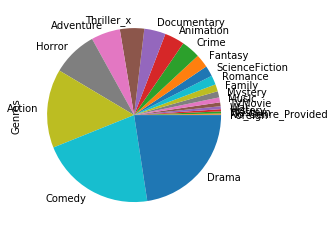

In [23]:
#Gives total Number of Movies of a specfic Genre
genre_counts = movie_dataset.Genres.value_counts()
genre_counts.sort_values(ascending = True).plot(kind='pie', y='Genre of Movies')

## TOP 20 FILM PRODUCTION COMPANIES BY COUNT MOVIES PRODUCED 

In [24]:
Film_company = movie_dataset.Film_Company.value_counts()
Film_company = Film_company.to_frame().reset_index()
Film_company['Rank'] = Film_company['Film_Company'].rank(ascending = False)
Top_10_FC_Ranked = Film_company[Film_company['Rank'] < 20]
Top_10_FC_Ranked[['Film_Company','Rank']] = Top_10_FC_Ranked[['Film_Company','Rank']].astype('int')

C:\Users\Musuki\Anaconda3\envs\uwdatasci420\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


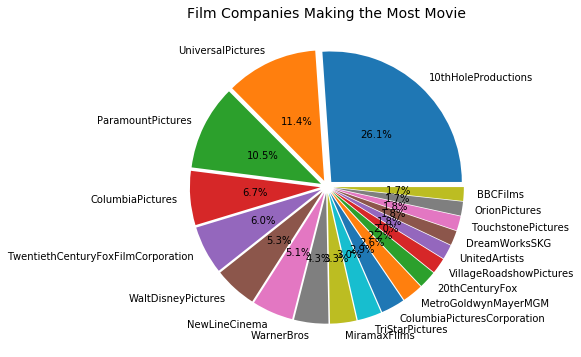

In [25]:
fig, ax = plt.subplots(figsize=[10,6])
labels = Top_10_FC_Ranked['index']
ax.pie(x=Top_10_FC_Ranked['Film_Company'], autopct="%.1f%%", explode=[0.05]*len(Top_10_FC_Ranked['Film_Company']), labels=labels, pctdistance=0.5)
ax.set_title("Film Companies Making the Most Movie", fontsize=14);

## Movie Type Exploration  

### MOST POPULAR MOVIE TYPES ON AVERAGE

In [26]:
movies_by_votes  = movie_dataset.groupby('Genres')['vote_count'].sum().reset_index()

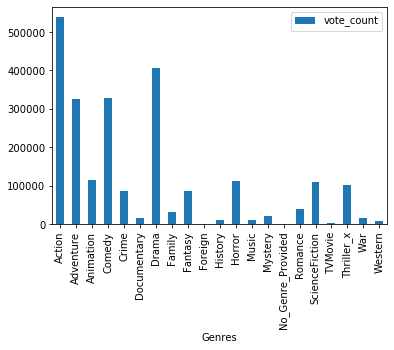

In [49]:
movies_by_votes.plot.bar(x='Genres', y=['vote_count'])

In [50]:
movies_by_pop  = movie_dataset.groupby('Genres')['popularity'].sum().reset_index()

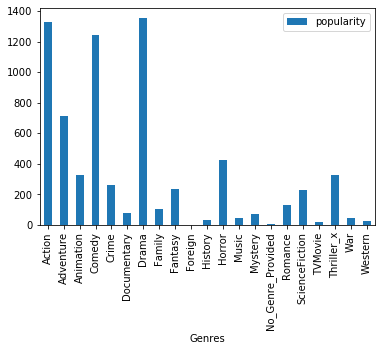

In [51]:
movies_by_pop.plot.bar(x='Genres', y=['popularity'])

In [ ]:
#budget	revenue

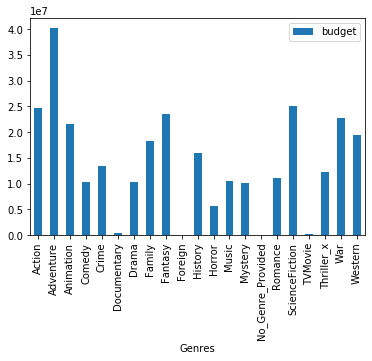

In [52]:
movies_by_budget = movie_dataset.groupby('Genres')['budget'].mean().reset_index()
movies_by_budget.plot.bar(x='Genres', y=['budget'])

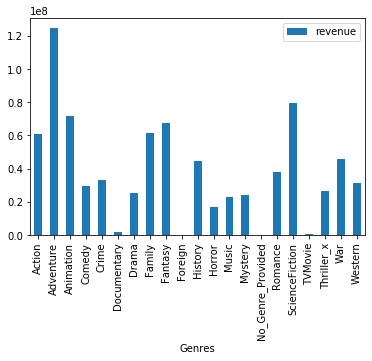

In [53]:
movies_by_budget = movie_dataset.groupby('Genres')['revenue'].mean().reset_index()
movies_by_budget.plot.bar(x='Genres', y=['revenue'])

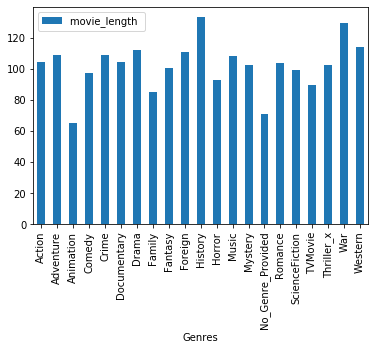

In [56]:
movies_by_length = movie_dataset.groupby('Genres')['movie_length '].mean().reset_index()
movies_by_length.plot.bar(x='Genres', y=['movie_length '])

In [58]:
movie_dataset['Profit'] = movie_dataset['revenue'] - movie_dataset['budget']
movies_by_profit = movie_dataset.groupby('Genres')['Profit'].mean().reset_index()
movies_by_profit.plot.bar(x='Genres', y=['Profit'])